In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/predict-online-gaming-behavior-dataset/online_gaming_behavior_dataset.csv


In [ ]:
import missingno as msno
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
dataframed = pd.read_csv('/kaggle/input/predict-online-gaming-behavior-dataset/online_gaming_behavior_dataset.csv')
dataframed.head()

PlayerID  Age  Gender Location GameGenre  PlayTimeHours  InGamePurchases  \
0      9000   43    Male    Other  Strategy      16.271119                0   
1      9001   29  Female      USA  Strategy       5.525961                0   
2      9002   22  Female      USA    Sports       8.223755                0   
3      9003   35    Male      USA    Action       5.265351                1   
4      9004   33    Male   Europe    Action      15.531945                0   

  GameDifficulty  SessionsPerWeek  AvgSessionDurationMinutes  PlayerLevel  \
0         Medium                6                        108           79   
1         Medium                5                        144           11   
2           Easy               16                        142           35   
3           Easy                9                         85           57   
4         Medium                2                        131           95   

   AchievementsUnlocked EngagementLevel  
0                    25          Medium  
1                    10          Medium  
2                    41            High  
3                    47          Medium  
4                    37          Medium

In [ ]:
print("Shape of the Dataset = ", dataframed.shape)

Shape of the Dataset =  (40034, 13)


In [ ]:
dataframed.columns.values.tolist()

['PlayerID',
 'Age',
 'Gender',
 'Location',
 'GameGenre',
 'PlayTimeHours',
 'InGamePurchases',
 'GameDifficulty',
 'SessionsPerWeek',
 'AvgSessionDurationMinutes',
 'PlayerLevel',
 'AchievementsUnlocked',
 'EngagementLevel']

In [ ]:
dataframed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usag

In [ ]:
dataframed.describe()

PlayerID           Age  PlayTimeHours  InGamePurchases  \
count  40034.000000  40034.000000   40034.000000     40034.000000   
mean   29016.500000     31.992531      12.024365         0.200854   
std    11556.964675     10.043227       6.914638         0.400644   
min     9000.000000     15.000000       0.000115         0.000000   
25%    19008.250000     23.000000       6.067501         0.000000   
50%    29016.500000     32.000000      12.008002         0.000000   
75%    39024.750000     41.000000      17.963831         0.000000   
max    49033.000000     49.000000      23.999592         1.000000   

       SessionsPerWeek  AvgSessionDurationMinutes   PlayerLevel  \
count     40034.000000               40034.000000  40034.000000   
mean          9.471774                  94.792252     49.655568   
std           5.763667                  49.011375     28.588379   
min           0.000000                  10.000000      1.000000   
25%           4.000000                  52.000000     25.000000   
50%           9.000000                  95.000000     49.000000   
75%          14.000000                 137.000000     74.000000   
max          19.000000                 179.000000     99.000000   

       AchievementsUnlocked  
count          40034.000000  
mean              24.526477  
std               14.430726  
min                0.000000  
25%               12.000000  
50%               25.000000  
75%               37.000000  
max               49.000000

In [ ]:
dataframed = dataframed.drop(columns = ['PlayerID'])

In [ ]:
dataframed.dtypes

Age                            int64
Gender                        object
Location                      object
GameGenre                     object
PlayTimeHours                float64
InGamePurchases                int64
GameDifficulty                object
SessionsPerWeek                int64
AvgSessionDurationMinutes      int64
PlayerLevel                    int64
AchievementsUnlocked           int64
EngagementLevel               object
dtype: object

In [ ]:
dataframed.isnull().sum()

Age                          0
Gender                       0
Location                     0
GameGenre                    0
PlayTimeHours                0
InGamePurchases              0
GameDifficulty               0
SessionsPerWeek              0
AvgSessionDurationMinutes    0
PlayerLevel                  0
AchievementsUnlocked         0
EngagementLevel              0
dtype: int64

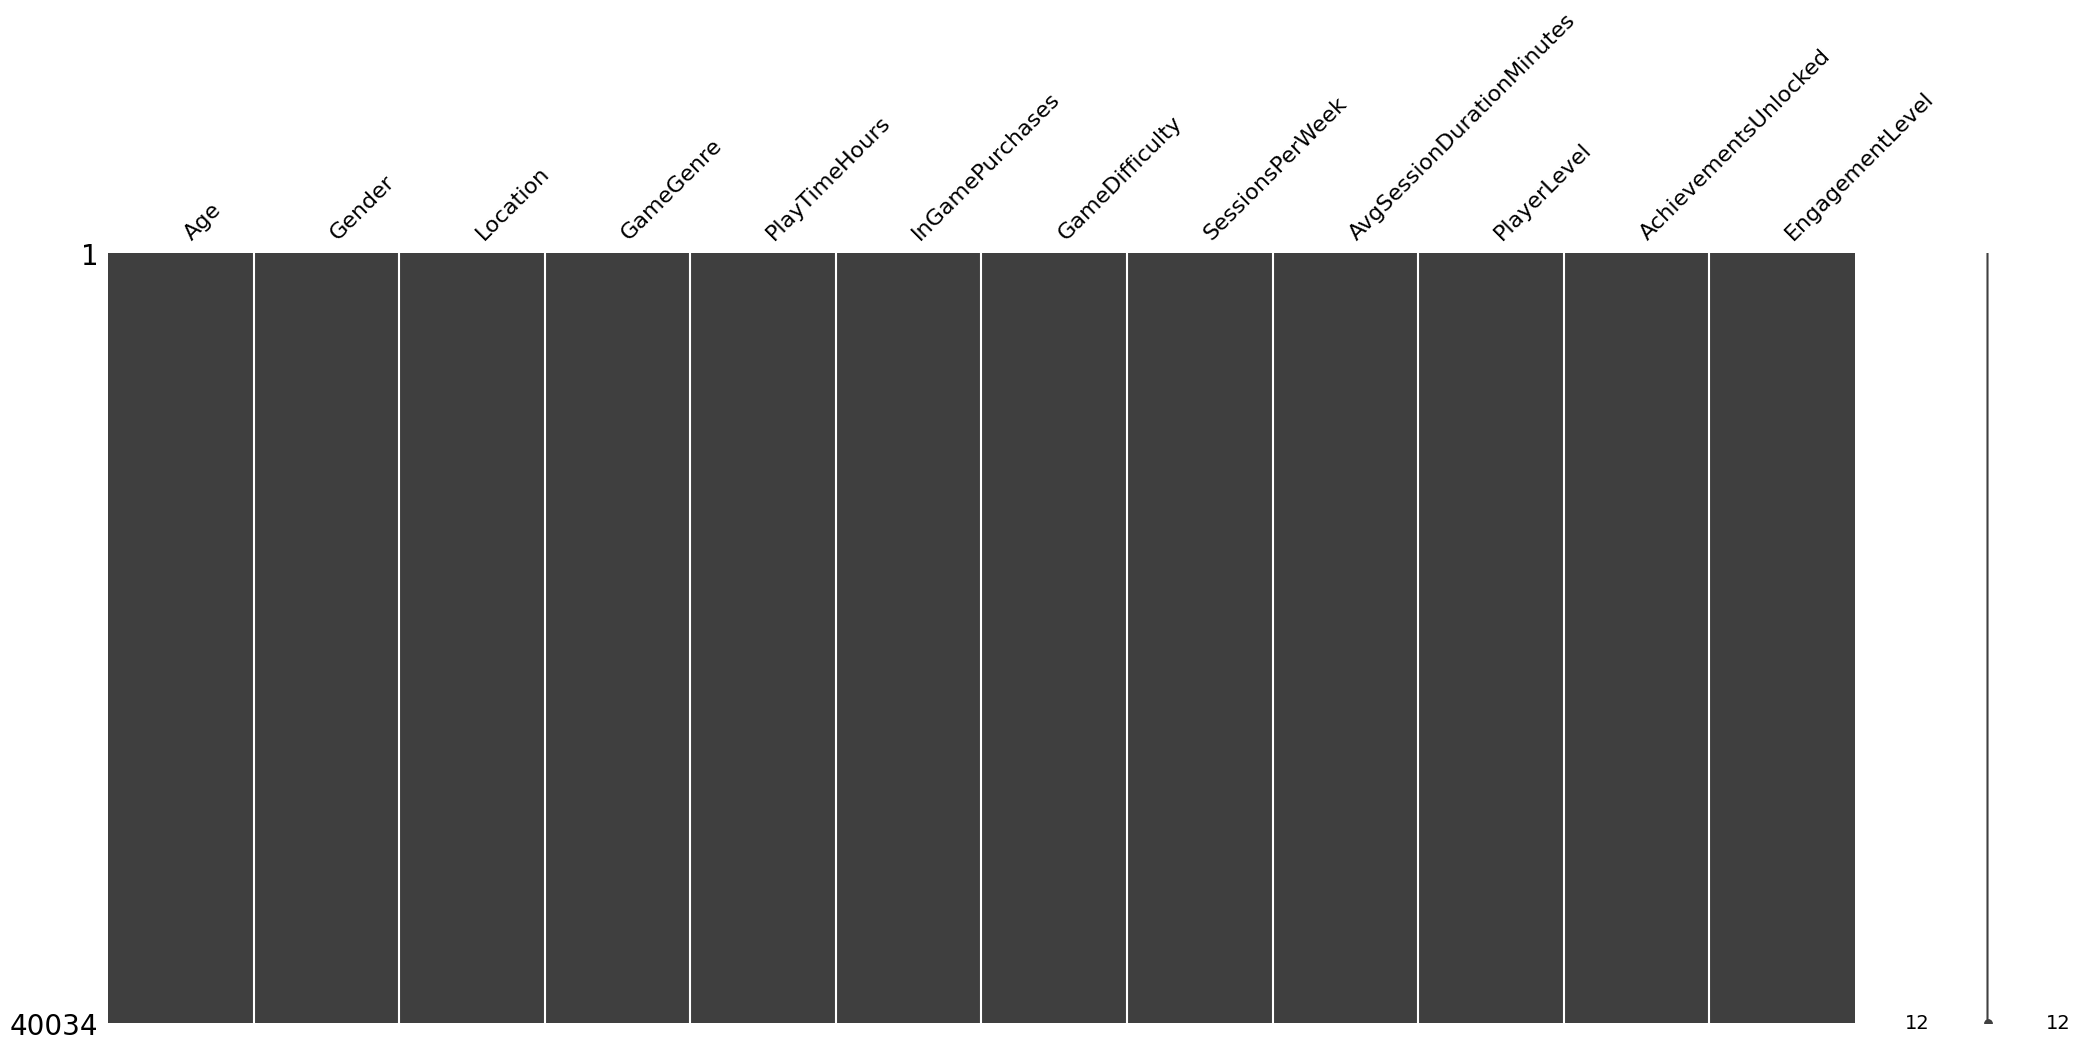

In [ ]:
msno.matrix(dataframed)
plt.show()

In [ ]:
dataframed['Gender'] = dataframed['Gender'].map({"Male": 0, "Female": 1})

In [ ]:
dataframed['Location'] = dataframed['Location'].map({"Other": 0, "USA": 1, "Europe": 2, "Asia": 3})

In [ ]:
dataframed['GameGenre'] = dataframed['GameGenre'].map({"Strategy": 0, "Sports": 1, "Action": 2, "RPG": 3, "Simulation": 4})

In [ ]:
dataframed['GameDifficulty'] = dataframed['GameDifficulty'].map({"Medium": 0, "Easy": 1, "Hard": 2})

In [ ]:
dataframed['EngagementLevel'] = dataframed['EngagementLevel'].map({"Medium": 0, "High": 1, "Low": 2})

In [ ]:
print("The Range of Values among the 12 Columns")
print("\n")
print("Age : {:.4f}".format(min(dataframed['Age'])) + " - {:.4f}".format(max(dataframed['Age'])))
print("\n")
print("Gender : {:.4f}".format(min(dataframed['Gender'])) + " - {:.4f}".format(max(dataframed['Gender'])))
print("\n")
print("Location : {:.4f}".format(min(dataframed['Location'])) + " - {:.4f}".format(max(dataframed['Location'])))
print("\n")
print("GameGenre : {:.4f}".format(min(dataframed['GameGenre'])) + " - {:.4f}".format(max(dataframed['GameGenre'])))
print("\n")
print("PlayTimeHours : {:.4f}".format(min(dataframed['PlayTimeHours'])) + " - {:.4f}".format(max(dataframed['PlayTimeHours'])))
print("\n")
print("InGamePurchases : {:.4f}".format(min(dataframed['InGamePurchases'])) + " - {:.4f}".format(max(dataframed['InGamePurchases'])))
print("\n")
print("GameDifficulty : {:.4f}".format(min(dataframed['GameDifficulty'])) + " - {:.4f}".format(max(dataframed['GameDifficulty'])))
print("\n")
print("SessionsPerWeek : {:.4f}".format(min(dataframed['SessionsPerWeek'])) + " - {:.4f}".format(max(dataframed['SessionsPerWeek'])))
print("\n")
print("AvgSessionDurationMinutes : {:.4f}".format(min(dataframed['AvgSessionDurationMinutes'])) + " - {:.4f}".format(max(dataframed['AvgSessionDurationMinutes'])))
print("\n")
print("PlayerLevel : {:.4f}".format(min(dataframed['PlayerLevel'])) + " - {:.4f}".format(max(dataframed['PlayerLevel'])))
print("\n")
print("AchievementsUnlocked : {:.4f}".format(min(dataframed['AchievementsUnlocked'])) + " - {:.4f}".format(max(dataframed['AchievementsUnlocked'])))
print("\n")
print("EngagementLevel : {:.4f}".format(min(dataframed['EngagementLevel'])) + " - {:.4f}".format(max(dataframed['EngagementLevel'])))
print("\n")

The Range of Values among the 12 Columns


Age : 15.0000 - 49.0000


Gender : 0.0000 - 1.0000


Location : 0.0000 - 3.0000


GameGenre : 0.0000 - 4.0000


PlayTimeHours : 0.0001 - 23.9996


InGamePurchases : 0.0000 - 1.0000


GameDifficulty : 0.0000 - 2.0000


SessionsPerWeek : 0.0000 - 19.0000


AvgSessionDurationMinutes : 10.0000 - 179.0000


PlayerLevel : 1.0000 - 99.0000


AchievementsUnlocked : 0.0000 - 49.0000


EngagementLevel : 0.0000 - 2.0000




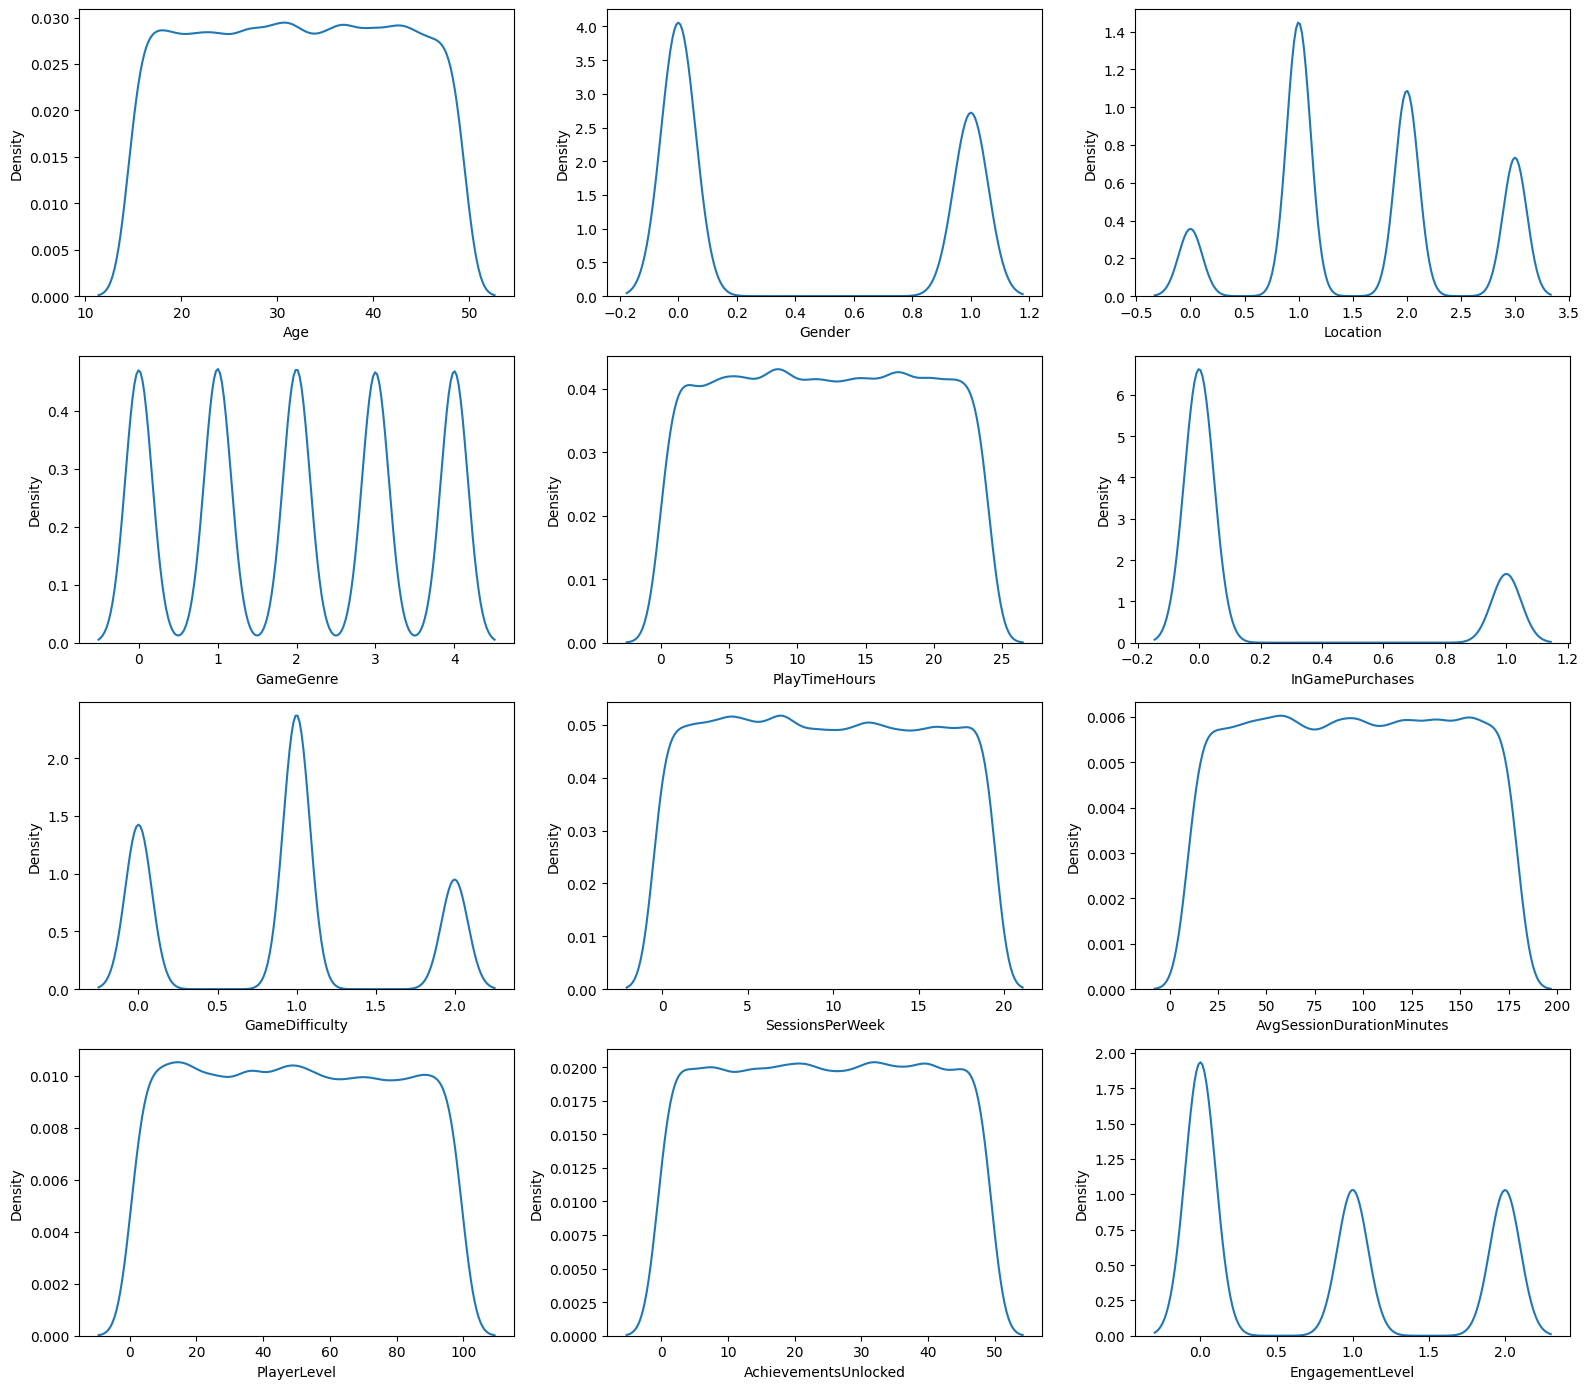

In [ ]:
plt.figure(figsize=(16,14))
for i,col in enumerate(dataframed.columns):
    plt.subplot(4,3,i+1)
    sns.kdeplot(data=dataframed[col])
    plt.tight_layout()

[Text(0.5, 145.21999999999997, 'Pearson Correlation Coefficient Heatmap')]

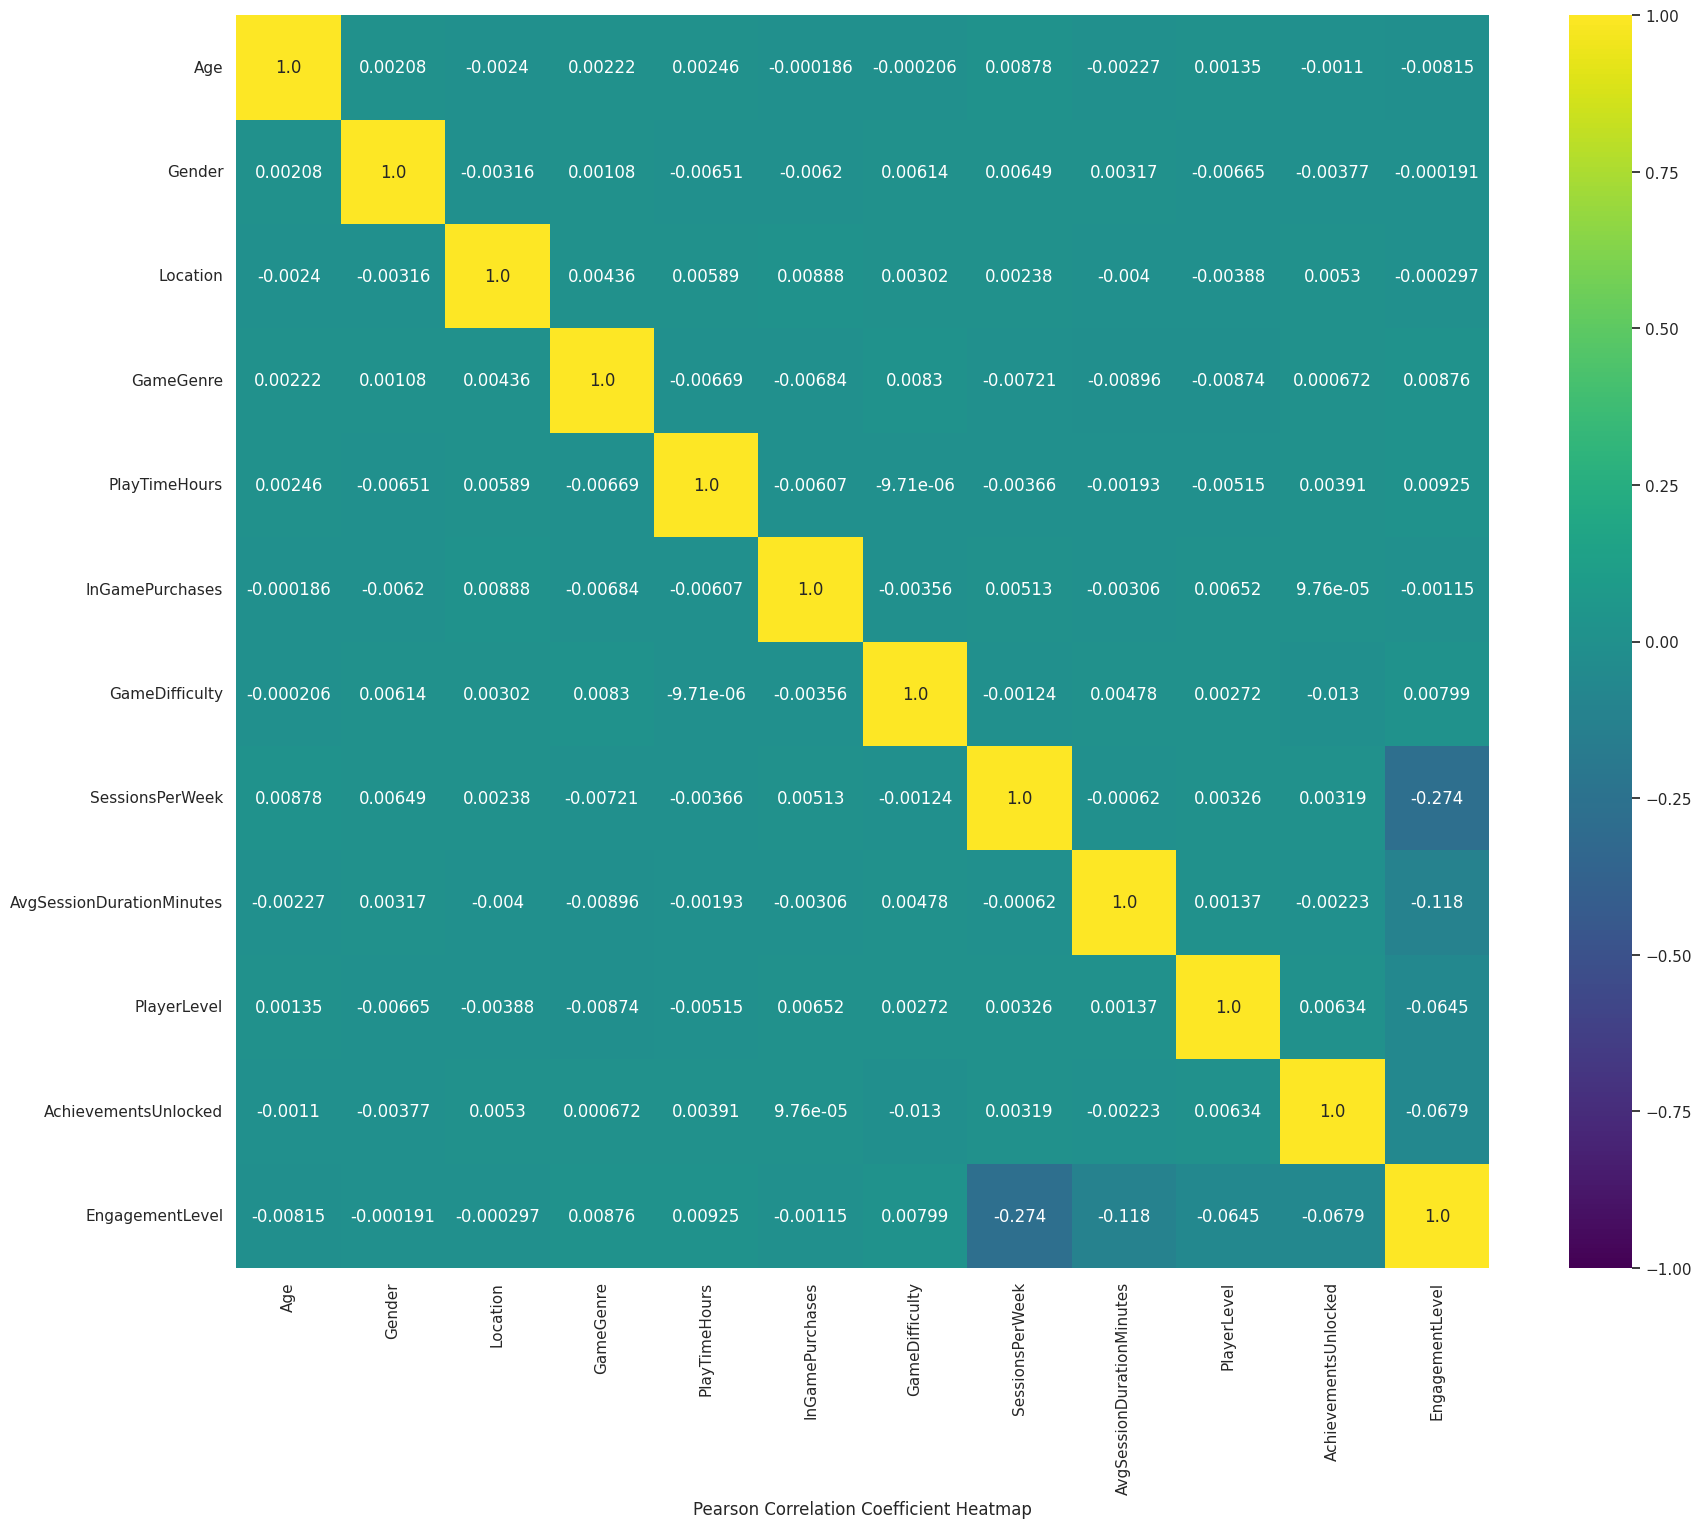

In [ ]:
sns.set(rc={'figure.figsize':(20.7,16.27)})
Heated = sns.heatmap(dataframed.corr("pearson"),vmin=-1, vmax=1, cmap='viridis',annot=True, fmt=".3", square=True)
Heated.set(xlabel = "Pearson Correlation Coefficient Heatmap")

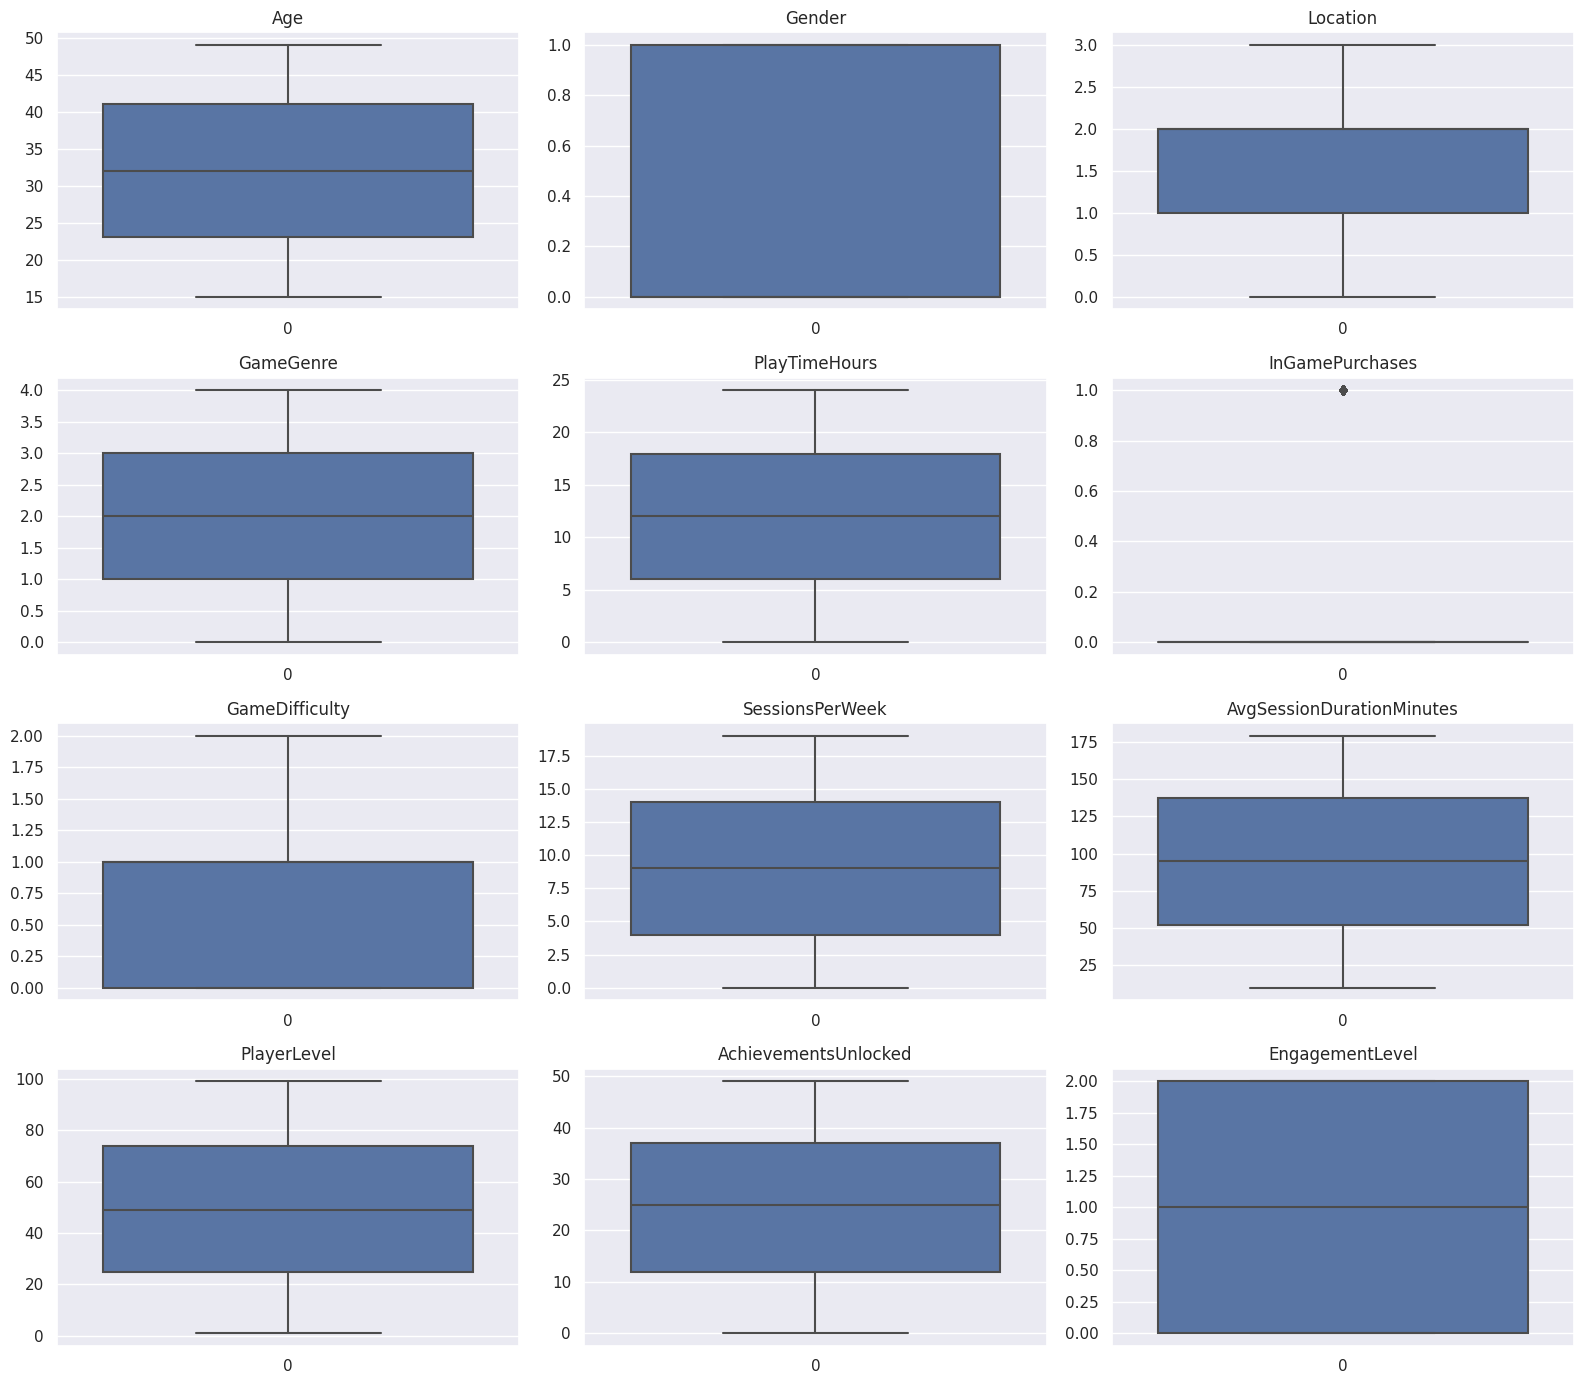

In [ ]:
sns.set(rc={'figure.figsize':(16,14)})
plt.figure(figsize=(16,14))
for i,col in enumerate(dataframed.columns):
    plt.subplot(4,3,i+1)
    sns.boxplot(data=dataframed[col])
    plt.title(col)
    plt.tight_layout()

[(15.0, 49.0)]

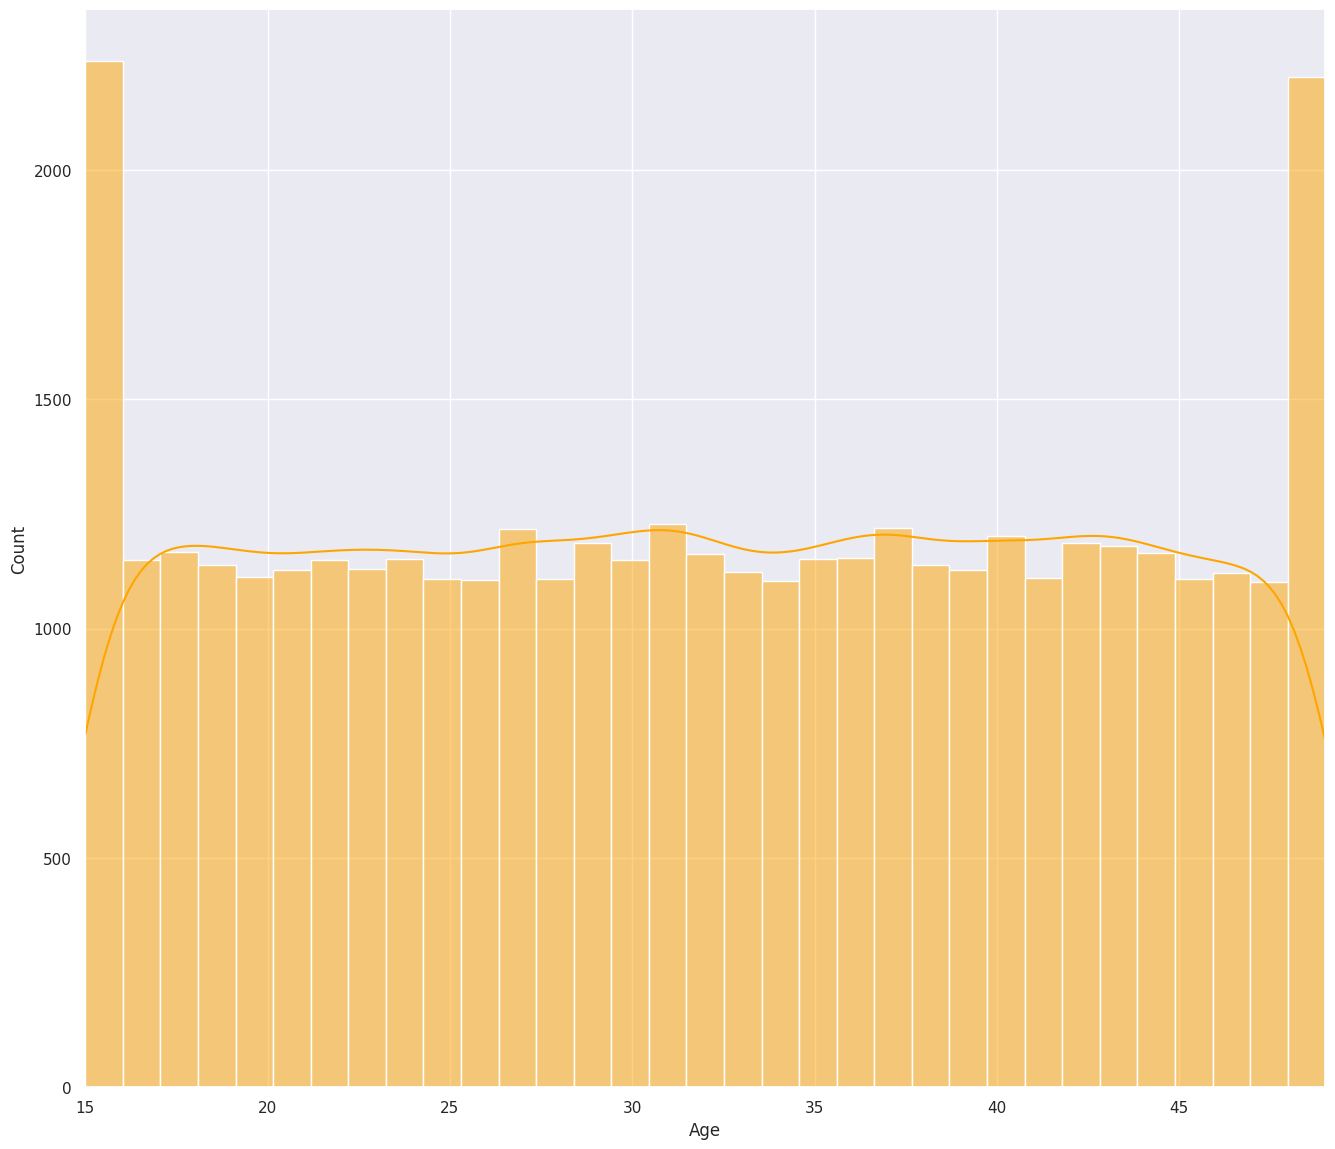

In [ ]:
count_plotted = sns.histplot(x = 'Age', data = dataframed, kde = True, color = 'Orange')
count_plotted.set(xlabel = "Age")
count_plotted.set(xlim = (15.0000, 49.0000))

[(15.0, 49.0)]

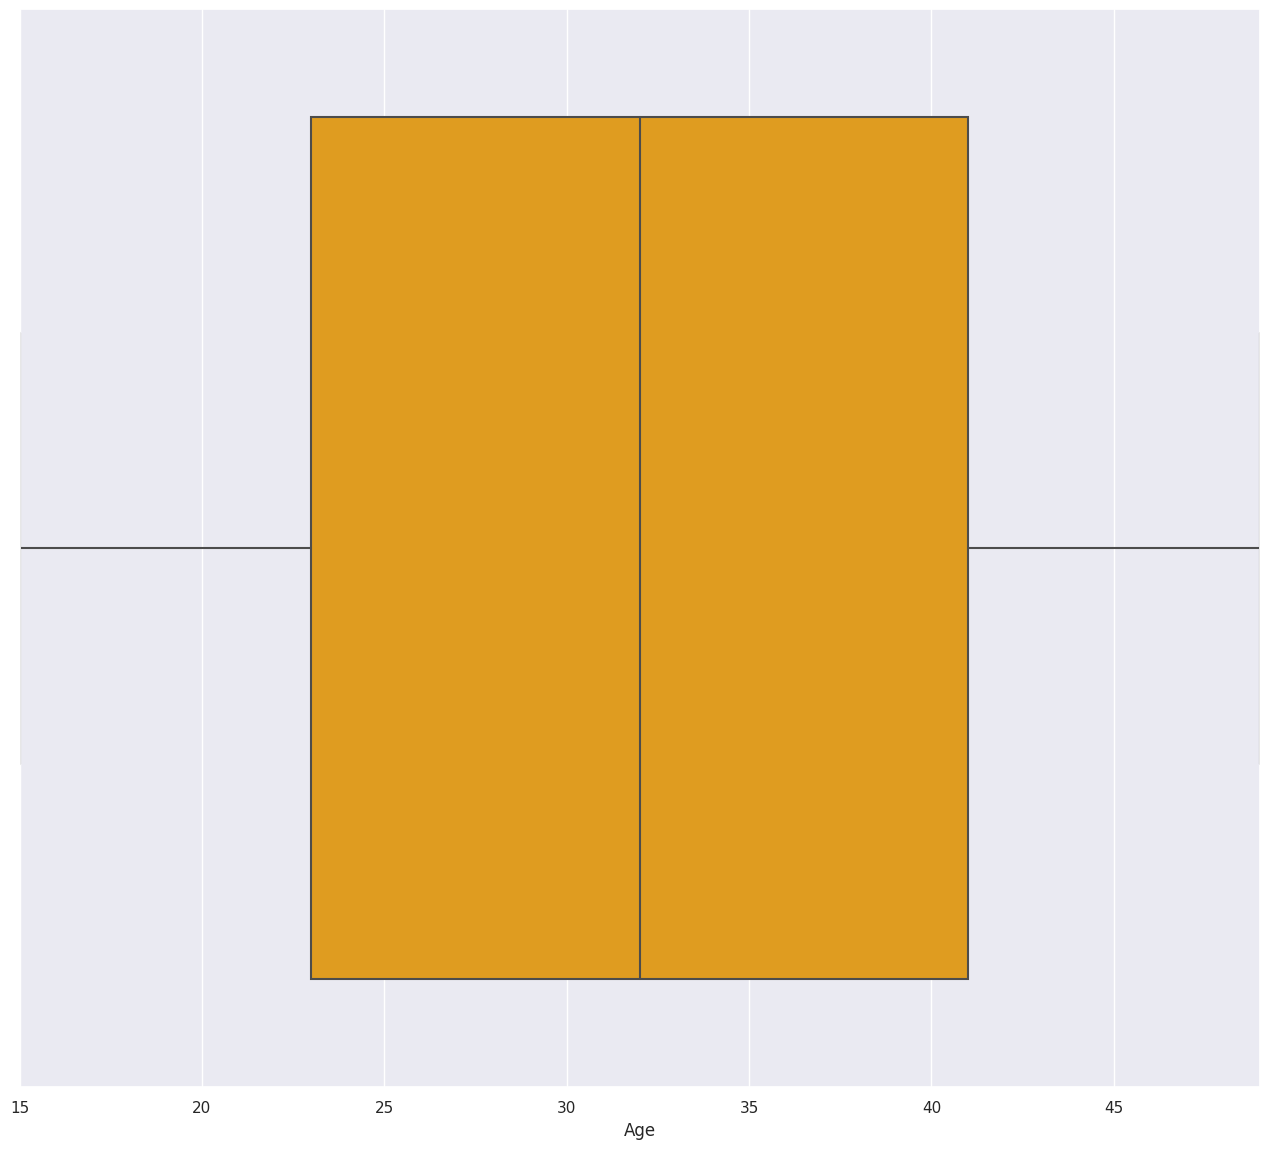

In [ ]:
boxxer_plot = sns.boxplot(x = 'Age', data = dataframed, color = 'Orange')
boxxer_plot.set(xlim = (15.0000, 49.0000))

In [ ]:
numpy_array = np.array(dataframed['Age'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than -4.0000 or greater than 68.0000
There are 0 outliers.


[(0.0, 1.0)]

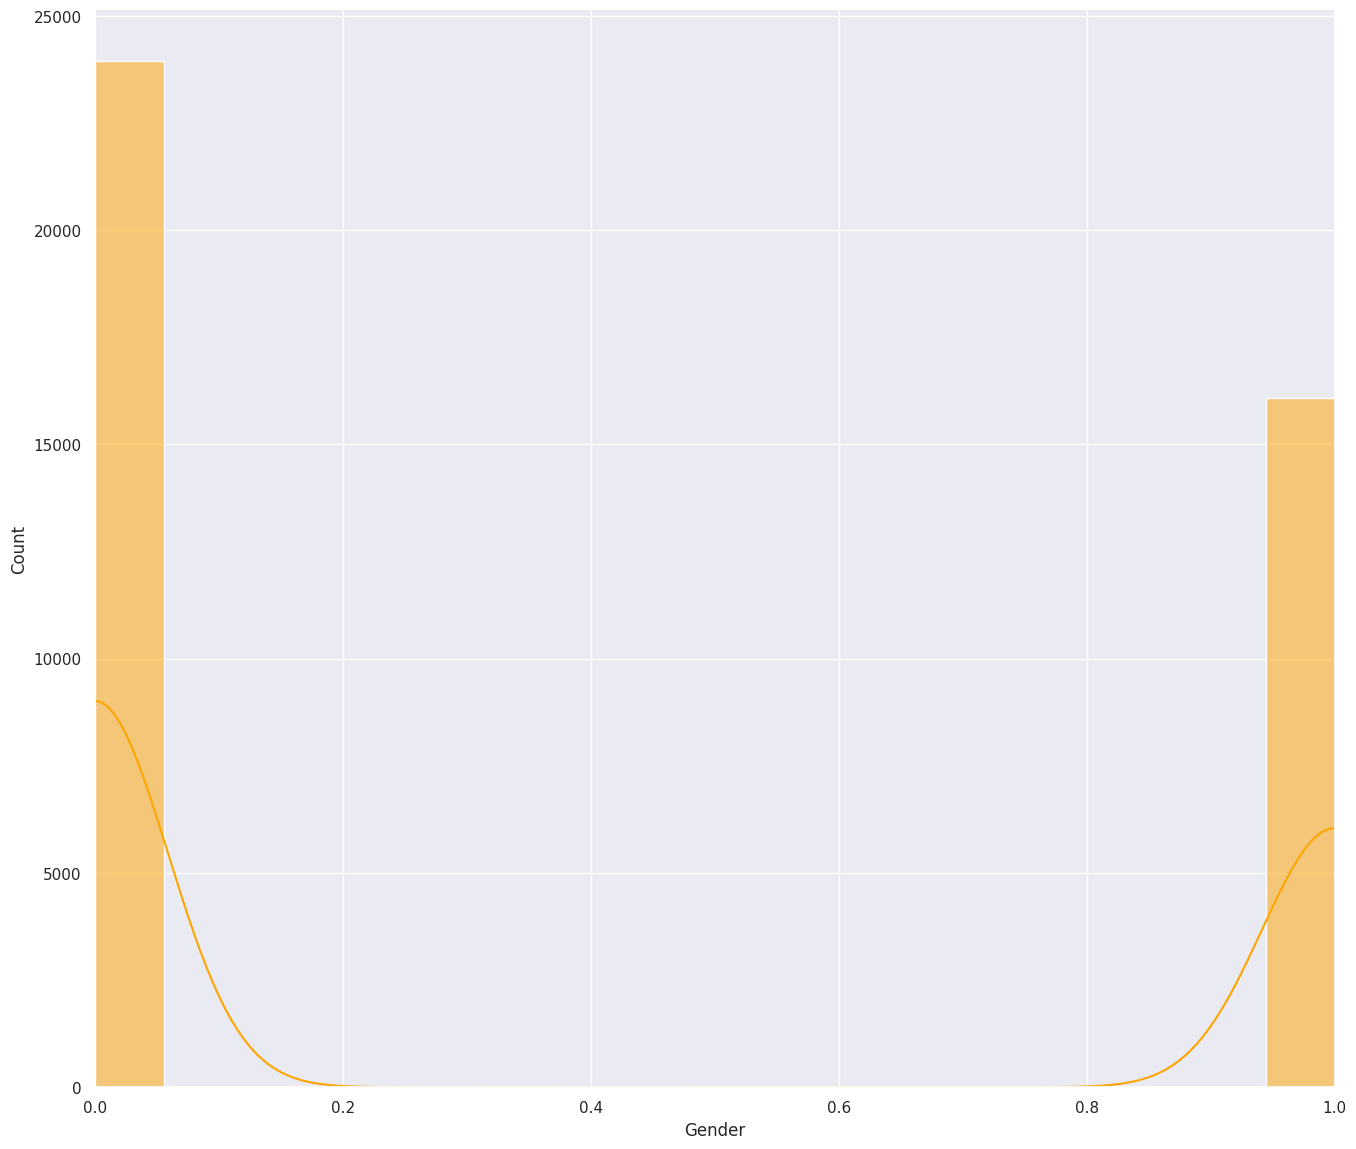

In [ ]:
count_plotted = sns.histplot(x = 'Gender', data = dataframed, kde = True, color = 'Orange')
count_plotted.set(xlabel = "Gender")
count_plotted.set(xlim = (0.0000, 1.0000))

[(0.0, 1.0)]

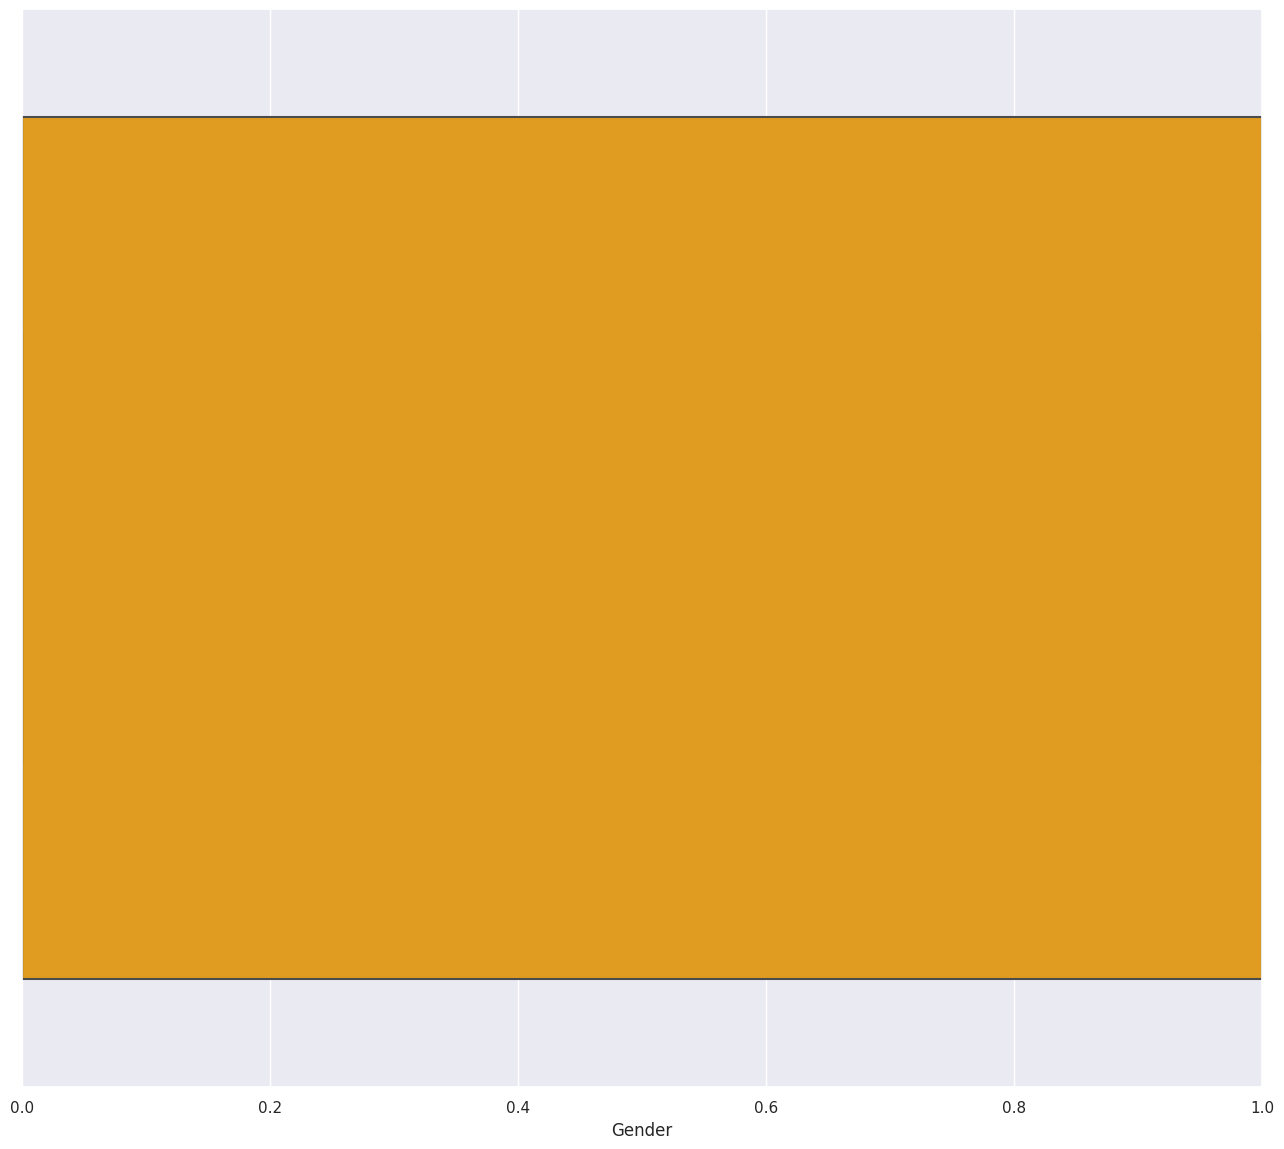

In [ ]:
boxxer_plot = sns.boxplot(x = 'Gender', data = dataframed, color = 'Orange')
boxxer_plot.set(xlim = (0.0000, 1.0000))

In [ ]:
numpy_array = np.array(dataframed['Gender'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than -1.5000 or greater than 2.5000
There are 0 outliers.


[(0.0, 3.0)]

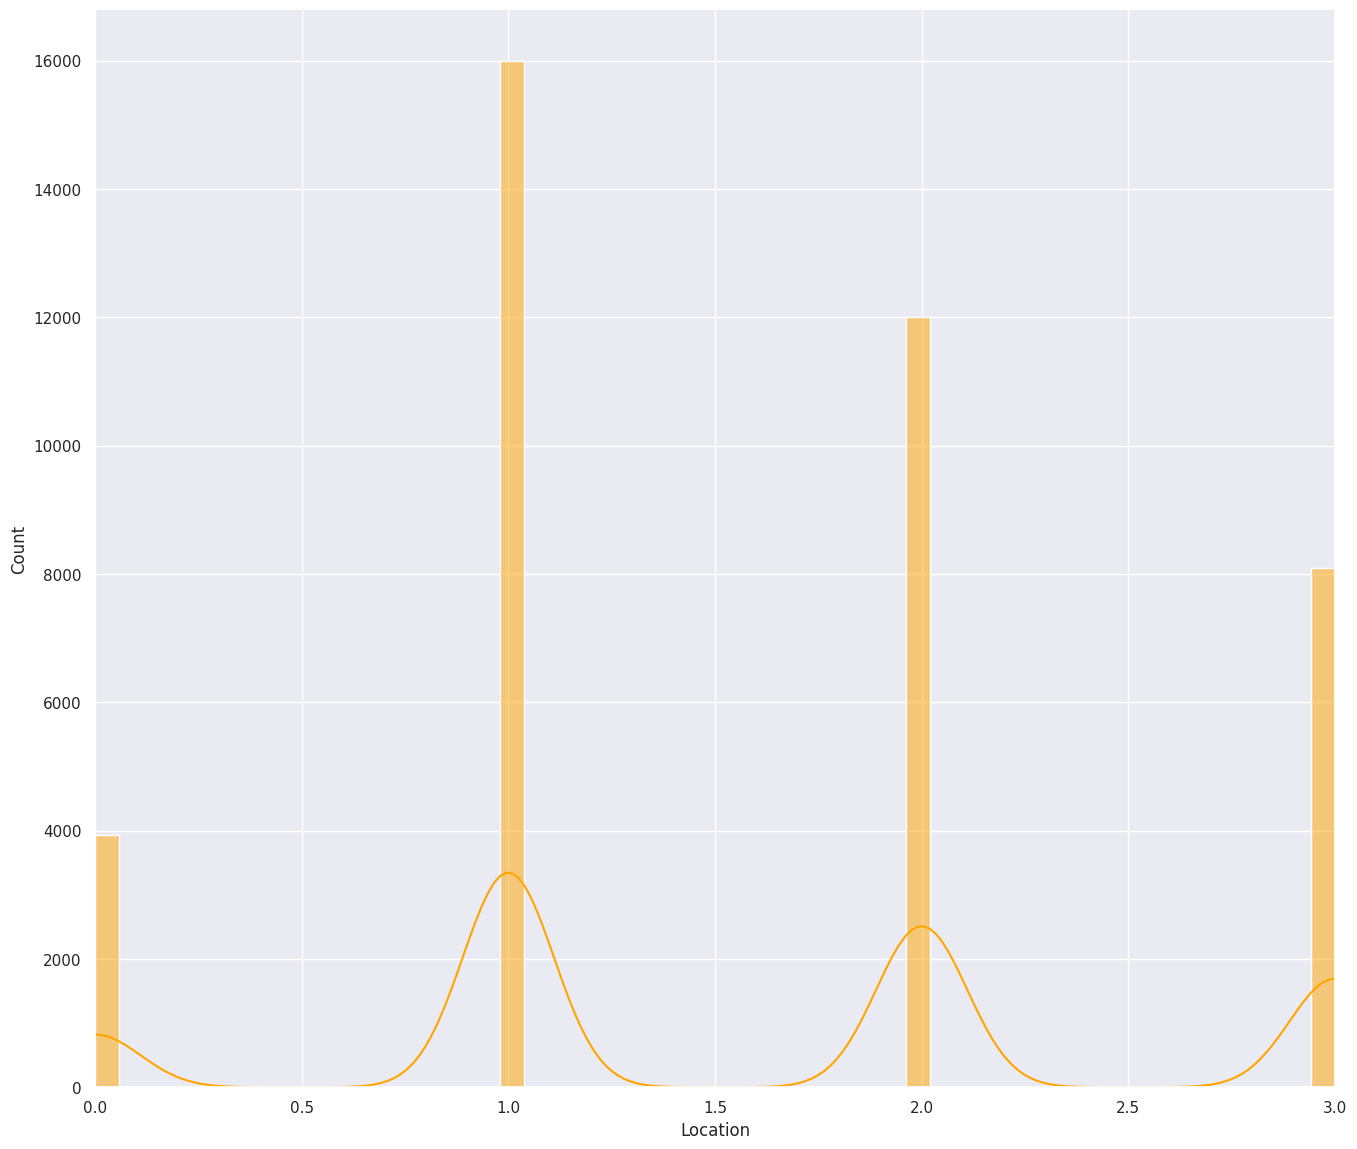

In [ ]:
count_plotted = sns.histplot(x = 'Location', data = dataframed, kde = True, color = 'Orange')
count_plotted.set(xlabel = "Location")
count_plotted.set(xlim = (0.0000, 3.0000))

[(0.0, 3.0)]

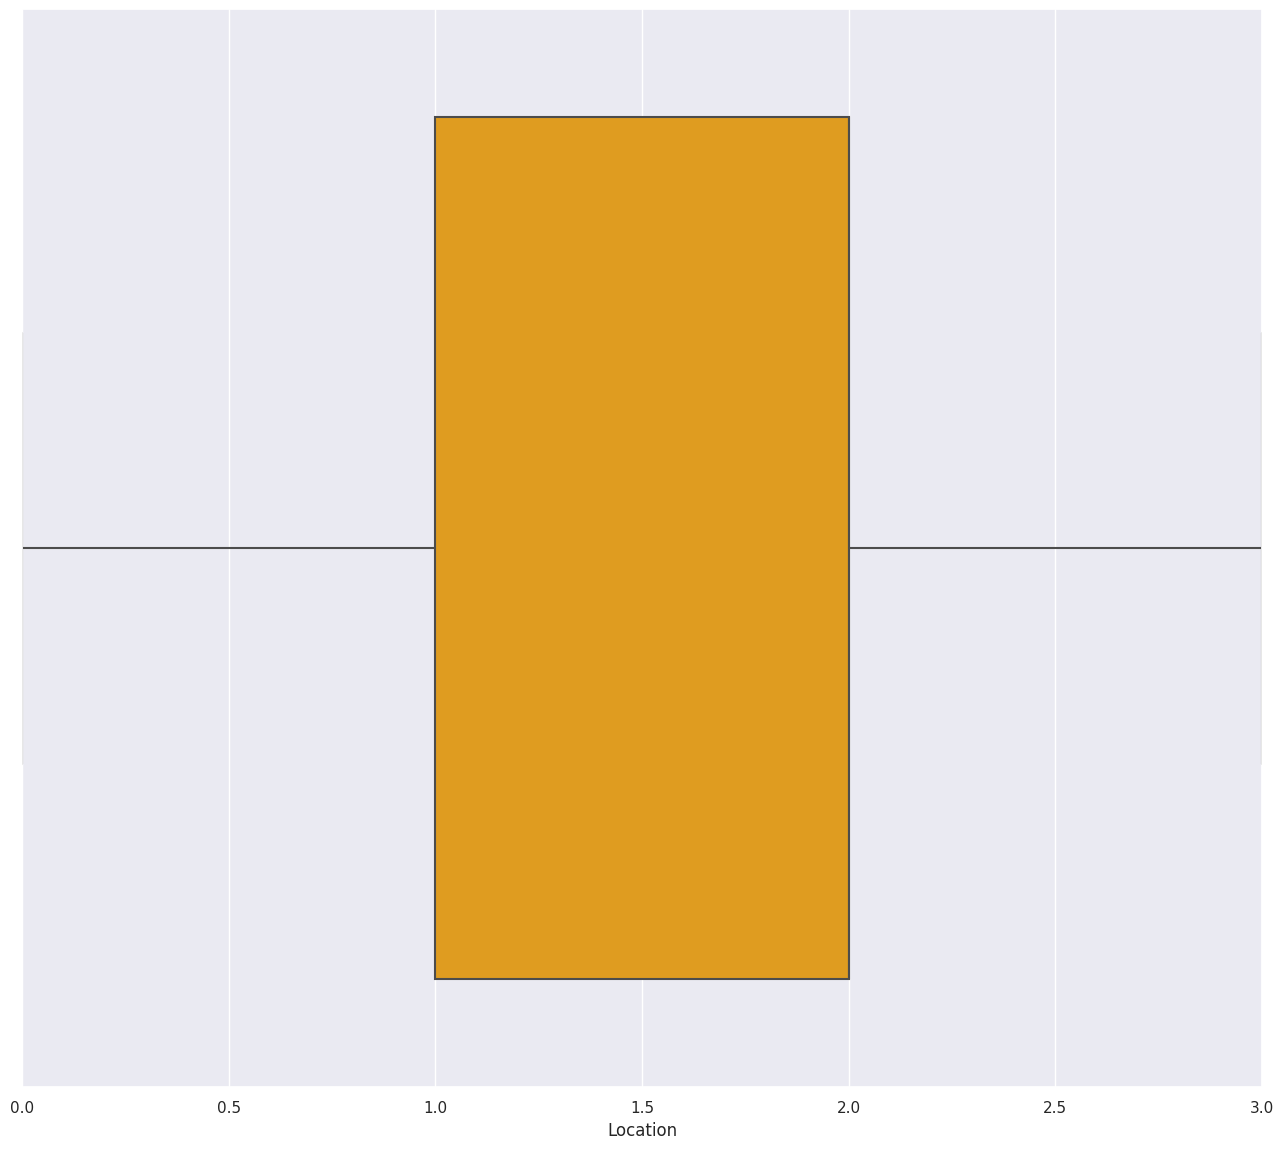

In [ ]:
boxxer_plot = sns.boxplot(x = 'Location', data = dataframed, color = 'Orange')
boxxer_plot.set(xlim = (0.0000, 3.0000))

In [ ]:
numpy_array = np.array(dataframed['Location'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than -0.5000 or greater than 3.5000
There are 0 outliers.


[(0.0, 4.0)]

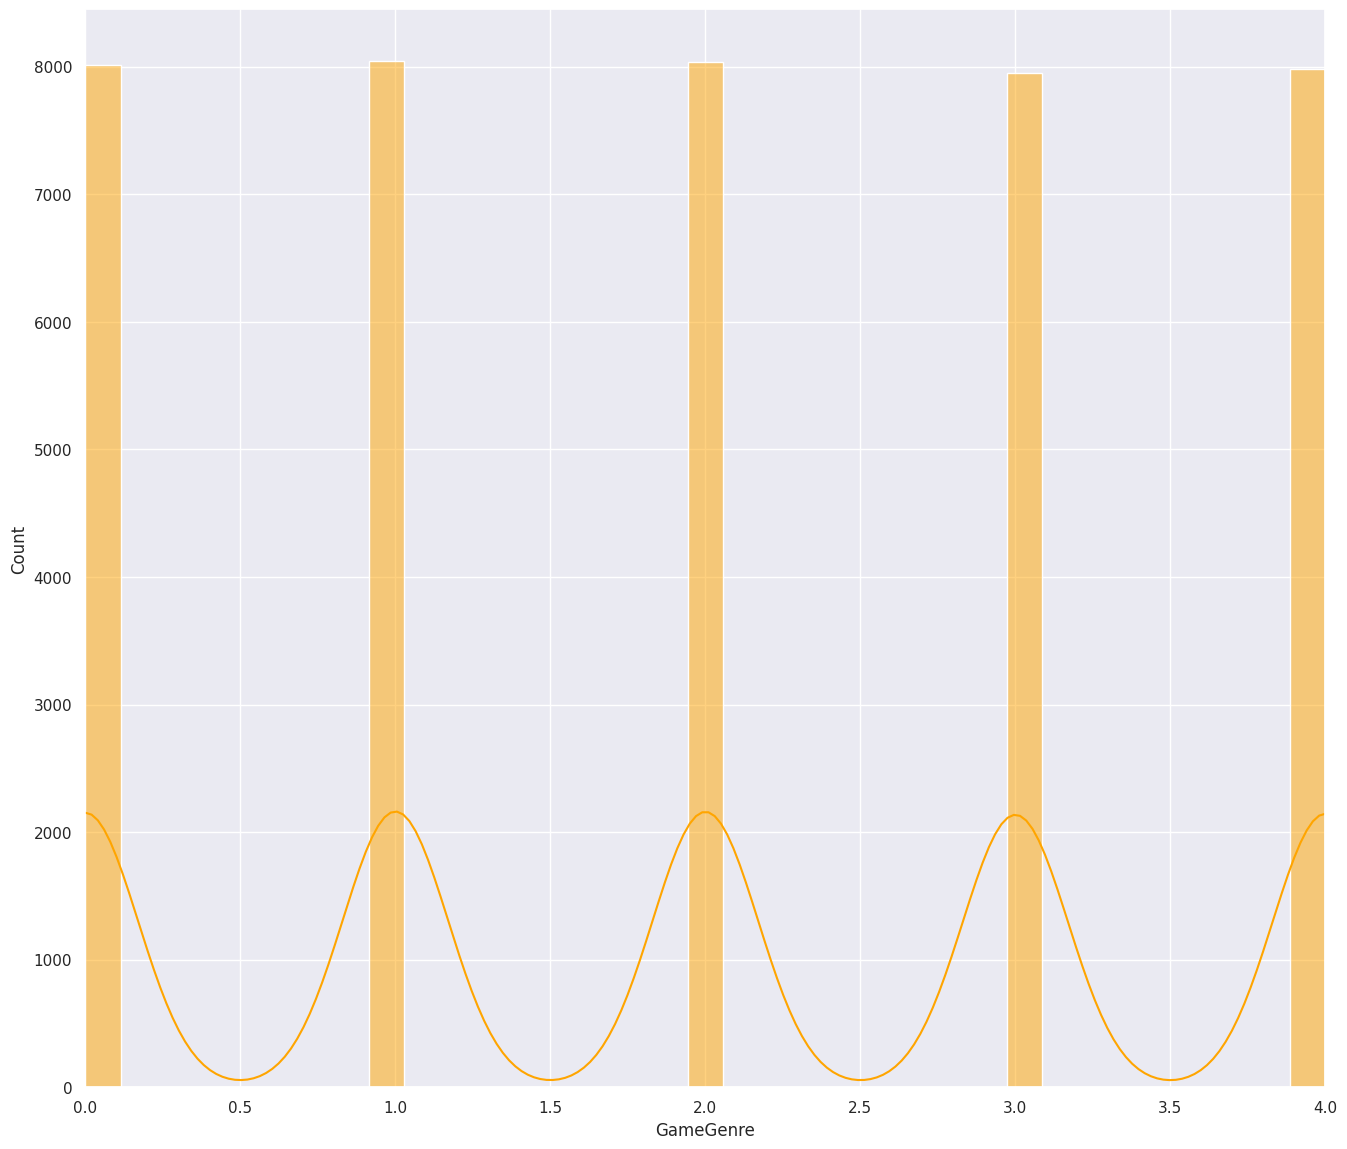

In [ ]:
count_plotted = sns.histplot(x = 'GameGenre', data = dataframed, kde = True, color = 'Orange')
count_plotted.set(xlabel = "GameGenre")
count_plotted.set(xlim = (0.0000, 4.0000))

[(0.0, 4.0)]

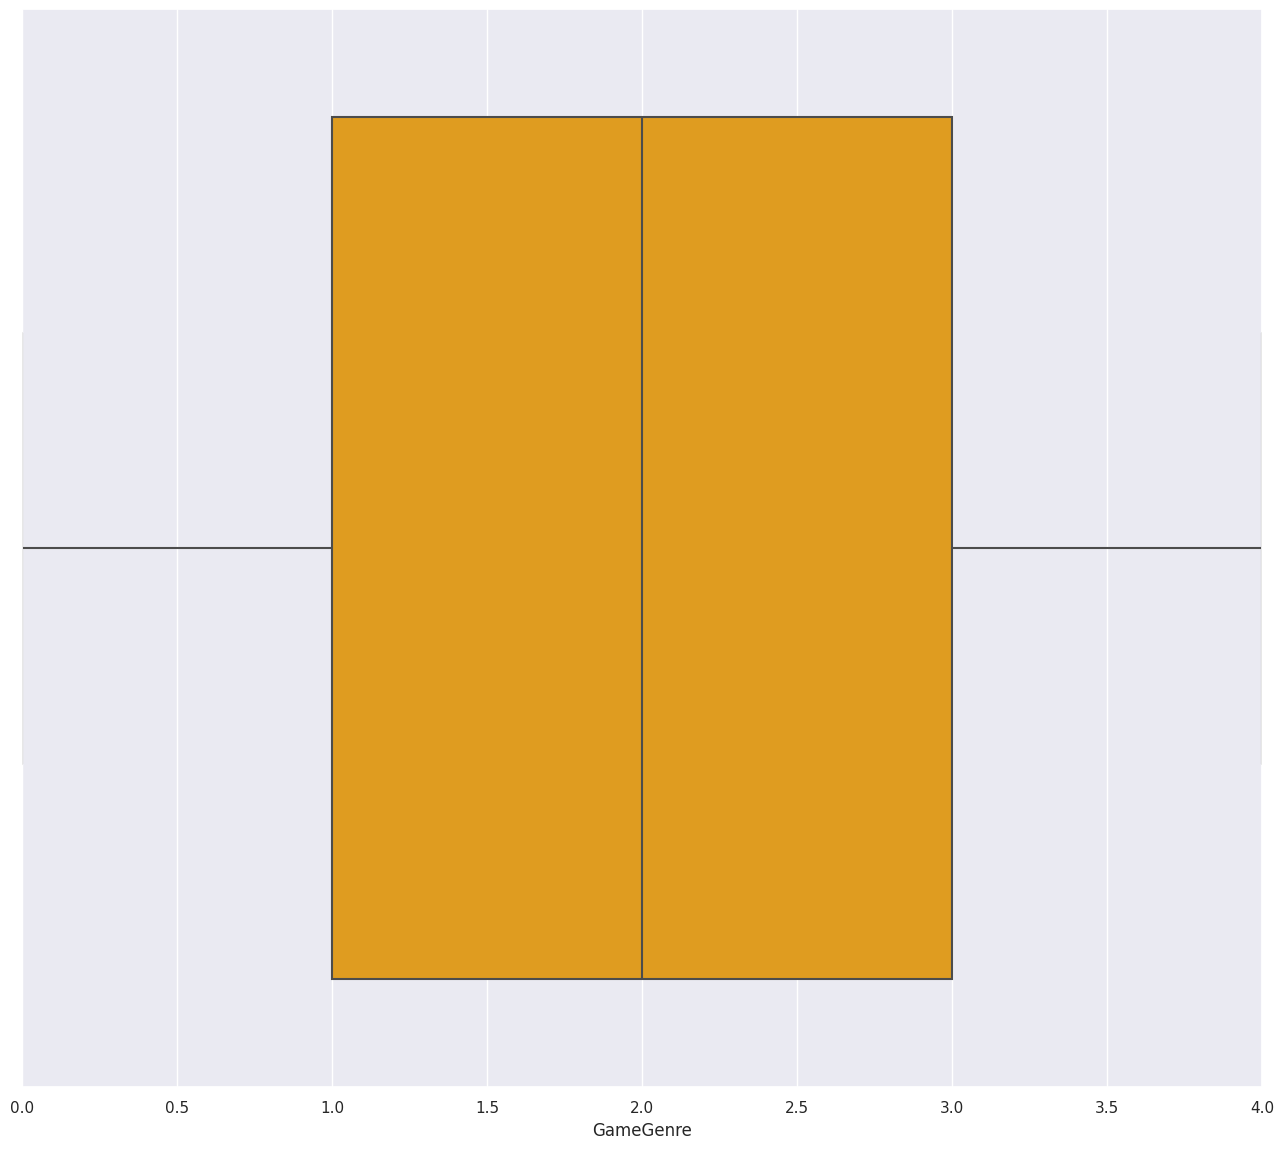

In [ ]:
boxxer_plot = sns.boxplot(x = 'GameGenre', data = dataframed, color = 'Orange')
boxxer_plot.set(xlim = (0.0000, 4.0000))

In [ ]:
numpy_array = np.array(dataframed['GameGenre'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than -2.0000 or greater than 6.0000
There are 0 outliers.


[(0.0001, 23.9996)]

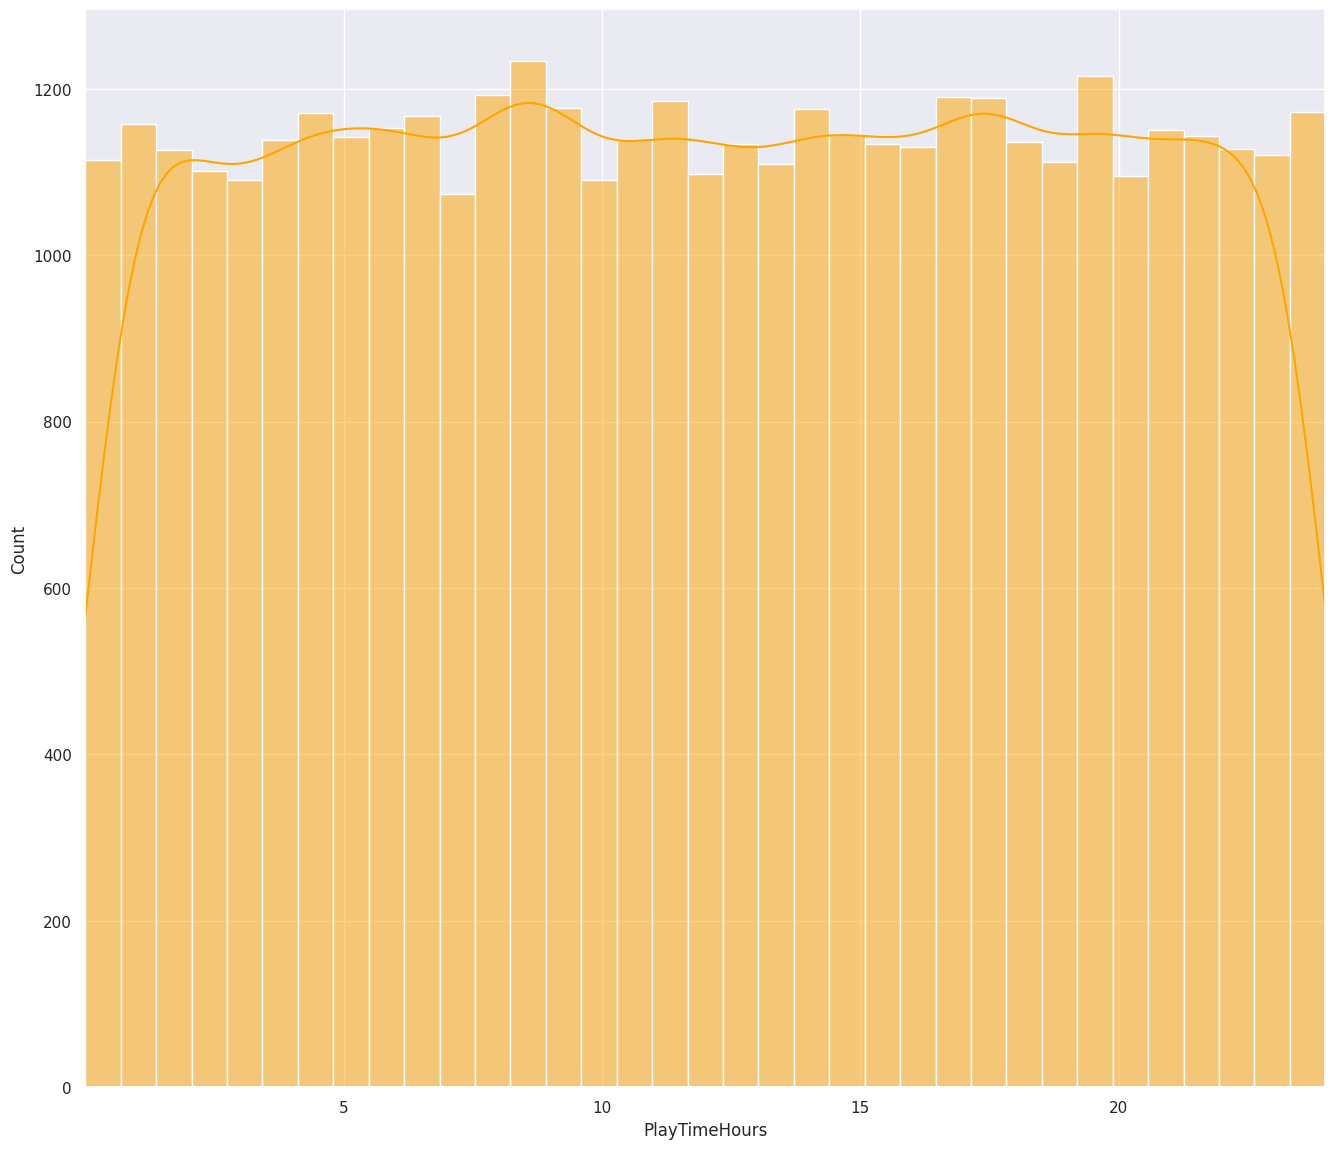

In [ ]:
count_plotted = sns.histplot(x = 'PlayTimeHours', data = dataframed, kde = True, color = 'Orange')
count_plotted.set(xlabel = "PlayTimeHours")
count_plotted.set(xlim = (0.0001, 23.9996))

[(0.0001, 23.9996)]

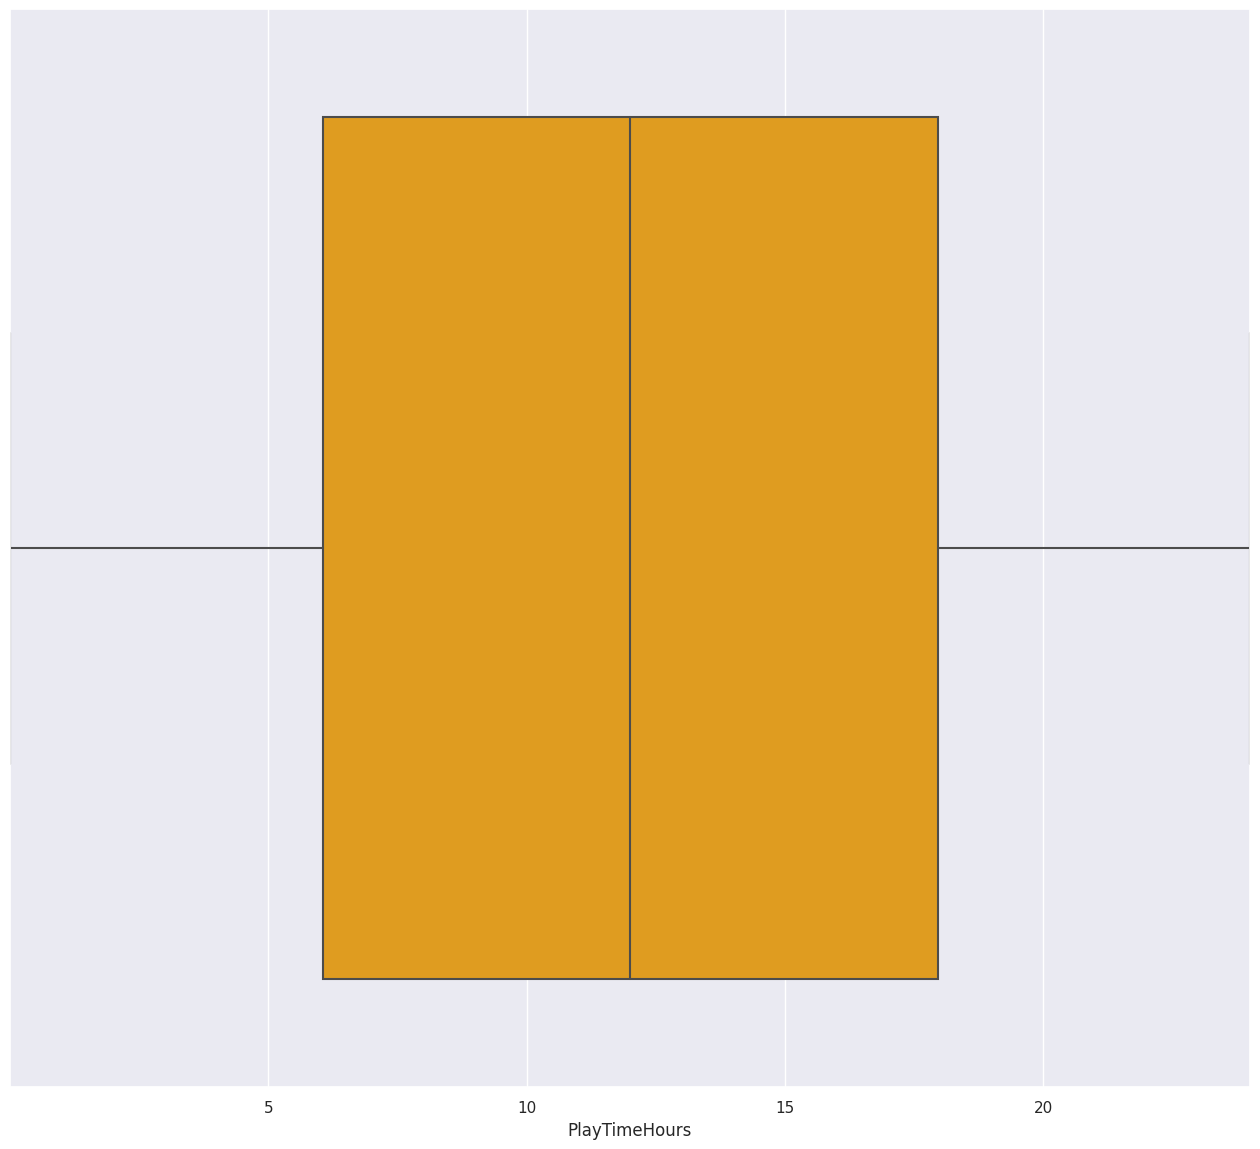

In [ ]:
boxxer_plot = sns.boxplot(x = 'PlayTimeHours', data = dataframed, color = 'Orange')
boxxer_plot.set(xlim = (0.0001, 23.9996))

In [ ]:
numpy_array = np.array(dataframed['PlayTimeHours'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than -11.7770 or greater than 35.8083
There are 0 outliers.


[(0.0, 1.0)]

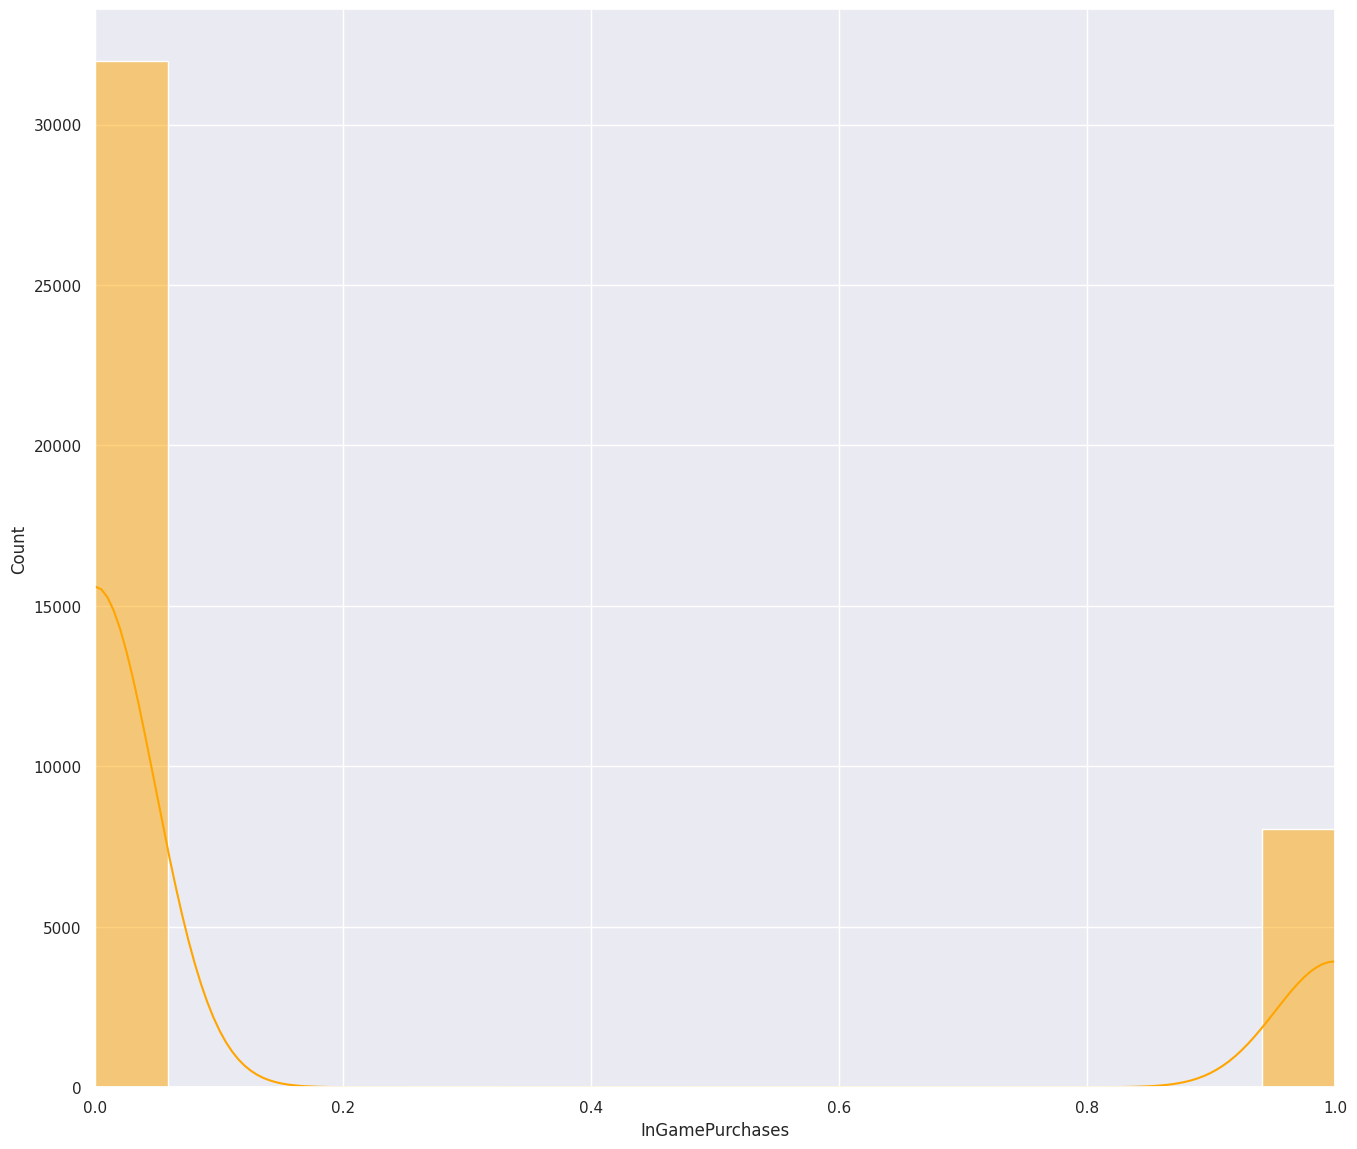

In [ ]:
count_plotted = sns.histplot(x = 'InGamePurchases', data = dataframed, kde = True, color = 'Orange')
count_plotted.set(xlabel = "InGamePurchases")
count_plotted.set(xlim = (0.0000, 1.0000))

[(0.0, 1.0)]

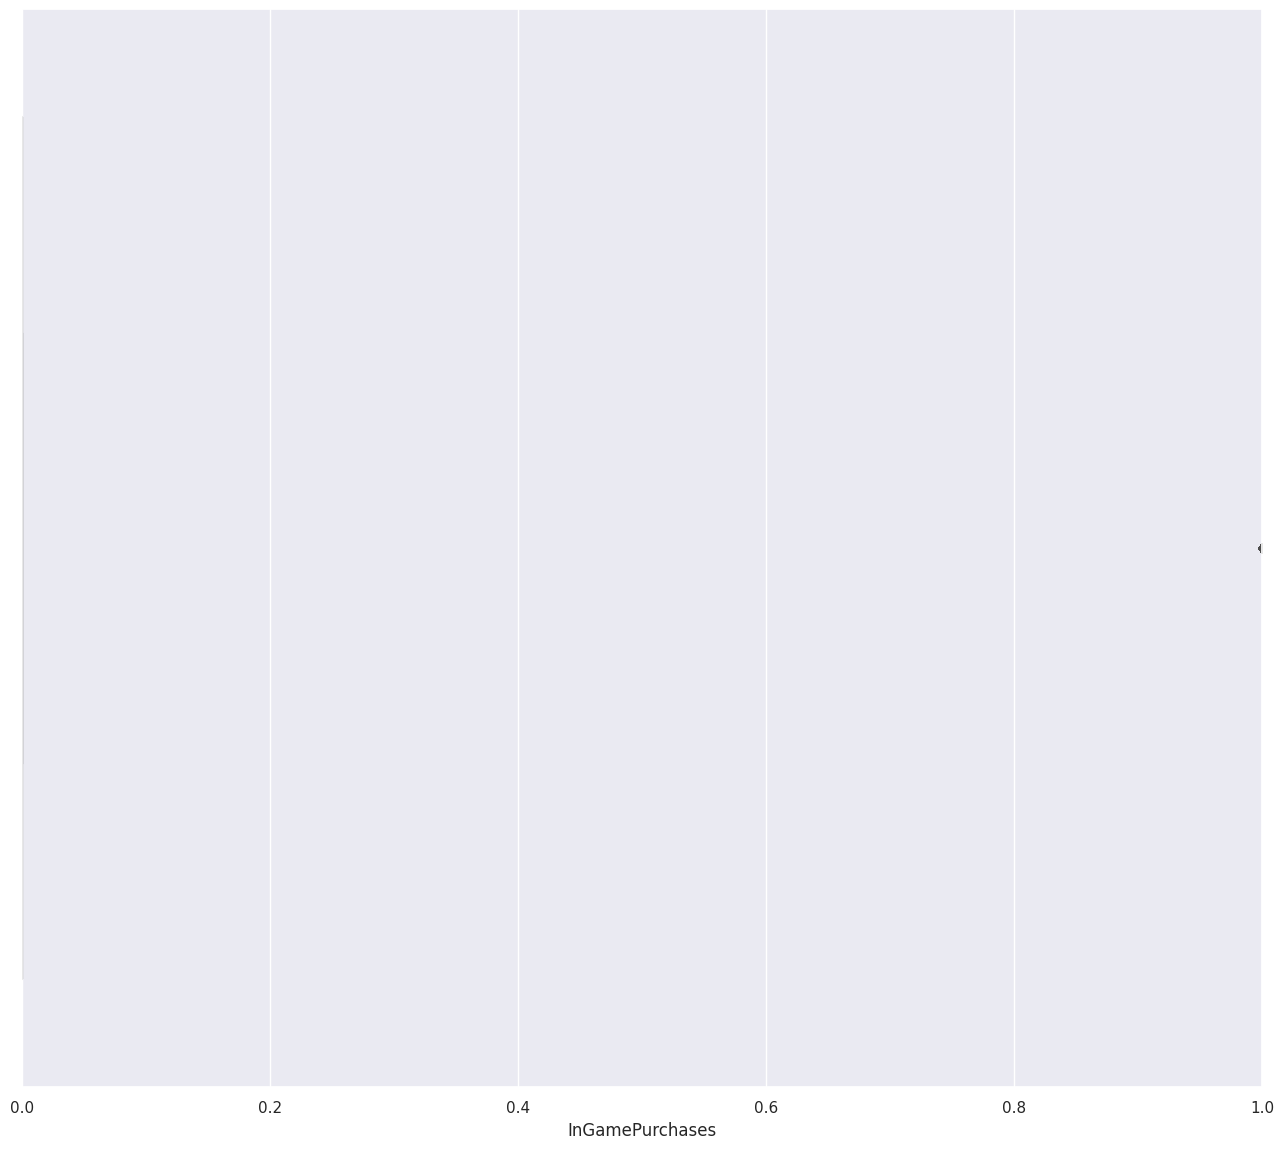

In [ ]:
boxxer_plot = sns.boxplot(x = 'InGamePurchases', data = dataframed, color = 'Orange')
boxxer_plot.set(xlim = (0.0000, 1.0000))

In [ ]:
numpy_array = np.array(dataframed['InGamePurchases'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than 0.0000 or greater than 0.0000
There are 8041 outliers.


[(0.0, 2.0)]

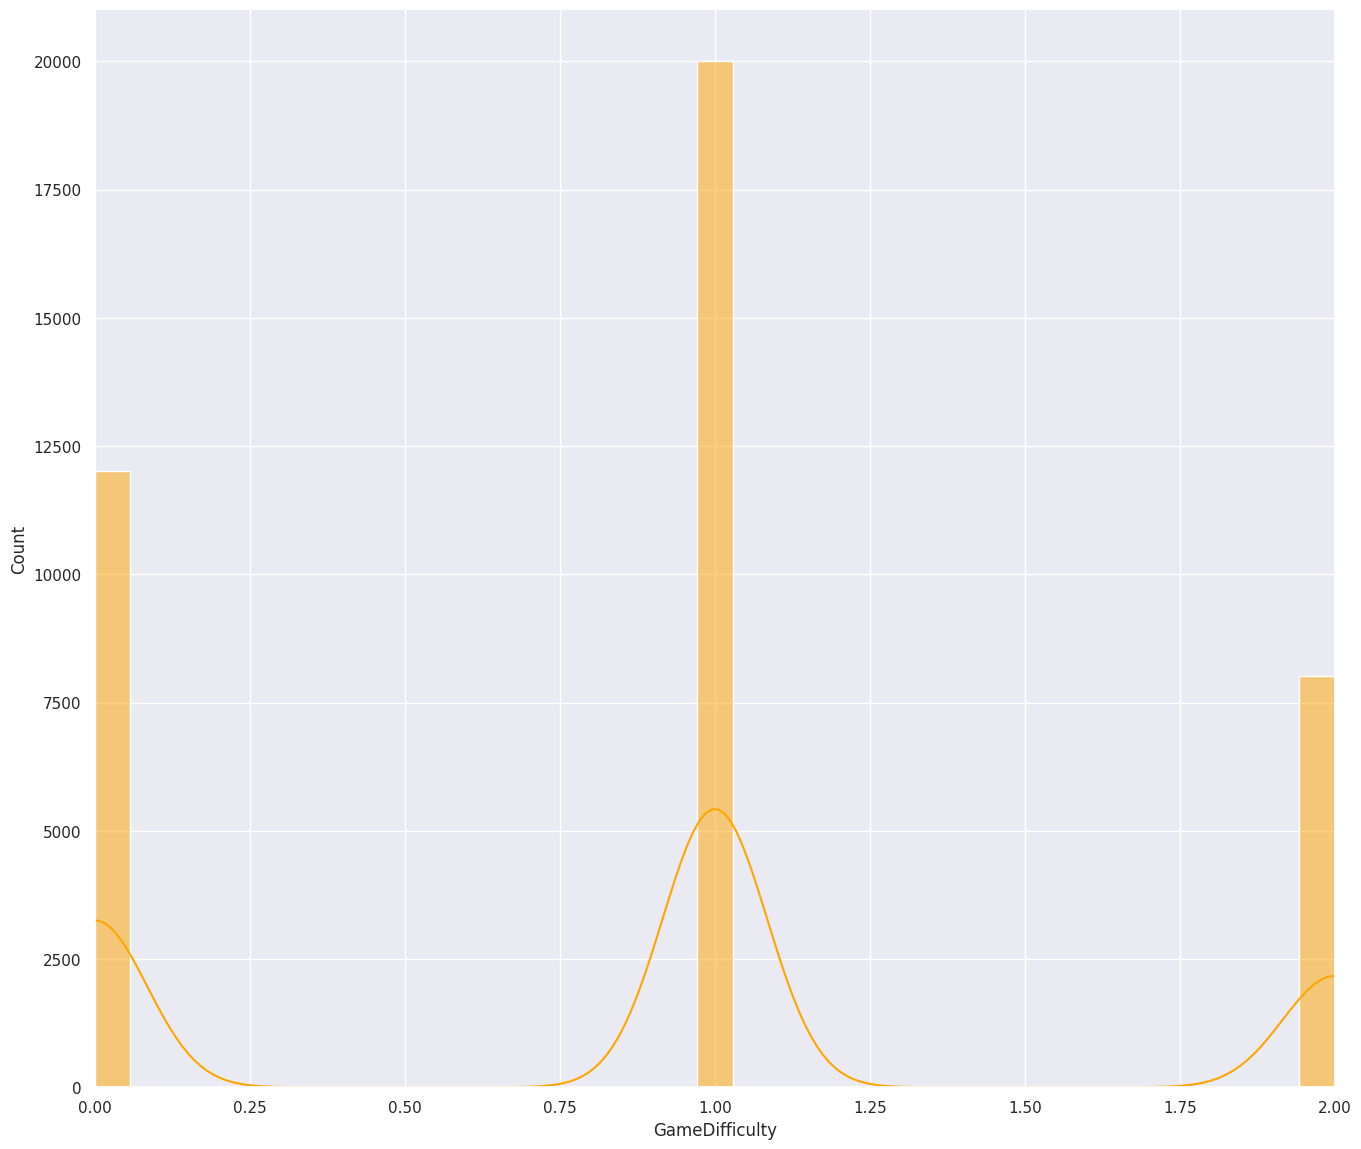

In [ ]:
count_plotted = sns.histplot(x = 'GameDifficulty', data = dataframed, kde = True, color = 'Orange')
count_plotted.set(xlabel = "GameDifficulty")
count_plotted.set(xlim = (0.0000, 2.0000))

[(0.0, 2.0)]

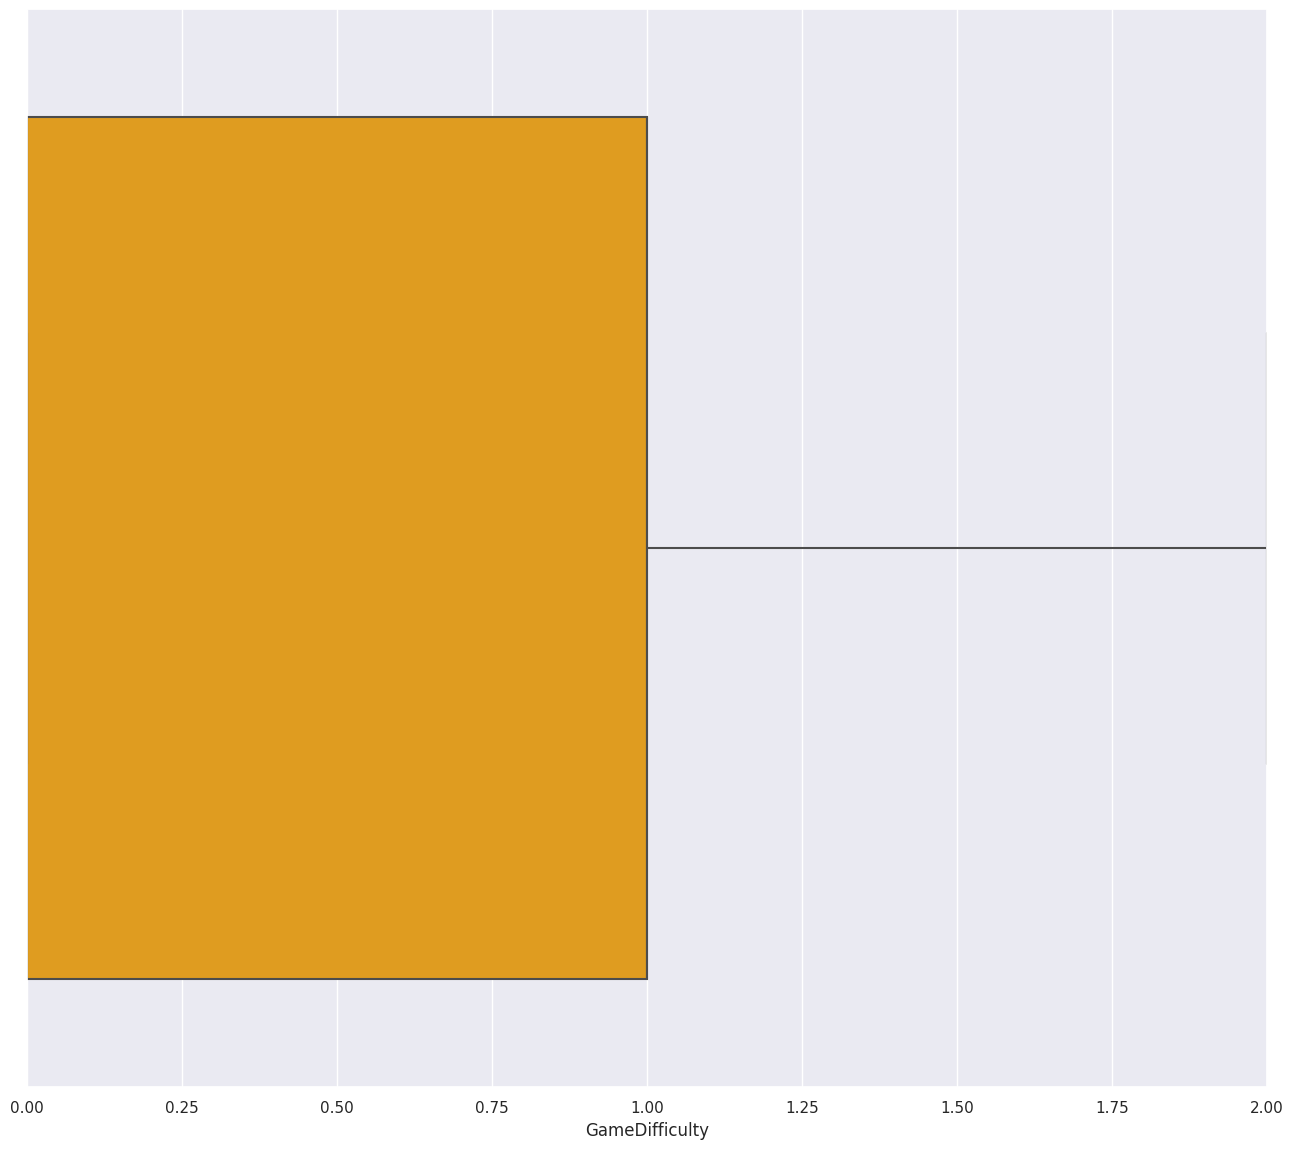

In [ ]:
boxxer_plot = sns.boxplot(x = 'GameDifficulty', data = dataframed, color = 'Orange')
boxxer_plot.set(xlim = (0.0000, 2.0000))

In [ ]:
numpy_array = np.array(dataframed['GameDifficulty'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than -1.5000 or greater than 2.5000
There are 0 outliers.


[(0.0, 19.0)]

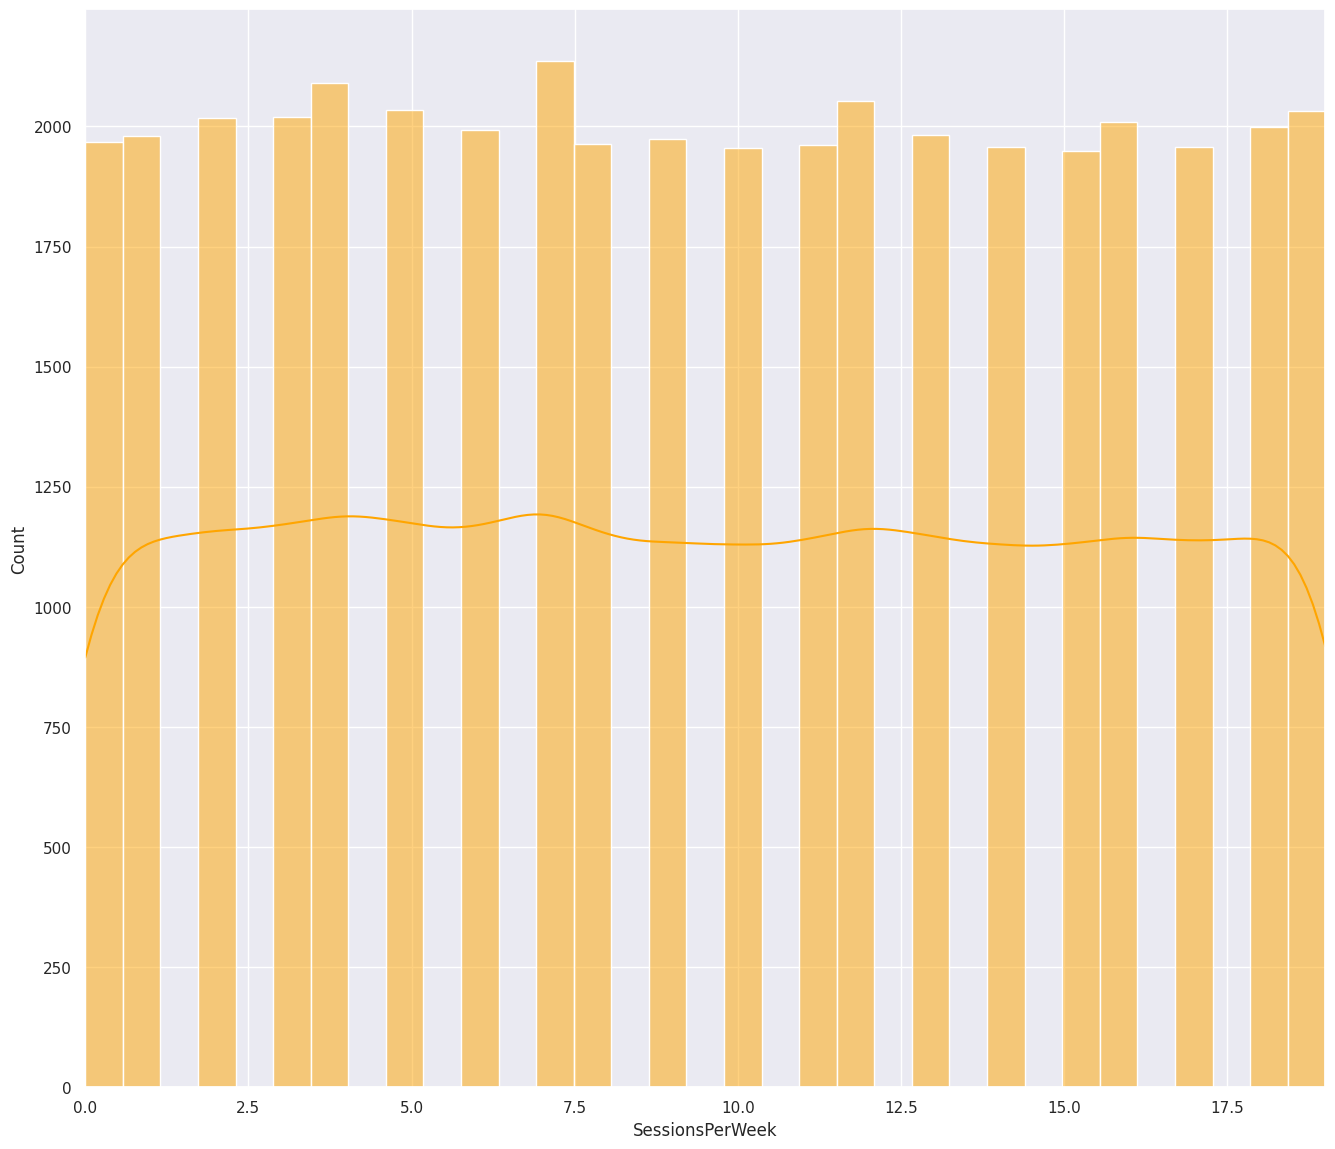

In [ ]:
count_plotted = sns.histplot(x = 'SessionsPerWeek', data = dataframed, kde = True, color = 'Orange')
count_plotted.set(xlabel = "SessionsPerWeek")
count_plotted.set(xlim = (0.0000, 19.0000))

[(0.0, 19.0)]

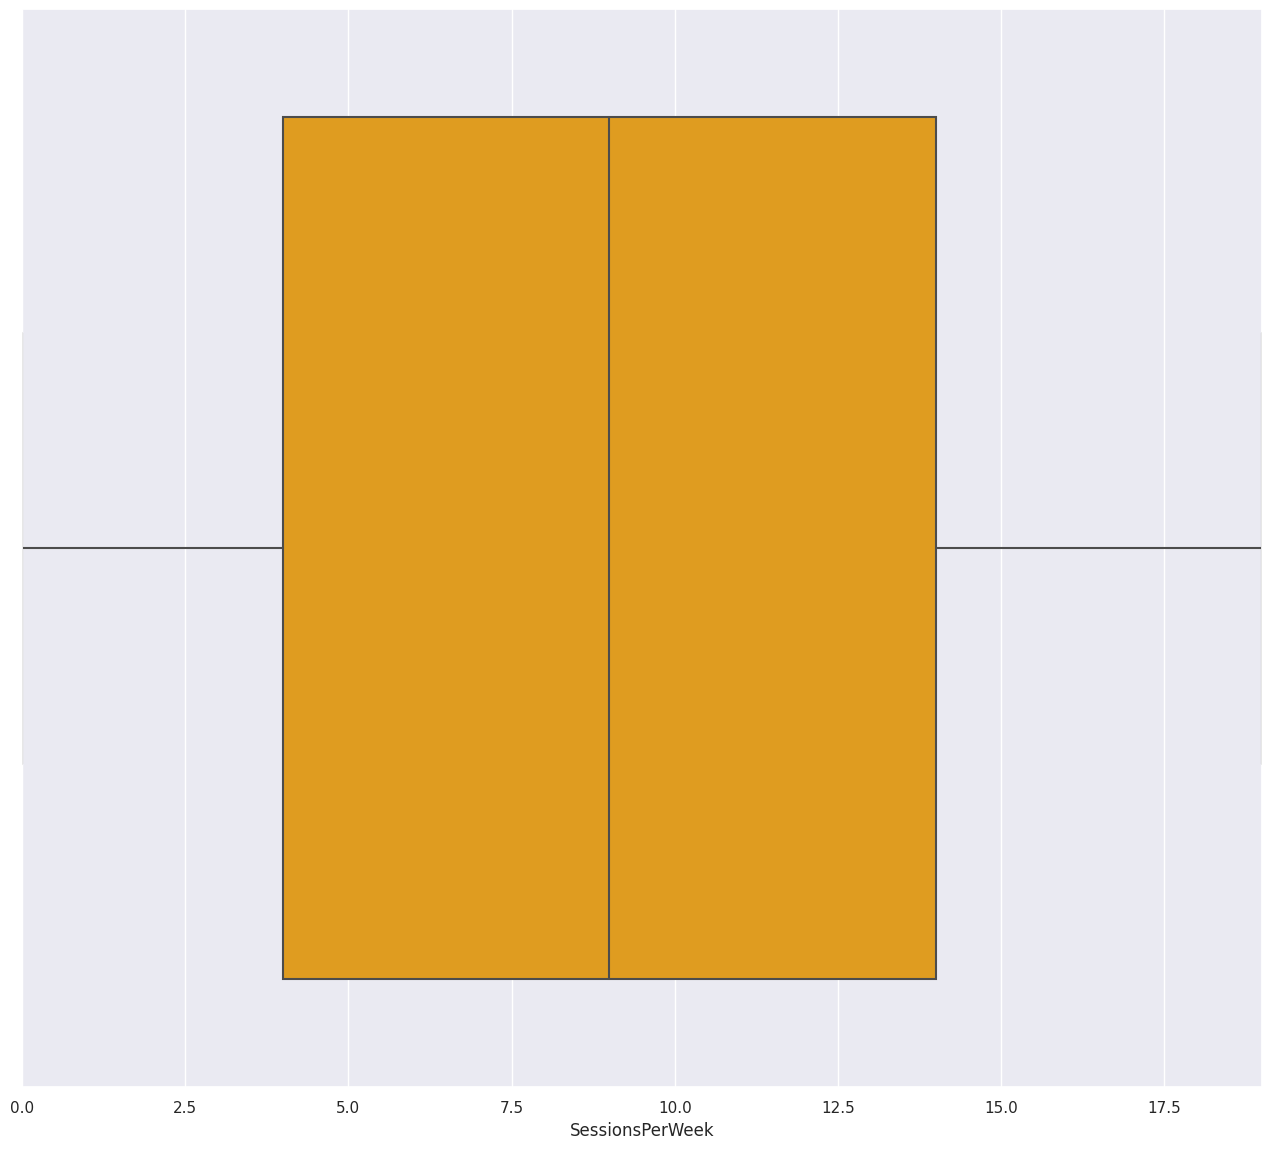

In [ ]:
boxxer_plot = sns.boxplot(x = 'SessionsPerWeek', data = dataframed, color = 'Orange')
boxxer_plot.set(xlim = (0.0000, 19.0000))

In [ ]:
numpy_array = np.array(dataframed['SessionsPerWeek'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than -11.0000 or greater than 29.0000
There are 0 outliers.


[(10.0, 179.0)]

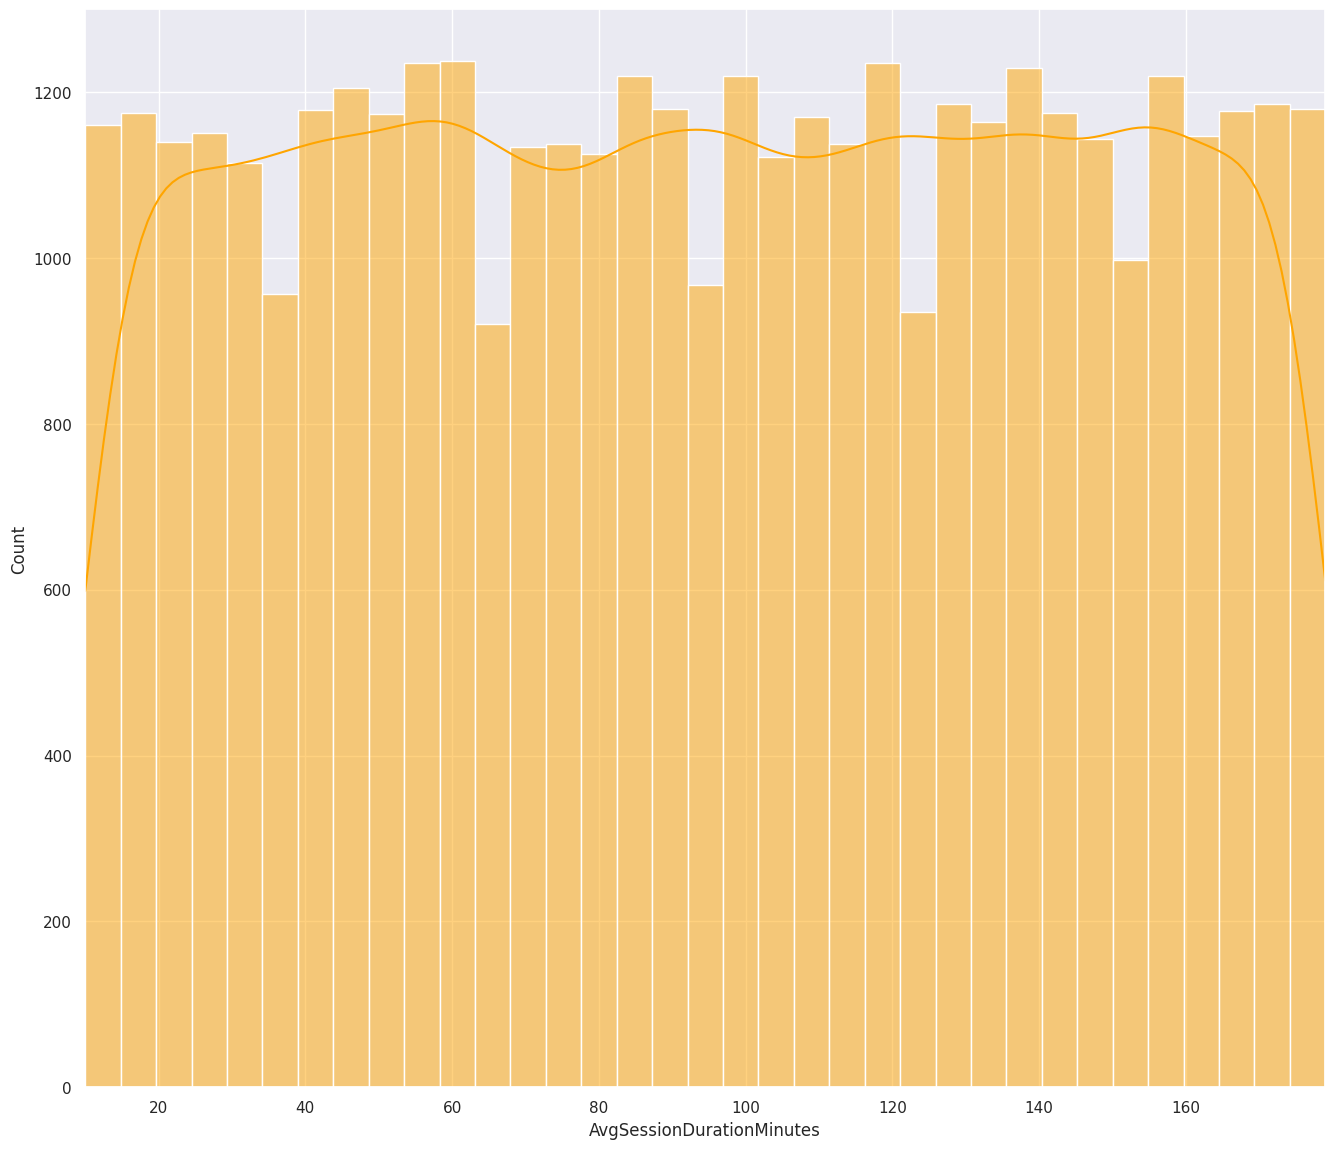

In [ ]:
count_plotted = sns.histplot(x = 'AvgSessionDurationMinutes', data = dataframed, kde = True, color = 'Orange')
count_plotted.set(xlabel = "AvgSessionDurationMinutes")
count_plotted.set(xlim = (10.0000, 179.0000))

[(10.0, 179.0)]

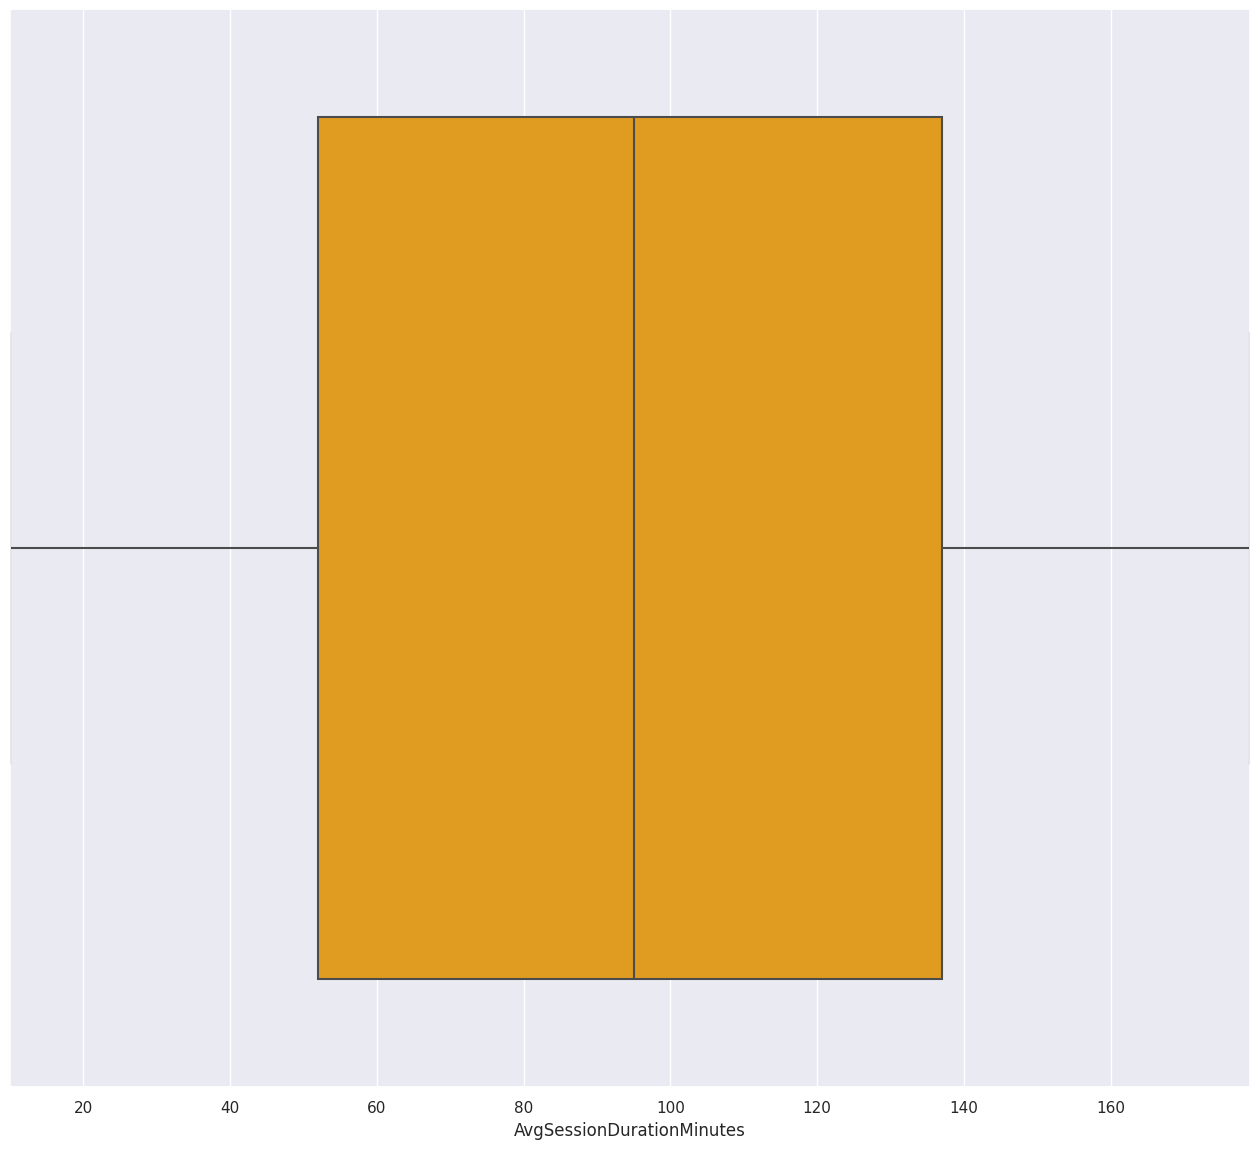

In [ ]:
boxxer_plot = sns.boxplot(x = 'AvgSessionDurationMinutes', data = dataframed, color = 'Orange')
boxxer_plot.set(xlim = (10.0000, 179.0000))

In [ ]:
numpy_array = np.array(dataframed['AvgSessionDurationMinutes'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than -75.5000 or greater than 264.5000
There are 0 outliers.


[(1.0, 99.0)]

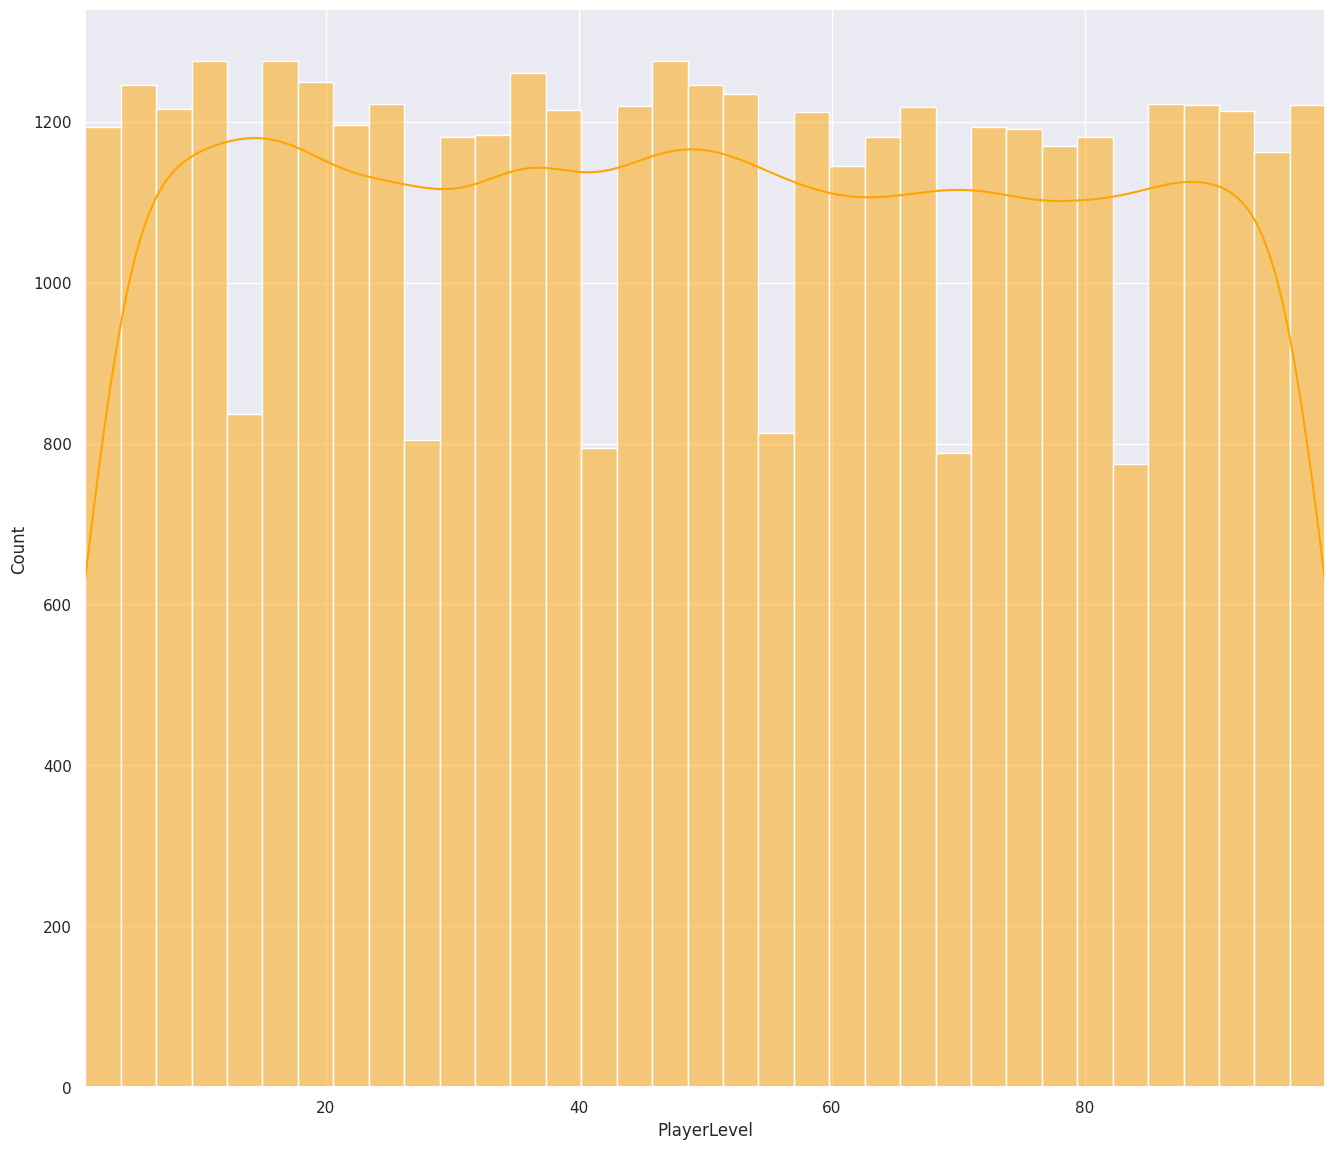

In [ ]:
count_plotted = sns.histplot(x = 'PlayerLevel', data = dataframed, kde = True, color = 'Orange')
count_plotted.set(xlabel = "PlayerLevel")
count_plotted.set(xlim = (1.0000, 99.0000))

[(1.0, 99.0)]

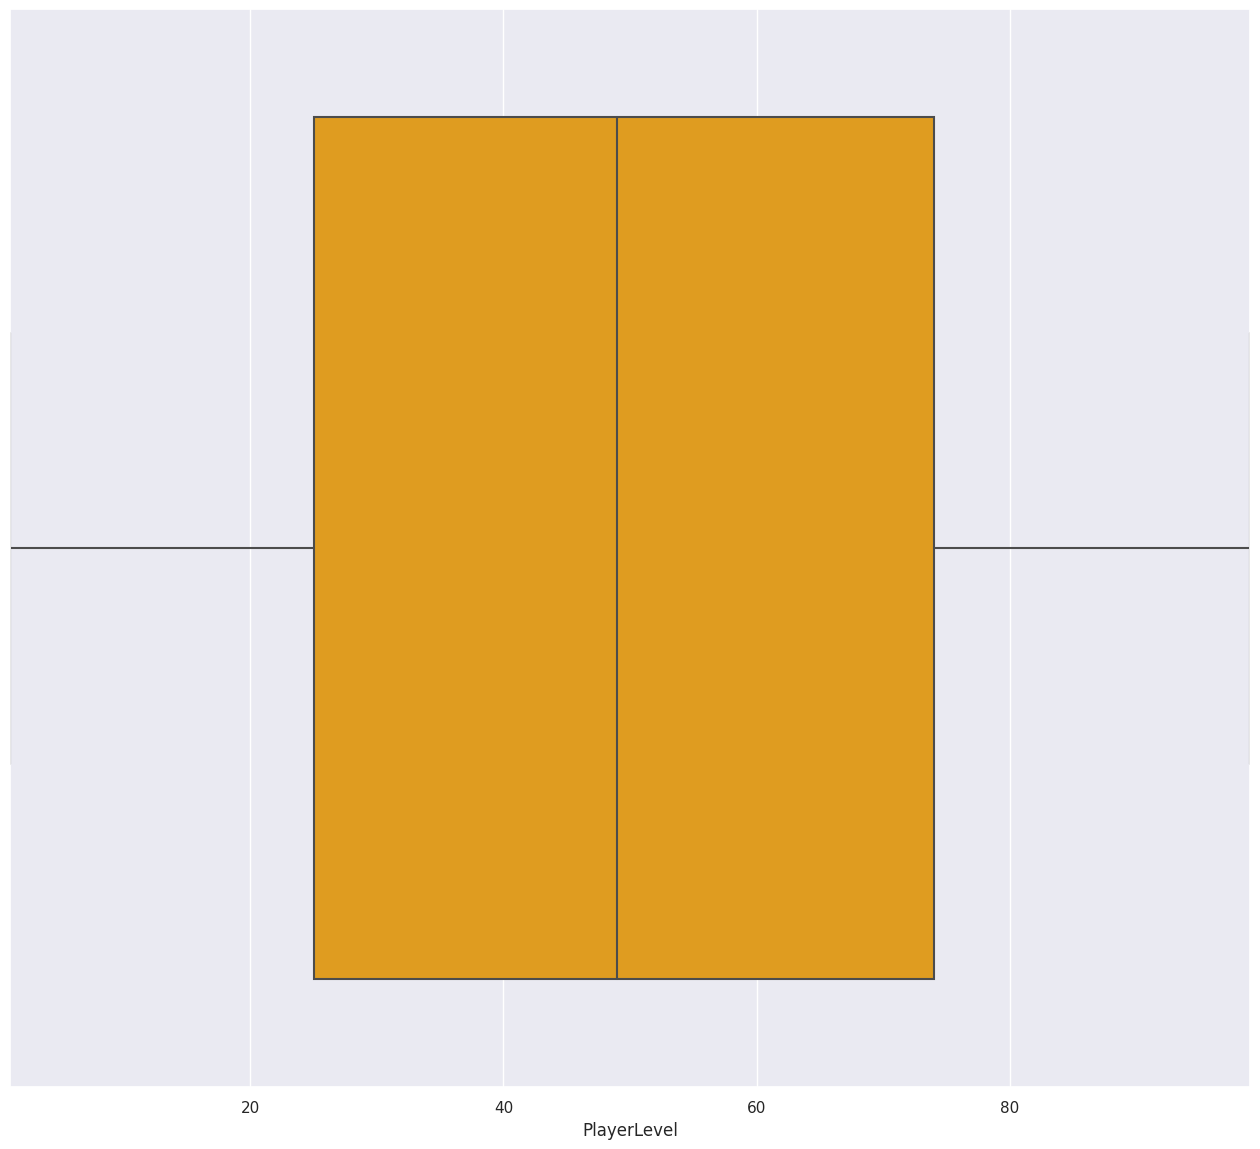

In [ ]:
boxxer_plot = sns.boxplot(x = 'PlayerLevel', data = dataframed, color = 'Orange')
boxxer_plot.set(xlim = (1.0000, 99.0000))

In [ ]:
numpy_array = np.array(dataframed['PlayerLevel'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than -48.5000 or greater than 147.5000
There are 0 outliers.


[(0.0, 49.0)]

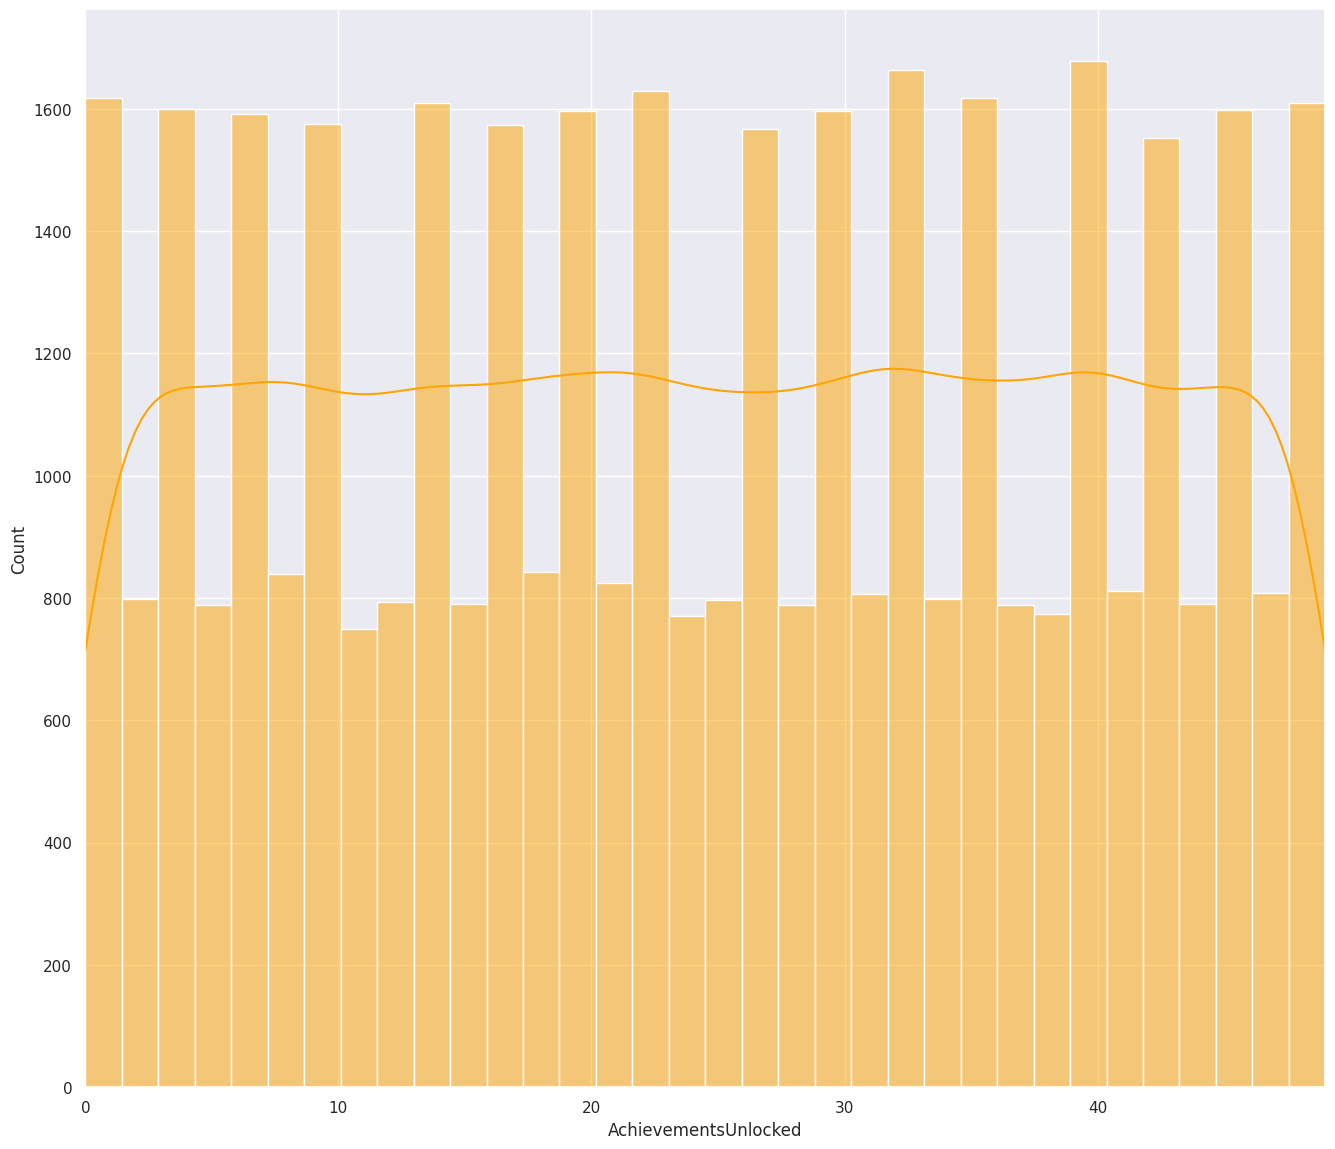

In [ ]:
count_plotted = sns.histplot(x = 'AchievementsUnlocked', data = dataframed, kde = True, color = 'Orange')
count_plotted.set(xlabel = "AchievementsUnlocked")
count_plotted.set(xlim = (0.0000, 49.0000))

[(0.0, 49.0)]

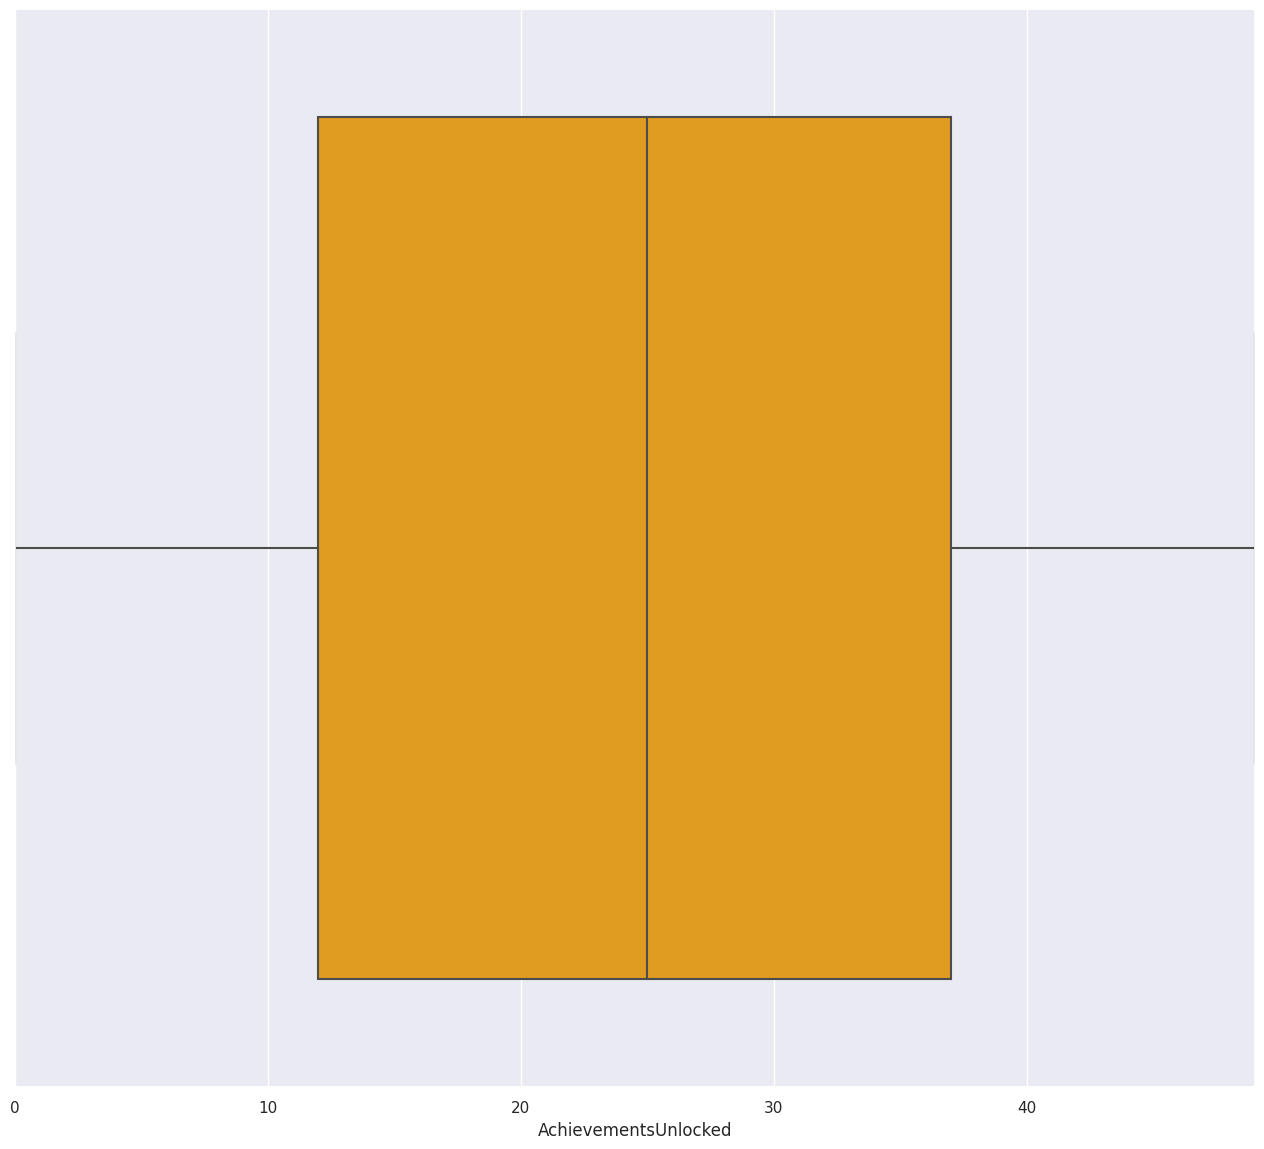

In [ ]:
boxxer_plot = sns.boxplot(x = 'AchievementsUnlocked', data = dataframed, color = 'Orange')
boxxer_plot.set(xlim = (0.0000, 49.0000))

In [ ]:
numpy_array = np.array(dataframed['AchievementsUnlocked'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than -25.5000 or greater than 74.5000
There are 0 outliers.


[(0.0, 2.0)]

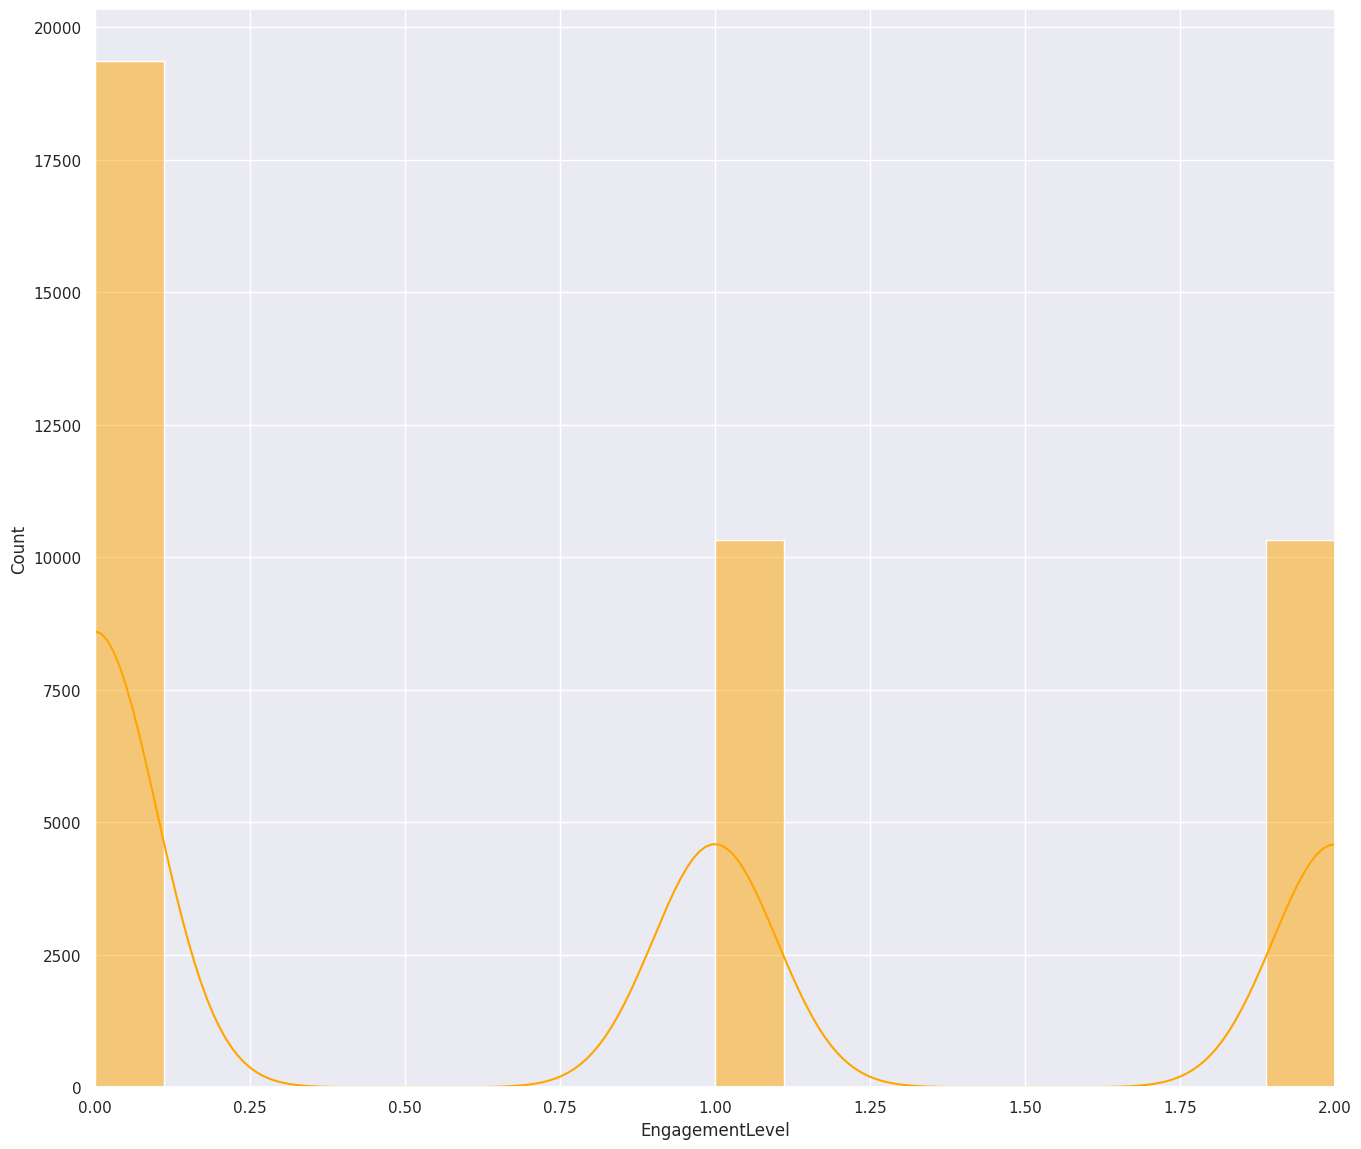

In [ ]:
count_plotted = sns.histplot(x = 'EngagementLevel', data = dataframed, kde = True, color = 'Orange')
count_plotted.set(xlabel = "EngagementLevel")
count_plotted.set(xlim = (0.0000, 2.0000))

[(0.0, 2.0)]

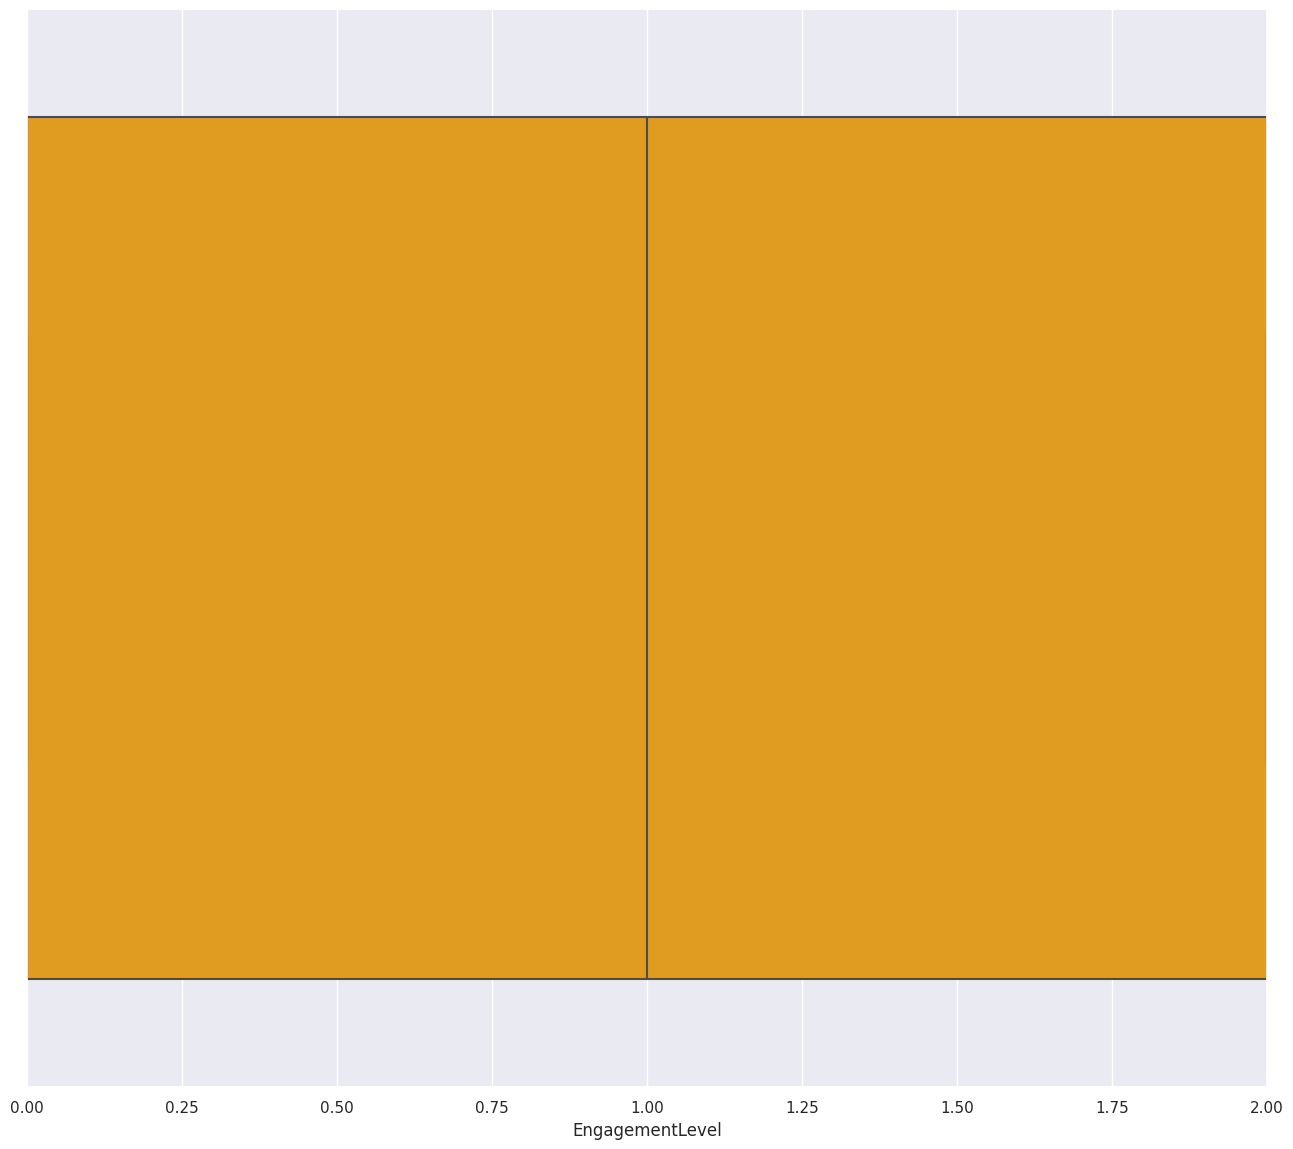

In [ ]:
boxxer_plot = sns.boxplot(x = 'EngagementLevel', data = dataframed, color = 'Orange')
boxxer_plot.set(xlim = (0.0000, 2.0000))

In [ ]:
numpy_array = np.array(dataframed['EngagementLevel'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than -3.0000 or greater than 5.0000
There are 0 outliers.


[(15.0, 49.0)]

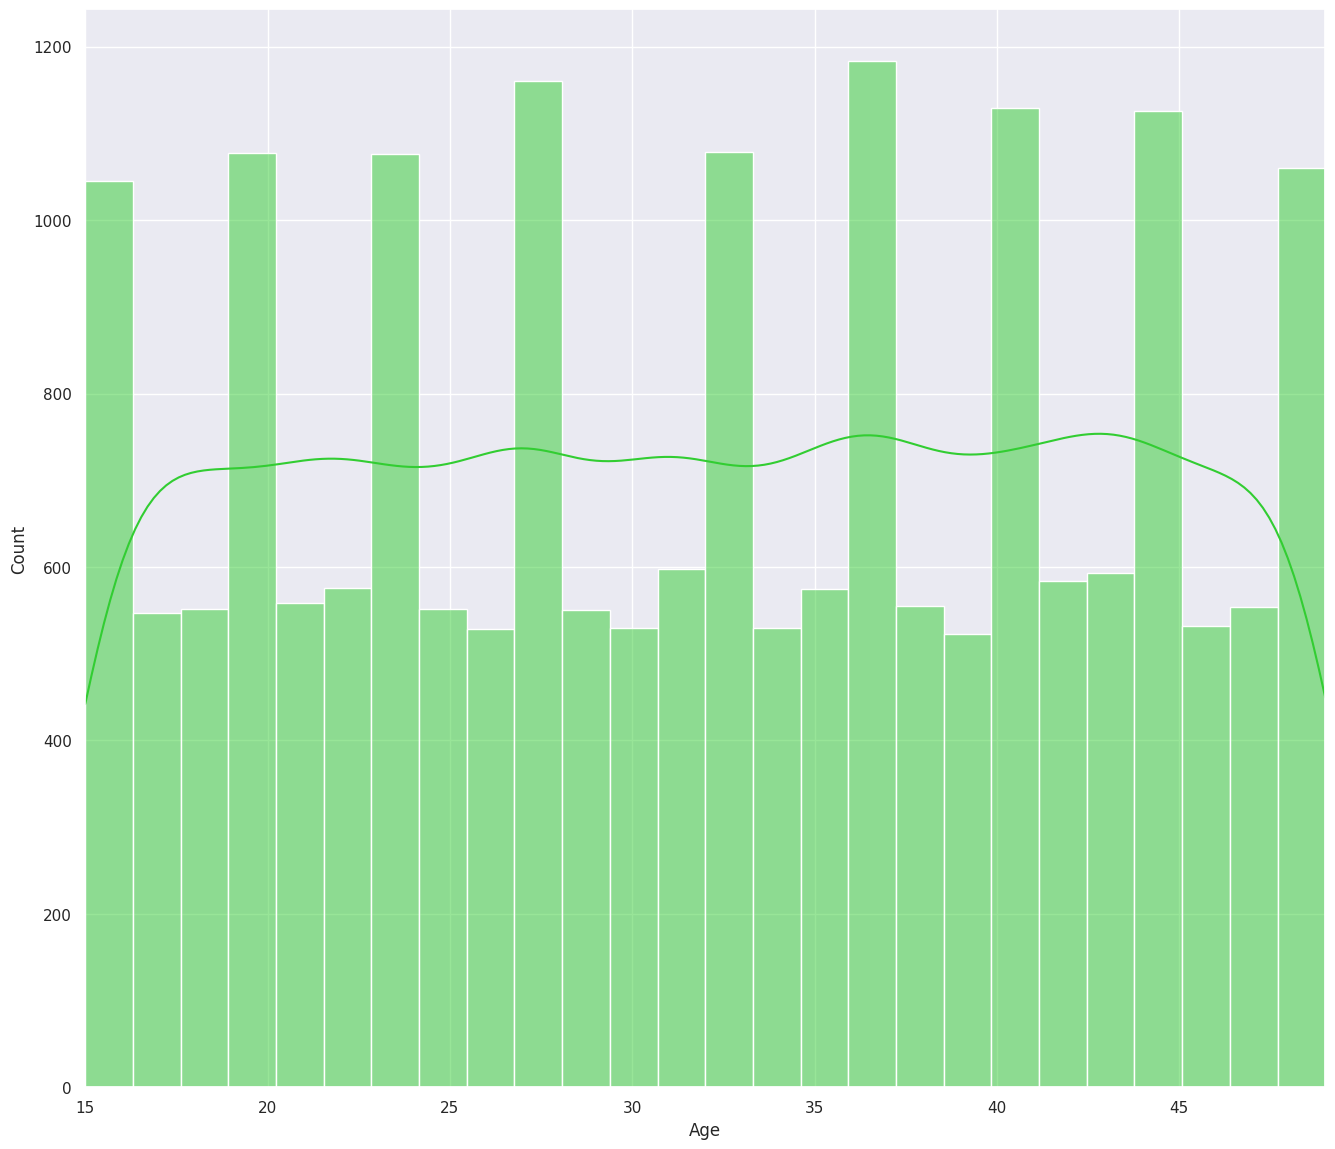

In [ ]:
count_plotted = sns.histplot(x = 'Age', data = dataframed.loc[dataframed['EngagementLevel'] == 0], kde = True, color = 'limegreen')
count_plotted.set(xlabel = "Age")
count_plotted.set(xlim = (15.0000, 49.0000))

[(15.0, 49.0)]

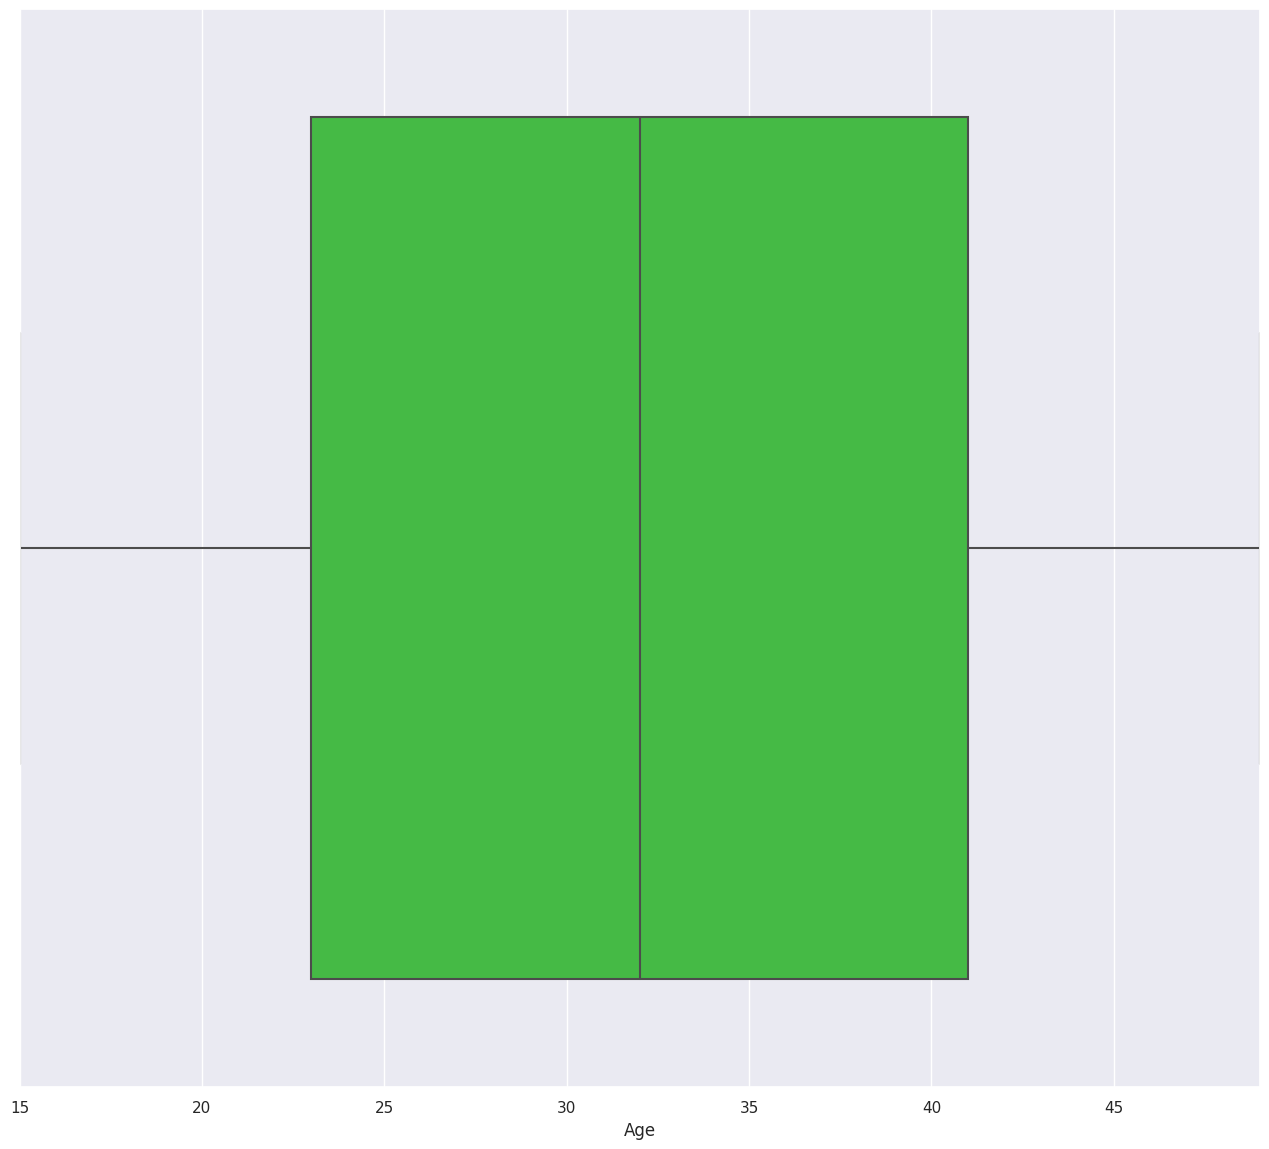

In [ ]:
boxxer_plot = sns.boxplot(x = 'Age', data = dataframed.loc[dataframed['EngagementLevel'] == 0], color = 'limegreen')
boxxer_plot.set(xlim = (15.0000, 49.0000))

In [ ]:
numpy_array = np.array(dataframed.loc[dataframed['EngagementLevel'] == 0]['Age'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than -4.0000 or greater than 68.0000
There are 0 outliers.


[(0.0, 1.0)]

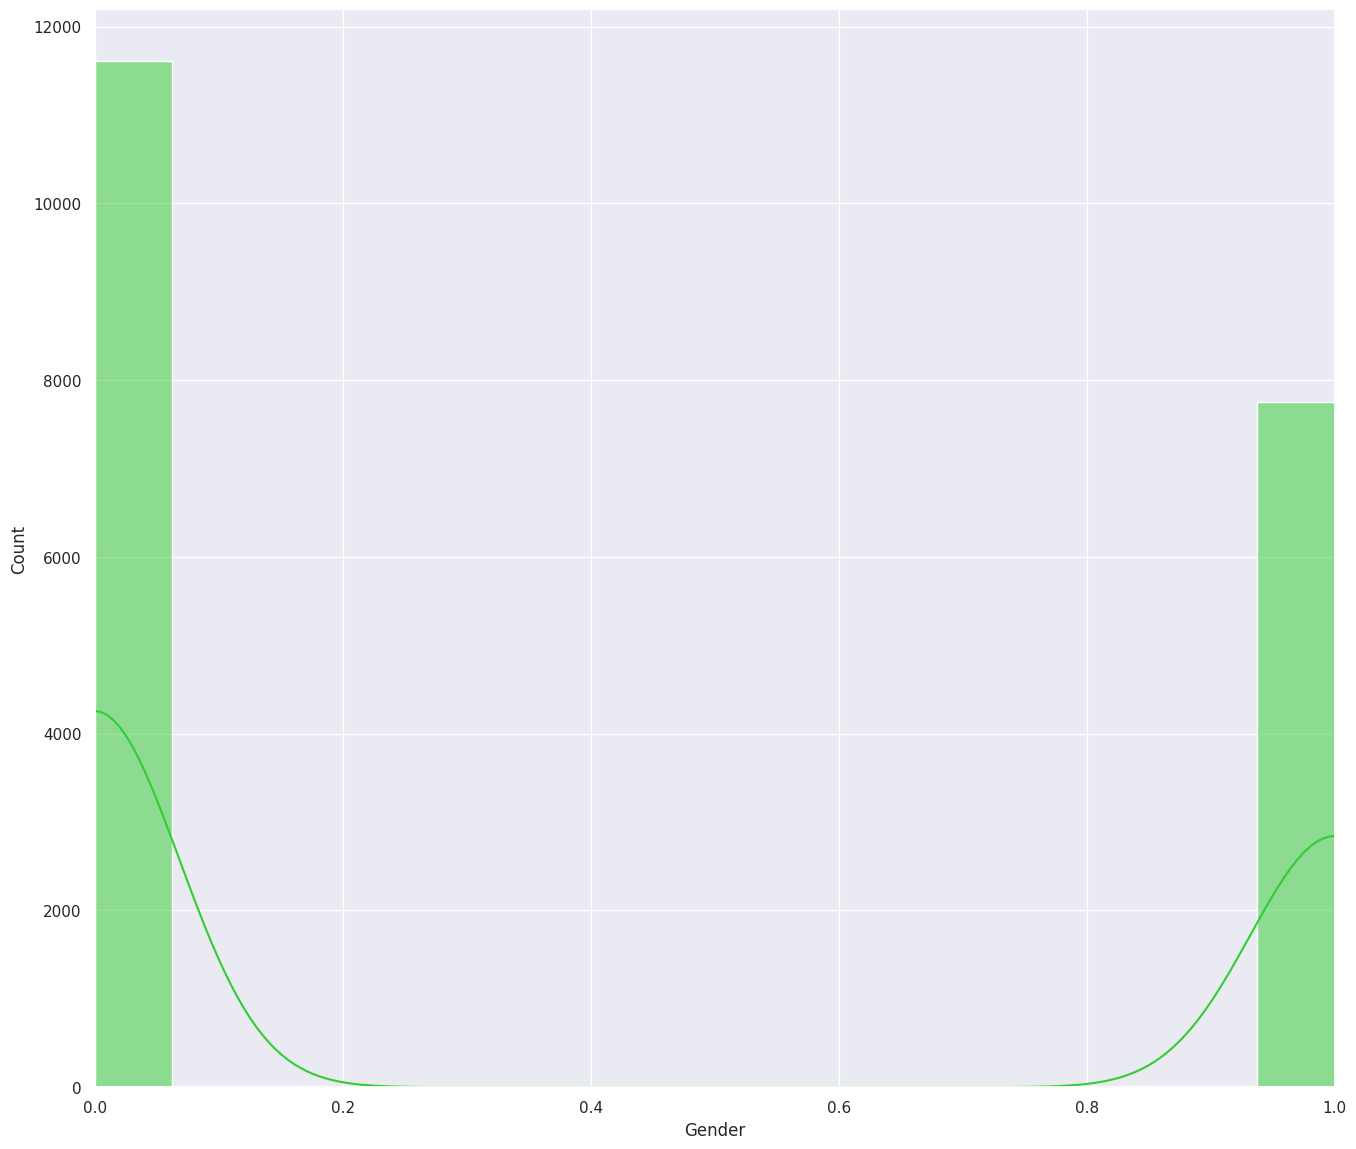

In [ ]:
count_plotted = sns.histplot(x = 'Gender', data = dataframed.loc[dataframed['EngagementLevel'] == 0], kde = True, color = 'limegreen')
count_plotted.set(xlabel = "Gender")
count_plotted.set(xlim = (0.0000, 1.0000))

[(0.0, 1.0)]

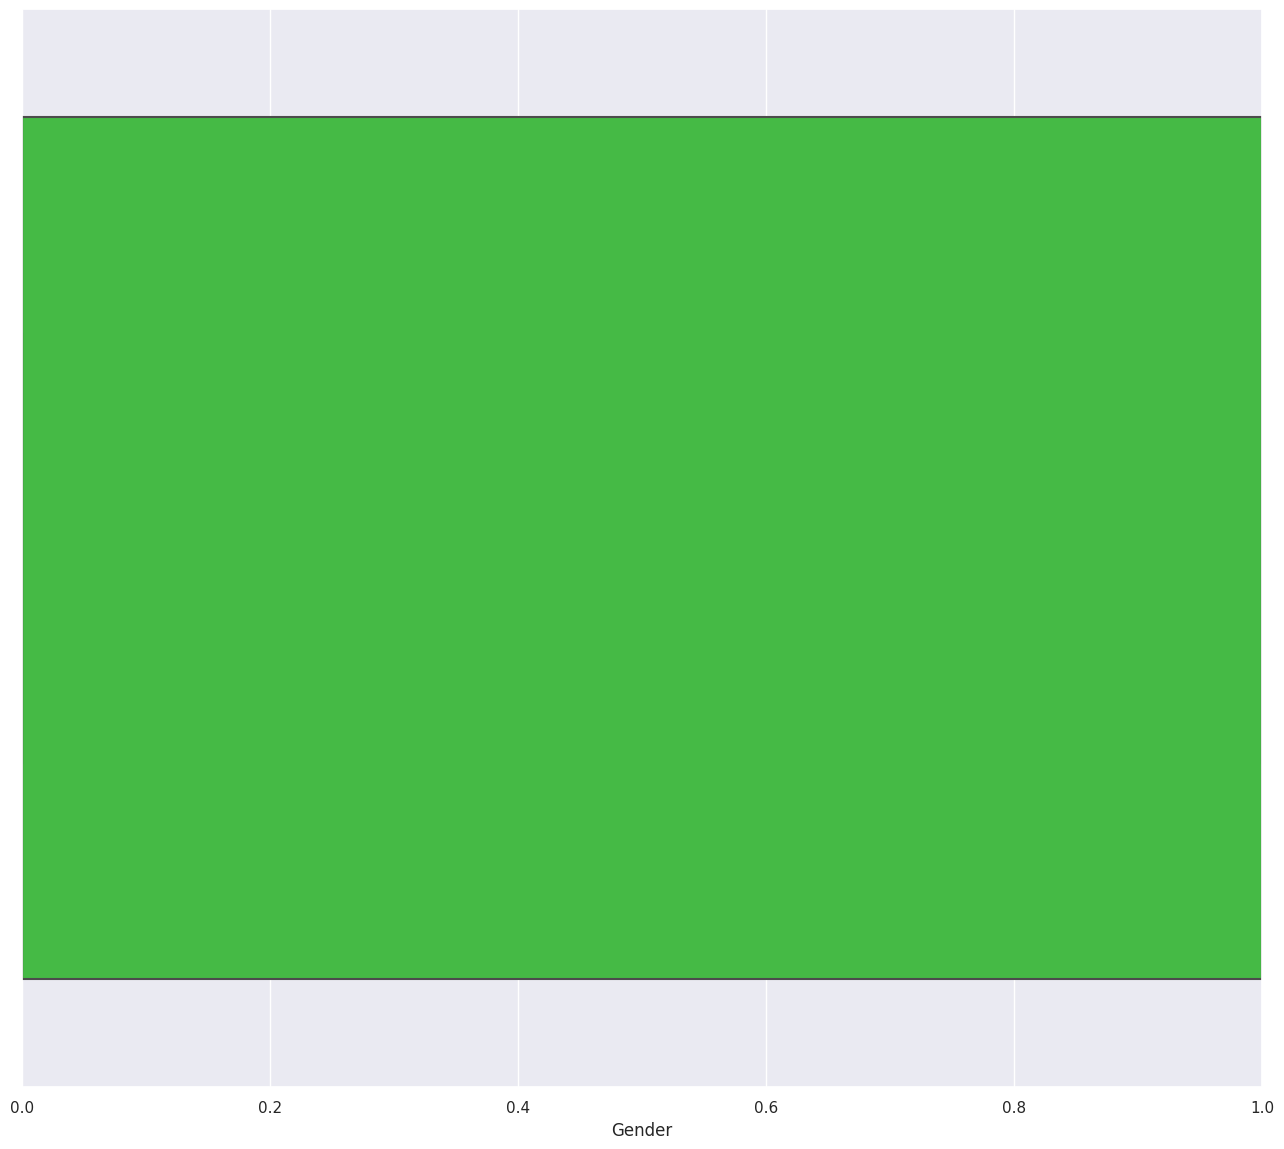

In [ ]:
boxxer_plot = sns.boxplot(x = 'Gender', data = dataframed.loc[dataframed['EngagementLevel'] == 0], color = 'limegreen')
boxxer_plot.set(xlim = (0.0000, 1.0000))

In [ ]:
numpy_array = np.array(dataframed.loc[dataframed['EngagementLevel'] == 0]['Gender'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than -1.5000 or greater than 2.5000
There are 0 outliers.


[(0.0, 3.0)]

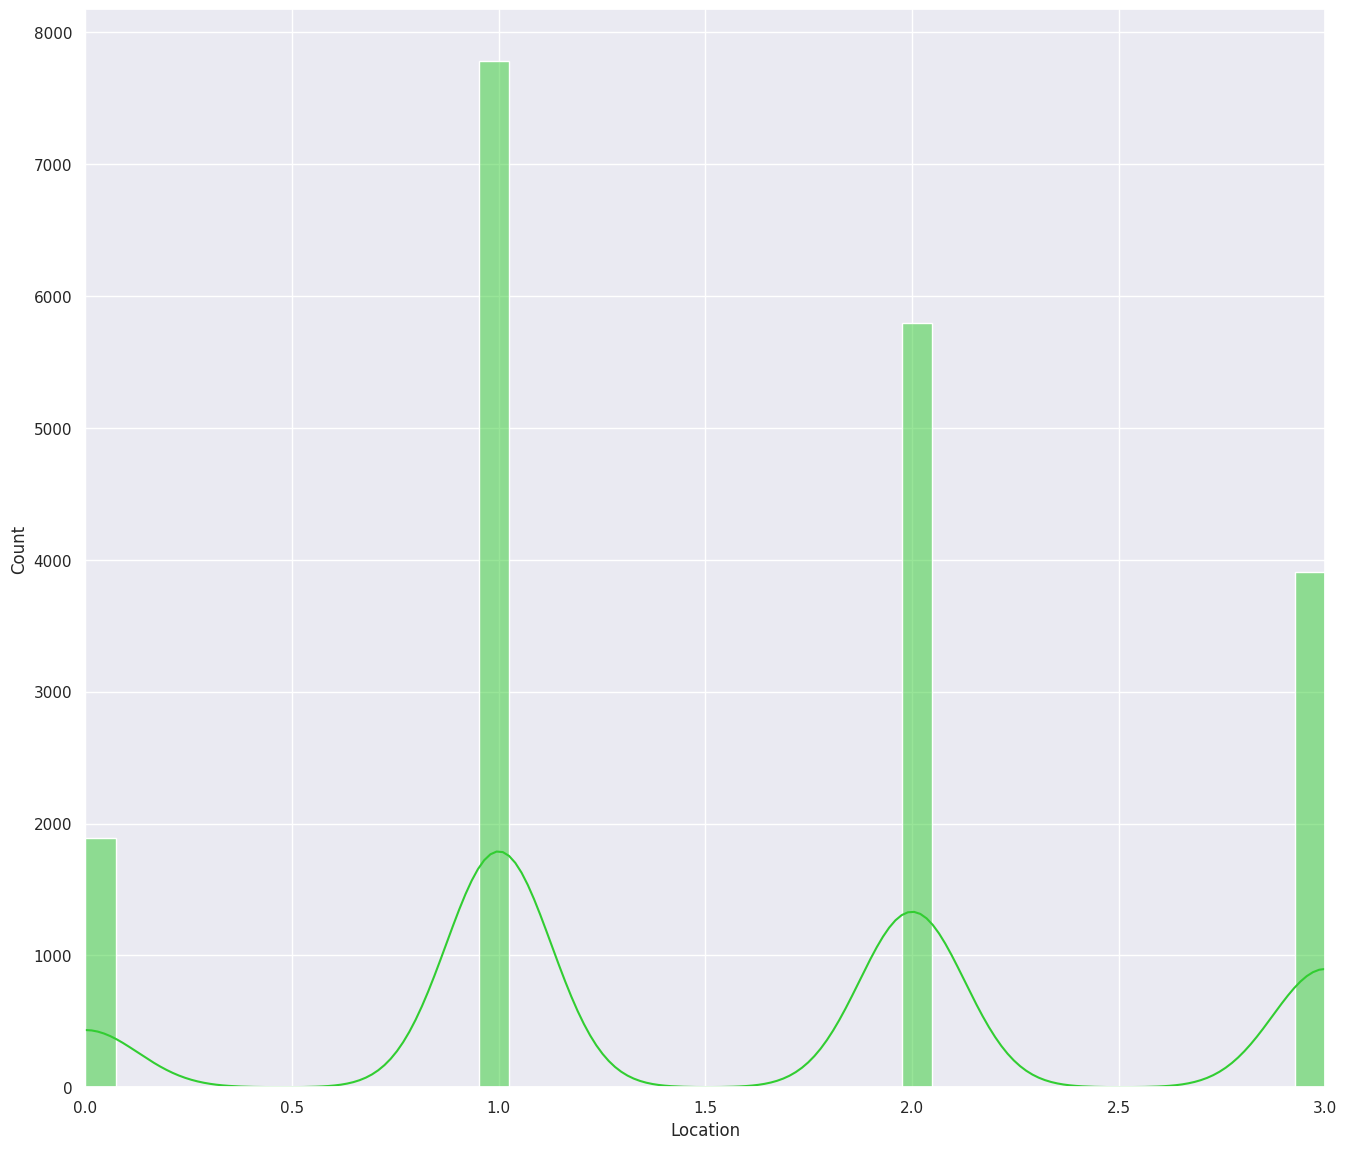

In [ ]:
count_plotted = sns.histplot(x = 'Location', data = dataframed.loc[dataframed['EngagementLevel'] == 0], kde = True, color = 'limegreen')
count_plotted.set(xlabel = "Location")
count_plotted.set(xlim = (0.0000, 3.0000))

[(0.0, 3.0)]

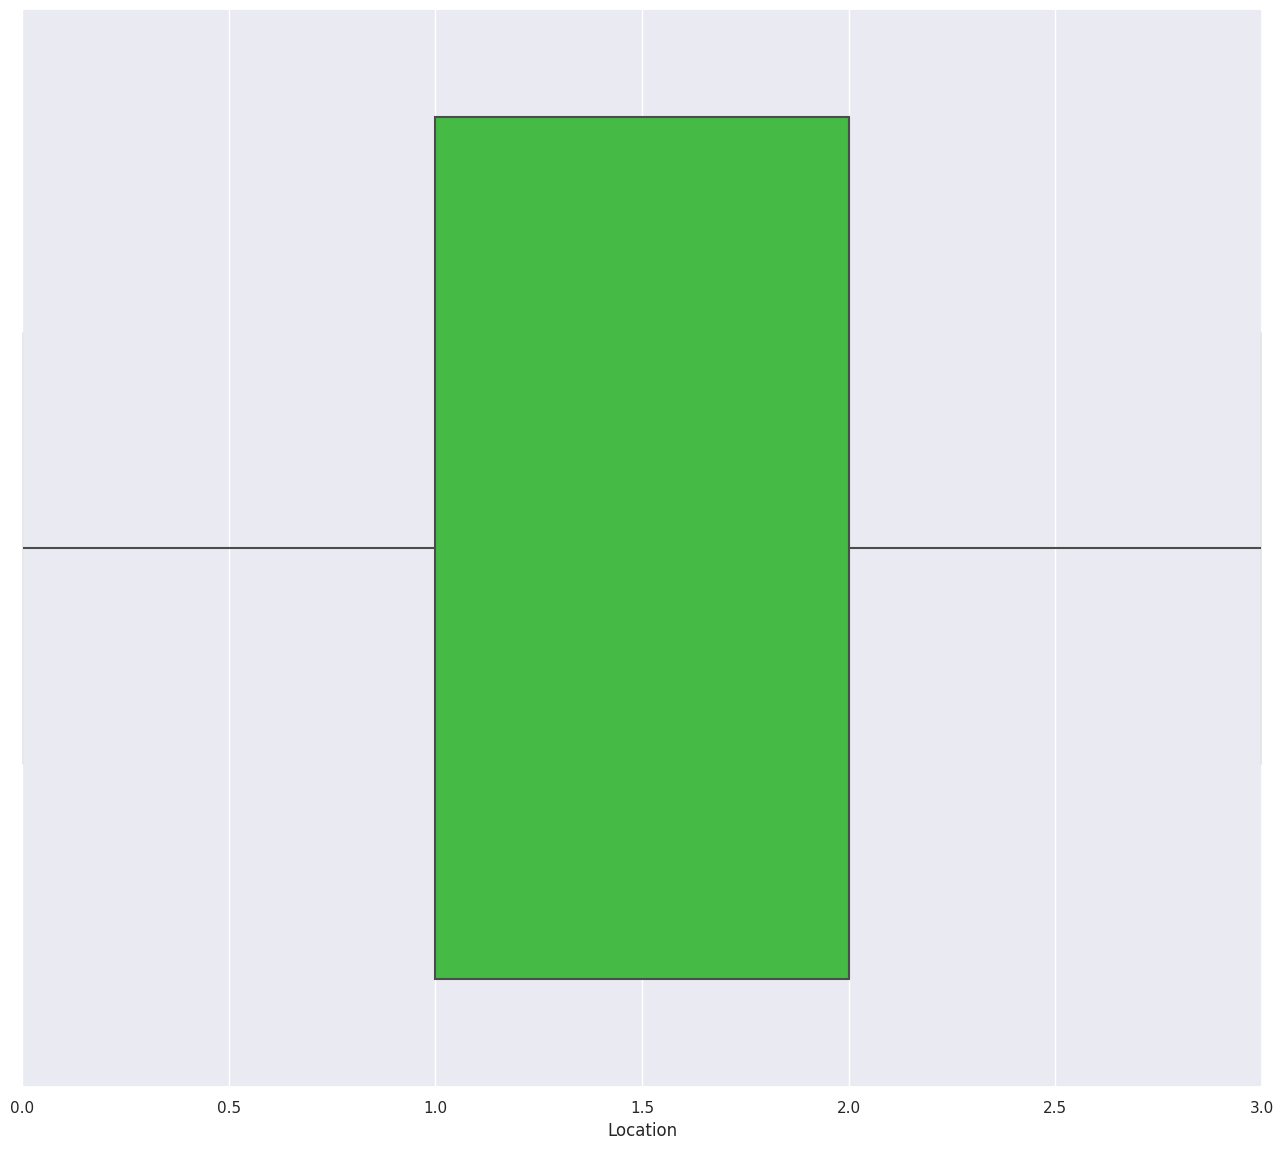

In [ ]:
boxxer_plot = sns.boxplot(x = 'Location', data = dataframed.loc[dataframed['EngagementLevel'] == 0], color = 'limegreen')
boxxer_plot.set(xlim = (0.0000, 3.0000))

In [ ]:
numpy_array = np.array(dataframed.loc[dataframed['EngagementLevel'] == 0]['Location'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than -0.5000 or greater than 3.5000
There are 0 outliers.


[(0.0, 4.0)]

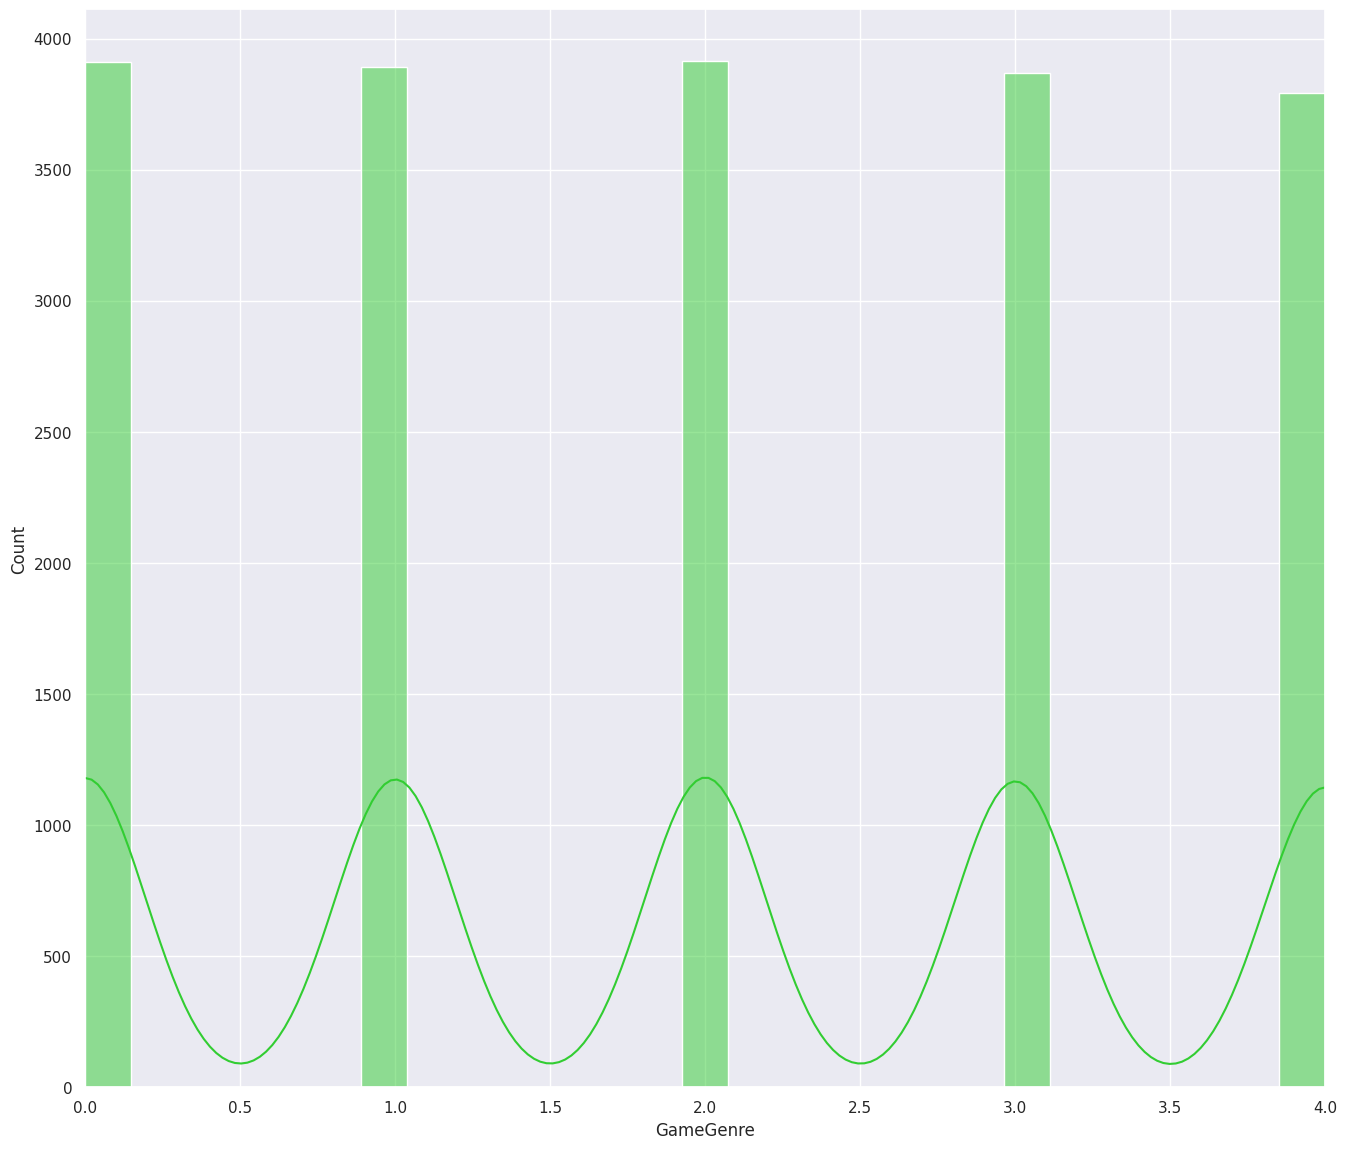

In [ ]:
count_plotted = sns.histplot(x = 'GameGenre', data = dataframed.loc[dataframed['EngagementLevel'] == 0], kde = True, color = 'limegreen')
count_plotted.set(xlabel = "GameGenre")
count_plotted.set(xlim = (0.0000, 4.0000))

In [ ]:
numpy_array = np.array(dataframed.loc[dataframed['EngagementLevel'] == 0]['GameGenre'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than -2.0000 or greater than 6.0000
There are 0 outliers.


[(0.0001, 23.9996)]

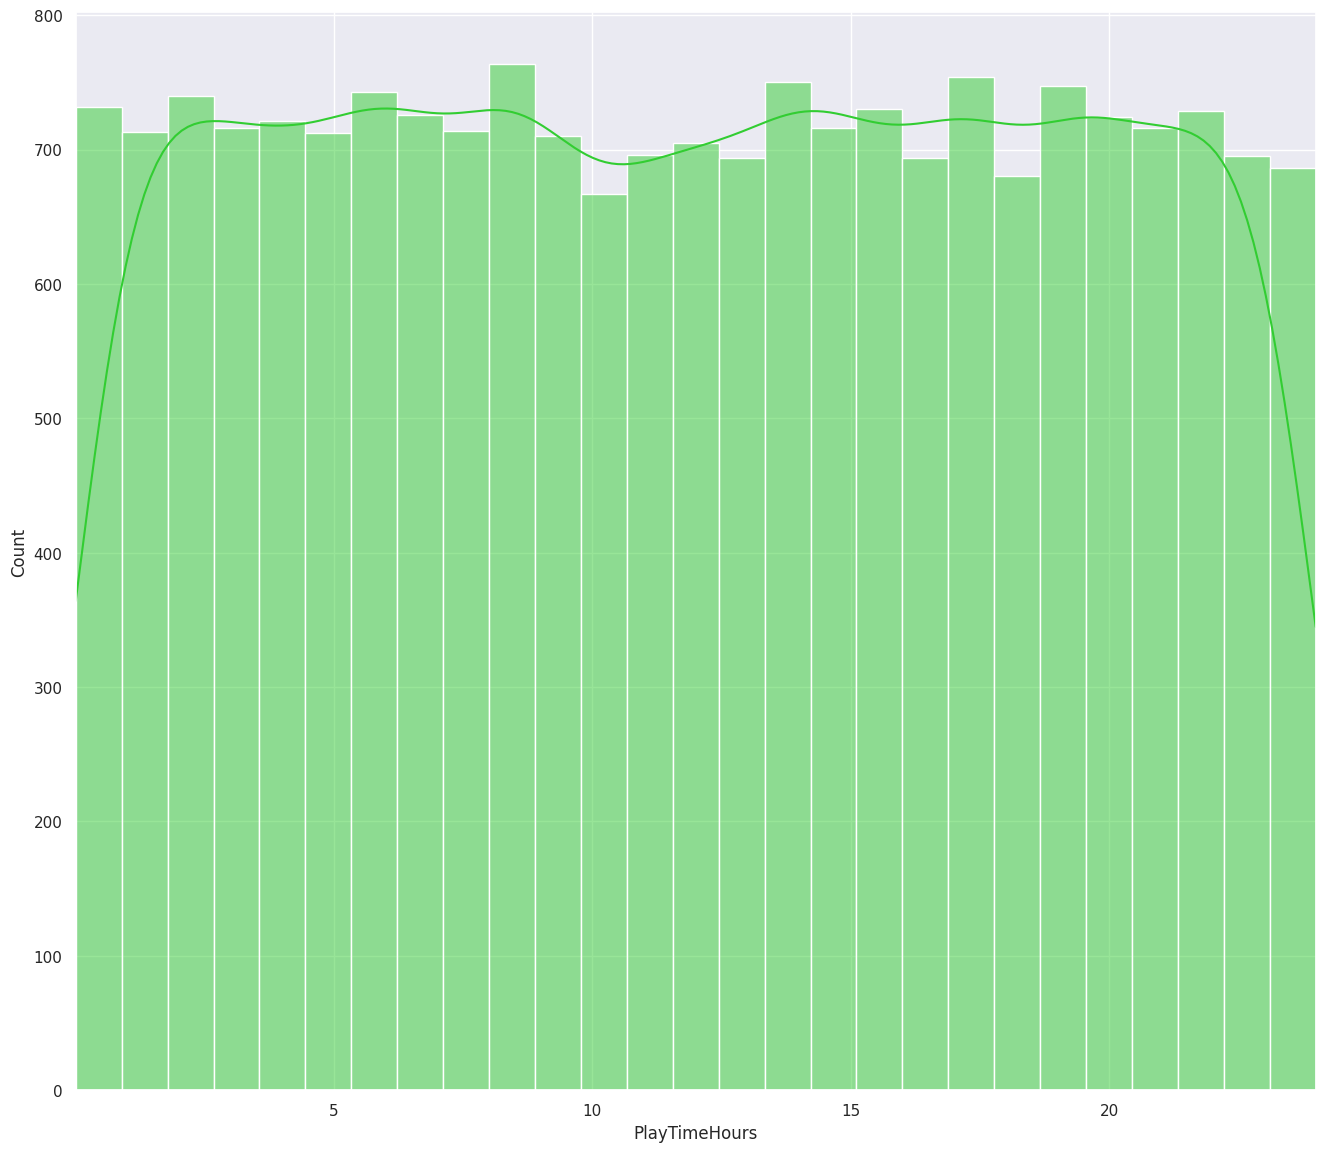

In [ ]:
count_plotted = sns.histplot(x = 'PlayTimeHours', data = dataframed.loc[dataframed['EngagementLevel'] == 0], kde = True, color = 'limegreen')
count_plotted.set(xlabel = "PlayTimeHours")
count_plotted.set(xlim = (0.0001, 23.9996))

[(0.0001, 23.9996)]

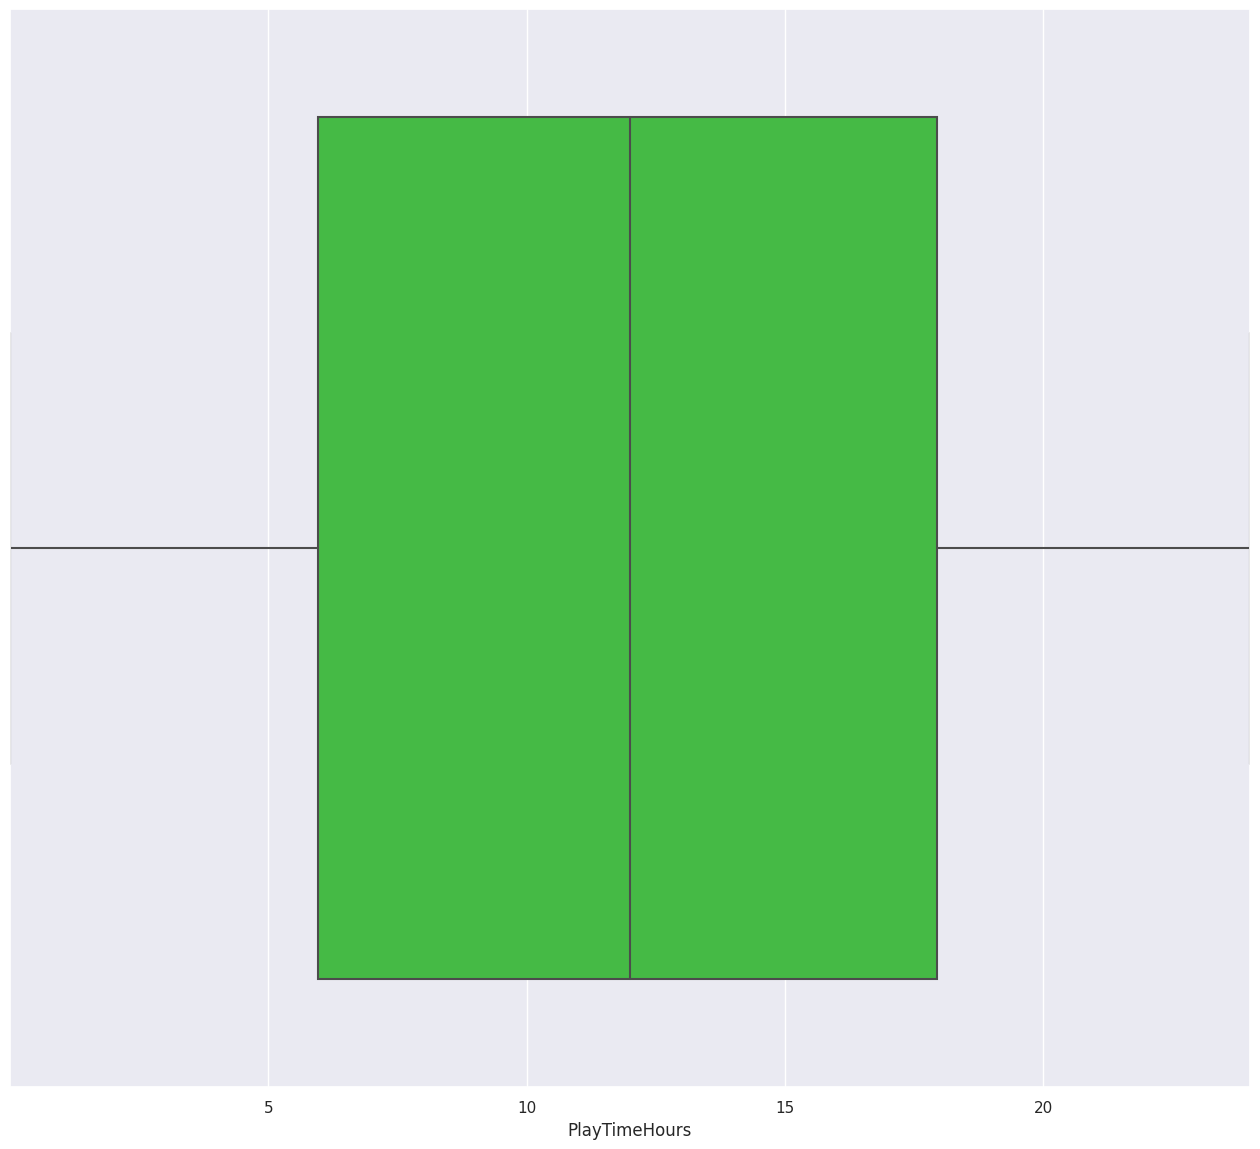

In [ ]:
boxxer_plot = sns.boxplot(x = 'PlayTimeHours', data = dataframed.loc[dataframed['EngagementLevel'] == 0], color = 'limegreen')
boxxer_plot.set(xlim = (0.0001, 23.9996))

In [ ]:
numpy_array = np.array(dataframed.loc[dataframed['EngagementLevel'] == 0]['PlayTimeHours'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than -12.0124 or greater than 35.9029
There are 0 outliers.


[(0.0, 1.0)]

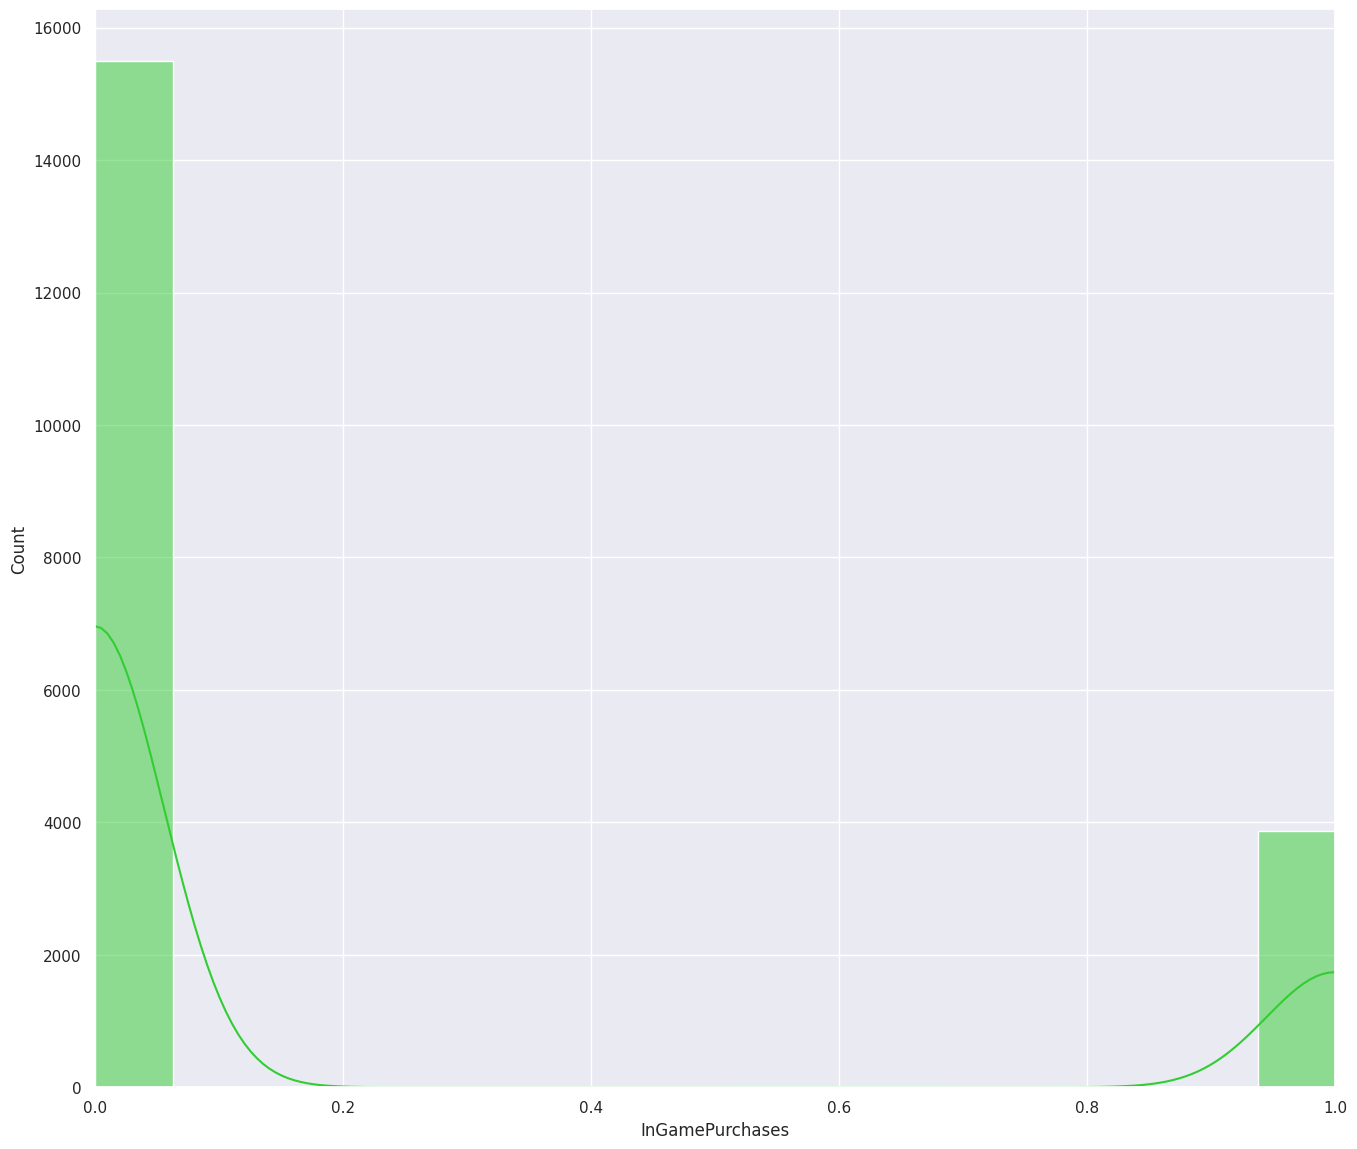

In [ ]:
count_plotted = sns.histplot(x = 'InGamePurchases', data = dataframed.loc[dataframed['EngagementLevel'] == 0], kde = True, color = 'limegreen')
count_plotted.set(xlabel = "InGamePurchases")
count_plotted.set(xlim = (0.0000, 1.0000))

[(0.0, 1.0)]

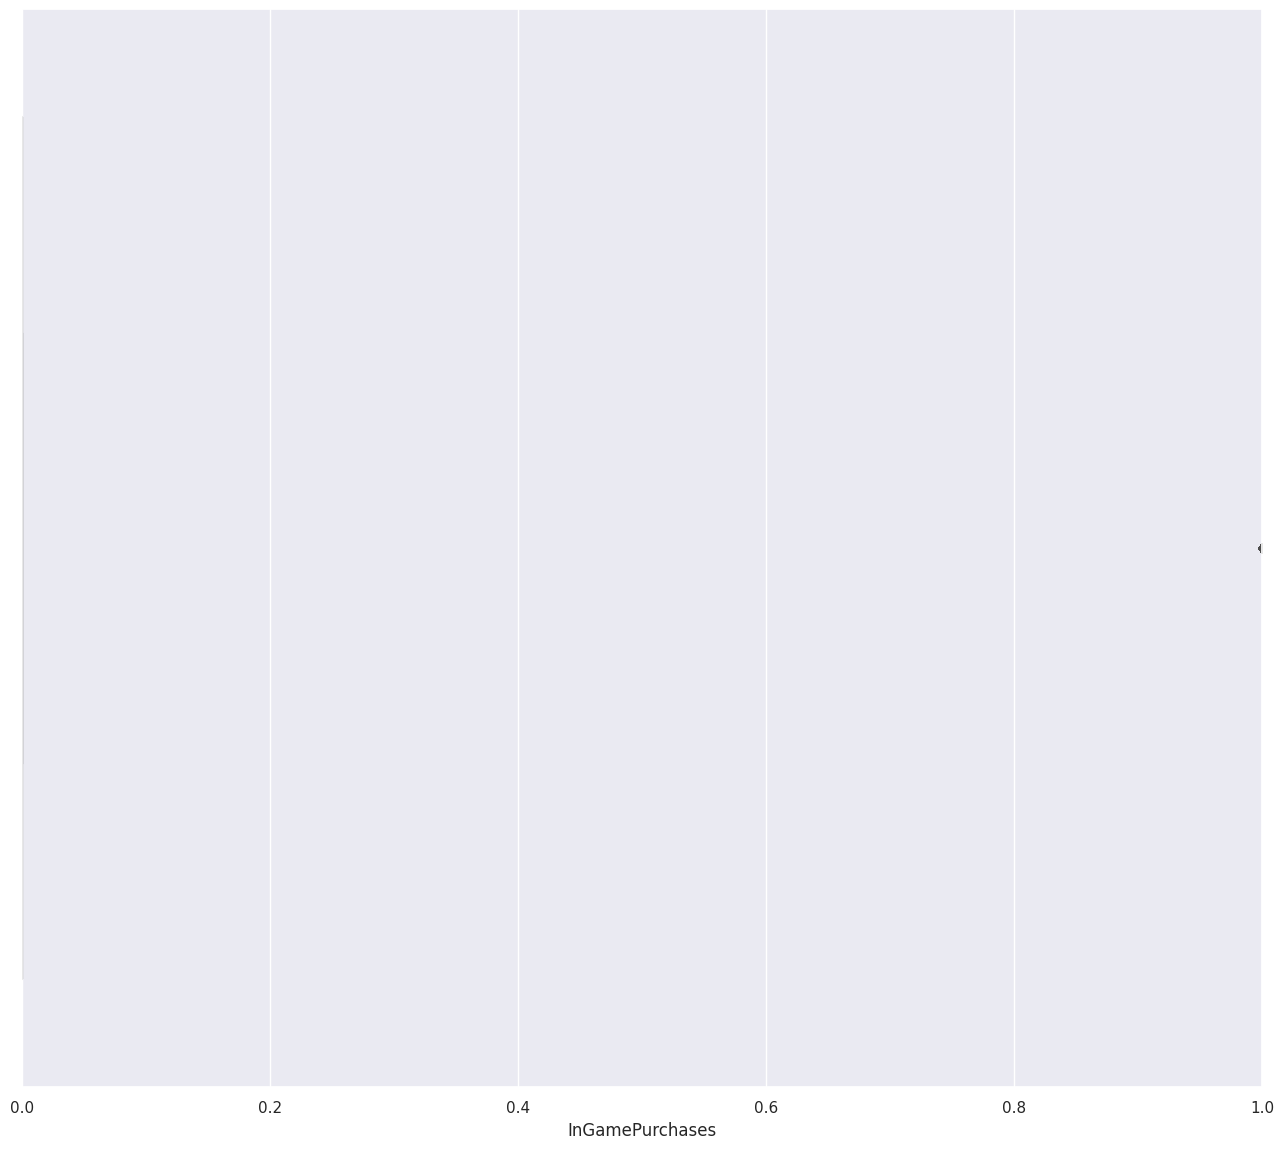

In [ ]:
boxxer_plot = sns.boxplot(x = 'InGamePurchases', data = dataframed.loc[dataframed['EngagementLevel'] == 0], color = 'limegreen')
boxxer_plot.set(xlim = (0.0000, 1.0000))

In [ ]:
numpy_array = np.array(dataframed.loc[dataframed['EngagementLevel'] == 0]['InGamePurchases'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than 0.0000 or greater than 0.0000
There are 3870 outliers.


[(0.0, 2.0)]

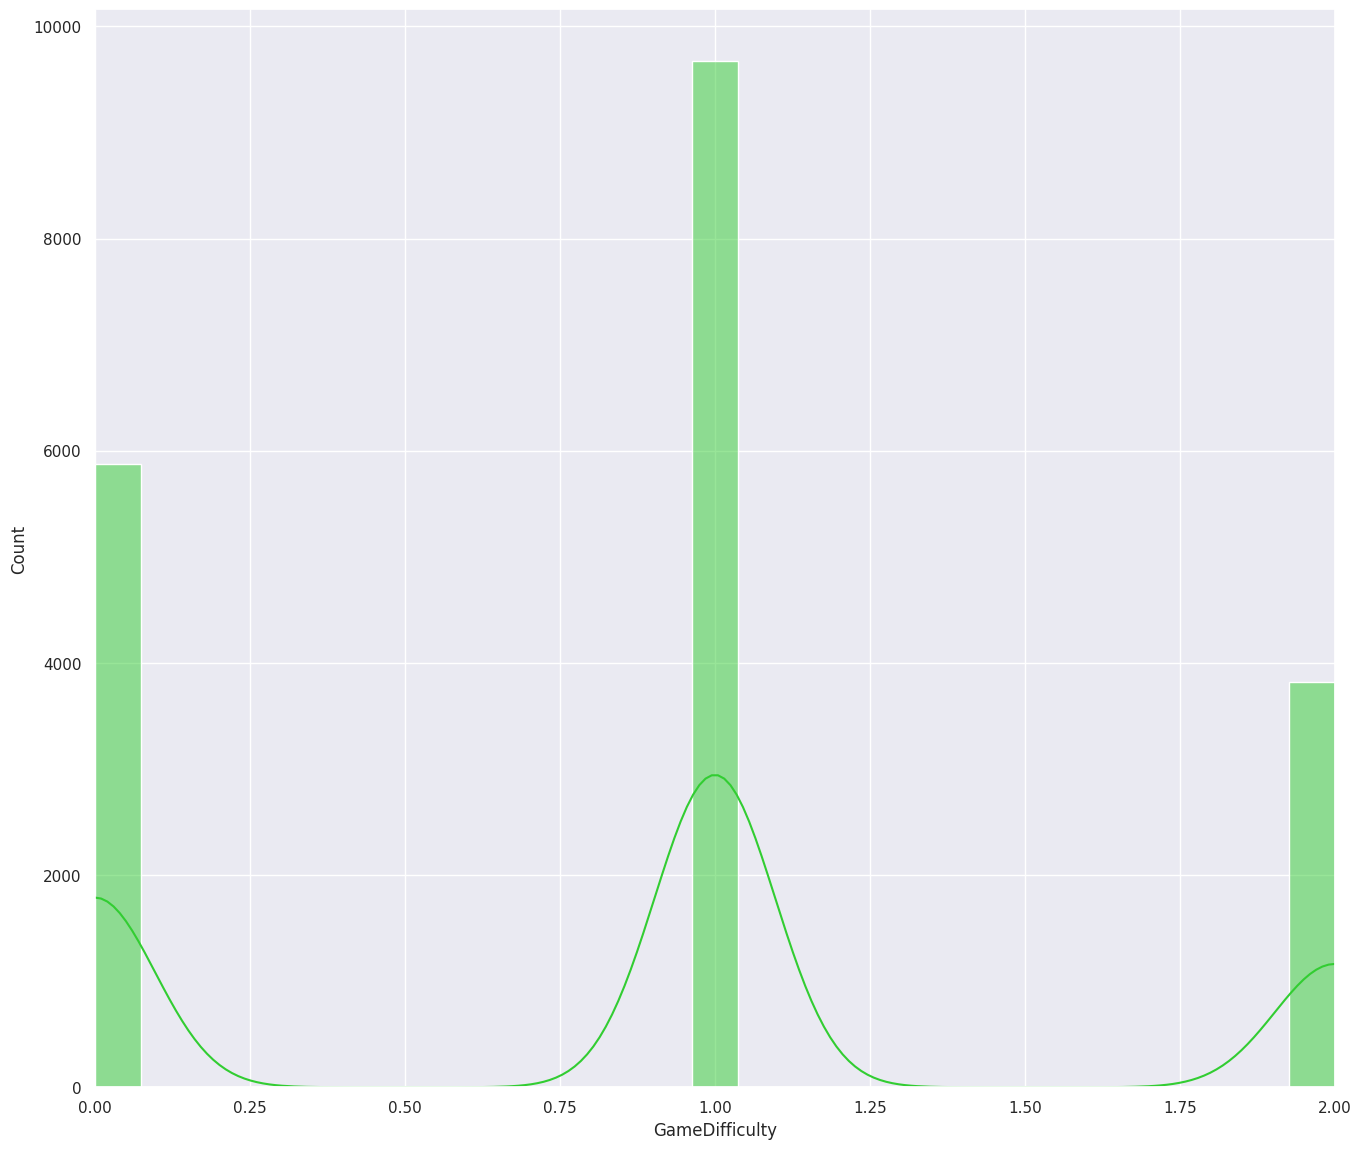

In [ ]:
count_plotted = sns.histplot(x = 'GameDifficulty', data = dataframed.loc[dataframed['EngagementLevel'] == 0], kde = True, color = 'limegreen')
count_plotted.set(xlabel = "GameDifficulty")
count_plotted.set(xlim = (0.0000, 2.0000))

[(0.0, 2.0)]

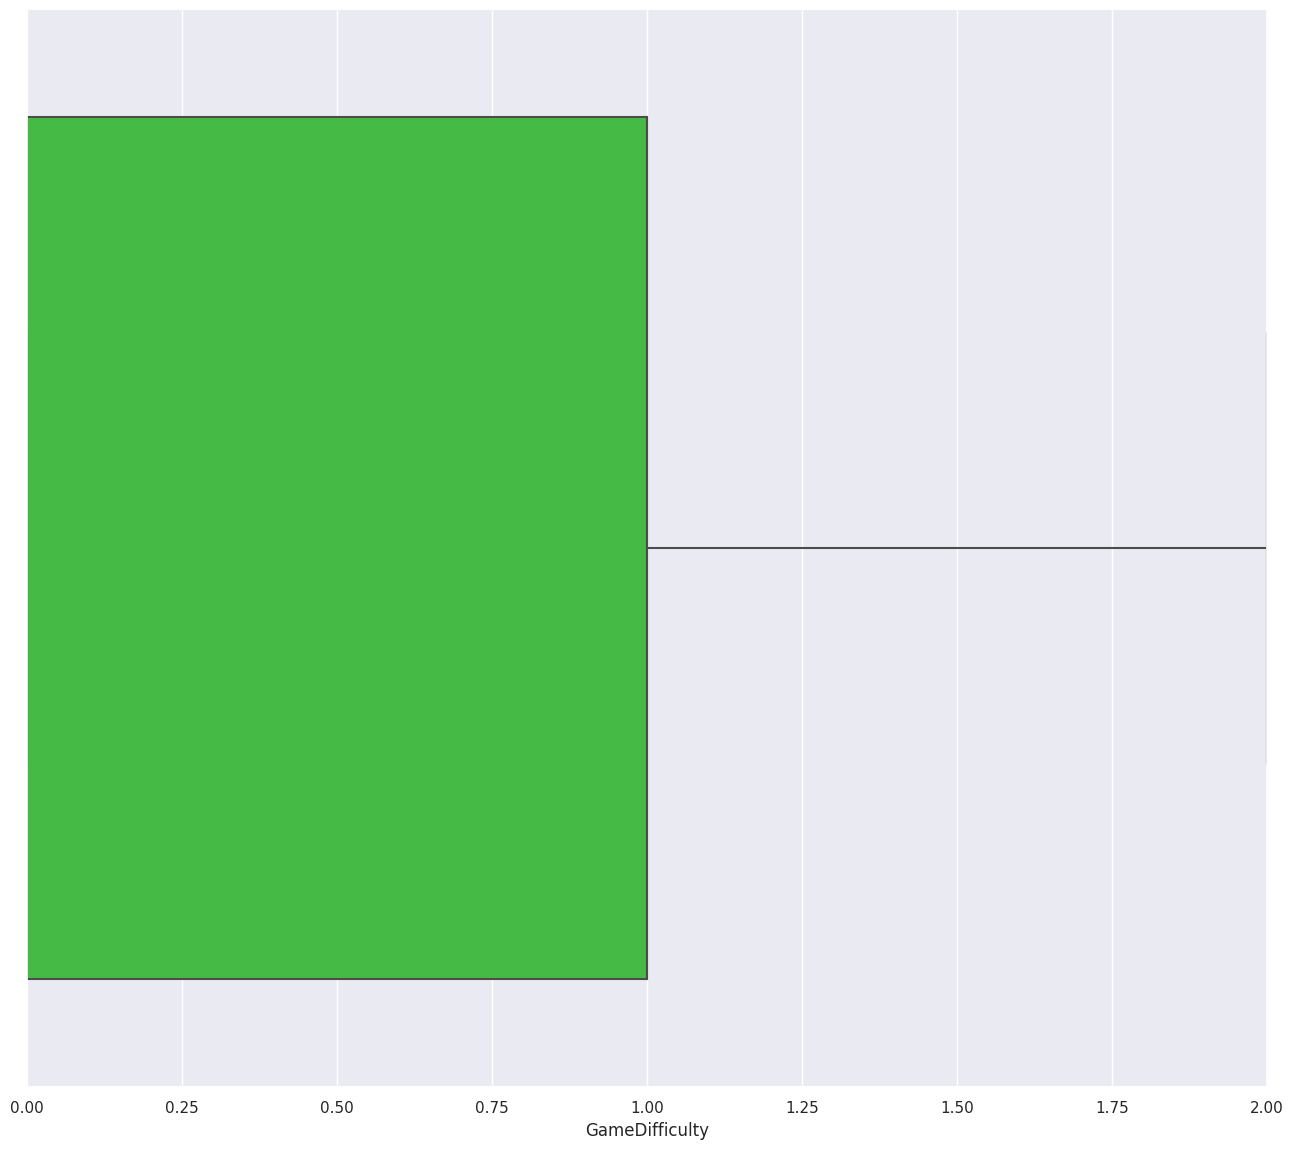

In [ ]:
boxxer_plot = sns.boxplot(x = 'GameDifficulty', data = dataframed.loc[dataframed['EngagementLevel'] == 0], color = 'limegreen')
boxxer_plot.set(xlim = (0.0000, 2.0000))

In [ ]:
numpy_array = np.array(dataframed.loc[dataframed['EngagementLevel'] == 0]['GameDifficulty'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than -1.5000 or greater than 2.5000
There are 0 outliers.


[(0.0, 19.0)]

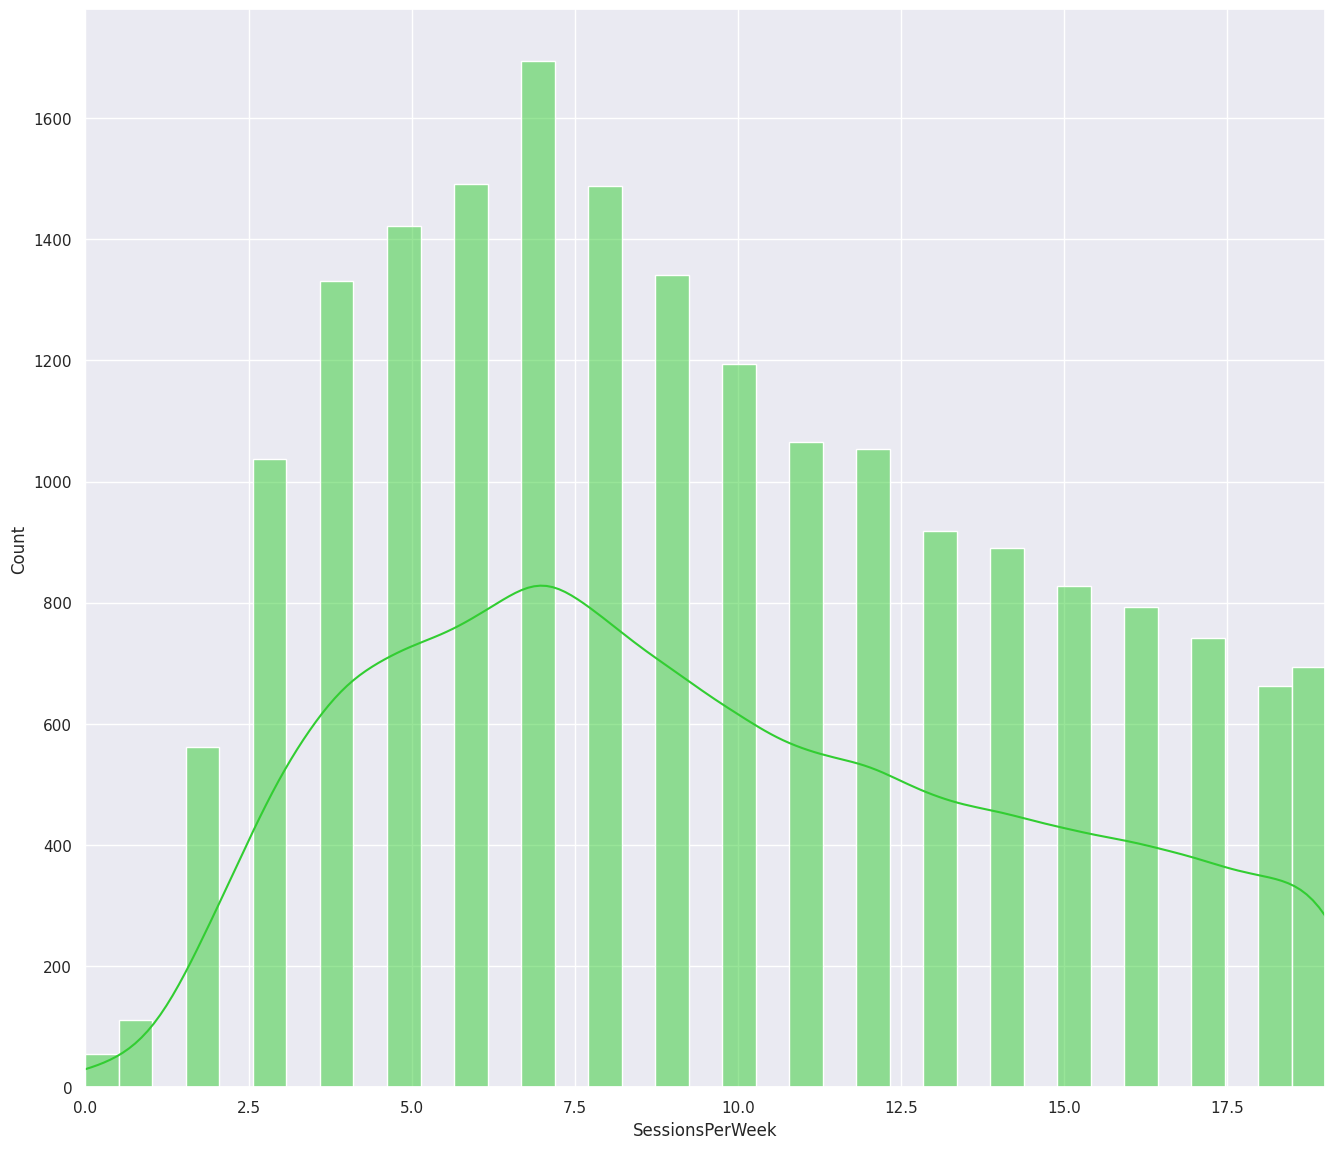

In [ ]:
count_plotted = sns.histplot(x = 'SessionsPerWeek', data = dataframed.loc[dataframed['EngagementLevel'] == 0], kde = True, color = 'limegreen')
count_plotted.set(xlabel = "SessionsPerWeek")
count_plotted.set(xlim = (0.0000, 19.0000))

[(0.0, 19.0)]

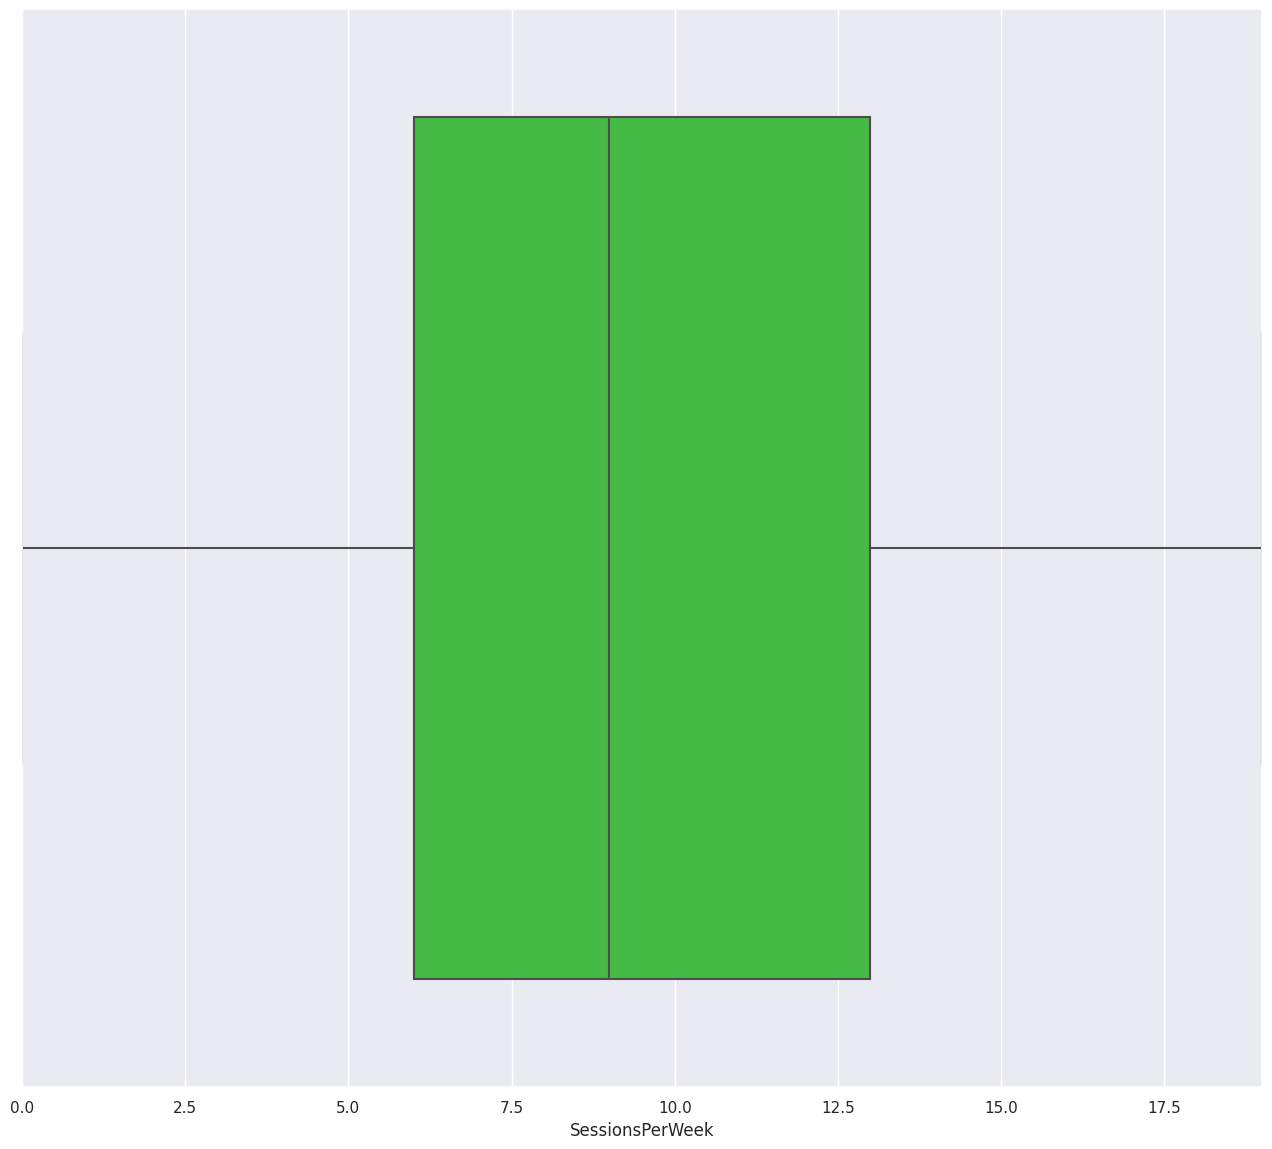

In [ ]:
boxxer_plot = sns.boxplot(x = 'SessionsPerWeek', data = dataframed.loc[dataframed['EngagementLevel'] == 0], color = 'limegreen')
boxxer_plot.set(xlim = (0.0000, 19.0000))

In [ ]:
numpy_array = np.array(dataframed.loc[dataframed['EngagementLevel'] == 0]['SessionsPerWeek'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than -4.5000 or greater than 23.5000
There are 0 outliers.


[(10.0, 179.0)]

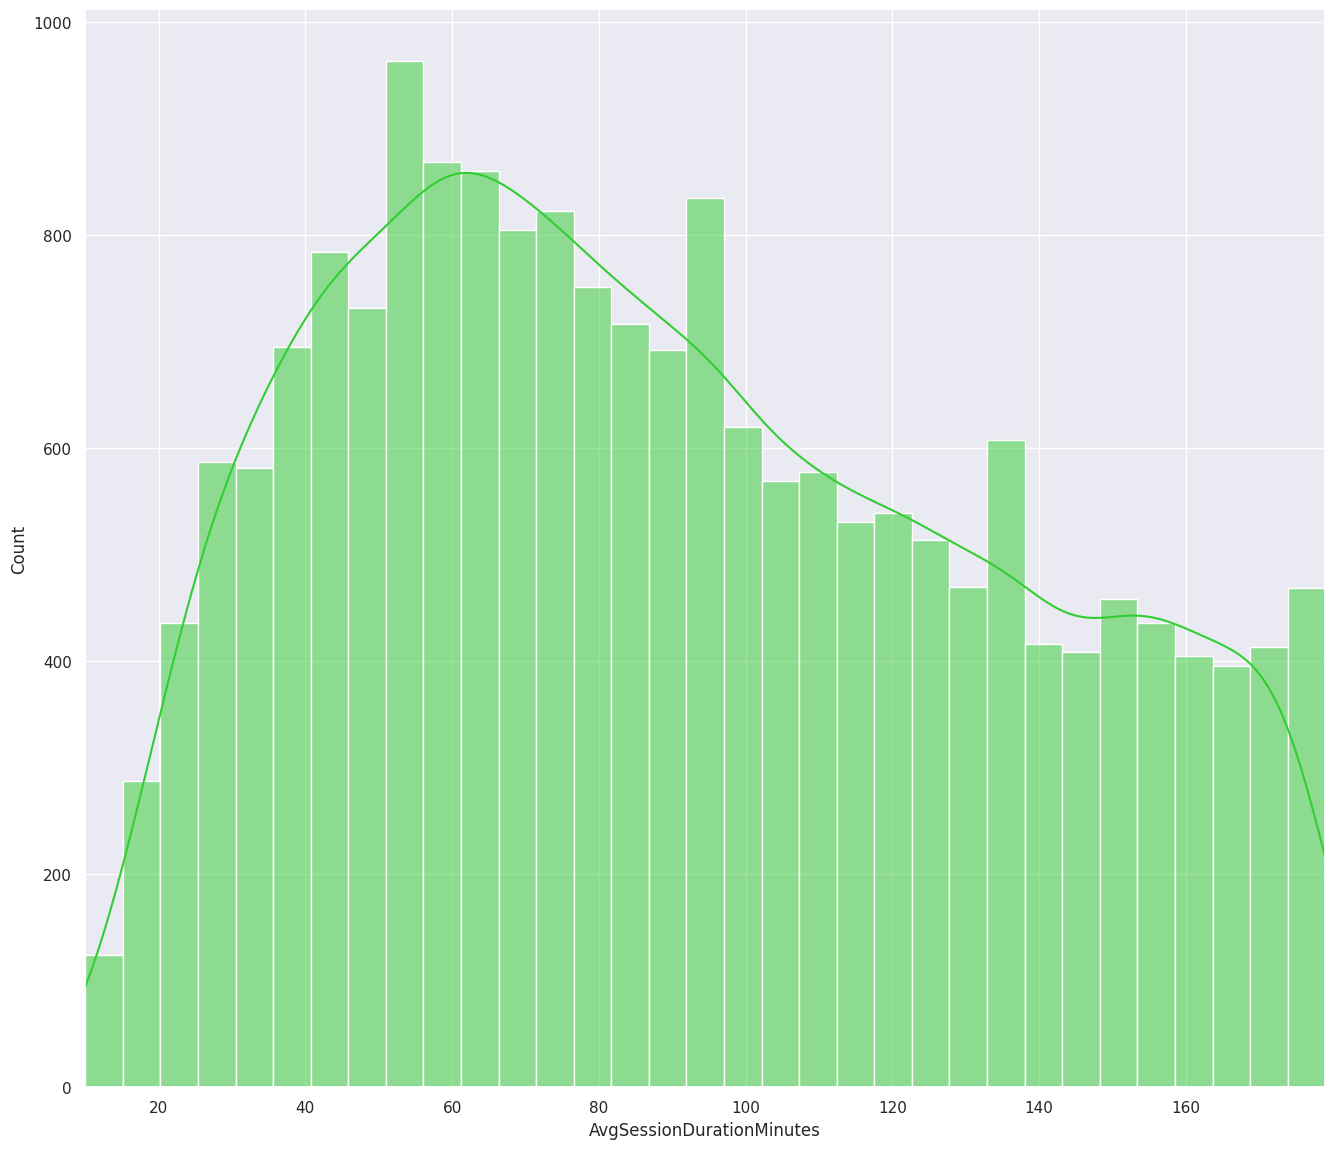

In [ ]:
count_plotted = sns.histplot(x = 'AvgSessionDurationMinutes', data = dataframed.loc[dataframed['EngagementLevel'] == 0], kde = True, color = 'limegreen')
count_plotted.set(xlabel = "AvgSessionDurationMinutes")
count_plotted.set(xlim = (10.0000, 179.0000))

[(10.0, 179.0)]

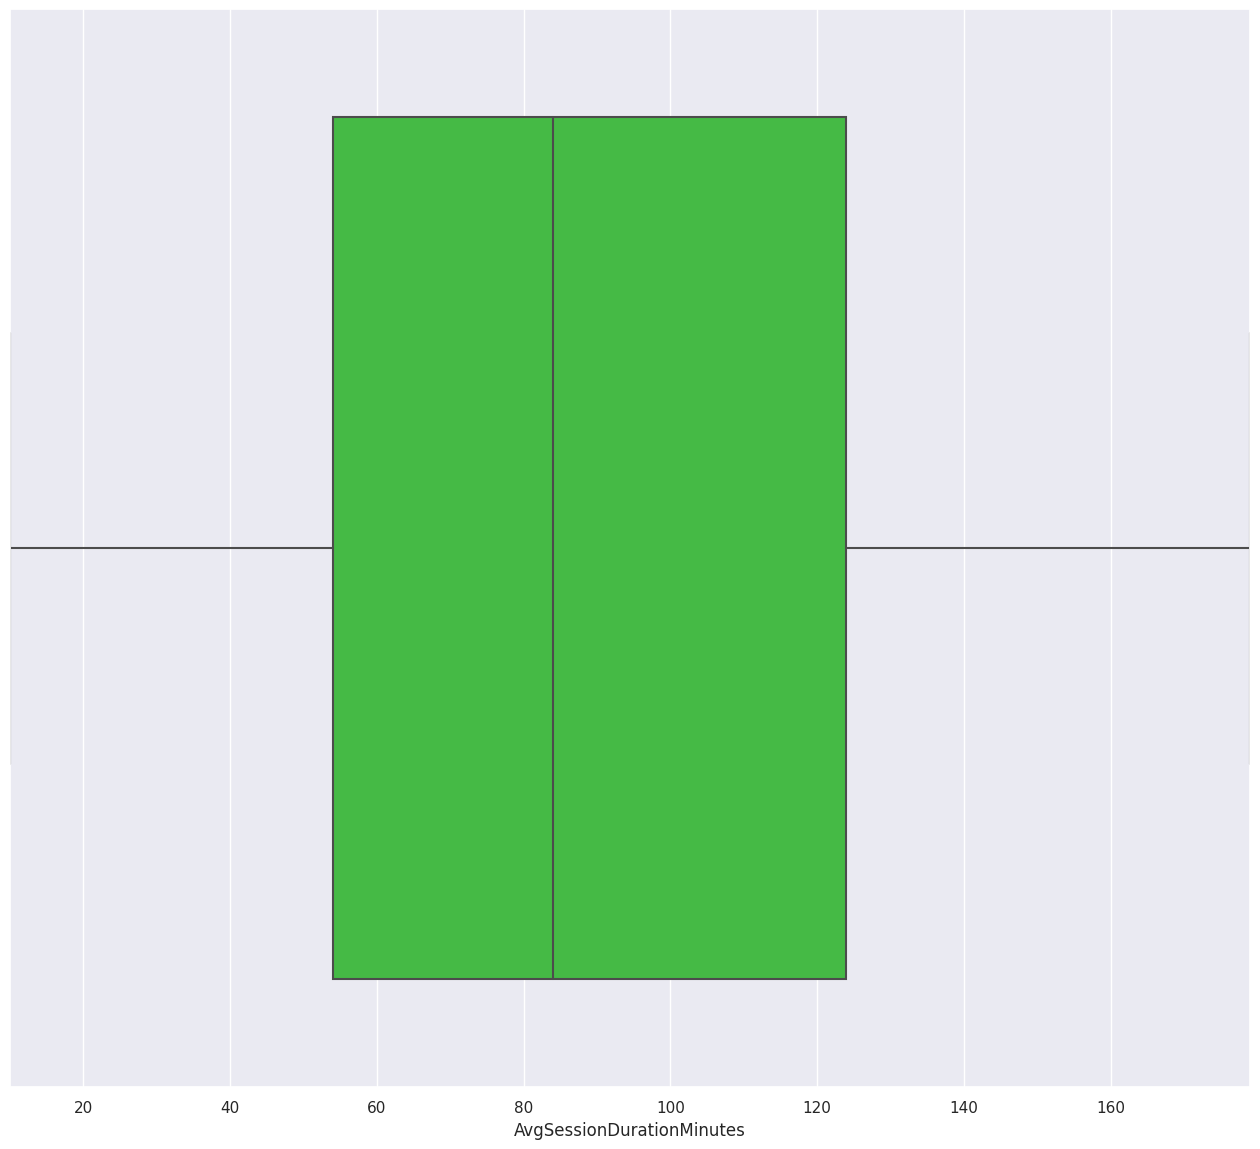

In [ ]:
boxxer_plot = sns.boxplot(x = 'AvgSessionDurationMinutes', data = dataframed.loc[dataframed['EngagementLevel'] == 0], color = 'limegreen')
boxxer_plot.set(xlim = (10.0000, 179.0000))

In [ ]:
numpy_array = np.array(dataframed.loc[dataframed['EngagementLevel'] == 0]['AvgSessionDurationMinutes'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than -51.0000 or greater than 229.0000
There are 0 outliers.


[(1.0, 99.0)]

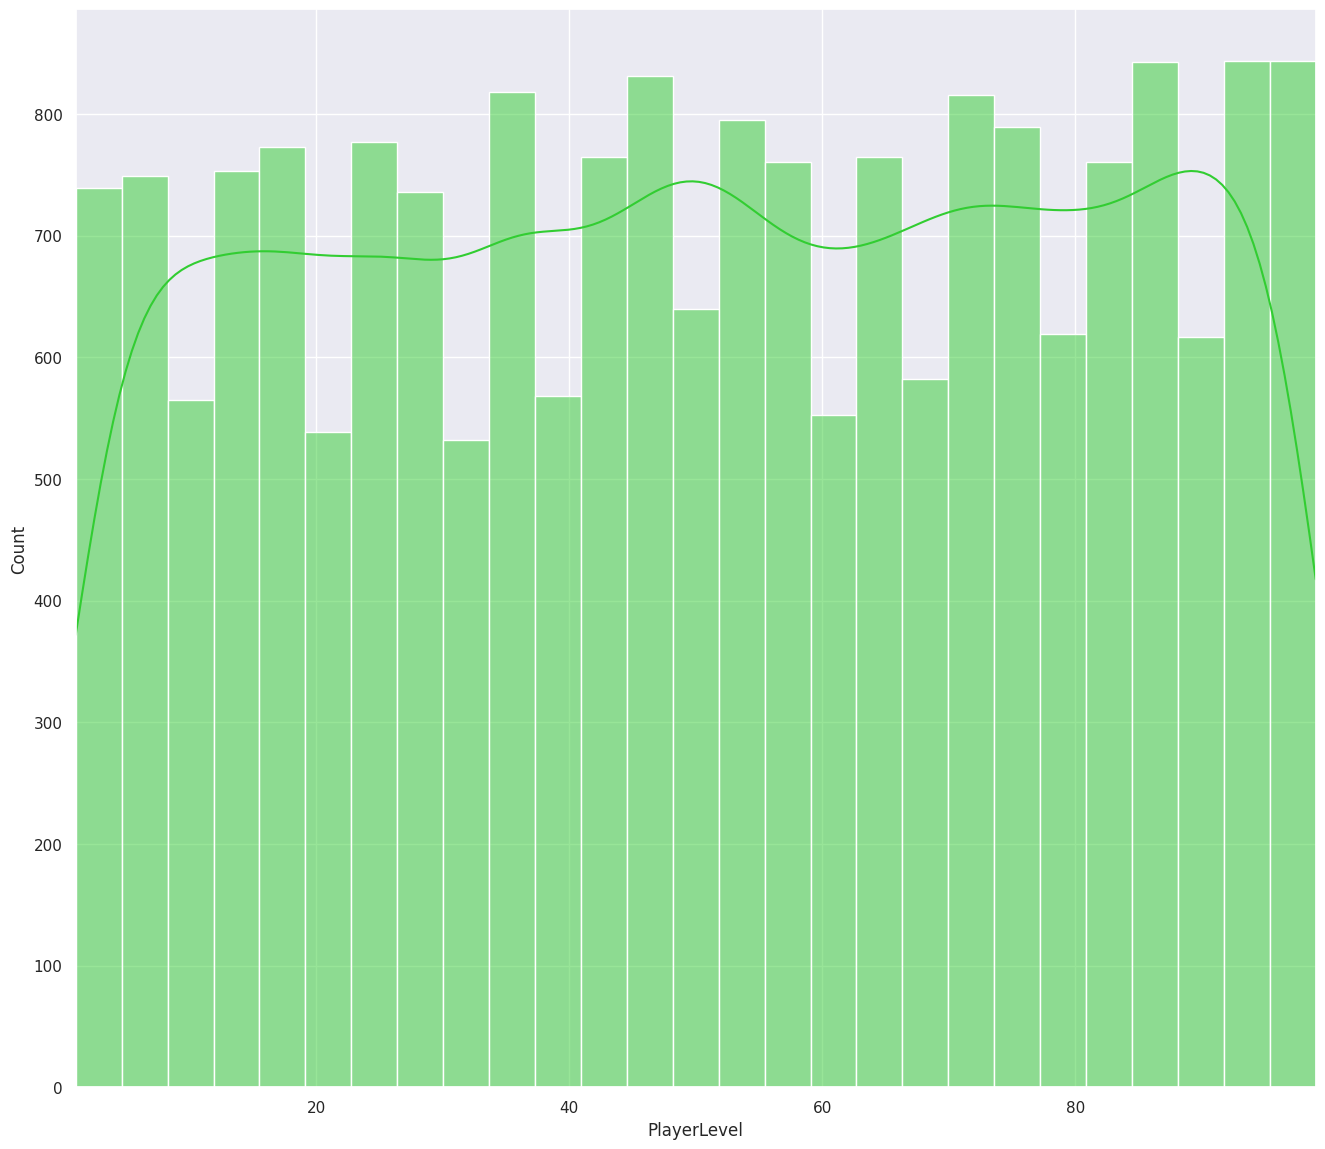

In [ ]:
count_plotted = sns.histplot(x = 'PlayerLevel', data = dataframed.loc[dataframed['EngagementLevel'] == 0], kde = True, color = 'limegreen')
count_plotted.set(xlabel = "PlayerLevel")
count_plotted.set(xlim = (1.0000, 99.0000))

[(1.0, 99.0)]

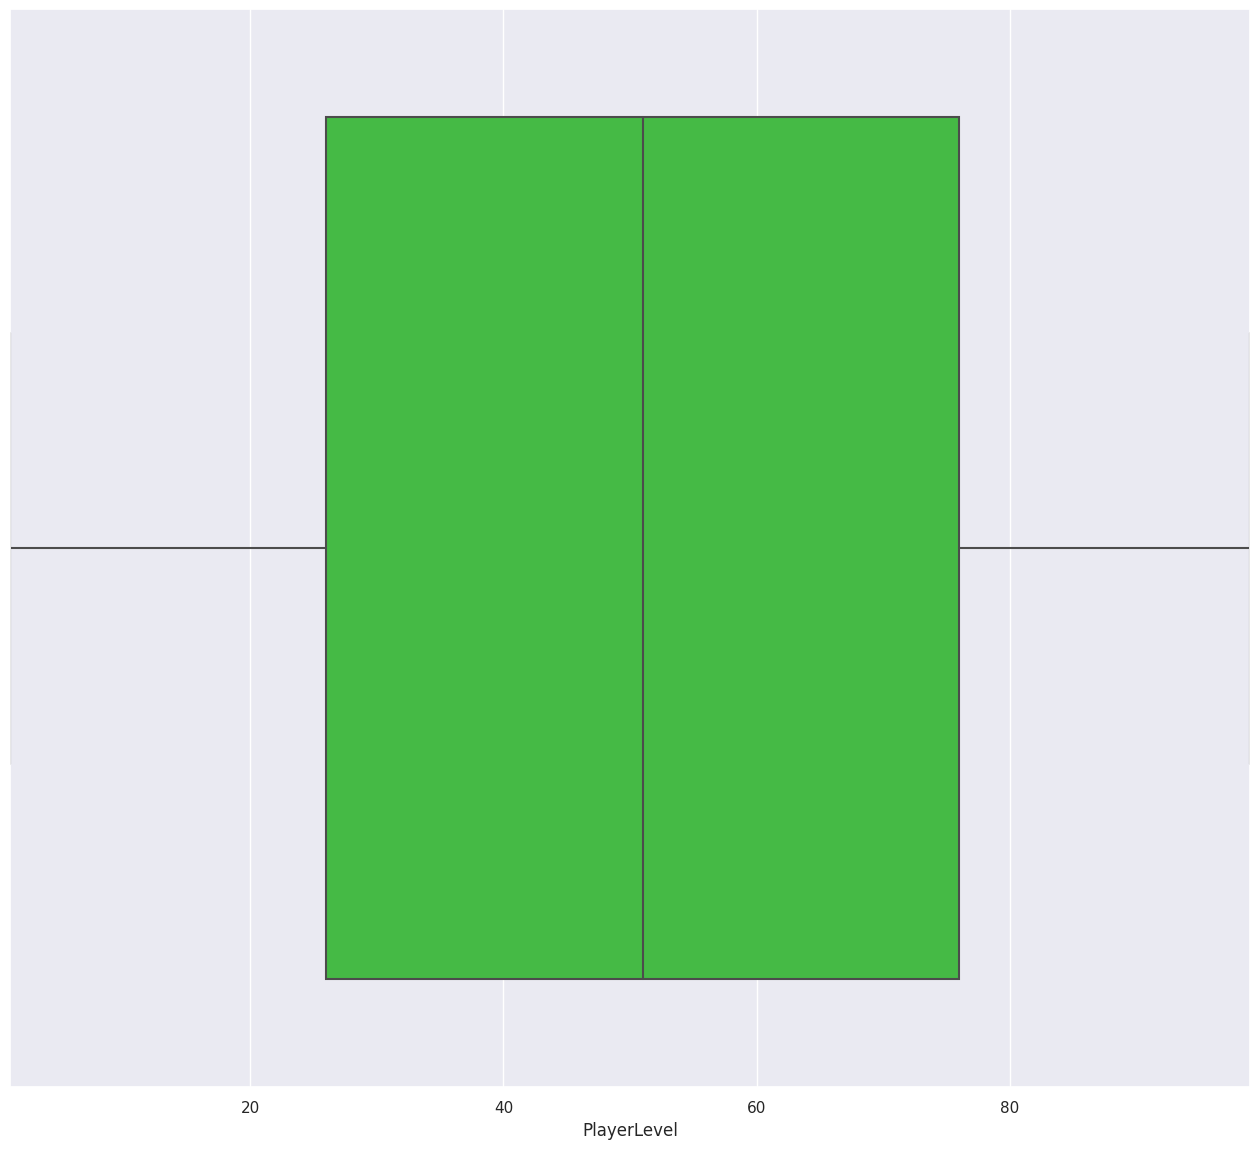

In [ ]:
boxxer_plot = sns.boxplot(x = 'PlayerLevel', data = dataframed.loc[dataframed['EngagementLevel'] == 0], color = 'limegreen')
boxxer_plot.set(xlim = (1.0000, 99.0000))

In [ ]:
numpy_array = np.array(dataframed.loc[dataframed['EngagementLevel'] == 0]['PlayerLevel'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than -49.0000 or greater than 151.0000
There are 0 outliers.


[(0.0, 49.0)]

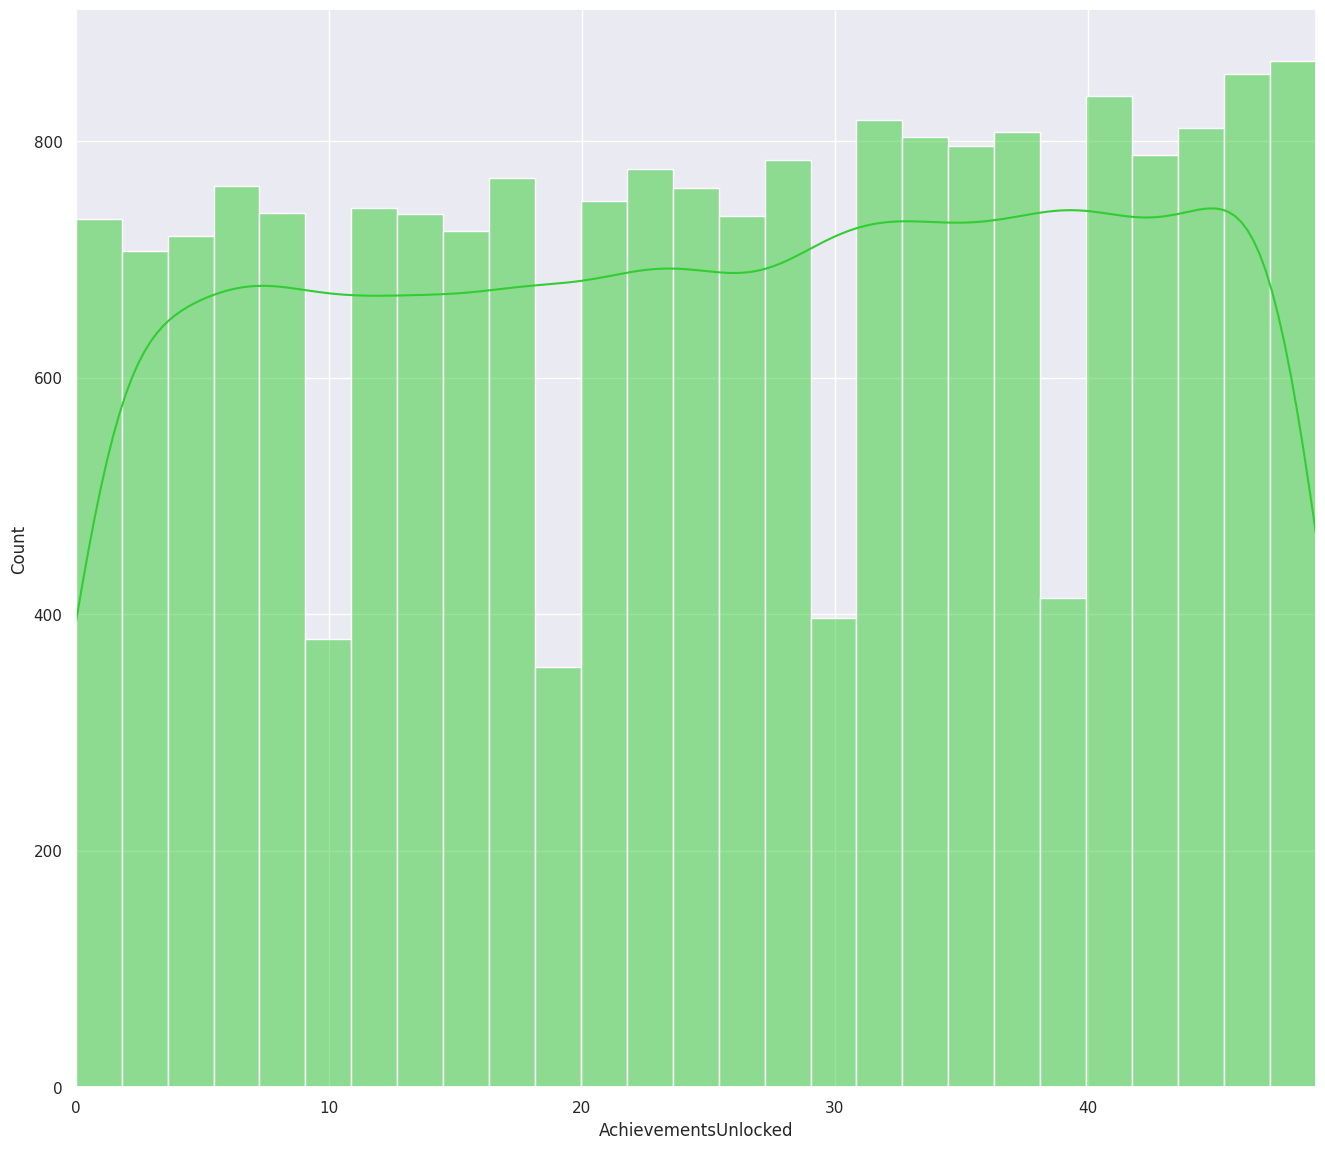

In [ ]:
count_plotted = sns.histplot(x = 'AchievementsUnlocked', data = dataframed.loc[dataframed['EngagementLevel'] == 0], kde = True, color = 'limegreen')
count_plotted.set(xlabel = "AchievementsUnlocked")
count_plotted.set(xlim = (0.0000, 49.0000))

[(0.0, 49.0)]

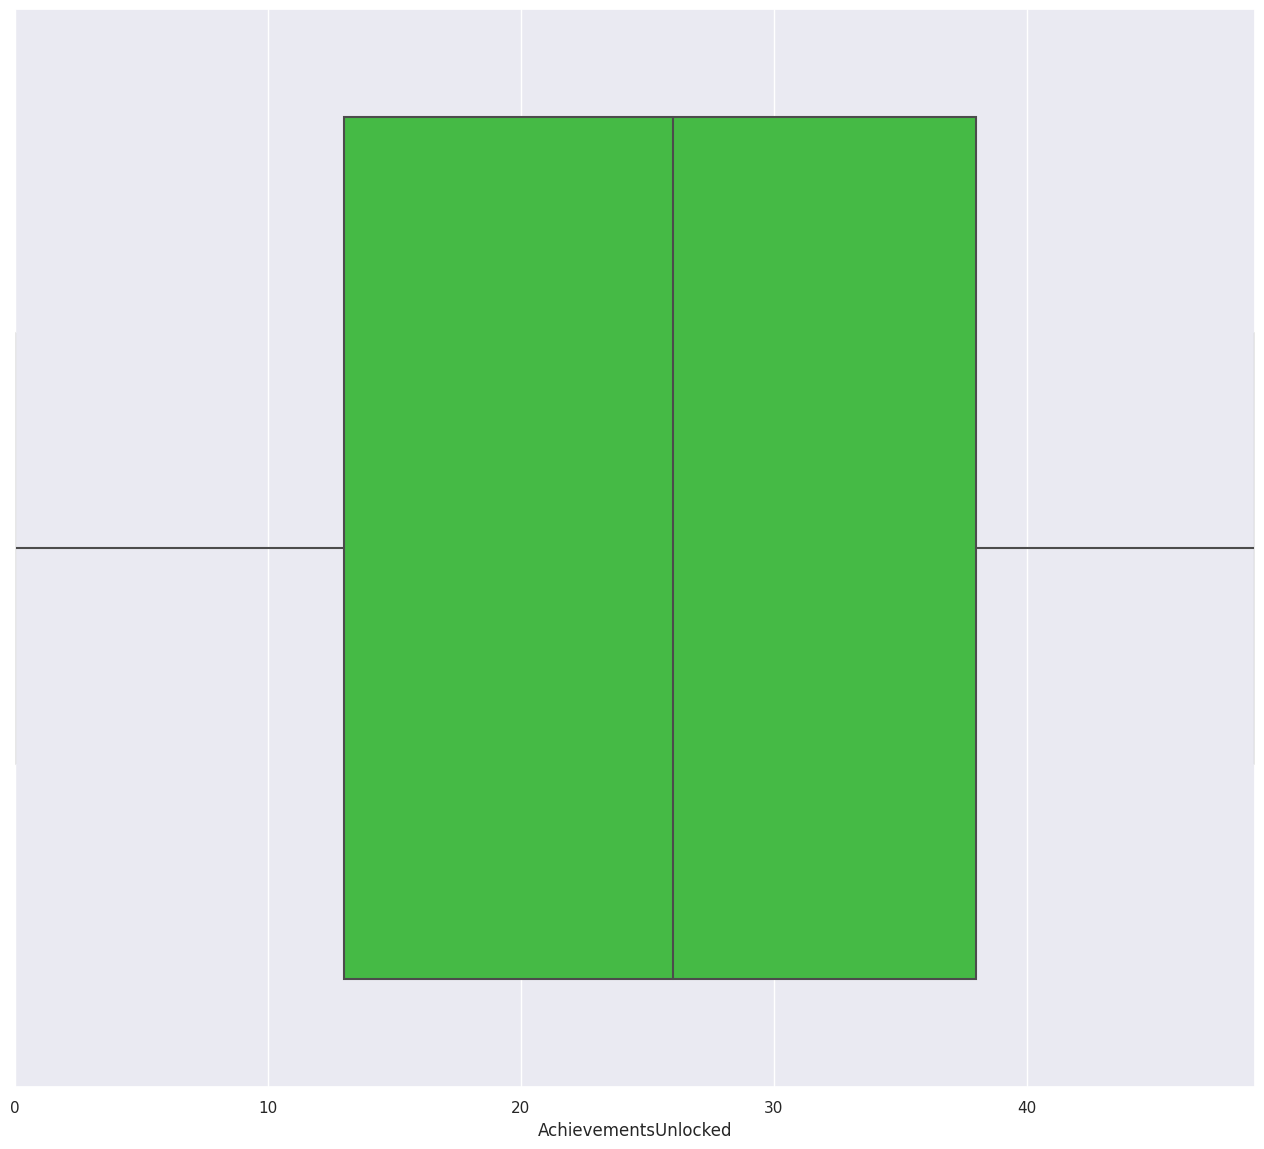

In [ ]:
boxxer_plot = sns.boxplot(x = 'AchievementsUnlocked', data = dataframed.loc[dataframed['EngagementLevel'] == 0], color = 'limegreen')
boxxer_plot.set(xlim = (0.0000, 49.0000))

In [ ]:
numpy_array = np.array(dataframed.loc[dataframed['EngagementLevel'] == 0]['AchievementsUnlocked'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than -24.5000 or greater than 75.5000
There are 0 outliers.


[(15.0, 49.0)]

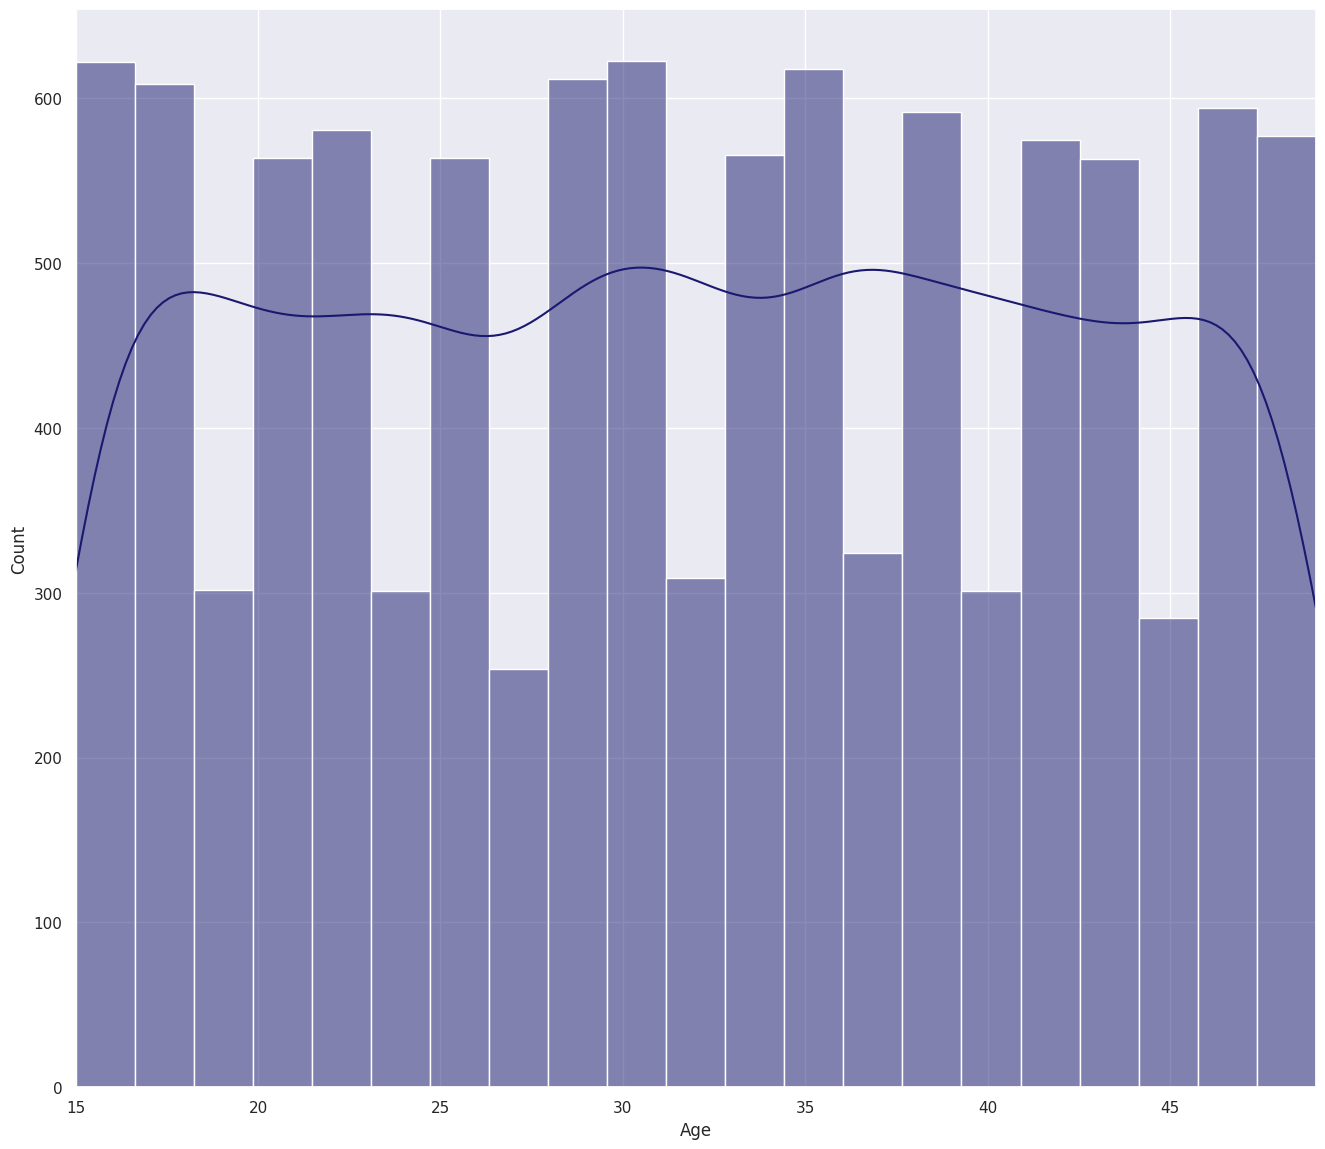

In [ ]:
count_plotted = sns.histplot(x = 'Age', data = dataframed.loc[dataframed['EngagementLevel'] == 1], kde = True, color = 'midnightblue')
count_plotted.set(xlabel = "Age")
count_plotted.set(xlim = (15.0000, 49.0000))

[(15.0, 49.0)]

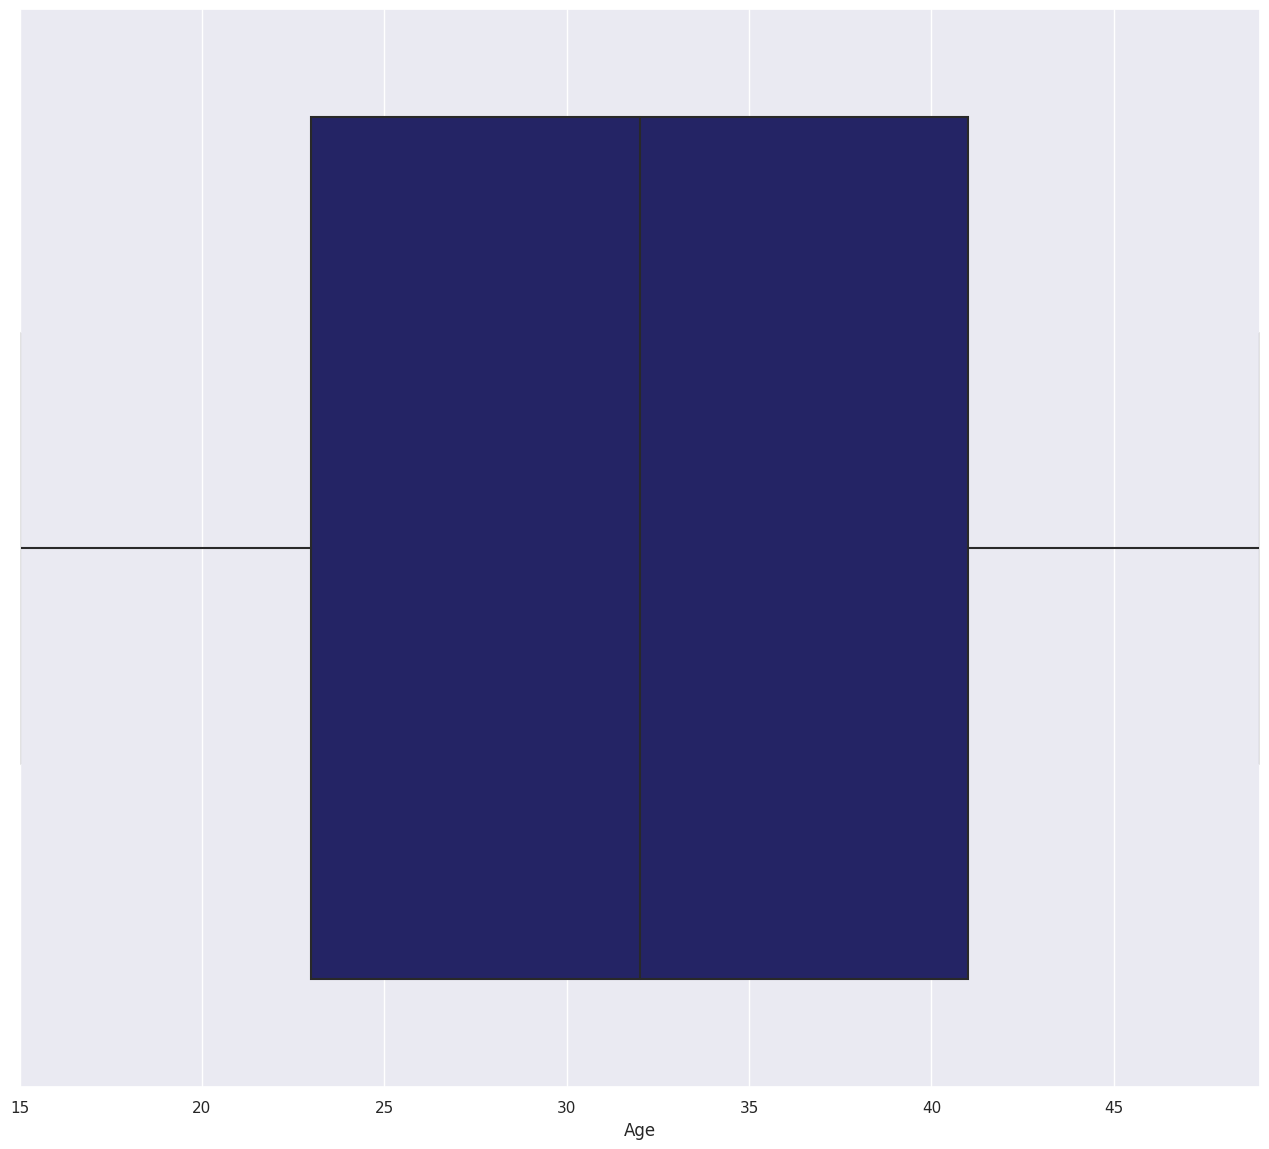

In [ ]:
boxxer_plot = sns.boxplot(x = 'Age', data = dataframed.loc[dataframed['EngagementLevel'] == 1], color = 'midnightblue')
boxxer_plot.set(xlim = (15.0000, 49.0000))

In [ ]:
numpy_array = np.array(dataframed.loc[dataframed['EngagementLevel'] == 1]['Age'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than -4.0000 or greater than 68.0000
There are 0 outliers.


[(0.0, 1.0)]

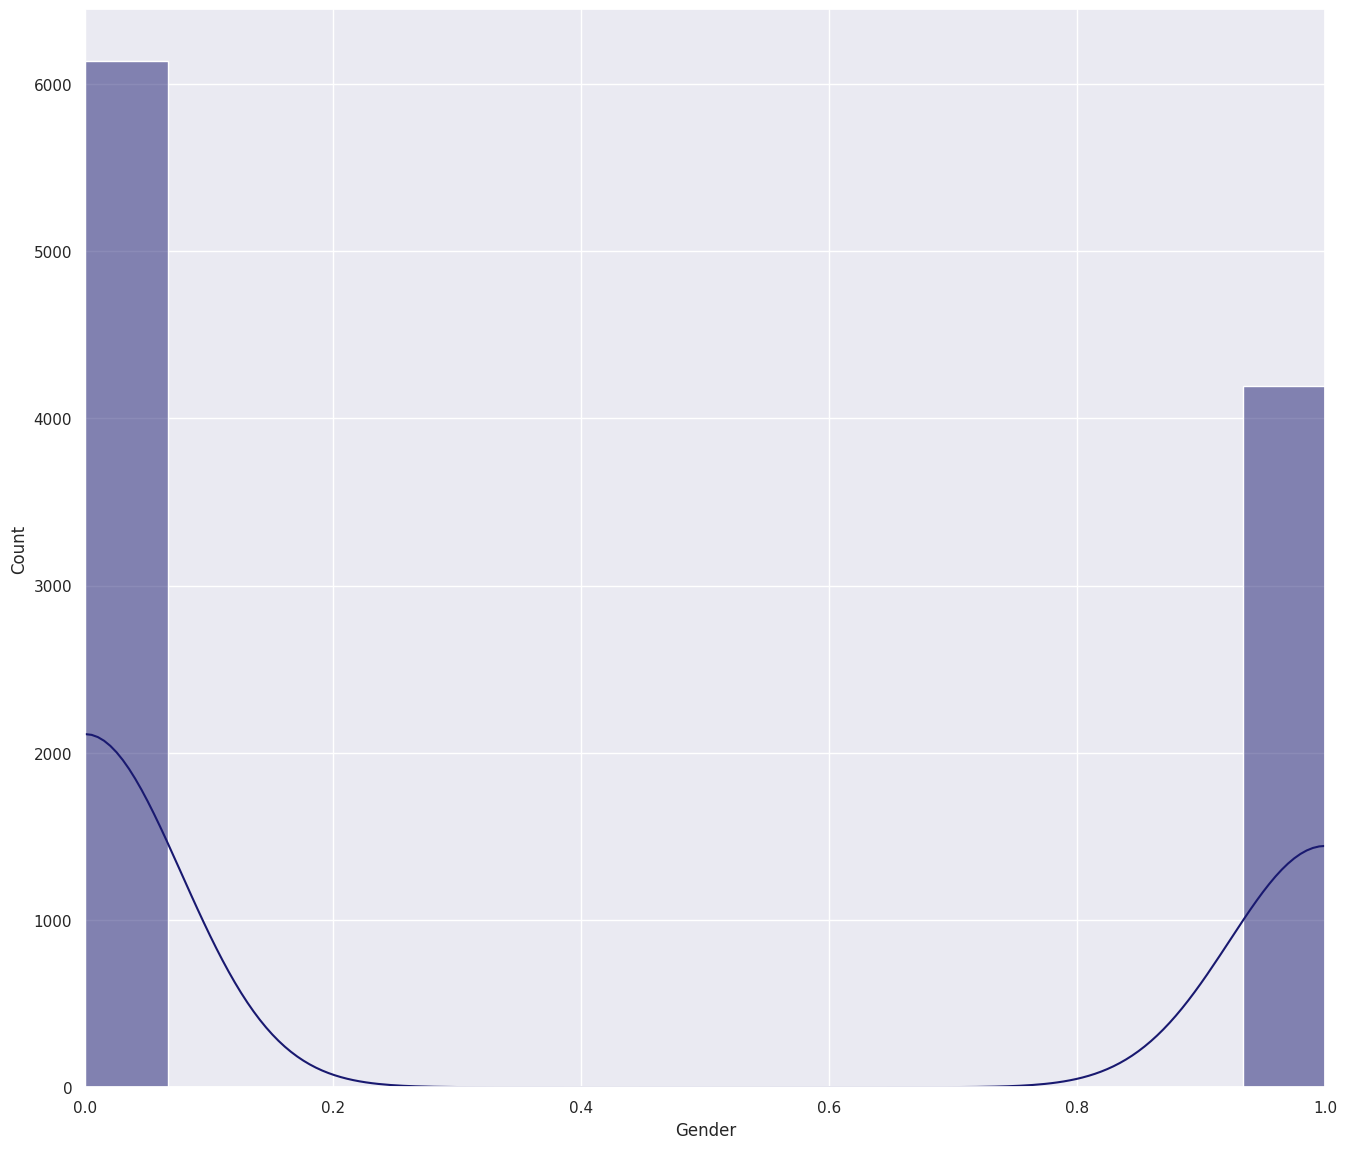

In [ ]:
count_plotted = sns.histplot(x = 'Gender', data = dataframed.loc[dataframed['EngagementLevel'] == 1], kde = True, color = 'midnightblue')
count_plotted.set(xlabel = "Gender")
count_plotted.set(xlim = (0.0000, 1.0000))

[(0.0, 1.0)]

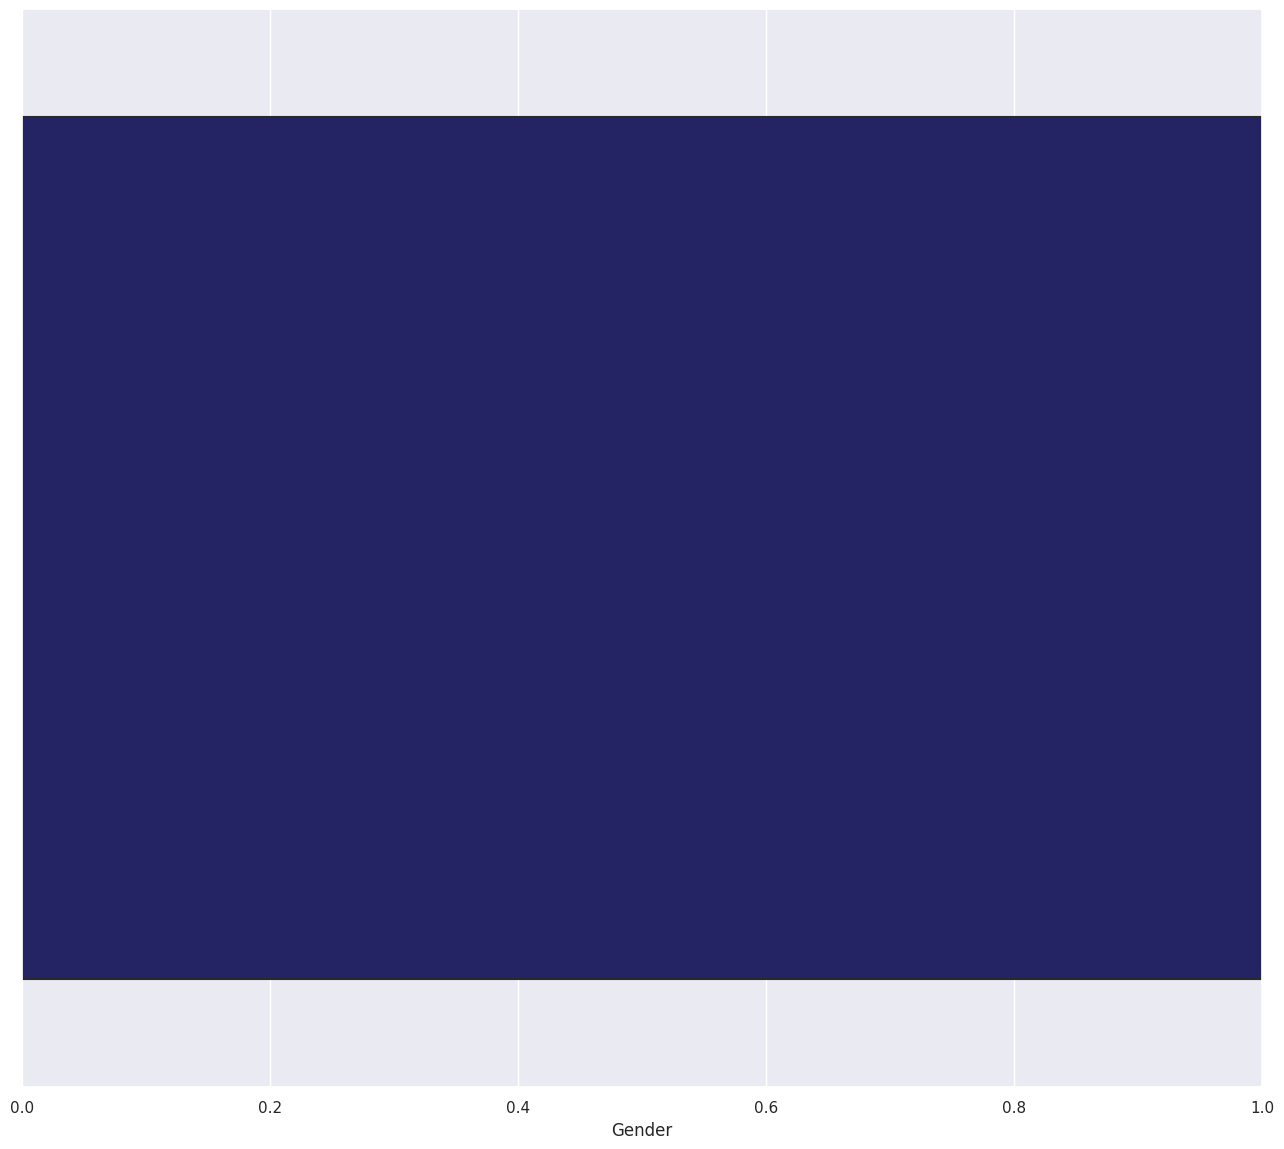

In [ ]:
boxxer_plot = sns.boxplot(x = 'Gender', data = dataframed.loc[dataframed['EngagementLevel'] == 1], color = 'midnightblue')
boxxer_plot.set(xlim = (0.0000, 1.0000))

In [ ]:
numpy_array = np.array(dataframed.loc[dataframed['EngagementLevel'] == 1]['Gender'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than -1.5000 or greater than 2.5000
There are 0 outliers.


[(0.0, 3.0)]

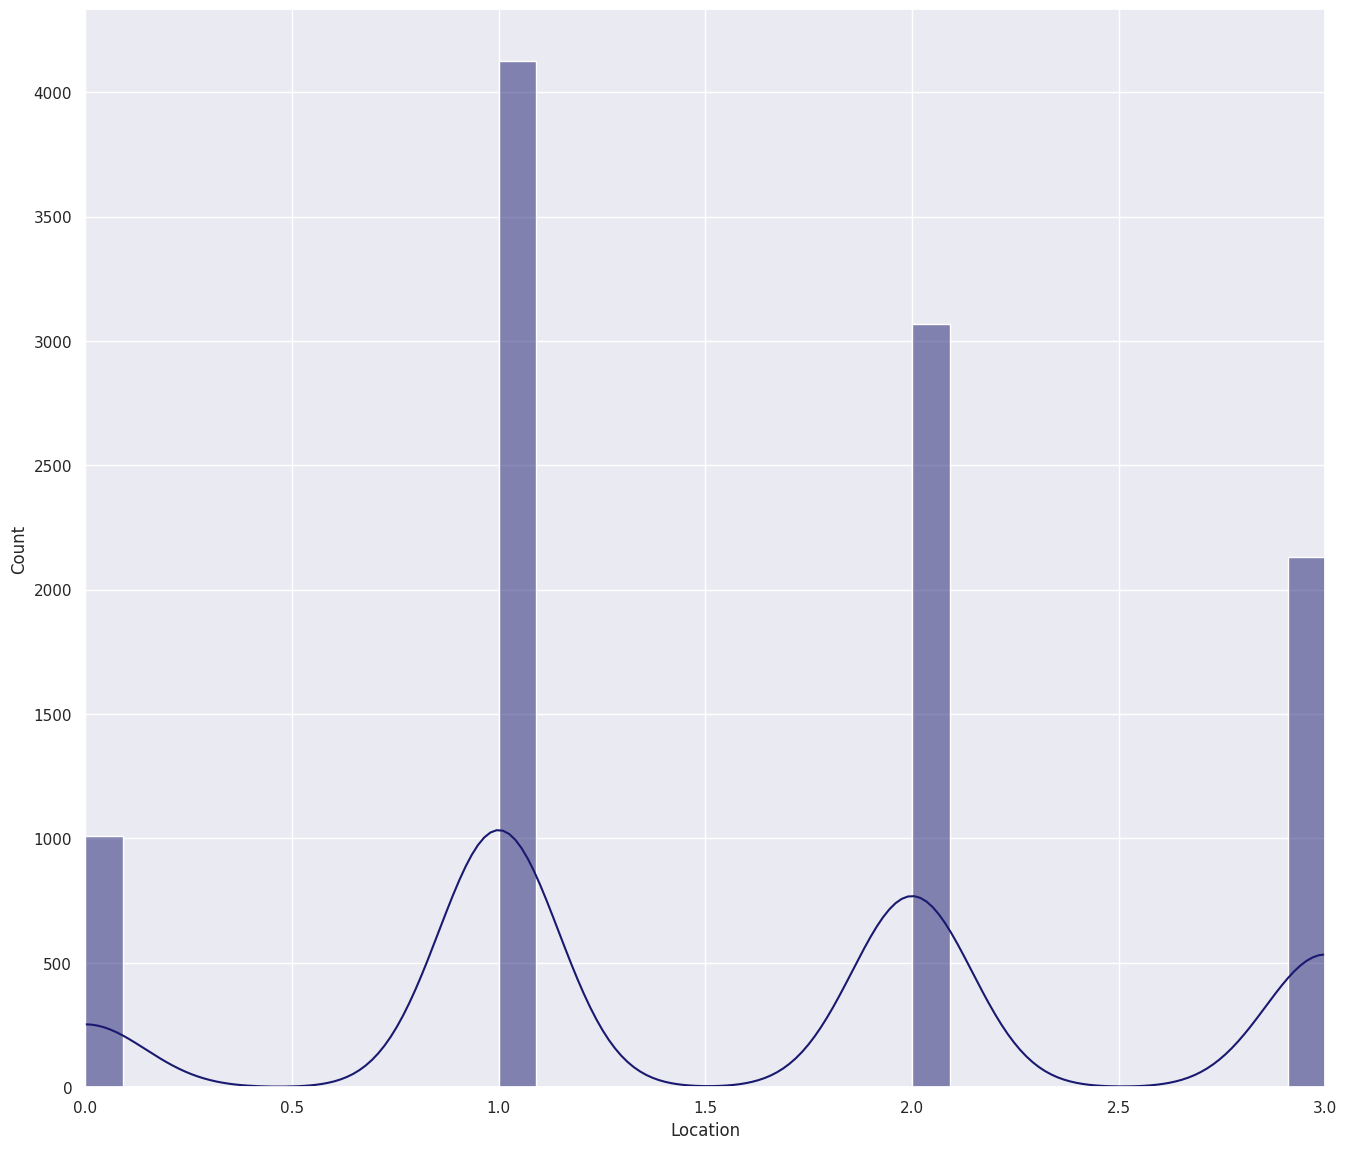

In [ ]:
count_plotted = sns.histplot(x = 'Location', data = dataframed.loc[dataframed['EngagementLevel'] == 1], kde = True, color = 'midnightblue')
count_plotted.set(xlabel = "Location")
count_plotted.set(xlim = (0.0000, 3.0000))

[(0.0, 3.0)]

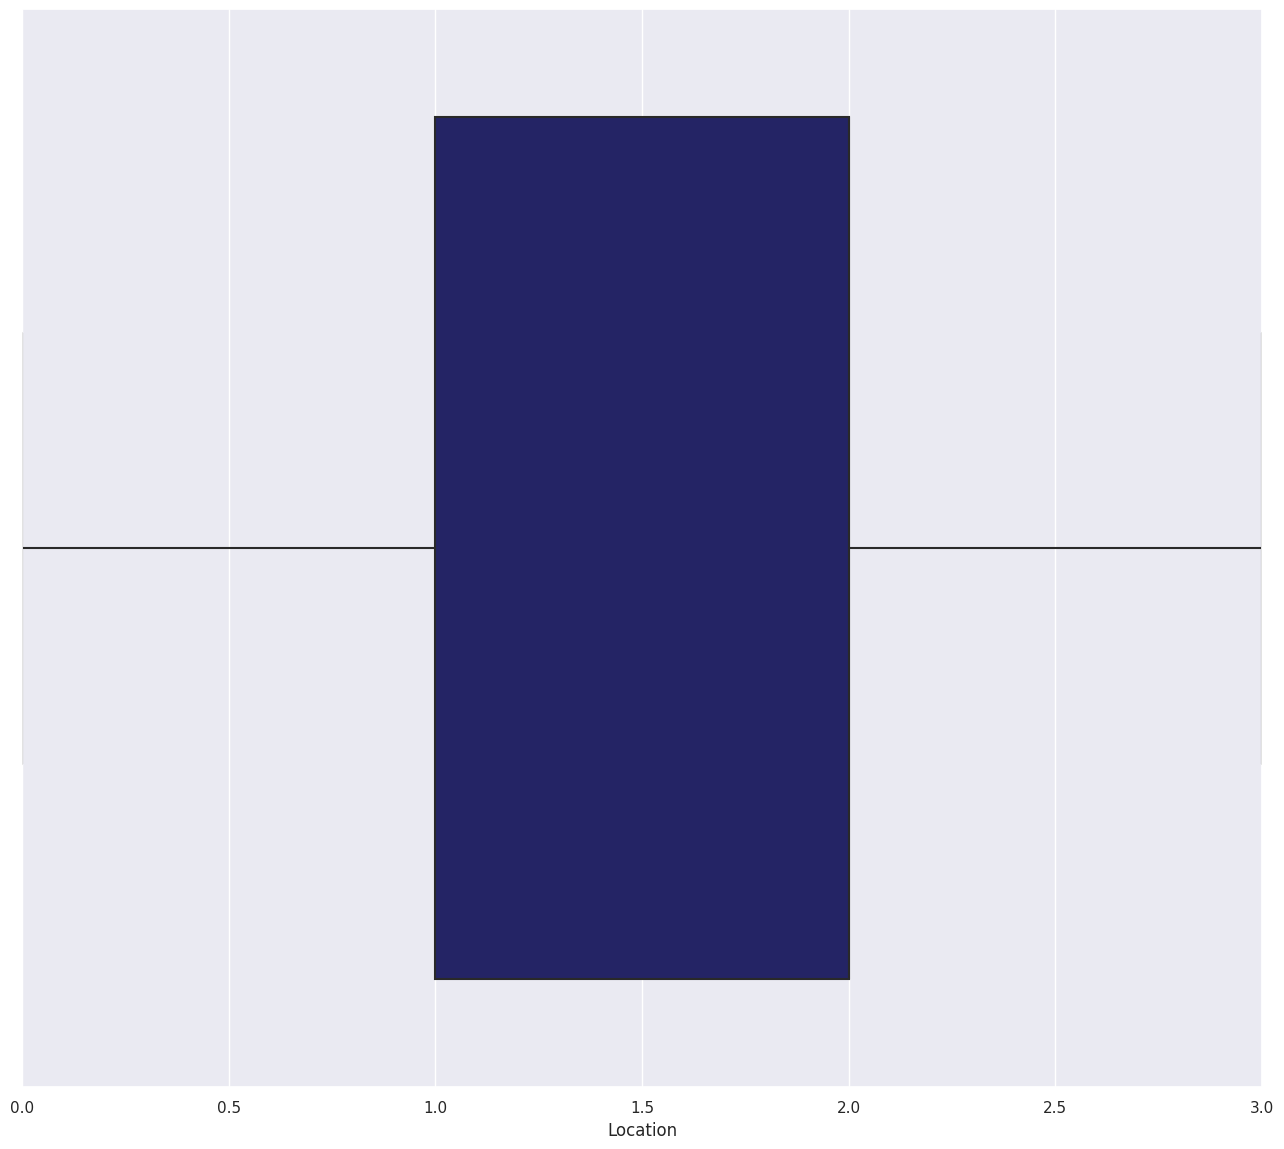

In [ ]:
boxxer_plot = sns.boxplot(x = 'Location', data = dataframed.loc[dataframed['EngagementLevel'] == 1], color = 'midnightblue')
boxxer_plot.set(xlim = (0.0000, 3.0000))

In [ ]:
numpy_array = np.array(dataframed.loc[dataframed['EngagementLevel'] == 1]['Location'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than -0.5000 or greater than 3.5000
There are 0 outliers.


[(0.0, 4.0)]

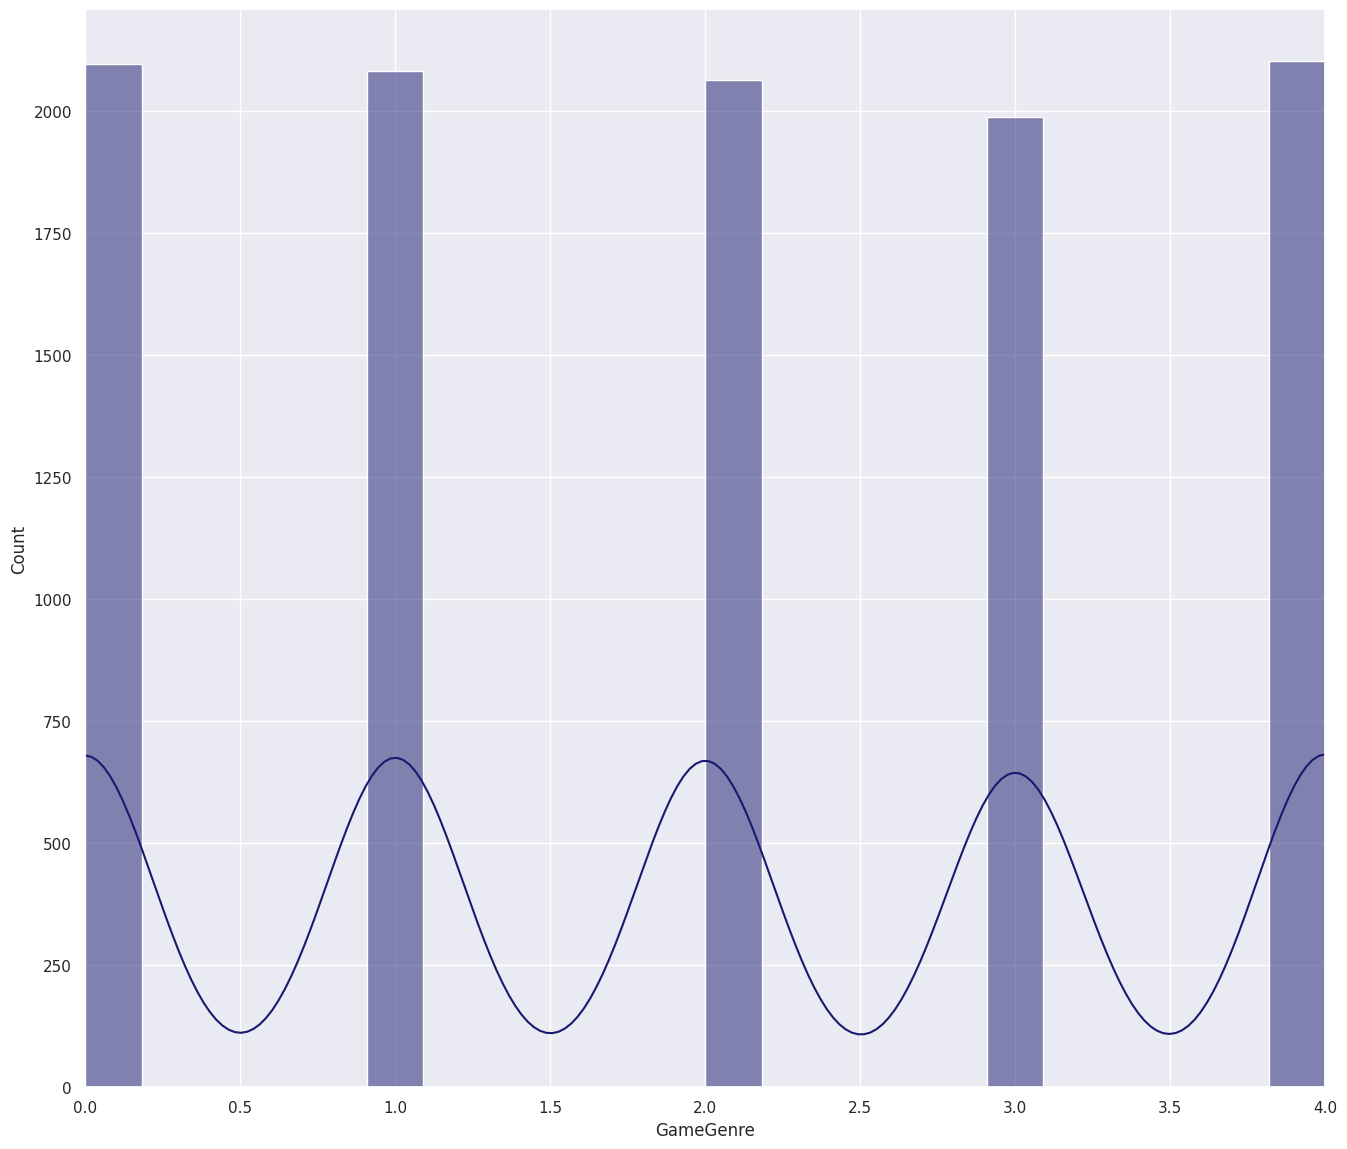

In [ ]:
count_plotted = sns.histplot(x = 'GameGenre', data = dataframed.loc[dataframed['EngagementLevel'] == 1], kde = True, color = 'midnightblue')
count_plotted.set(xlabel = "GameGenre")
count_plotted.set(xlim = (0.0000, 4.0000))

[(0.0, 4.0)]

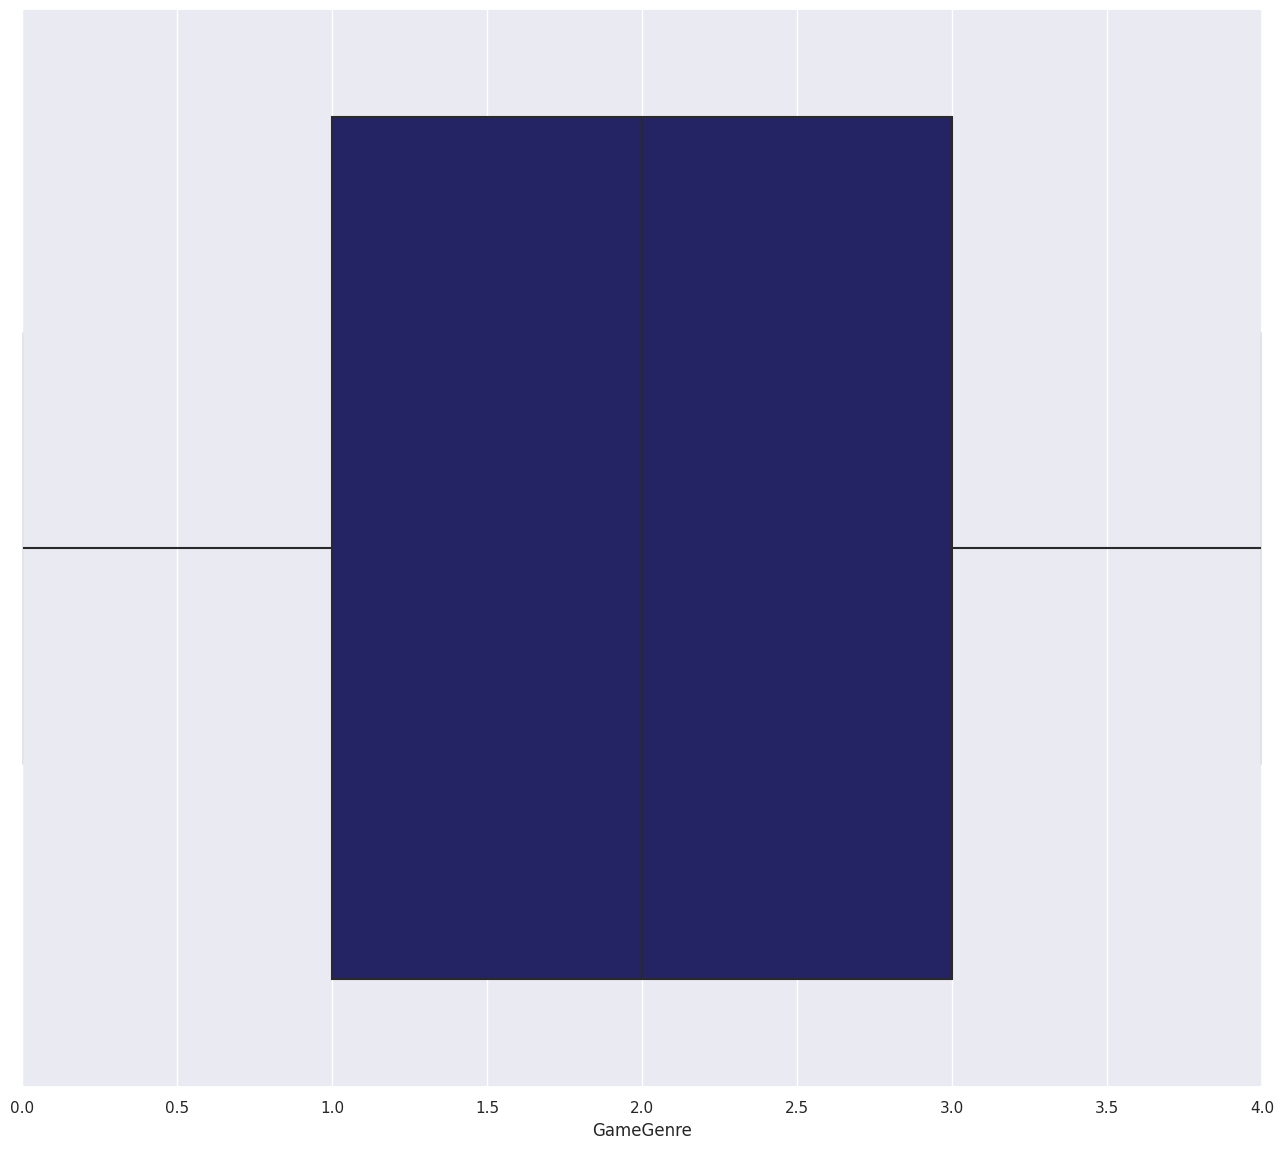

In [ ]:
boxxer_plot = sns.boxplot(x = 'GameGenre', data = dataframed.loc[dataframed['EngagementLevel'] == 1], color = 'midnightblue')
boxxer_plot.set(xlim = (0.0000, 4.0000))

In [ ]:
numpy_array = np.array(dataframed.loc[dataframed['EngagementLevel'] == 1]['GameGenre'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than -2.0000 or greater than 6.0000
There are 0 outliers.


[(0.0001, 23.9996)]

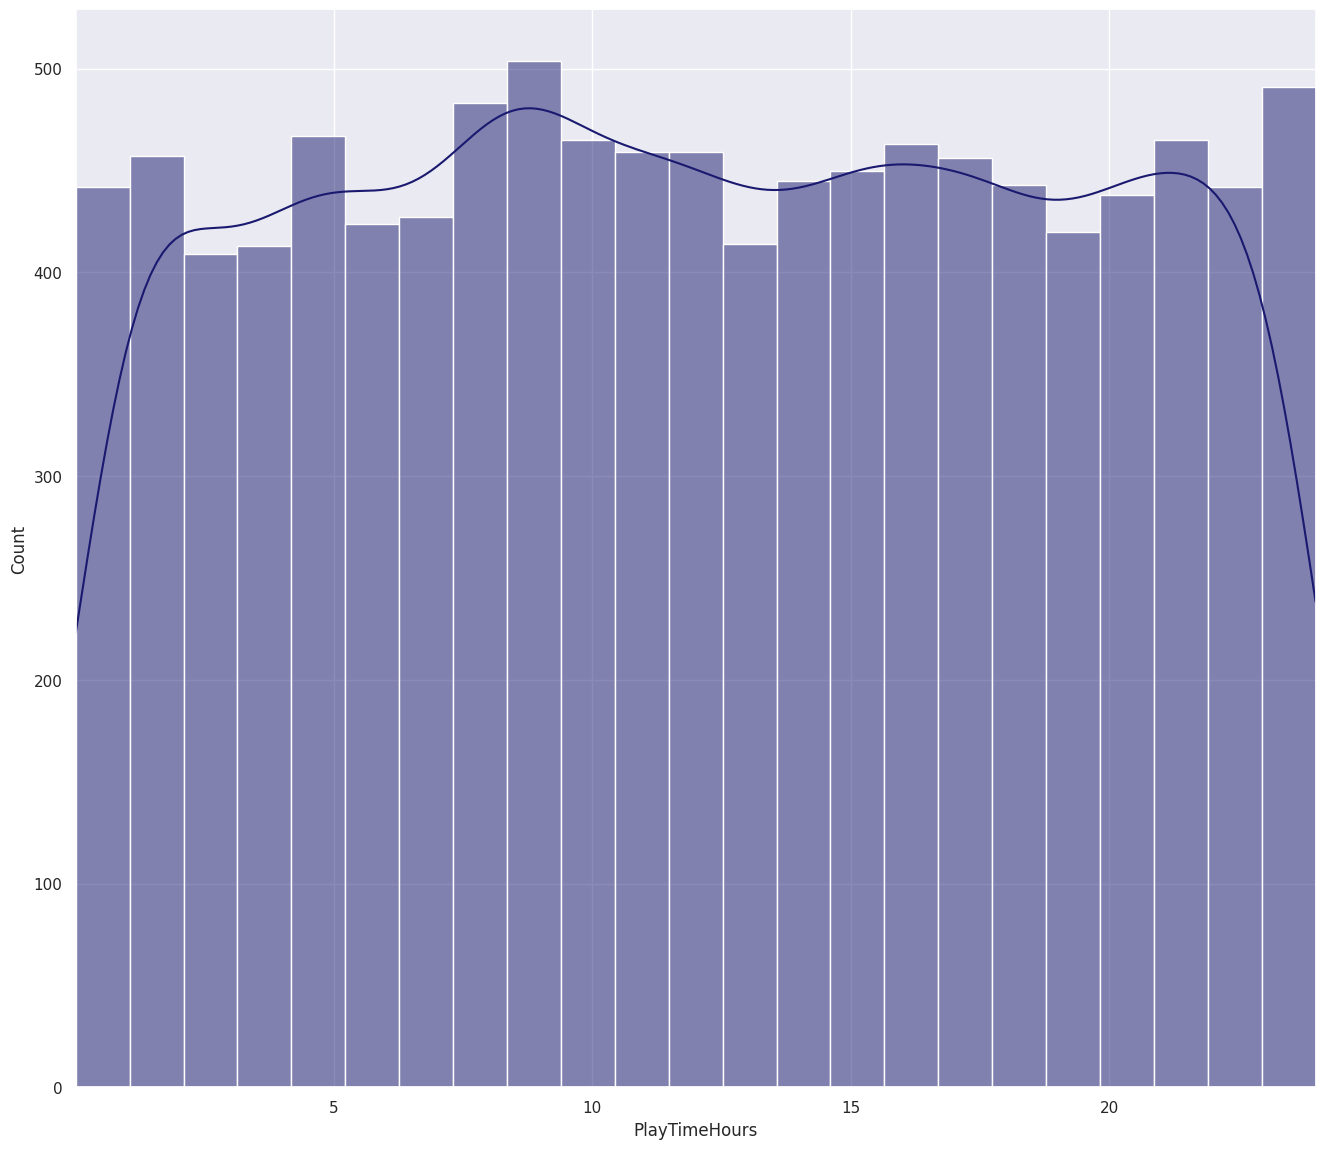

In [ ]:
count_plotted = sns.histplot(x = 'PlayTimeHours', data = dataframed.loc[dataframed['EngagementLevel'] == 1], kde = True, color = 'midnightblue')
count_plotted.set(xlabel = "PlayTimeHours")
count_plotted.set(xlim = (0.0001, 23.9996))

[(0.0001, 23.9996)]

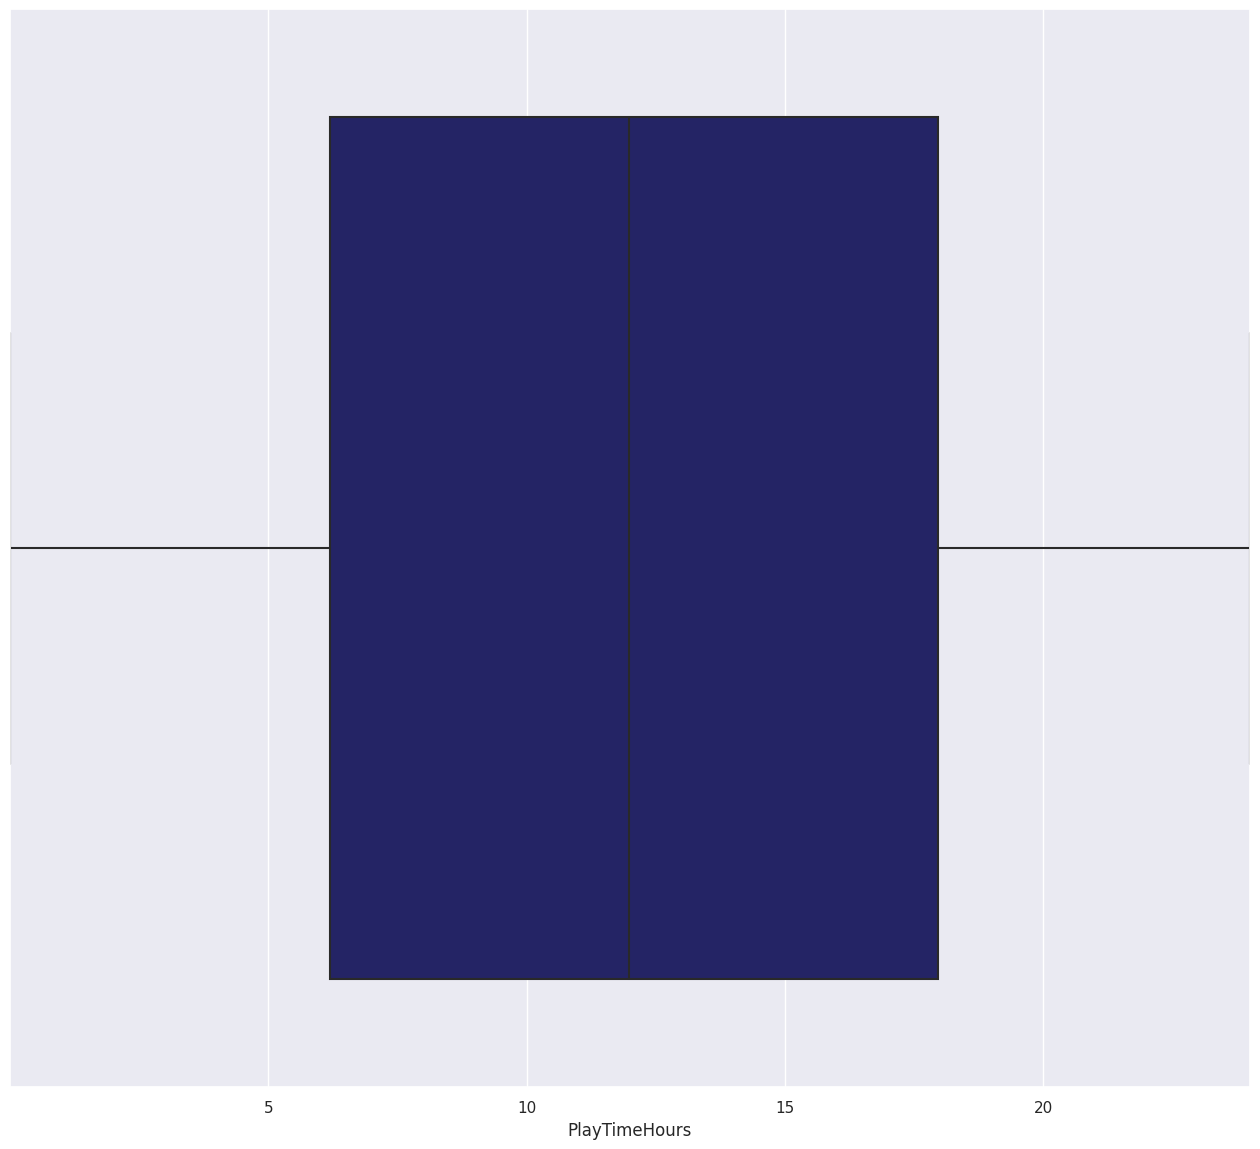

In [ ]:
boxxer_plot = sns.boxplot(x = 'PlayTimeHours', data = dataframed.loc[dataframed['EngagementLevel'] == 1], color = 'midnightblue')
boxxer_plot.set(xlim = (0.0001, 23.9996))

In [ ]:
numpy_array = np.array(dataframed.loc[dataframed['EngagementLevel'] == 1]['PlayTimeHours'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than -11.4570 or greater than 35.6084
There are 0 outliers.


[(0.0, 1.0)]

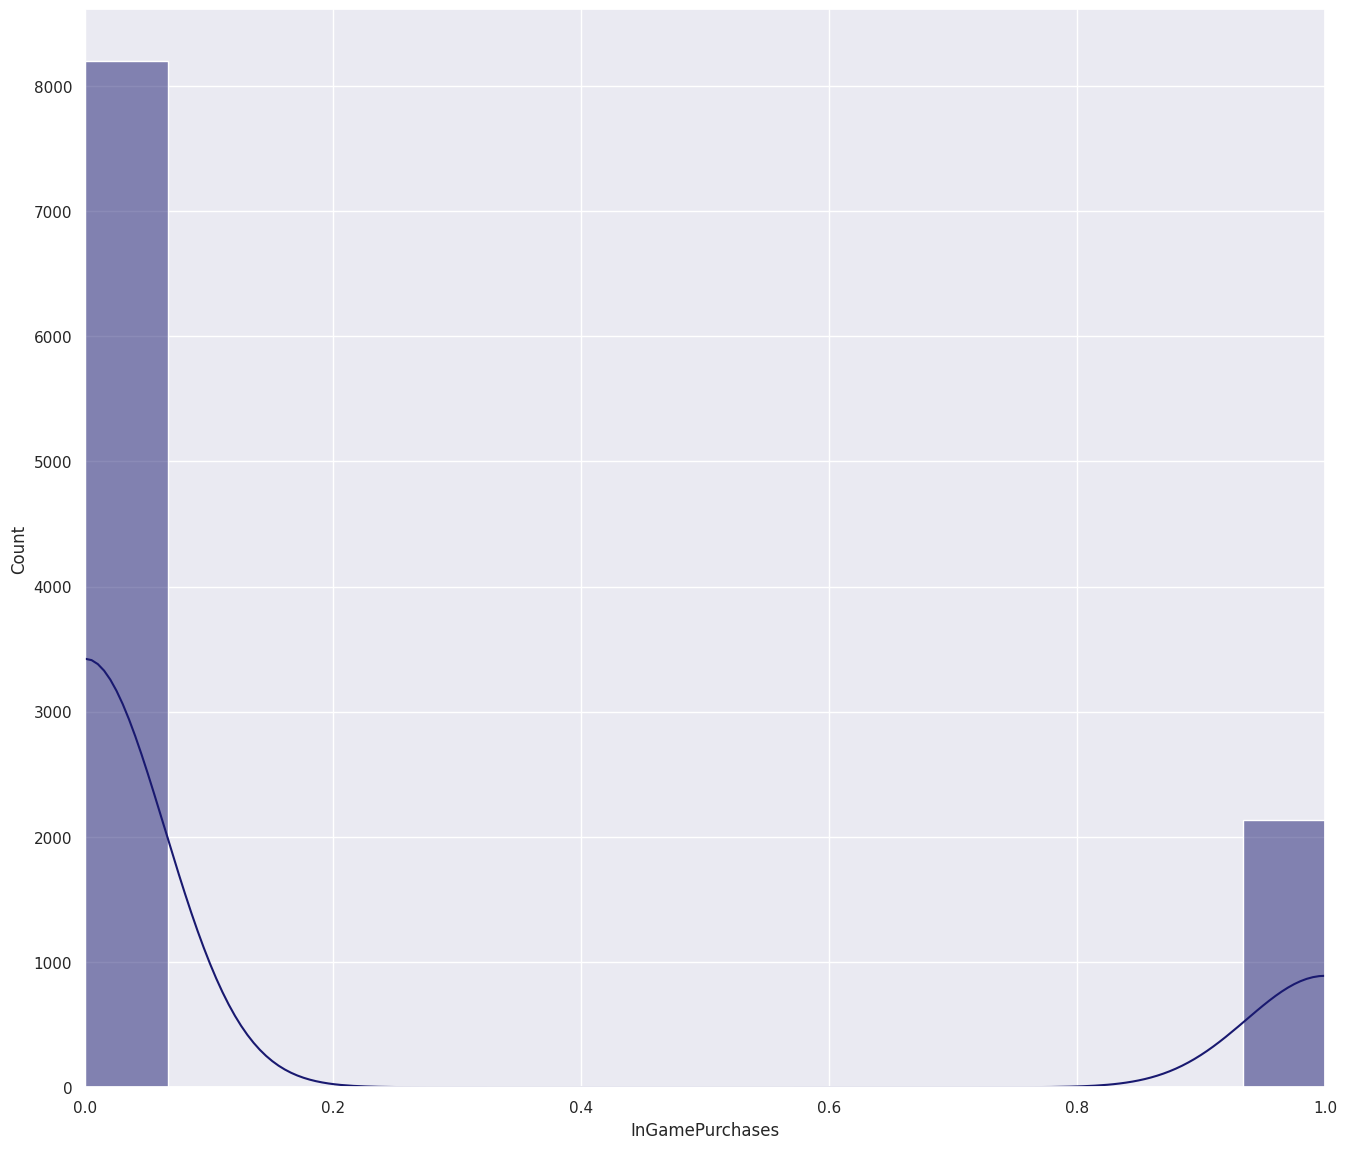

In [ ]:
count_plotted = sns.histplot(x = 'InGamePurchases', data = dataframed.loc[dataframed['EngagementLevel'] == 1], kde = True, color = 'midnightblue')
count_plotted.set(xlabel = "InGamePurchases")
count_plotted.set(xlim = (0.0000, 1.0000))

[(0.0, 1.0)]

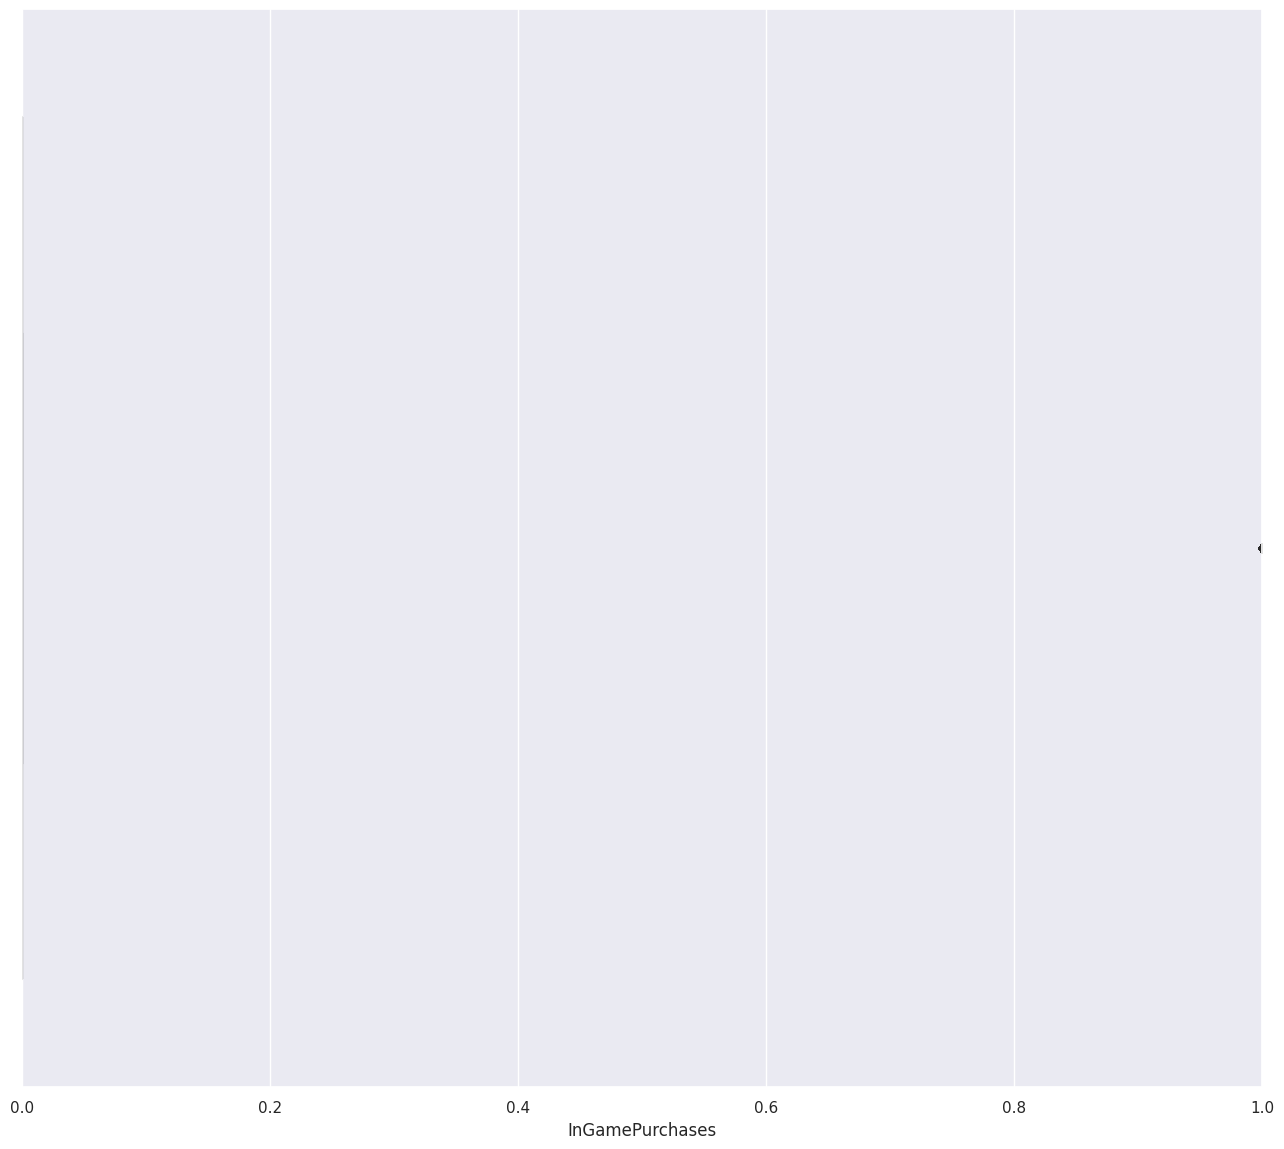

In [ ]:
boxxer_plot = sns.boxplot(x = 'InGamePurchases', data = dataframed.loc[dataframed['EngagementLevel'] == 1], color = 'midnightblue')
boxxer_plot.set(xlim = (0.0000, 1.0000))

In [ ]:
numpy_array = np.array(dataframed.loc[dataframed['EngagementLevel'] == 1]['InGamePurchases'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than 0.0000 or greater than 0.0000
There are 2134 outliers.


[(0.0, 2.0)]

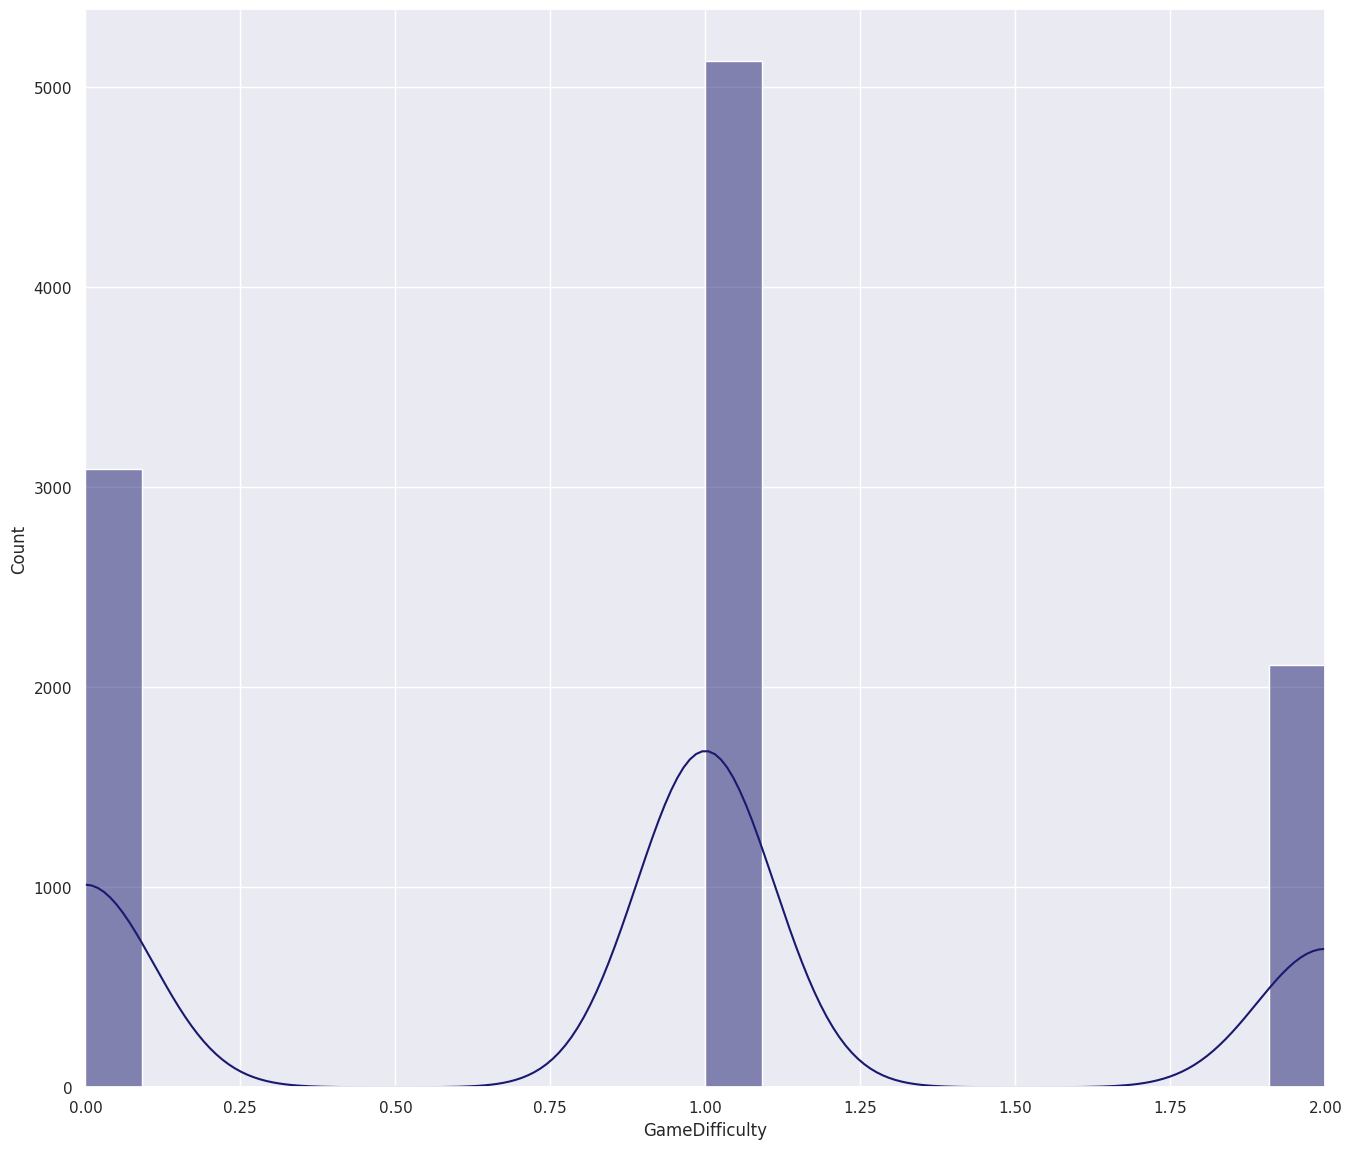

In [ ]:
count_plotted = sns.histplot(x = 'GameDifficulty', data = dataframed.loc[dataframed['EngagementLevel'] == 1], kde = True, color = 'midnightblue')
count_plotted.set(xlabel = "GameDifficulty")
count_plotted.set(xlim = (0.0000, 2.0000))

[(0.0, 2.0)]

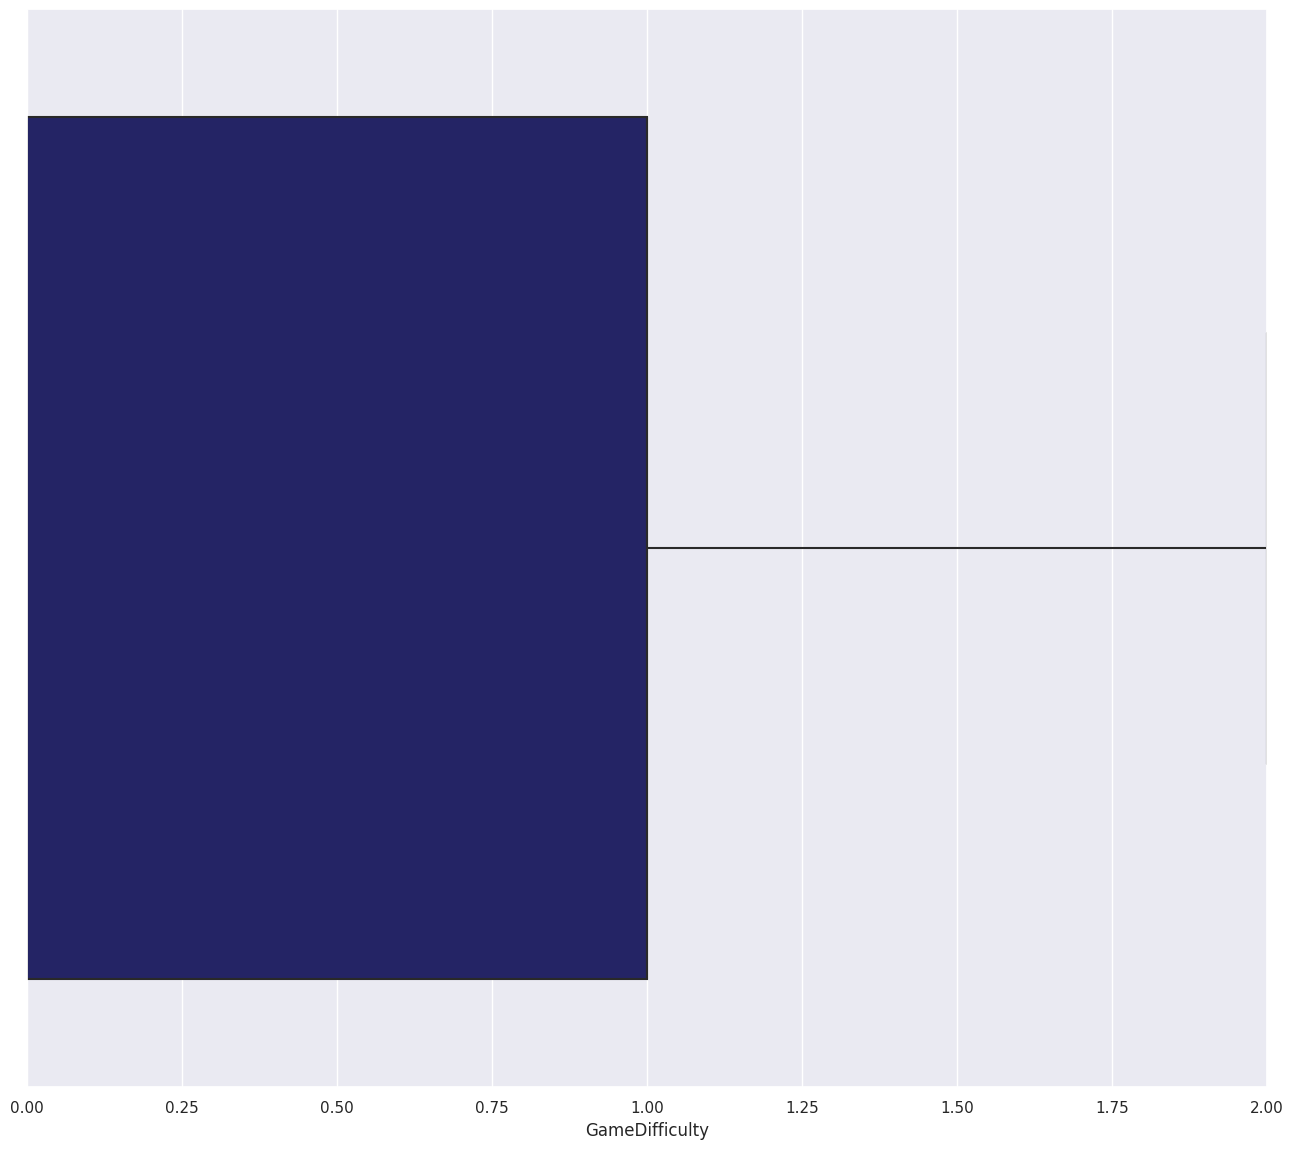

In [ ]:
boxxer_plot = sns.boxplot(x = 'GameDifficulty', data = dataframed.loc[dataframed['EngagementLevel'] == 1], color = 'midnightblue')
boxxer_plot.set(xlim = (0.0000, 2.0000))

In [ ]:
numpy_array = np.array(dataframed.loc[dataframed['EngagementLevel'] == 1]['GameDifficulty'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than -1.5000 or greater than 2.5000
There are 0 outliers.


[(0.0, 19.0)]

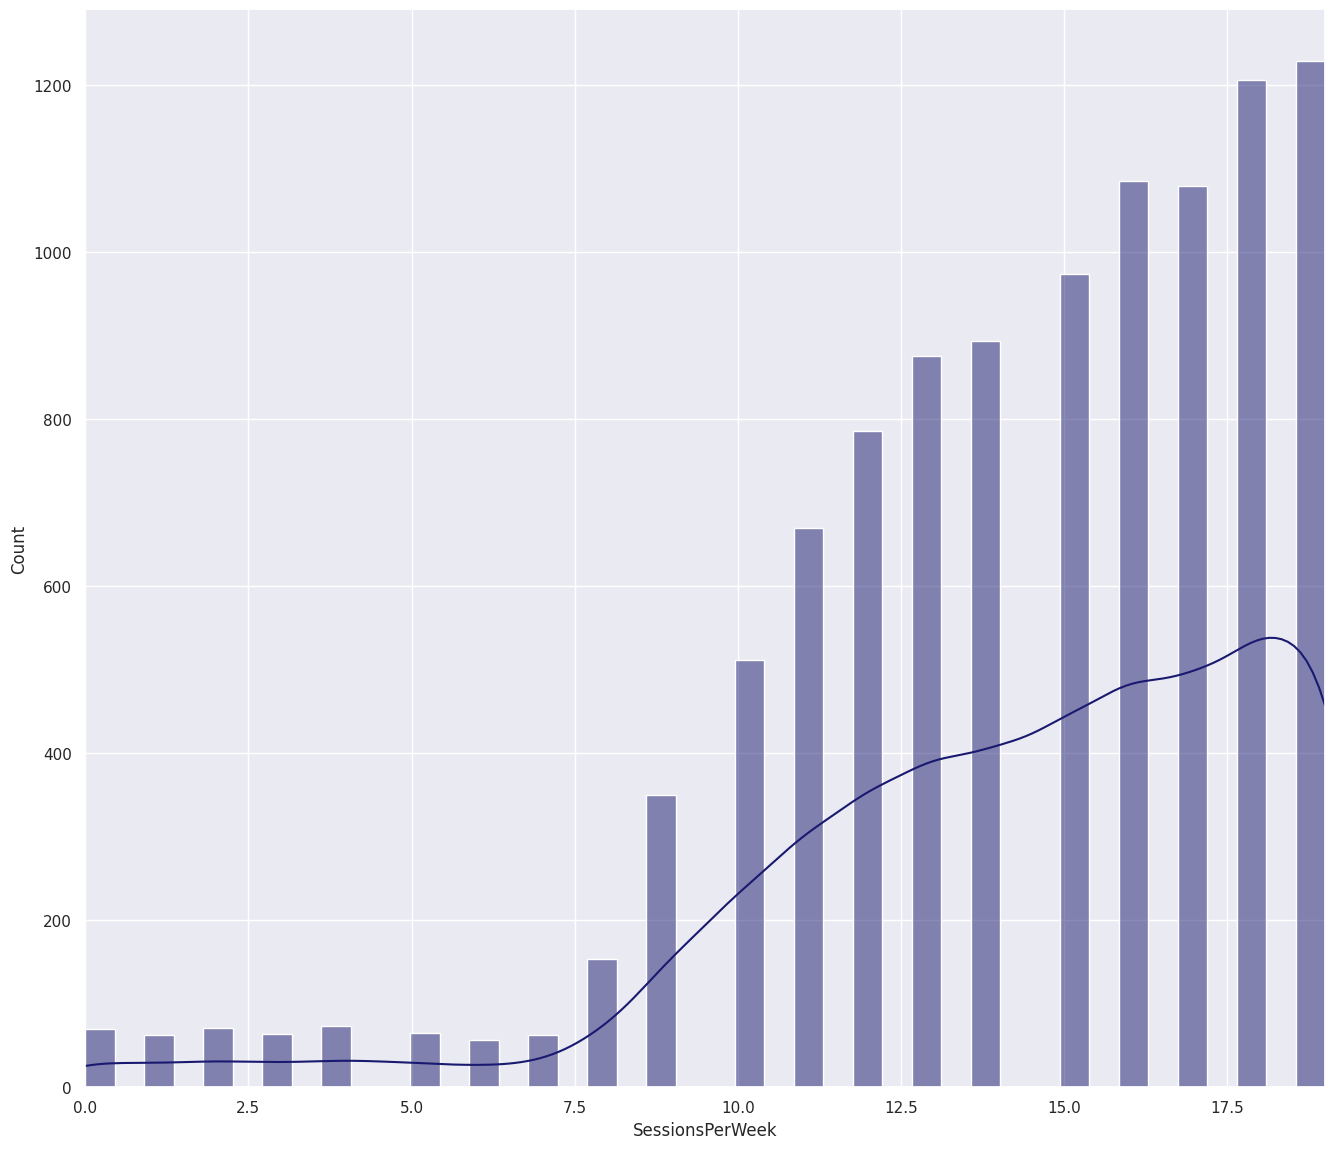

In [ ]:
count_plotted = sns.histplot(x = 'SessionsPerWeek', data = dataframed.loc[dataframed['EngagementLevel'] == 1], kde = True, color = 'midnightblue')
count_plotted.set(xlabel = "SessionsPerWeek")
count_plotted.set(xlim = (0.0000, 19.0000))

[(0.0, 19.0)]

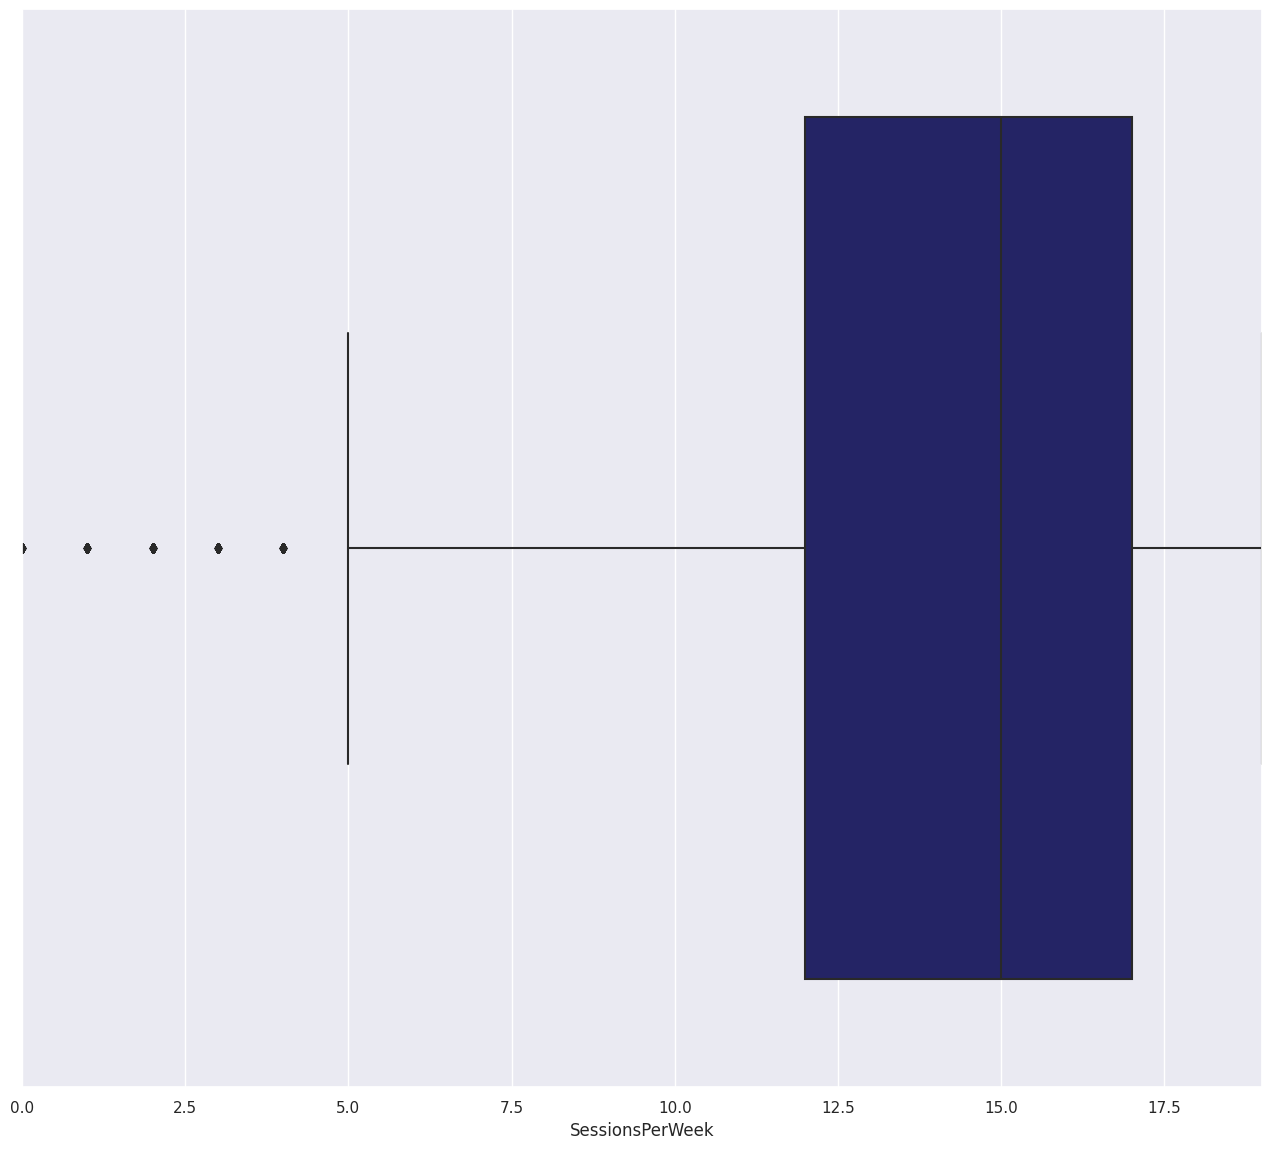

In [ ]:
boxxer_plot = sns.boxplot(x = 'SessionsPerWeek', data = dataframed.loc[dataframed['EngagementLevel'] == 1], color = 'midnightblue')
boxxer_plot.set(xlim = (0.0000, 19.0000))

In [ ]:
numpy_array = np.array(dataframed.loc[dataframed['EngagementLevel'] == 1]['SessionsPerWeek'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than 4.5000 or greater than 24.5000
There are 340 outliers.


[(10.0, 179.0)]

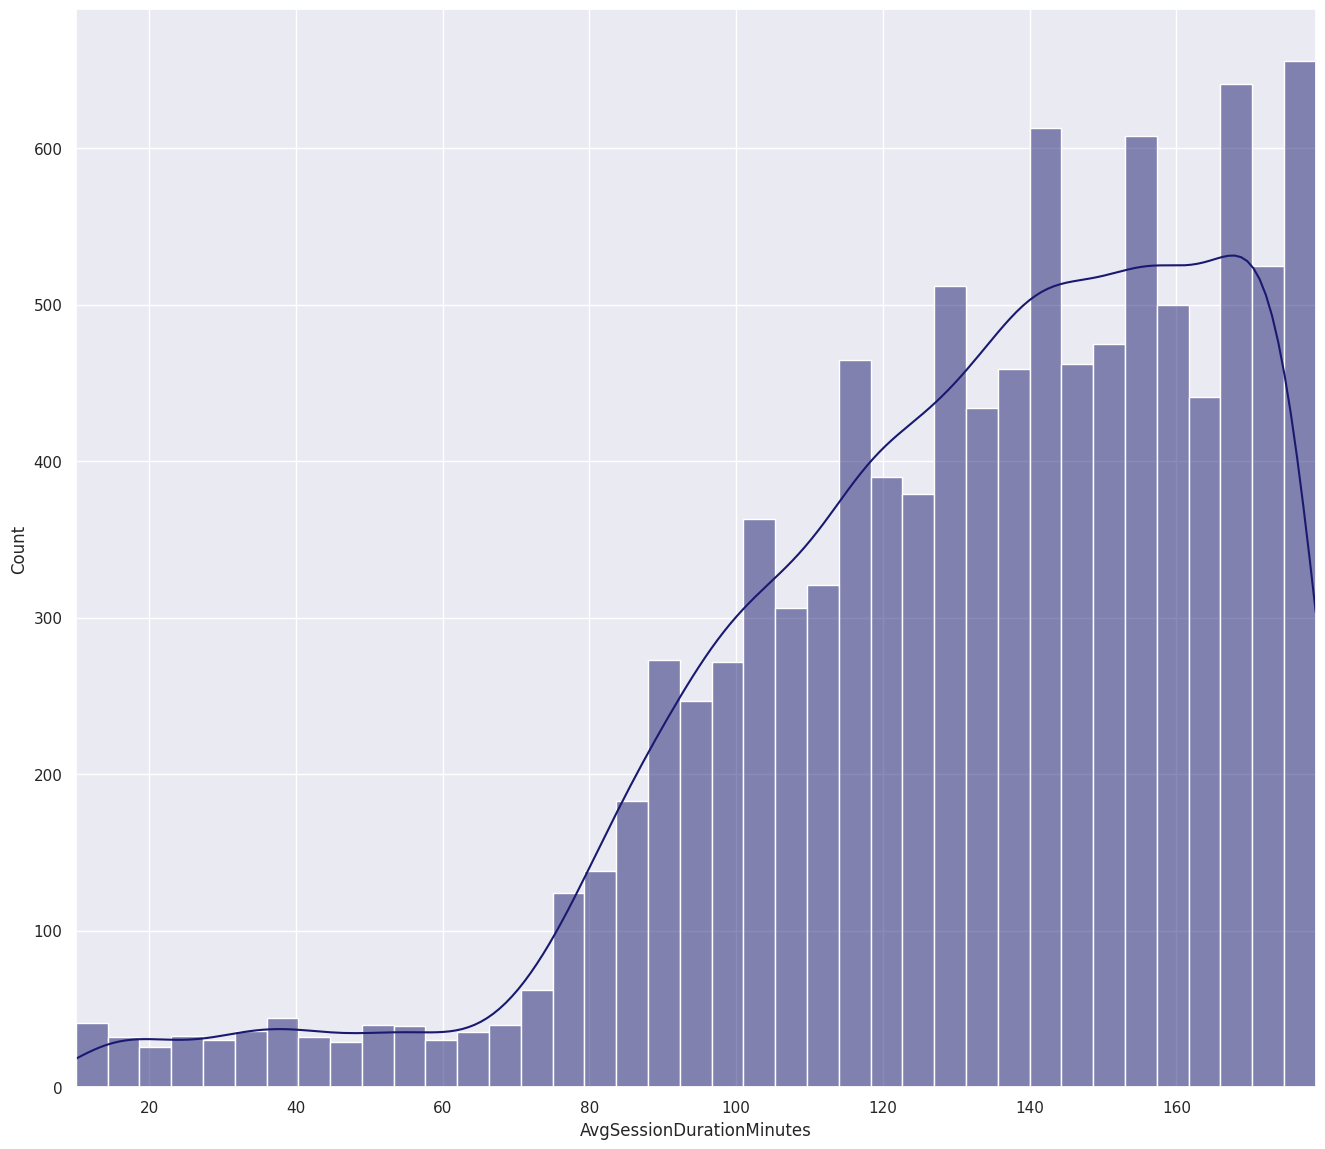

In [ ]:
count_plotted = sns.histplot(x = 'AvgSessionDurationMinutes', data = dataframed.loc[dataframed['EngagementLevel'] == 1], kde = True, color = 'midnightblue')
count_plotted.set(xlabel = "AvgSessionDurationMinutes")
count_plotted.set(xlim = (10.0000, 179.0000))

[(10.0, 179.0)]

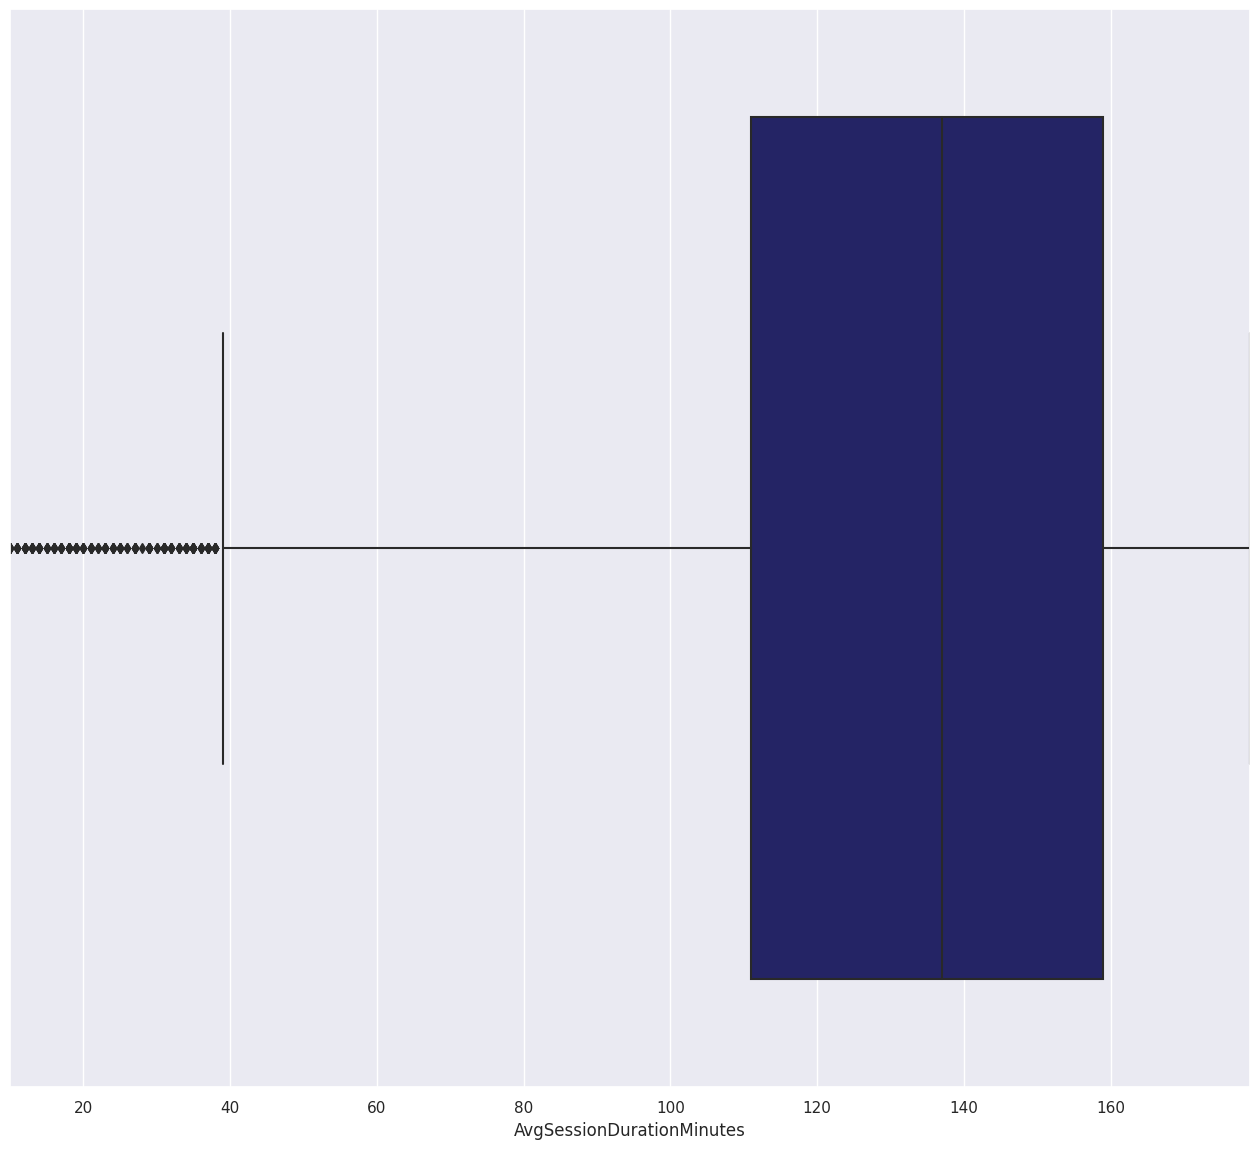

In [ ]:
boxxer_plot = sns.boxplot(x = 'AvgSessionDurationMinutes', data = dataframed.loc[dataframed['EngagementLevel'] == 1], color = 'midnightblue')
boxxer_plot.set(xlim = (10.0000, 179.0000))

In [ ]:
numpy_array = np.array(dataframed.loc[dataframed['EngagementLevel'] == 1]['AvgSessionDurationMinutes'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than 39.0000 or greater than 231.0000
There are 225 outliers.


[(1.0, 99.0)]

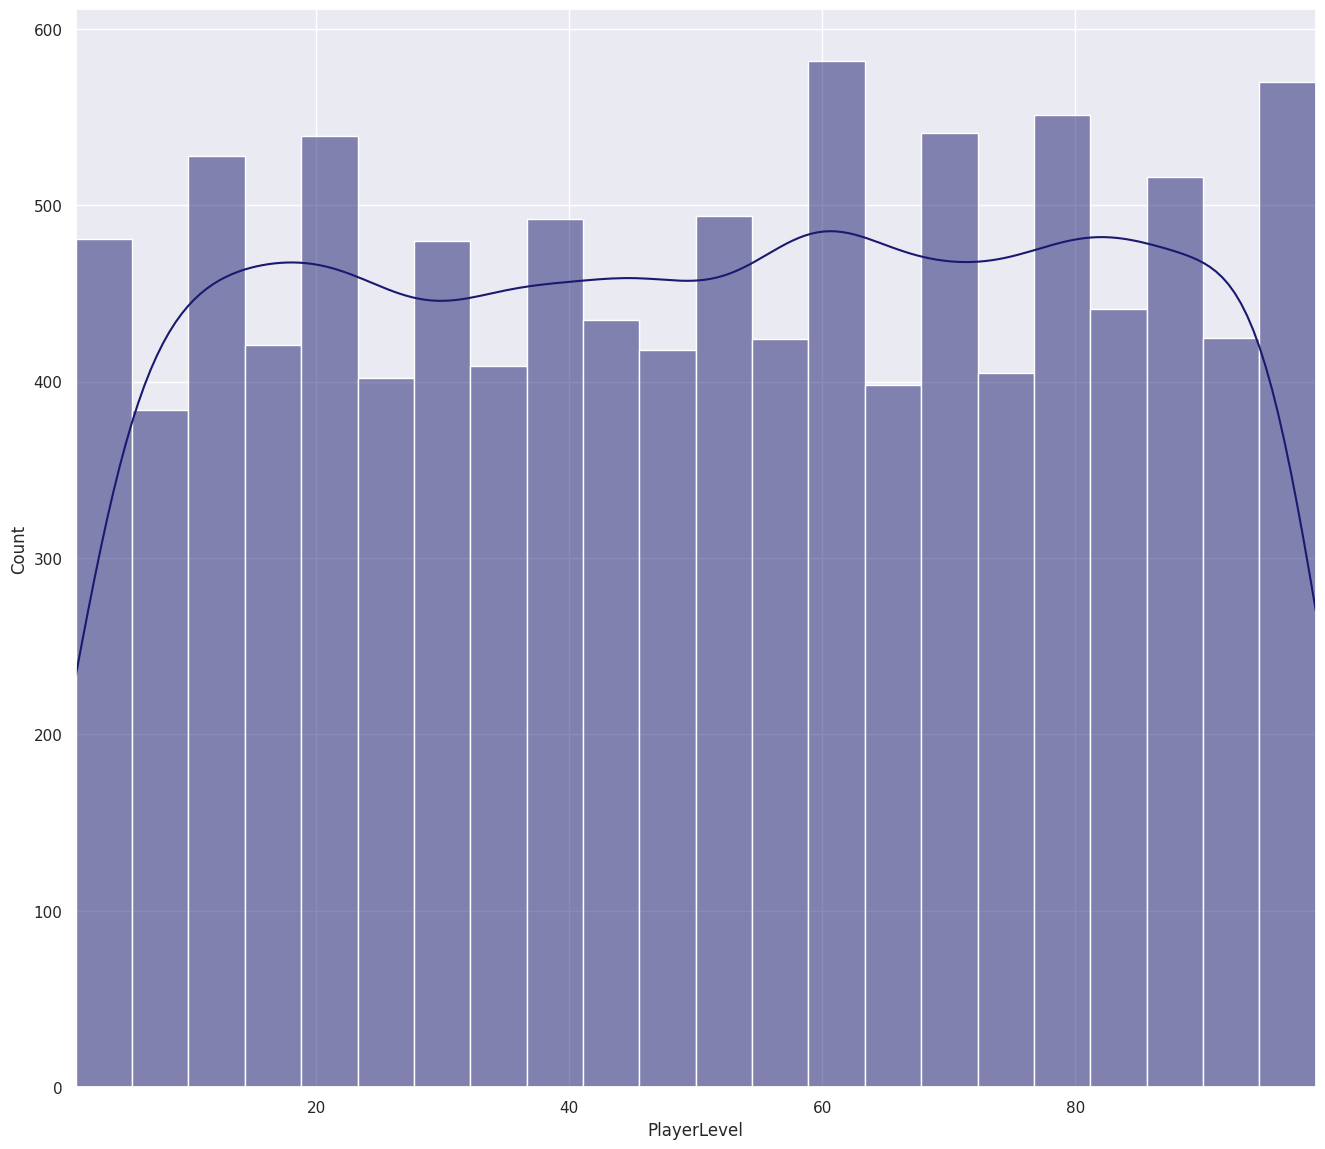

In [ ]:
count_plotted = sns.histplot(x = 'PlayerLevel', data = dataframed.loc[dataframed['EngagementLevel'] == 1], kde = True, color = 'midnightblue')
count_plotted.set(xlabel = "PlayerLevel")
count_plotted.set(xlim = (1.0000, 99.0000))

[(1.0, 99.0)]

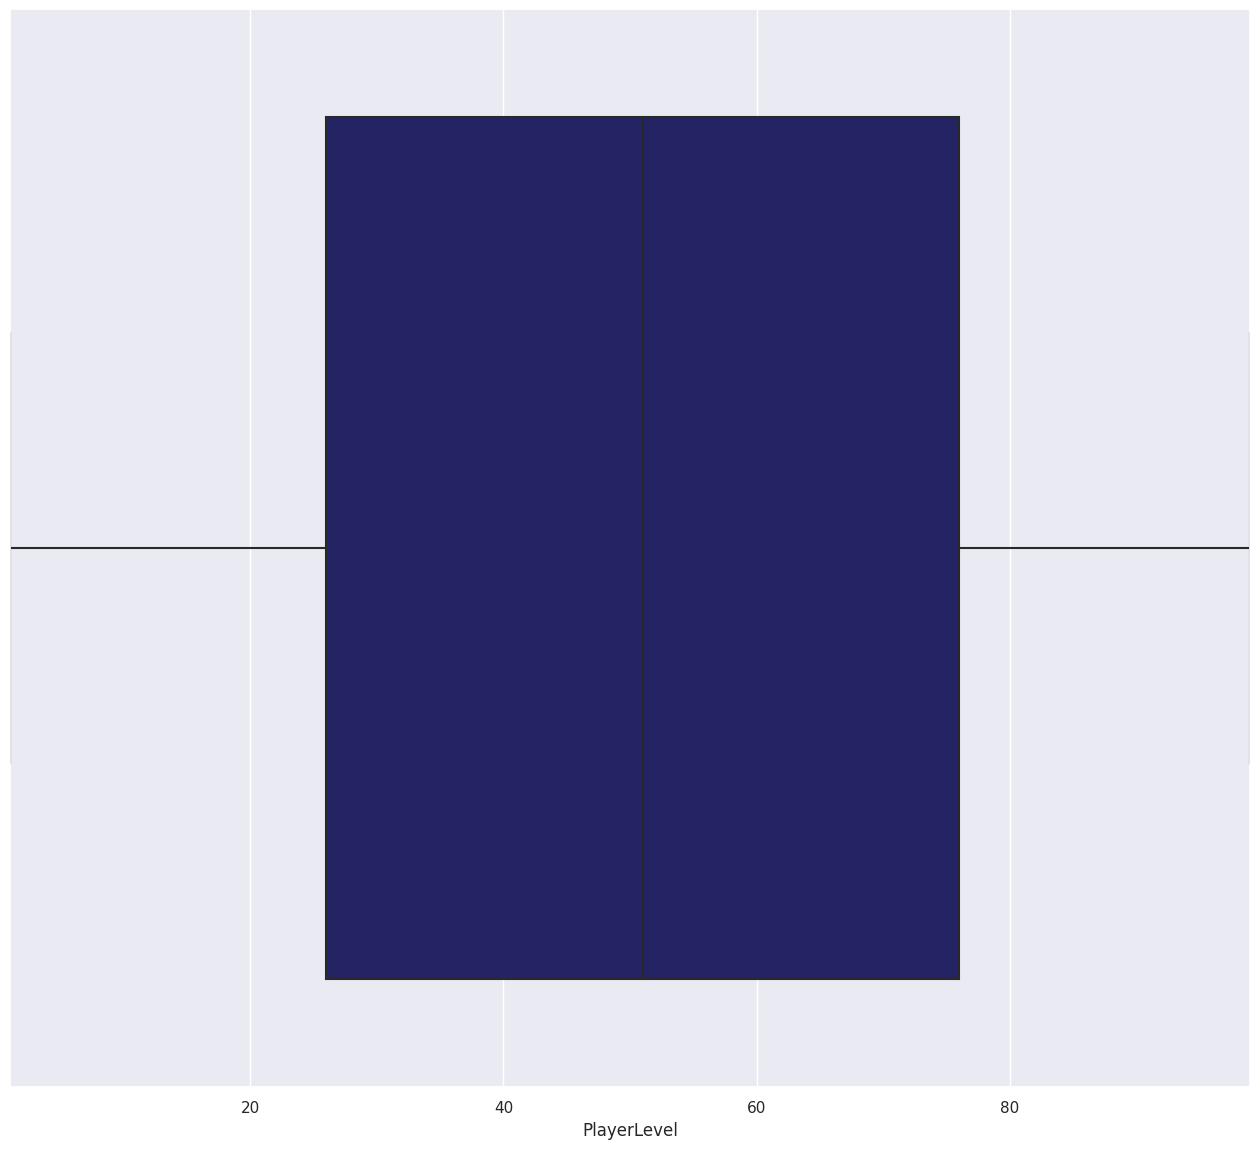

In [ ]:
boxxer_plot = sns.boxplot(x = 'PlayerLevel', data = dataframed.loc[dataframed['EngagementLevel'] == 1], color = 'midnightblue')
boxxer_plot.set(xlim = (1.0000, 99.0000))

In [ ]:
numpy_array = np.array(dataframed.loc[dataframed['EngagementLevel'] == 1]['PlayerLevel'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than -49.0000 or greater than 151.0000
There are 0 outliers.


[(0.0, 49.0)]

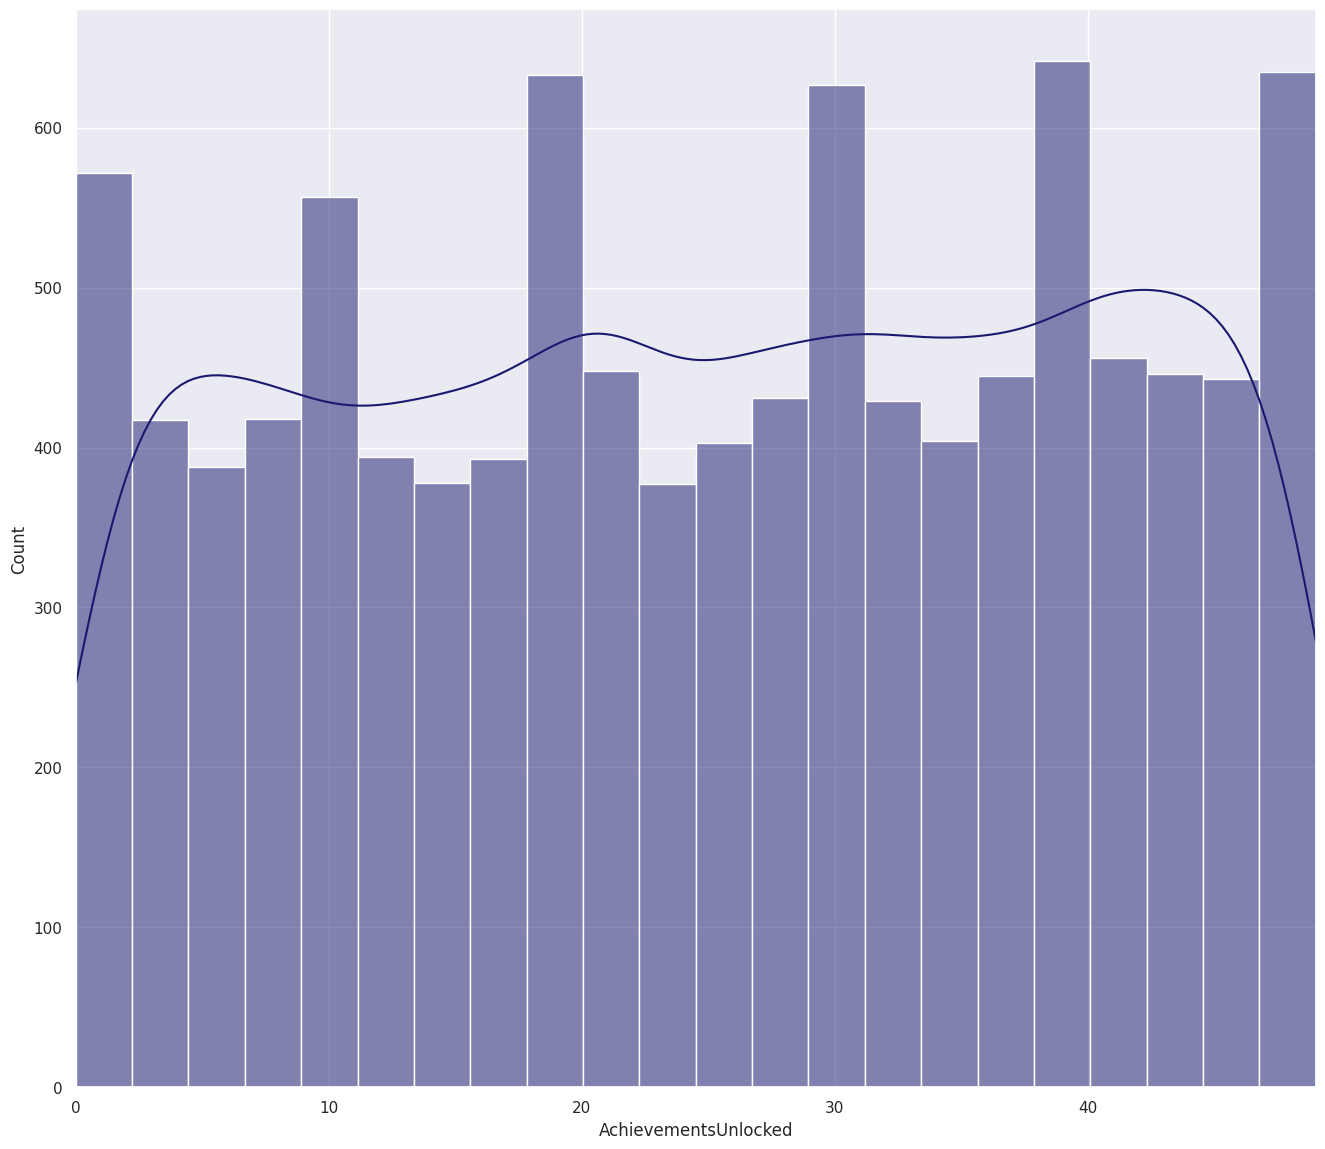

In [ ]:
count_plotted = sns.histplot(x = 'AchievementsUnlocked', data = dataframed.loc[dataframed['EngagementLevel'] == 1], kde = True, color = 'midnightblue')
count_plotted.set(xlabel = "AchievementsUnlocked")
count_plotted.set(xlim = (0.0000, 49.0000))

[(0.0, 49.0)]

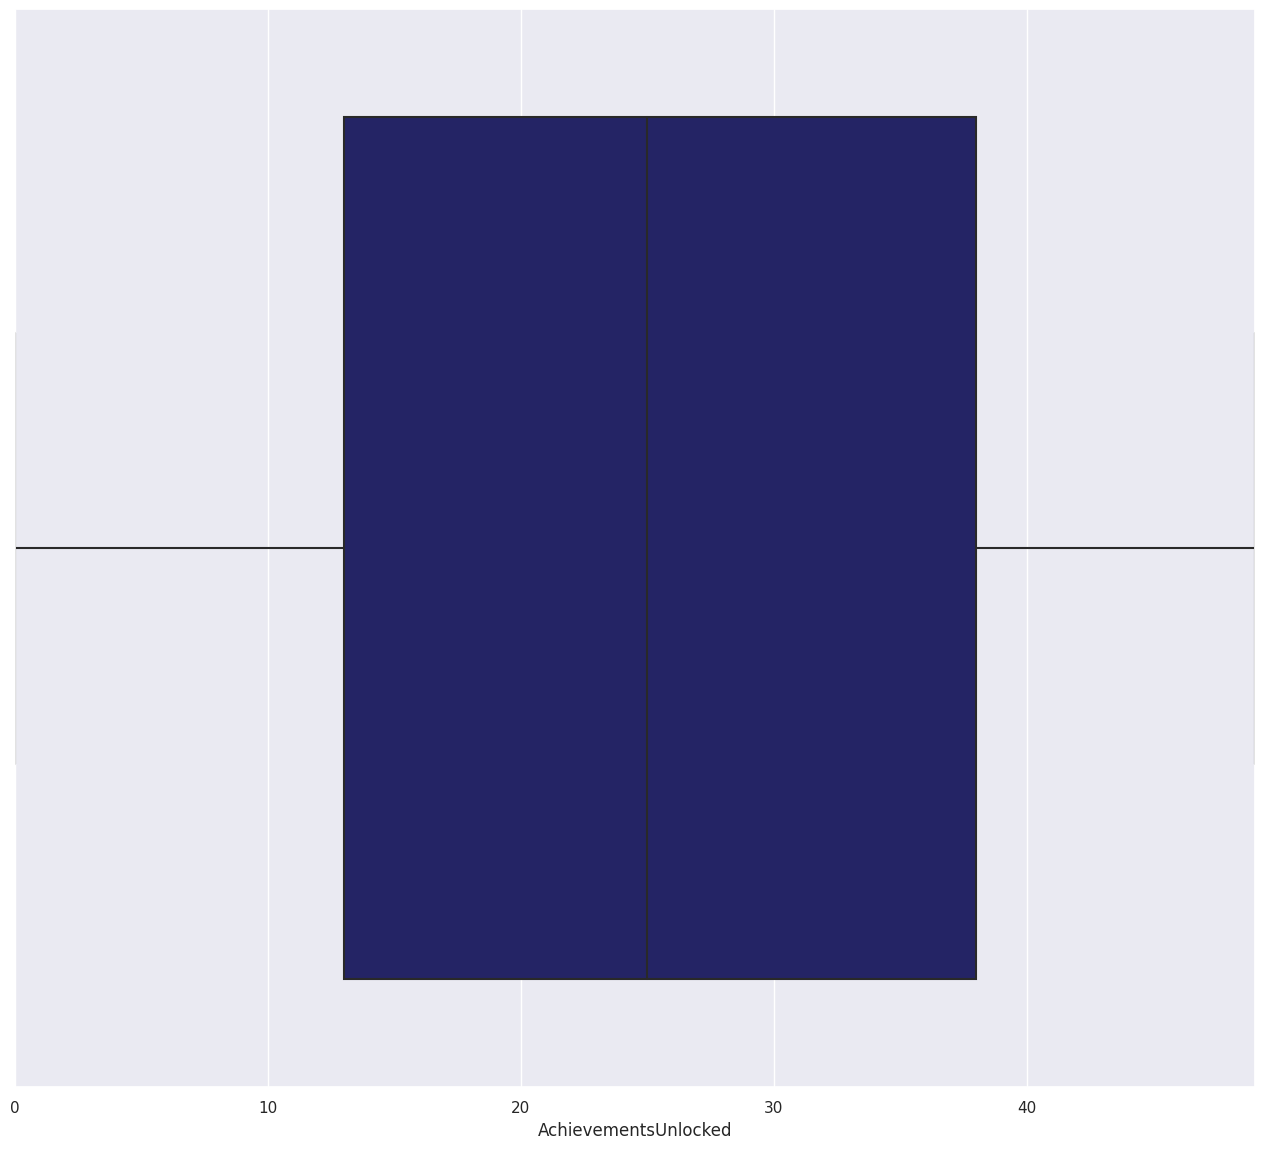

In [ ]:
boxxer_plot = sns.boxplot(x = 'AchievementsUnlocked', data = dataframed.loc[dataframed['EngagementLevel'] == 1], color = 'midnightblue')
boxxer_plot.set(xlim = (0.0000, 49.0000))

In [ ]:
numpy_array = np.array(dataframed.loc[dataframed['EngagementLevel'] == 1]['AchievementsUnlocked'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than -24.5000 or greater than 75.5000
There are 0 outliers.


[(15.0, 49.0)]

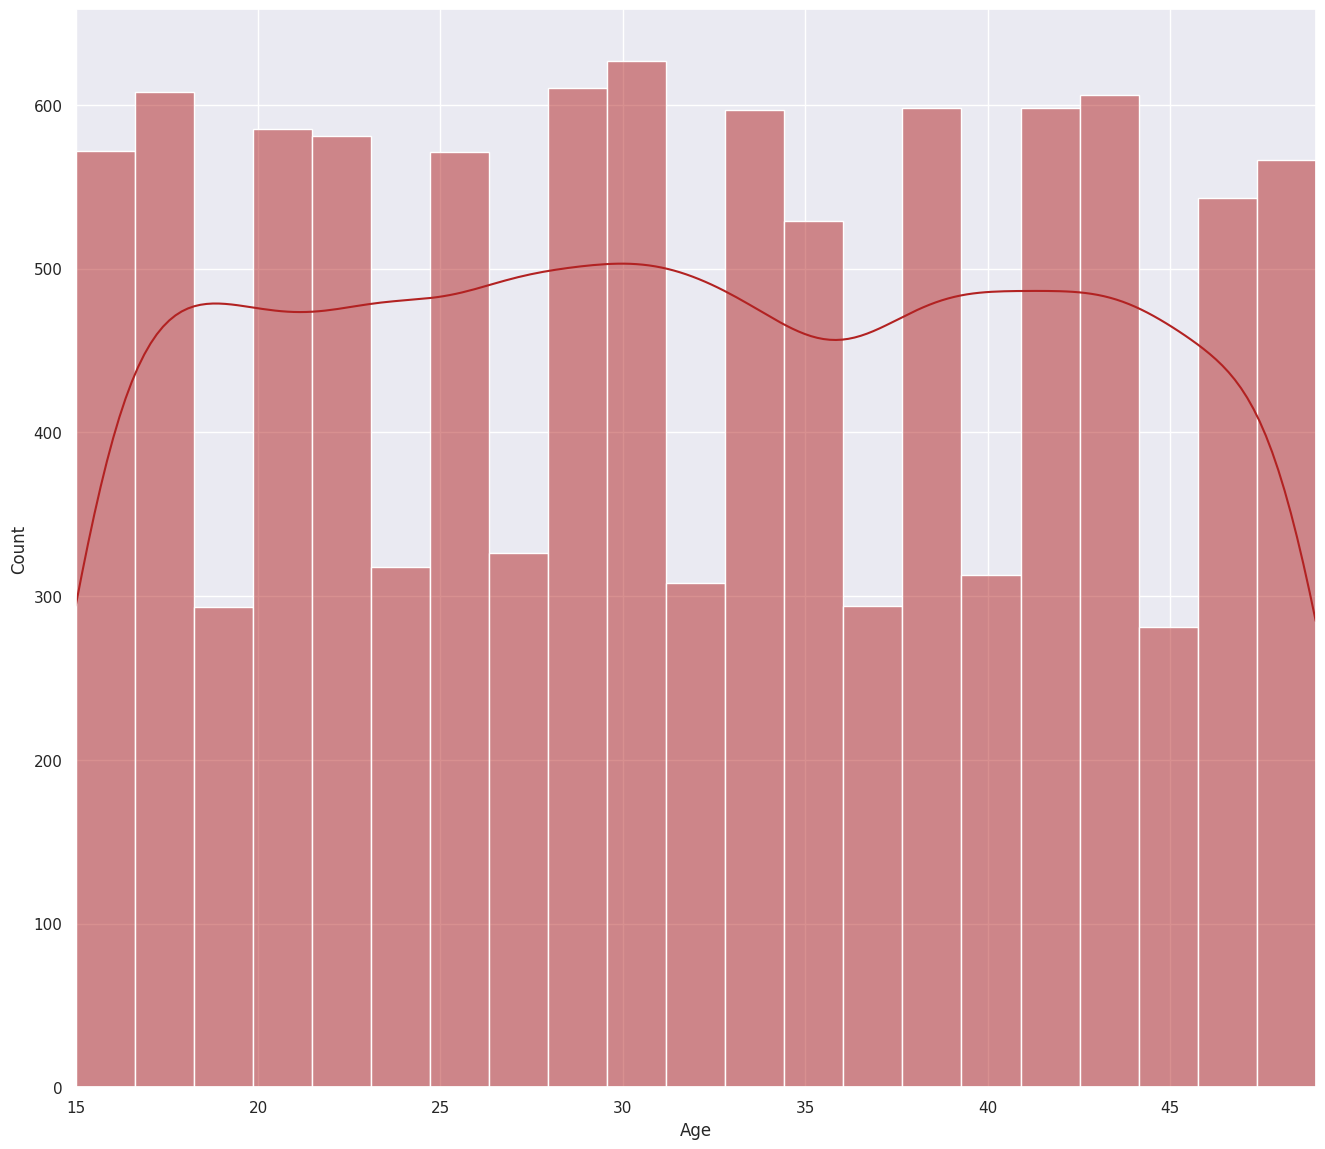

In [ ]:
count_plotted = sns.histplot(x = 'Age', data = dataframed.loc[dataframed['EngagementLevel'] == 2], kde = True, color = 'firebrick')
count_plotted.set(xlabel = "Age")
count_plotted.set(xlim = (15.0000, 49.0000))

[(15.0, 49.0)]

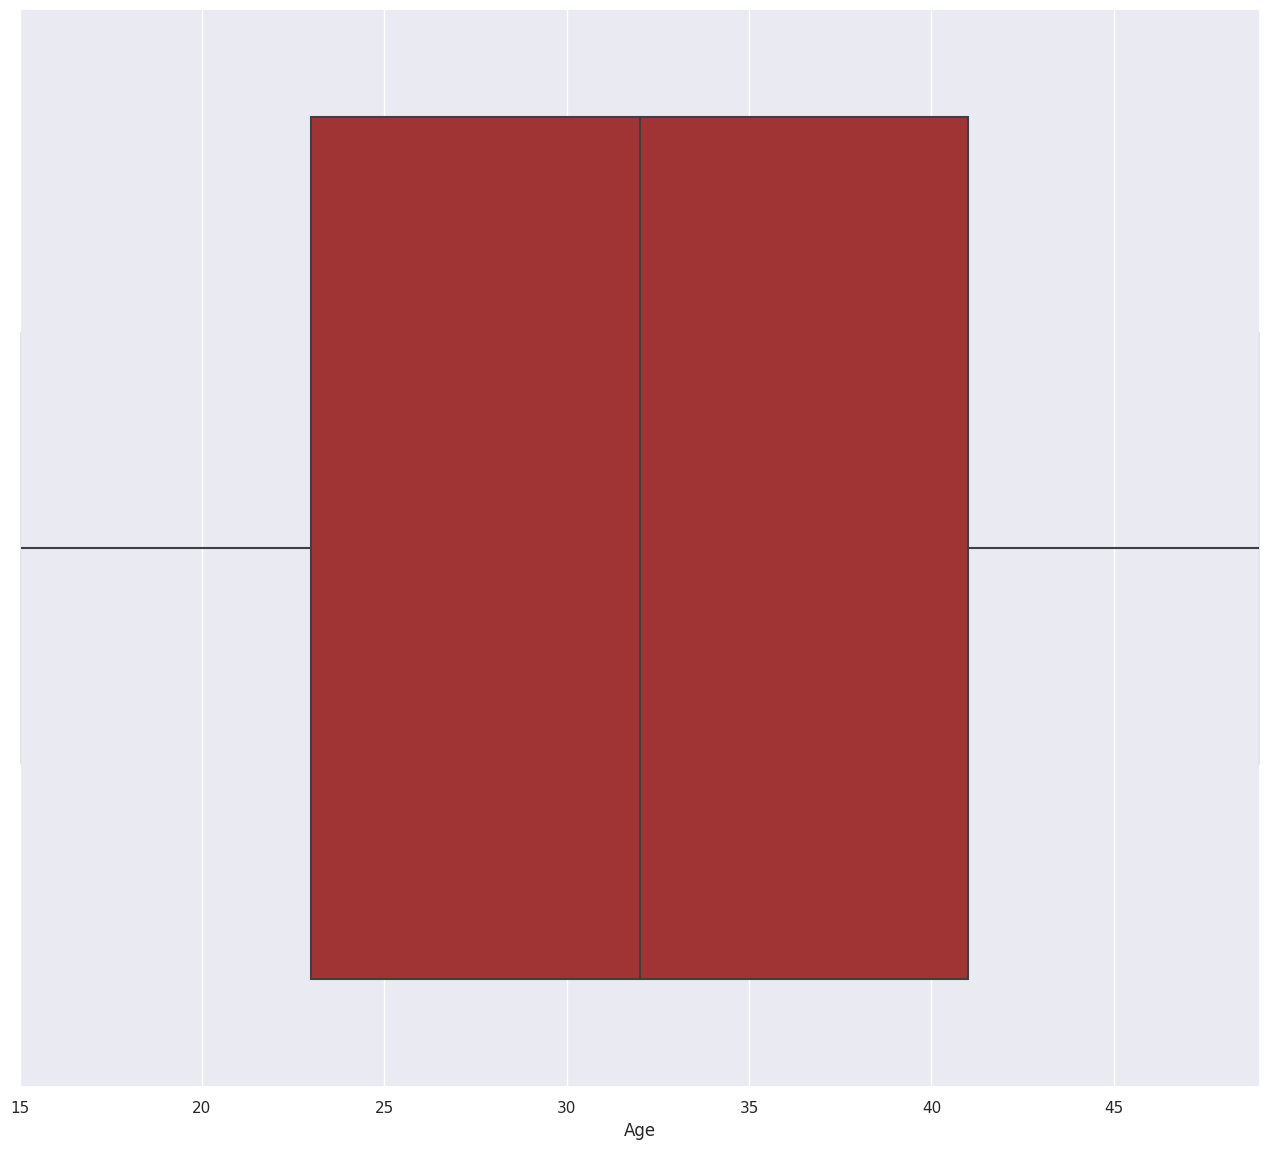

In [ ]:
boxxer_plot = sns.boxplot(x = 'Age', data = dataframed.loc[dataframed['EngagementLevel'] == 2], color = 'firebrick')
boxxer_plot.set(xlim = (15.0000, 49.0000))

In [ ]:
numpy_array = np.array(dataframed.loc[dataframed['EngagementLevel'] == 2]['Age'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than -4.0000 or greater than 68.0000
There are 0 outliers.


[(0.0, 1.0)]

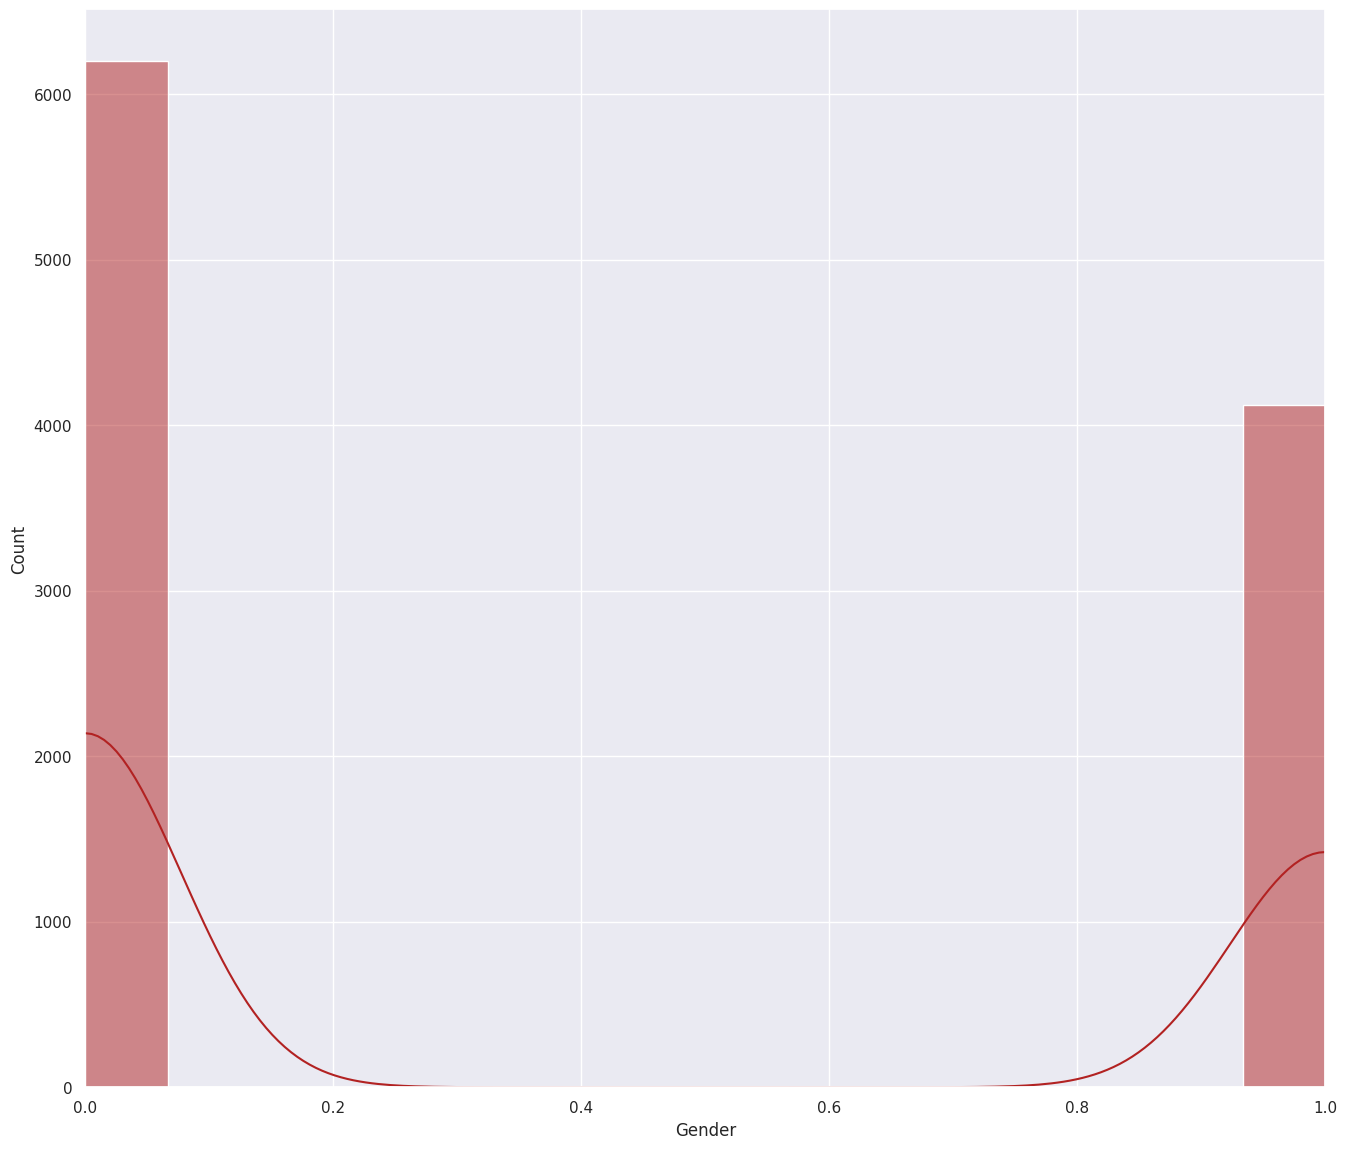

In [ ]:
count_plotted = sns.histplot(x = 'Gender', data = dataframed.loc[dataframed['EngagementLevel'] == 2], kde = True, color = 'firebrick')
count_plotted.set(xlabel = "Gender")
count_plotted.set(xlim = (0.0000, 1.0000))

[(0.0, 1.0)]

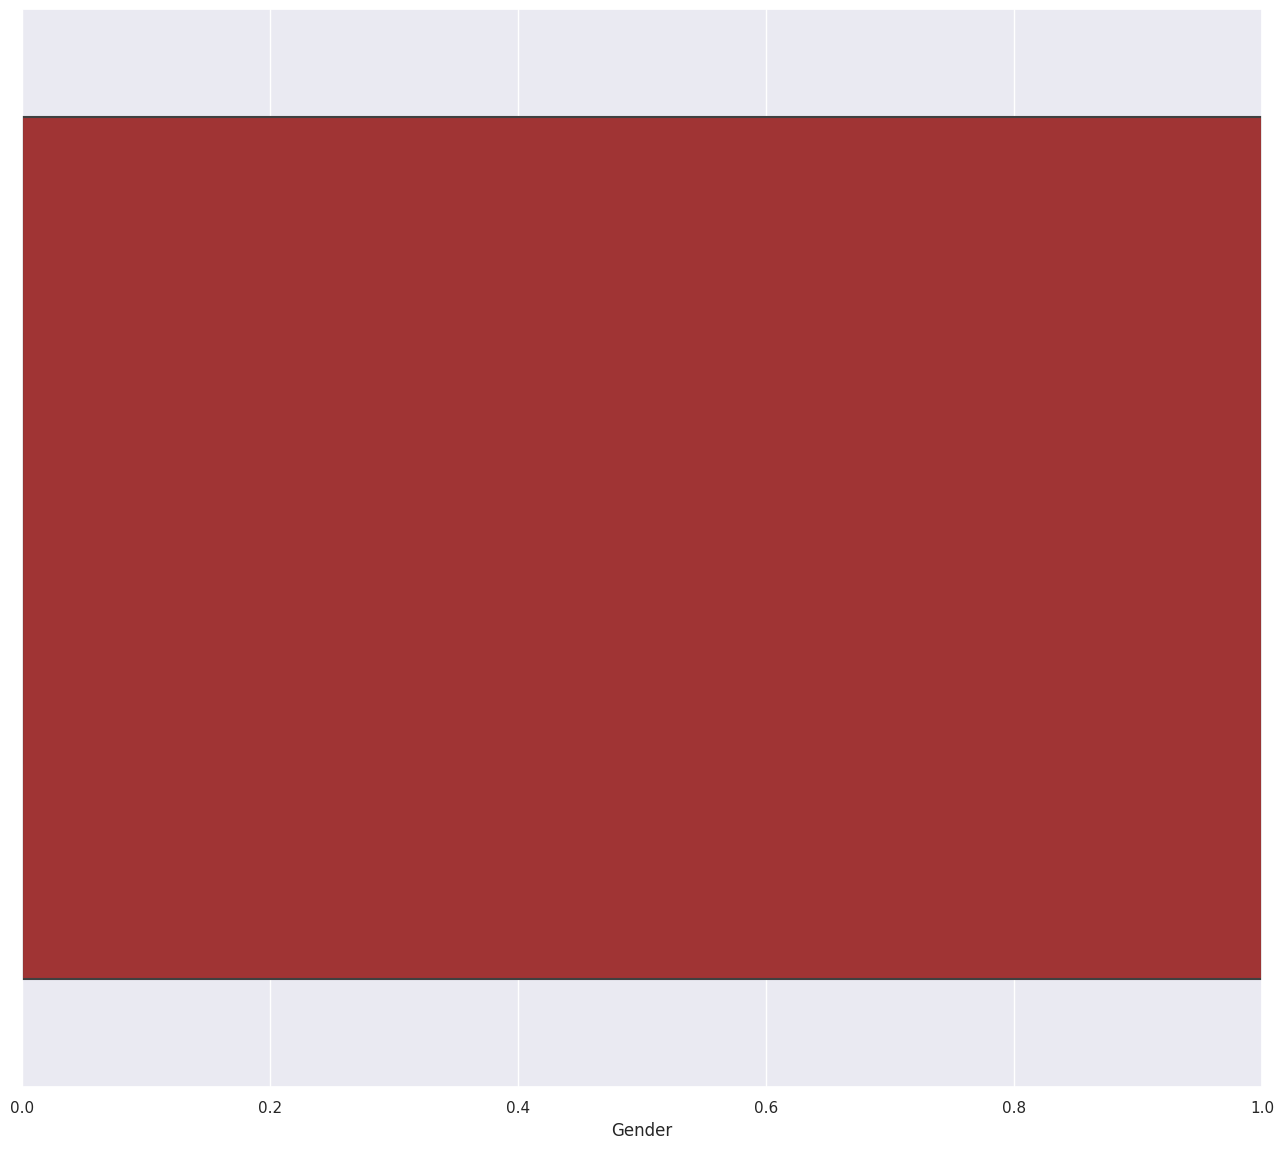

In [ ]:
boxxer_plot = sns.boxplot(x = 'Gender', data = dataframed.loc[dataframed['EngagementLevel'] == 2], color = 'firebrick')
boxxer_plot.set(xlim = (0.0000, 1.0000))

In [ ]:
numpy_array = np.array(dataframed.loc[dataframed['EngagementLevel'] == 2]['Gender'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than -1.5000 or greater than 2.5000
There are 0 outliers.


[(0.0, 3.0)]

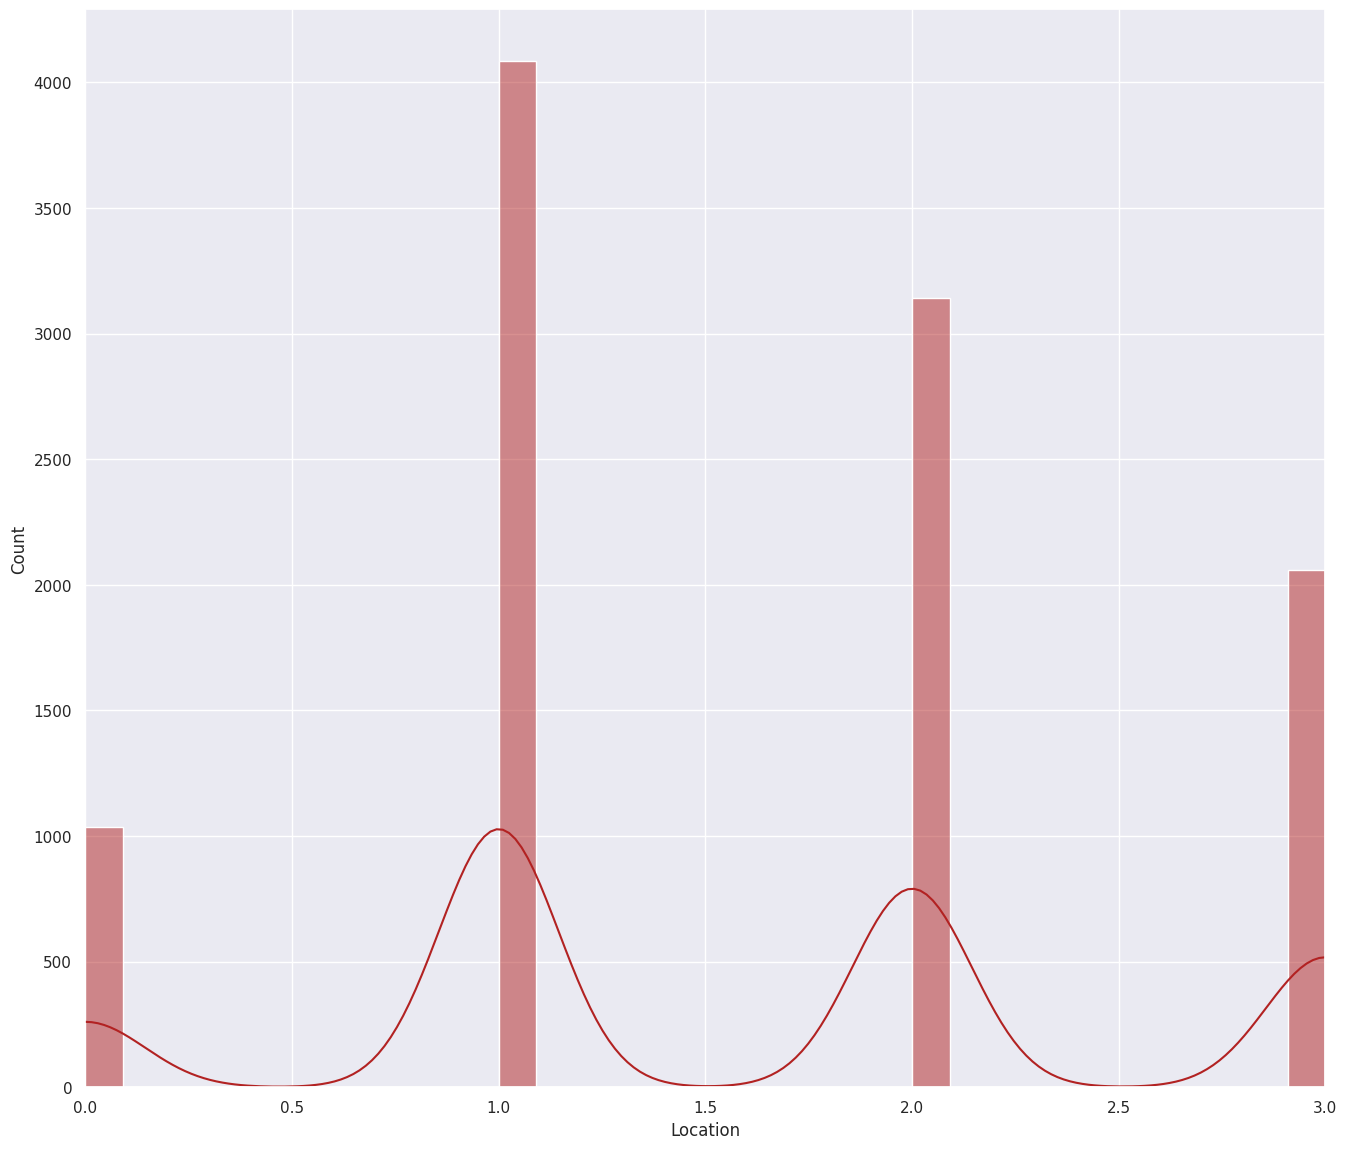

In [ ]:
count_plotted = sns.histplot(x = 'Location', data = dataframed.loc[dataframed['EngagementLevel'] == 2], kde = True, color = 'firebrick')
count_plotted.set(xlabel = "Location")
count_plotted.set(xlim = (0.0000, 3.0000))

[(0.0, 3.0)]

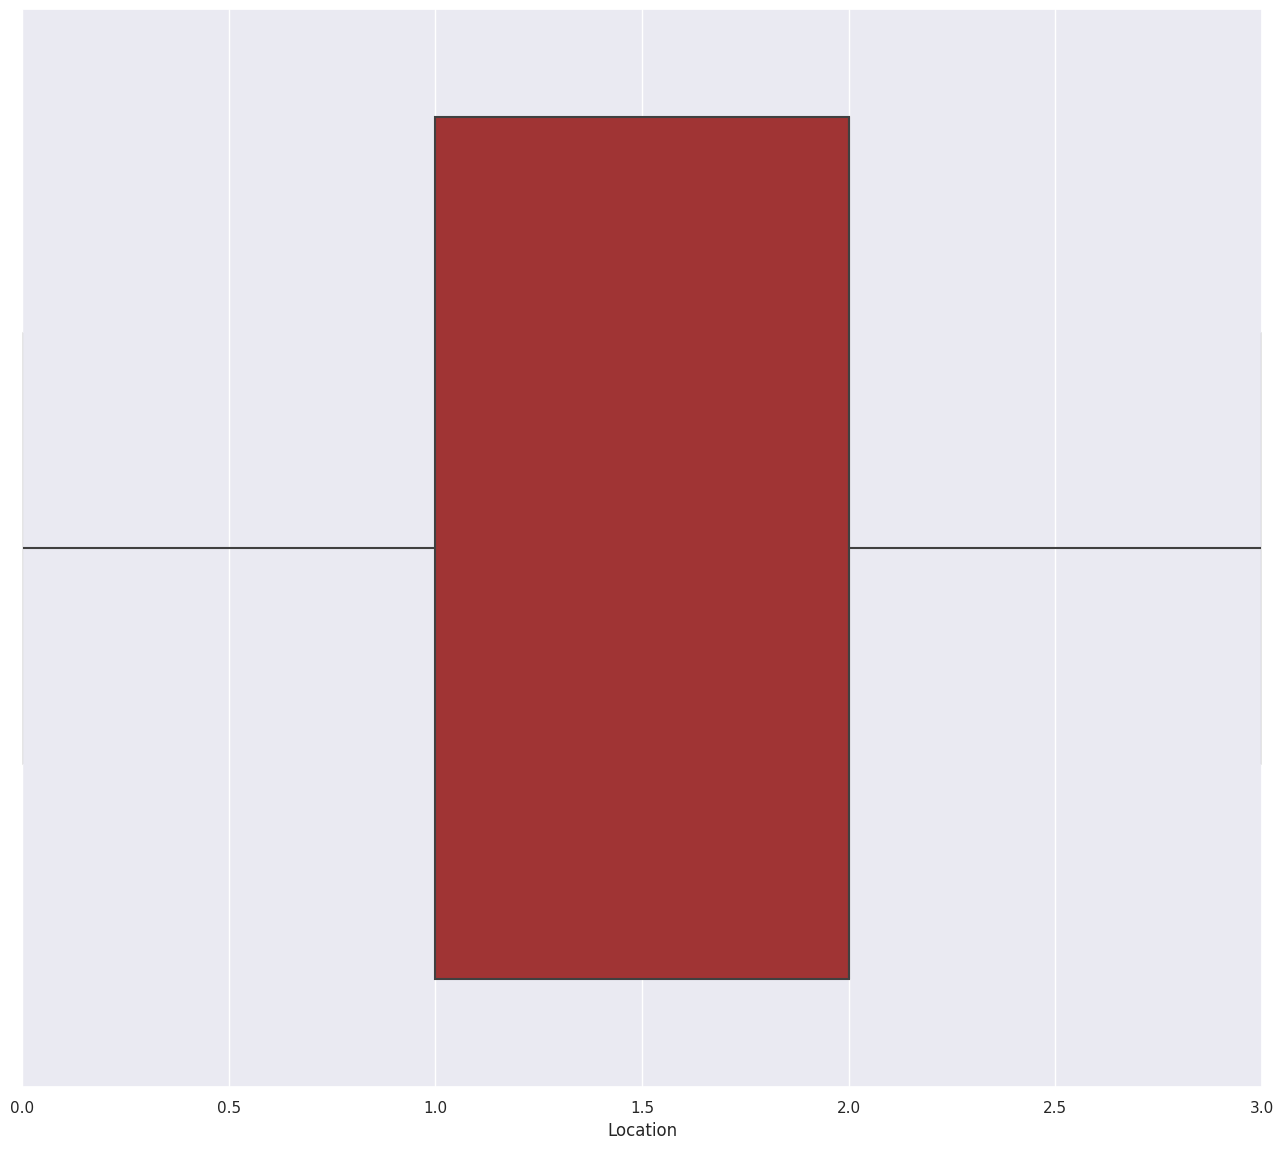

In [ ]:
boxxer_plot = sns.boxplot(x = 'Location', data = dataframed.loc[dataframed['EngagementLevel'] == 2], color = 'firebrick')
boxxer_plot.set(xlim = (0.0000, 3.0000))

In [ ]:
numpy_array = np.array(dataframed.loc[dataframed['EngagementLevel'] == 2]['Location'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than -0.5000 or greater than 3.5000
There are 0 outliers.


[(0.0, 4.0)]

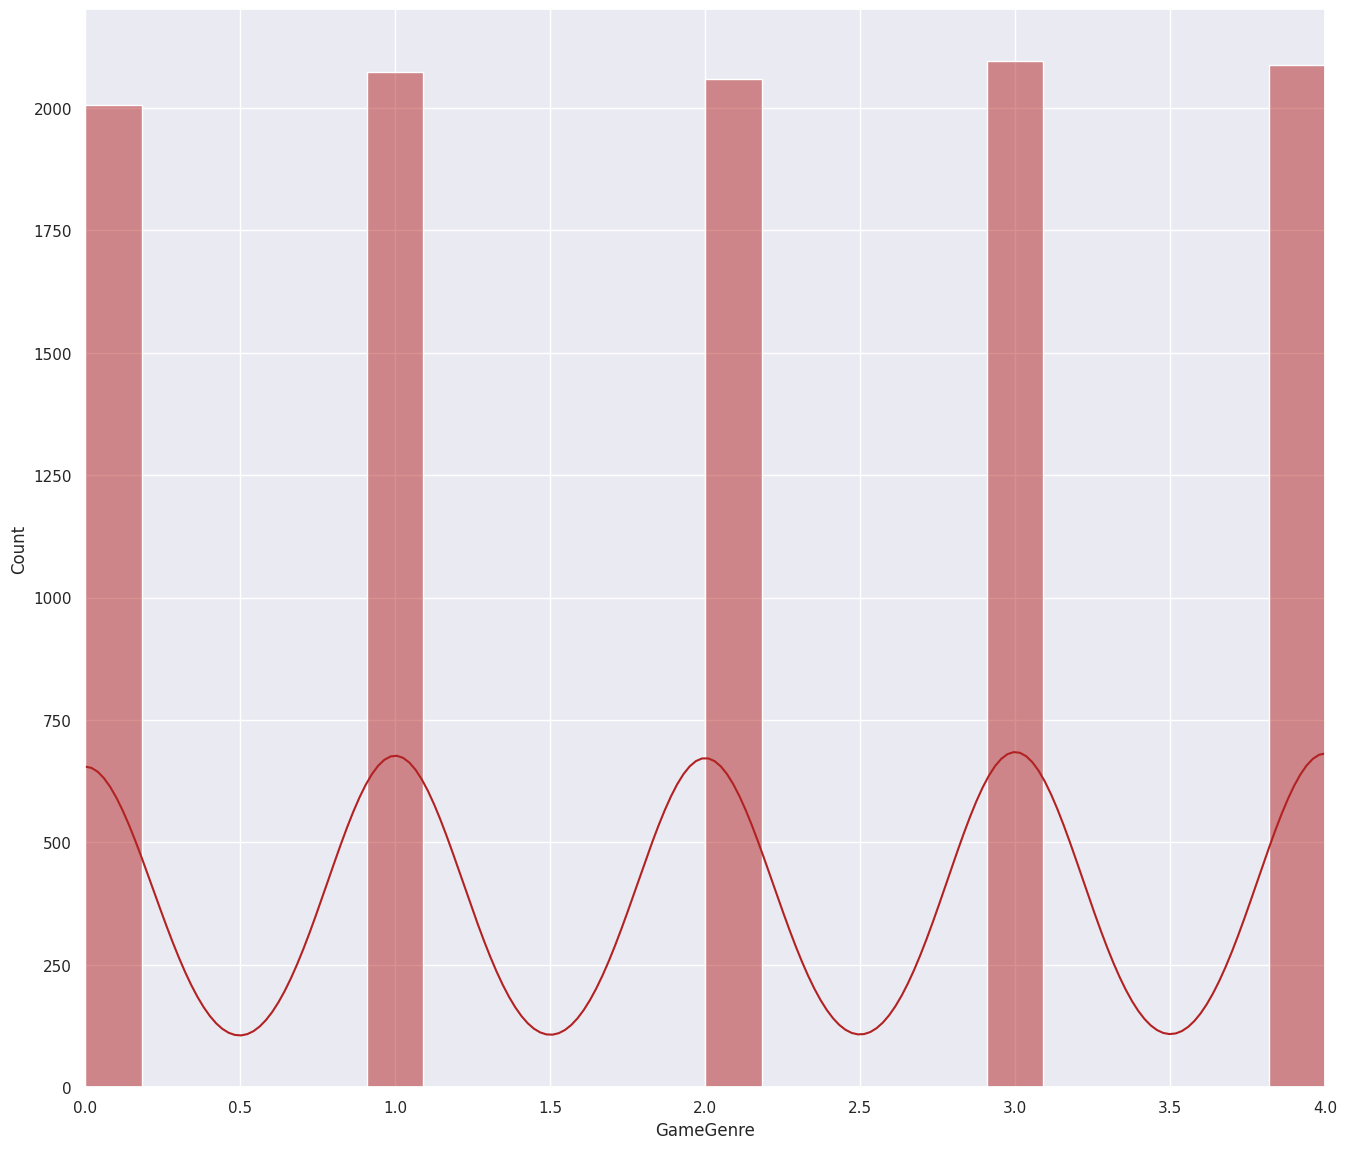

In [ ]:
count_plotted = sns.histplot(x = 'GameGenre', data = dataframed.loc[dataframed['EngagementLevel'] == 2], kde = True, color = 'firebrick')
count_plotted.set(xlabel = "GameGenre")
count_plotted.set(xlim = (0.0000, 4.0000))

[(0.0, 4.0)]

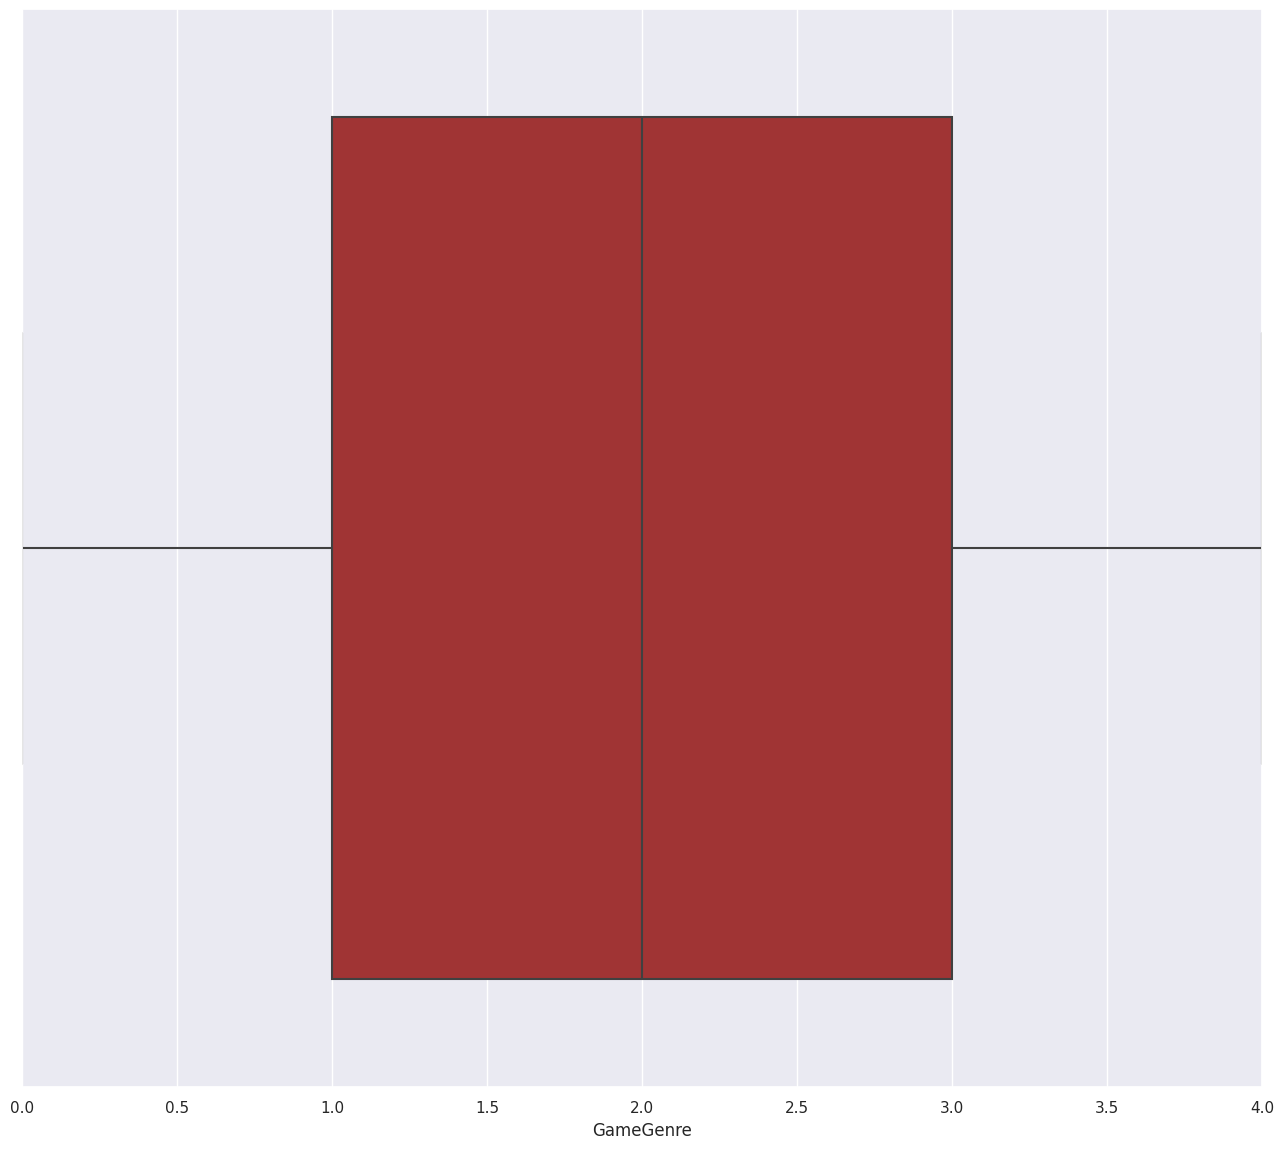

In [ ]:
boxxer_plot = sns.boxplot(x = 'GameGenre', data = dataframed.loc[dataframed['EngagementLevel'] == 2], color = 'firebrick')
boxxer_plot.set(xlim = (0.0000, 4.0000))

In [ ]:
numpy_array = np.array(dataframed.loc[dataframed['EngagementLevel'] == 2]['GameGenre'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than -2.0000 or greater than 6.0000
There are 0 outliers.


[(0.0001, 23.9996)]

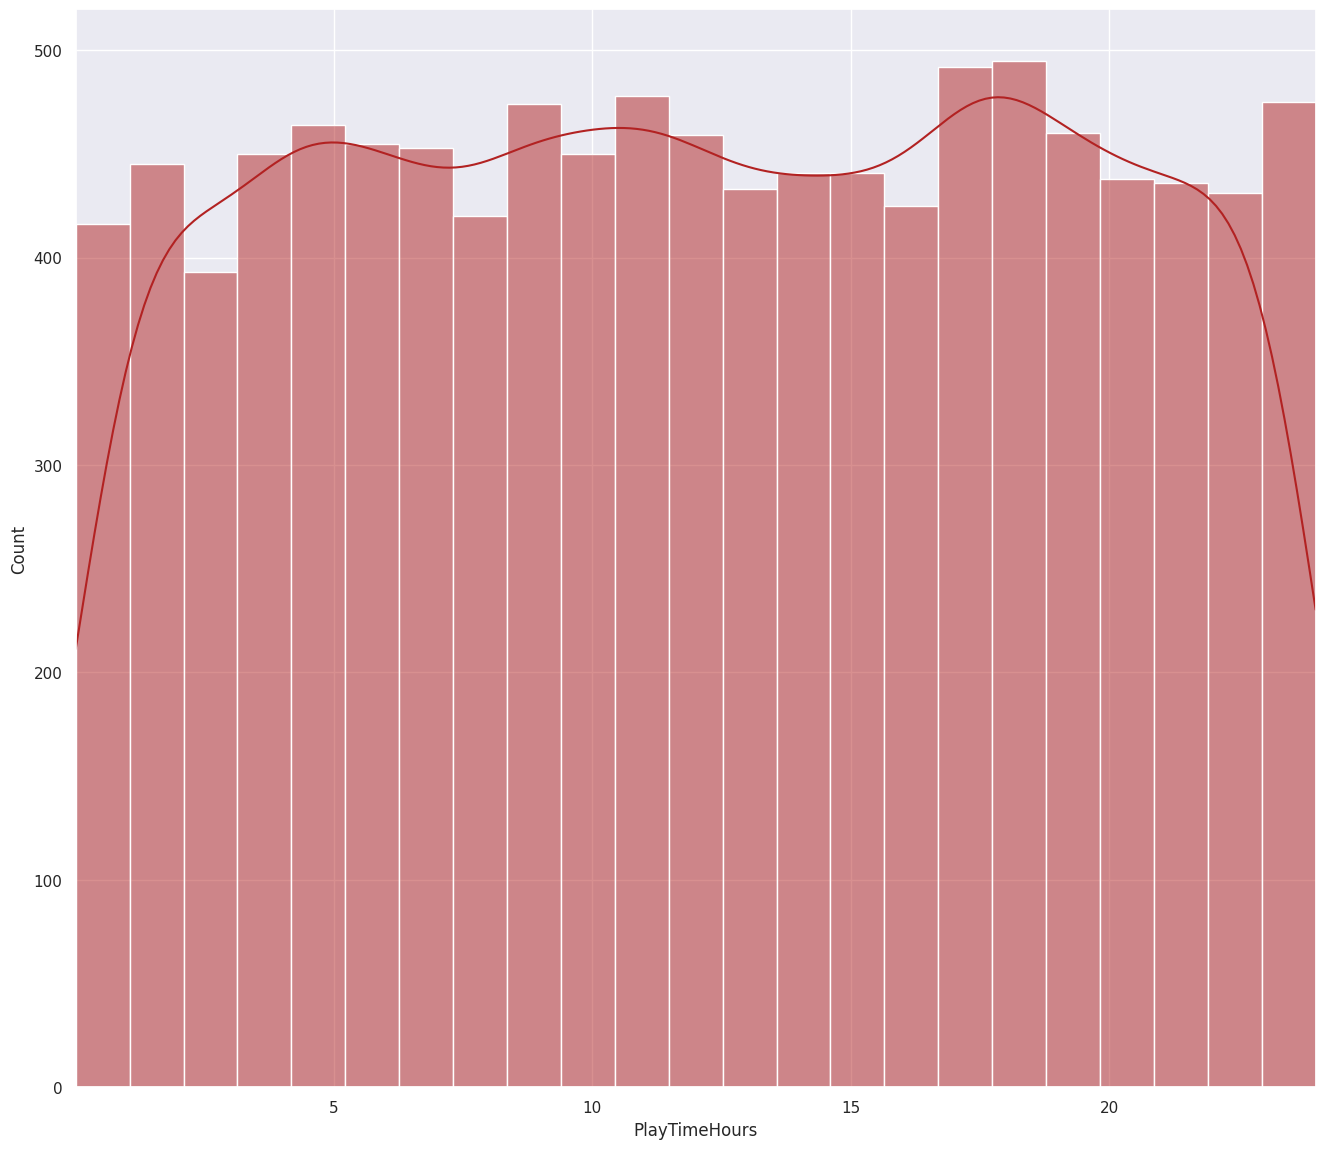

In [ ]:
count_plotted = sns.histplot(x = 'PlayTimeHours', data = dataframed.loc[dataframed['EngagementLevel'] == 2], kde = True, color = 'firebrick')
count_plotted.set(xlabel = "PlayTimeHours")
count_plotted.set(xlim = (0.0001, 23.9996))

[(0.0001, 23.9996)]

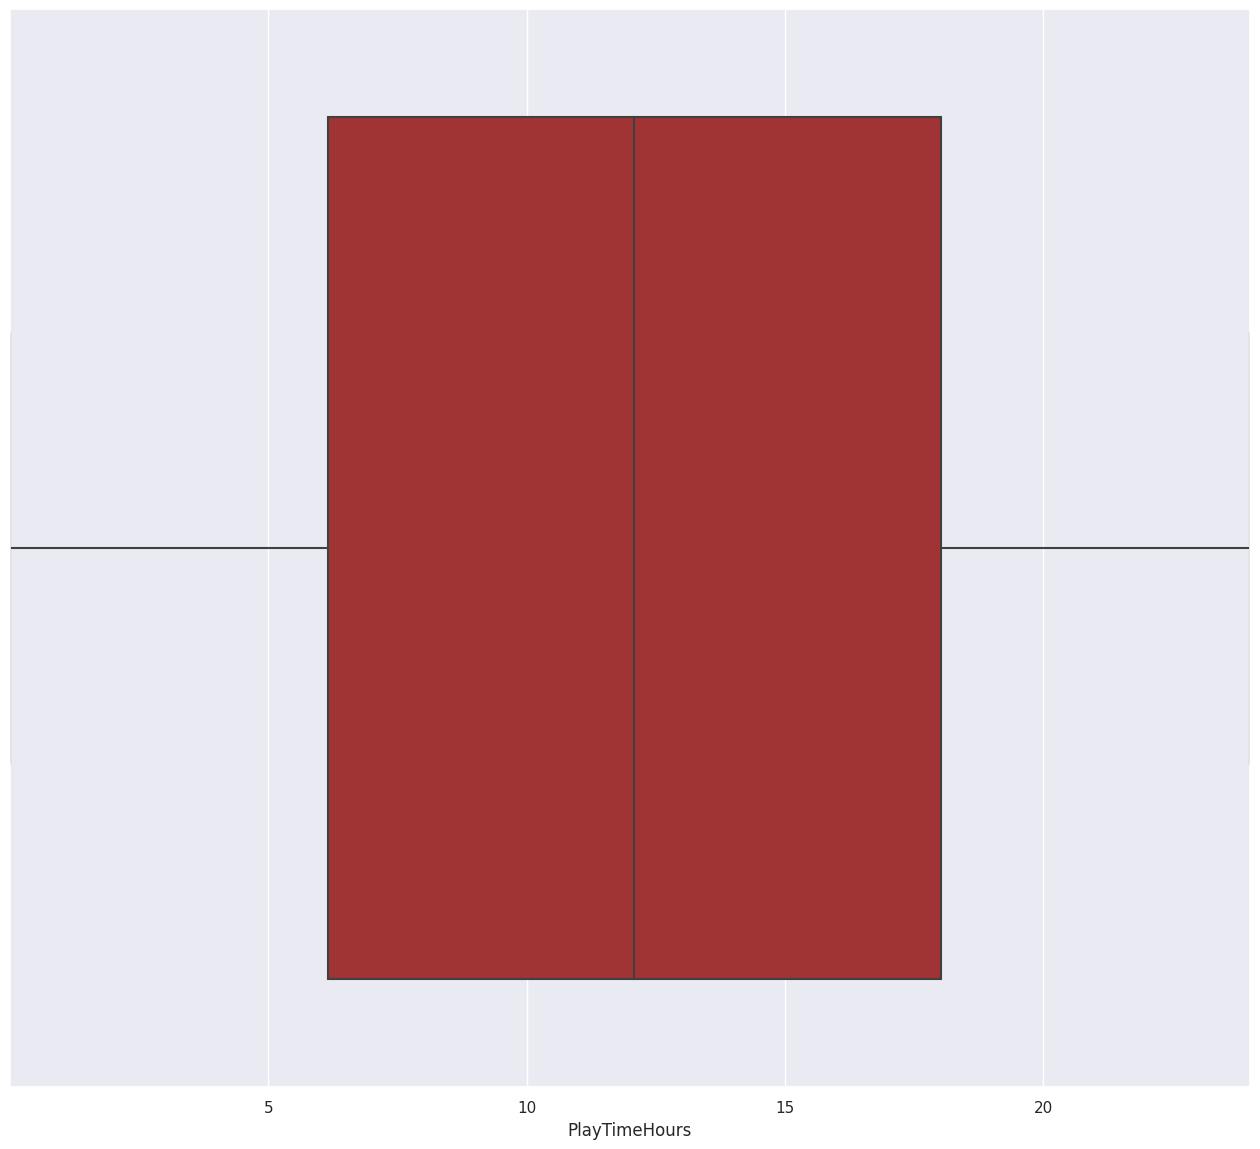

In [ ]:
boxxer_plot = sns.boxplot(x = 'PlayTimeHours', data = dataframed.loc[dataframed['EngagementLevel'] == 2], color = 'firebrick')
boxxer_plot.set(xlim = (0.0001, 23.9996))

In [ ]:
numpy_array = np.array(dataframed.loc[dataframed['EngagementLevel'] == 2]['PlayTimeHours'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than -11.6303 or greater than 35.8146
There are 0 outliers.


[(0.0, 1.0)]

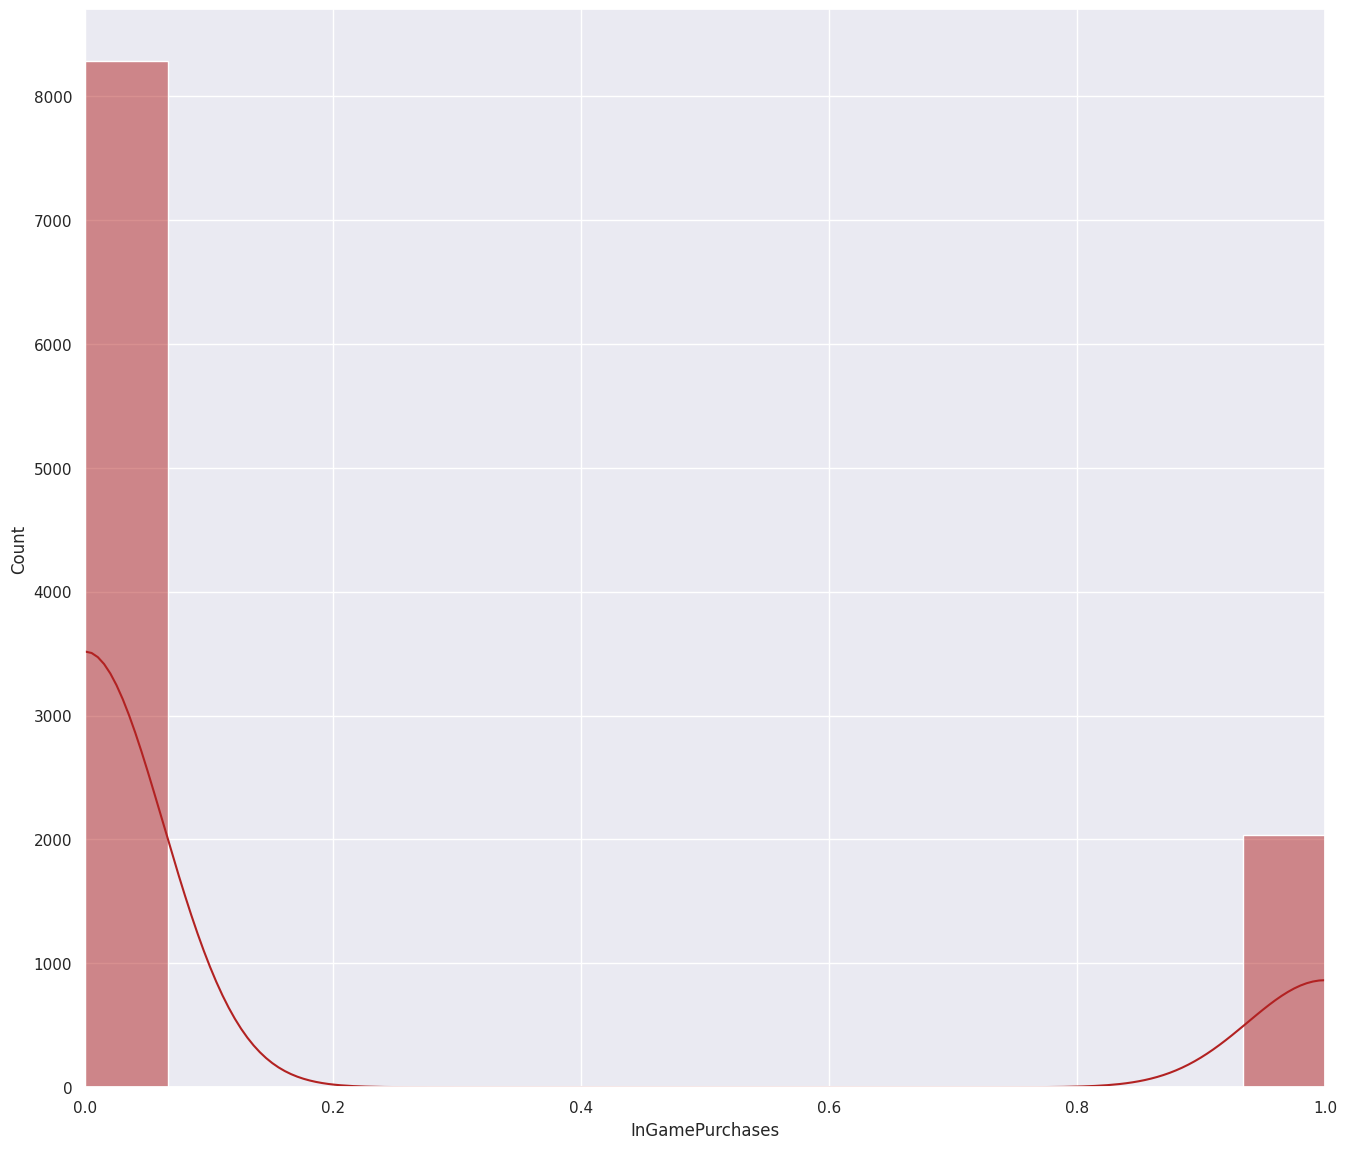

In [ ]:
count_plotted = sns.histplot(x = 'InGamePurchases', data = dataframed.loc[dataframed['EngagementLevel'] == 2], kde = True, color = 'firebrick')
count_plotted.set(xlabel = "InGamePurchases")
count_plotted.set(xlim = (0.0000, 1.0000))

[(0.0, 1.0)]

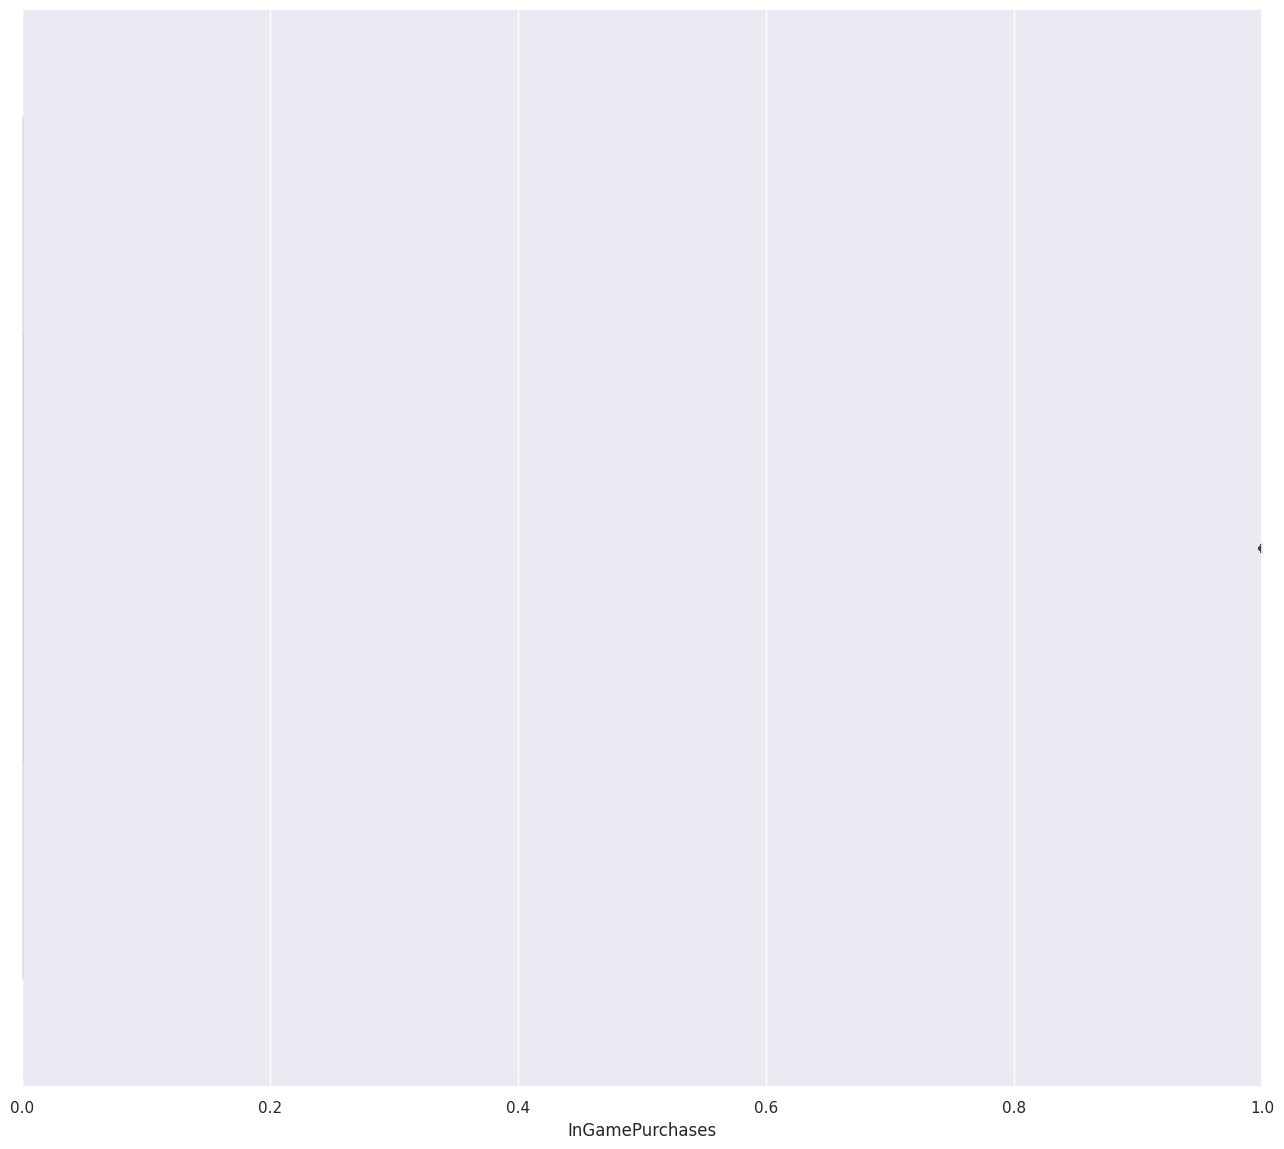

In [ ]:
boxxer_plot = sns.boxplot(x = 'InGamePurchases', data = dataframed.loc[dataframed['EngagementLevel'] == 2], color = 'firebrick')
boxxer_plot.set(xlim = (0.0000, 1.0000))

In [ ]:
numpy_array = np.array(dataframed.loc[dataframed['EngagementLevel'] == 2]['InGamePurchases'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than 0.0000 or greater than 0.0000
There are 2037 outliers.


[(0.0, 2.0)]

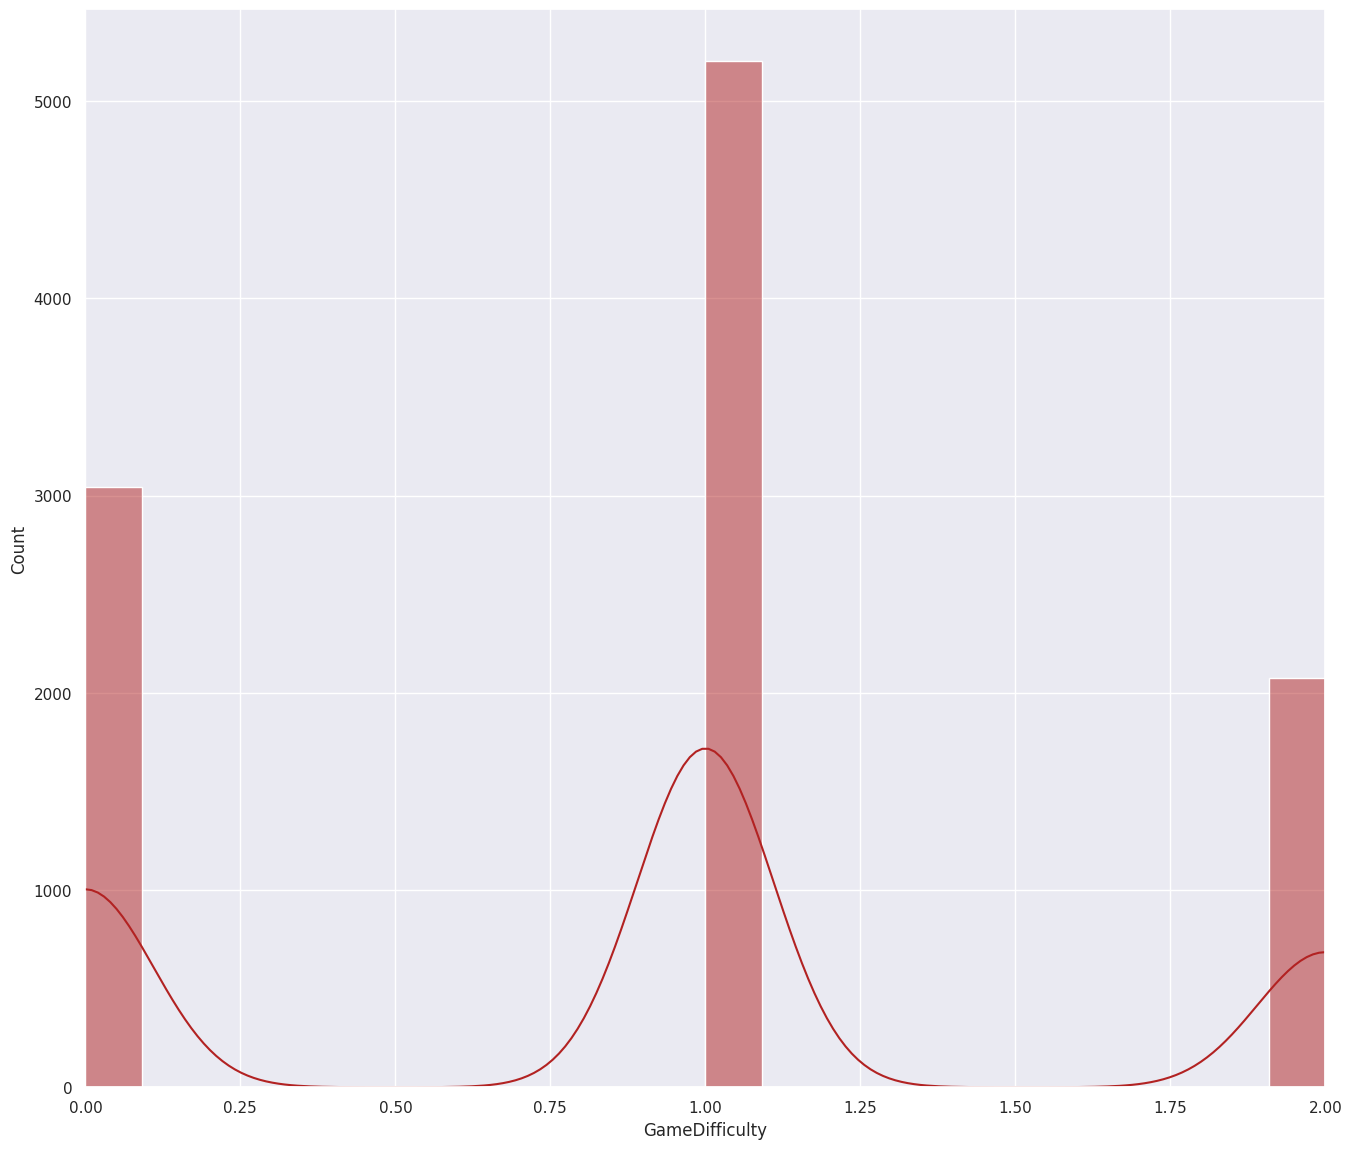

In [ ]:
count_plotted = sns.histplot(x = 'GameDifficulty', data = dataframed.loc[dataframed['EngagementLevel'] == 2], kde = True, color = 'firebrick')
count_plotted.set(xlabel = "GameDifficulty")
count_plotted.set(xlim = (0.0000, 2.0000))

[(0.0, 2.0)]

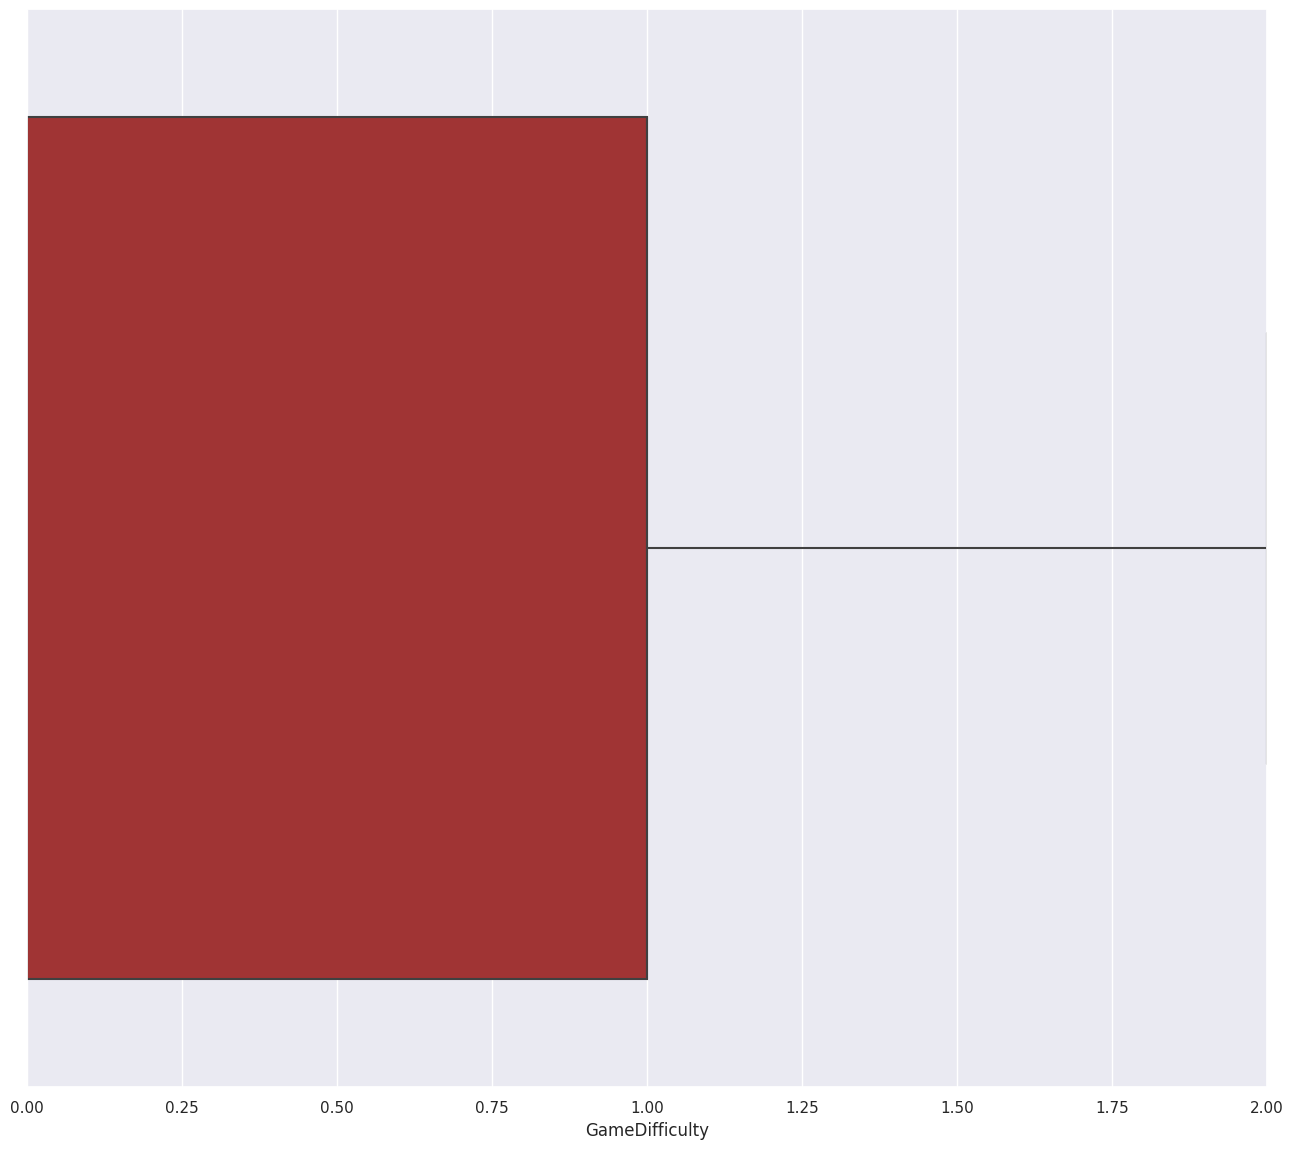

In [ ]:
boxxer_plot = sns.boxplot(x = 'GameDifficulty', data = dataframed.loc[dataframed['EngagementLevel'] == 2], color = 'firebrick')
boxxer_plot.set(xlim = (0.0000, 2.0000))

In [ ]:
numpy_array = np.array(dataframed.loc[dataframed['EngagementLevel'] == 2]['GameDifficulty'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than -1.5000 or greater than 2.5000
There are 0 outliers.


[(0.0, 19.0)]

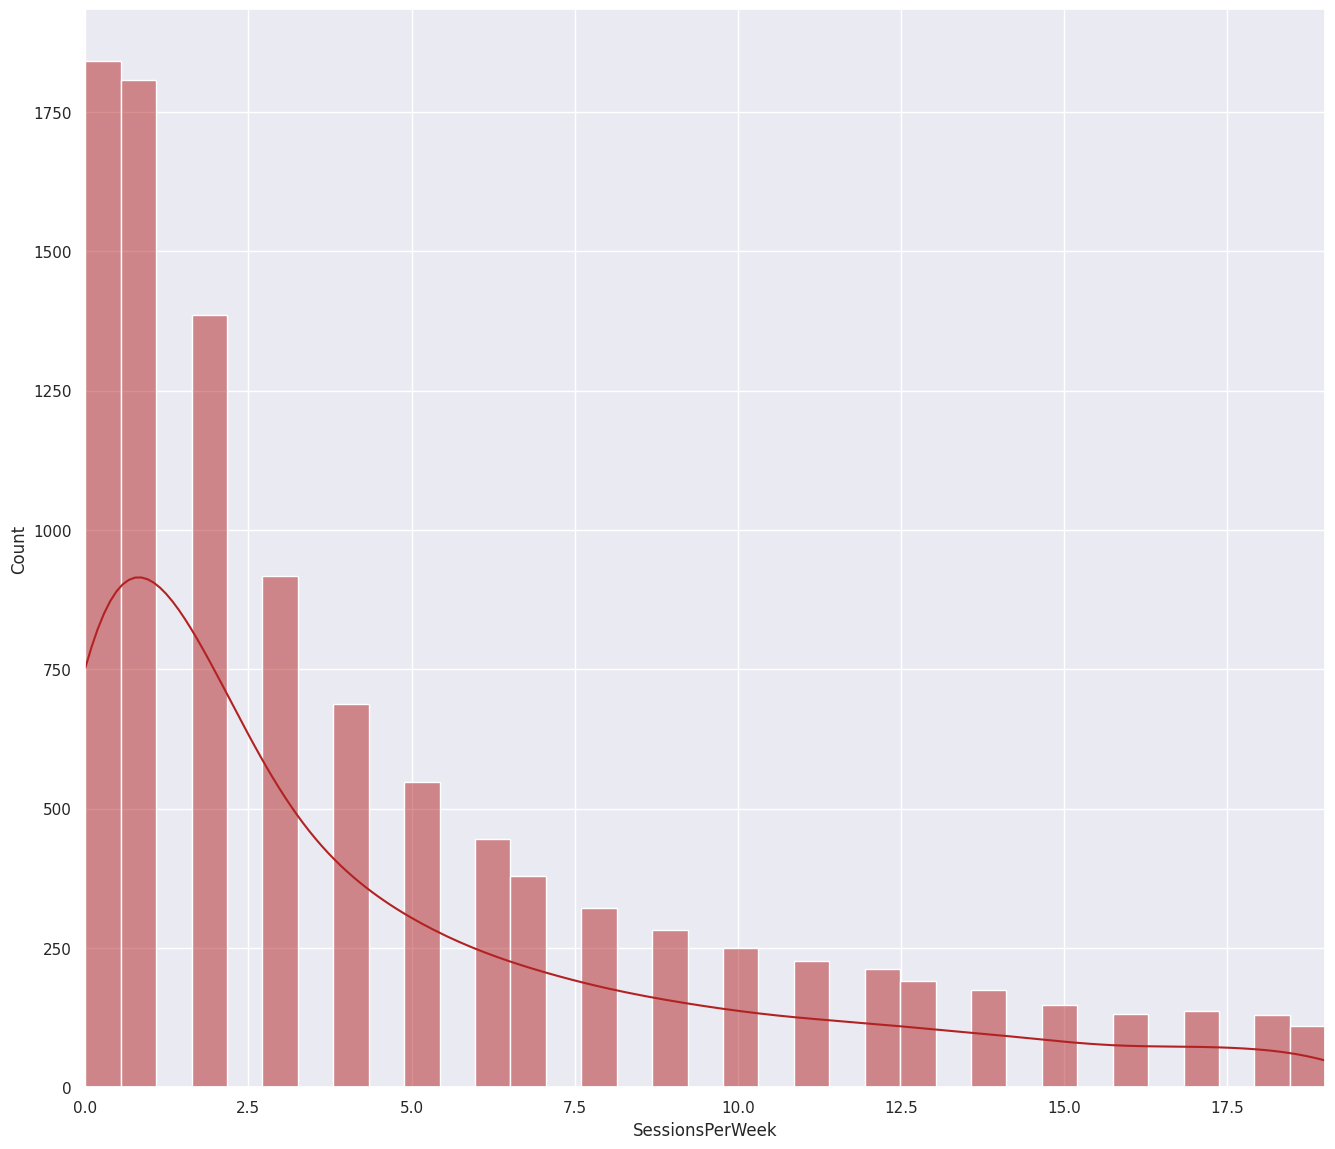

In [ ]:
count_plotted = sns.histplot(x = 'SessionsPerWeek', data = dataframed.loc[dataframed['EngagementLevel'] == 2], kde = True, color = 'firebrick')
count_plotted.set(xlabel = "SessionsPerWeek")
count_plotted.set(xlim = (0.0000, 19.0000))

[(0.0, 19.0)]

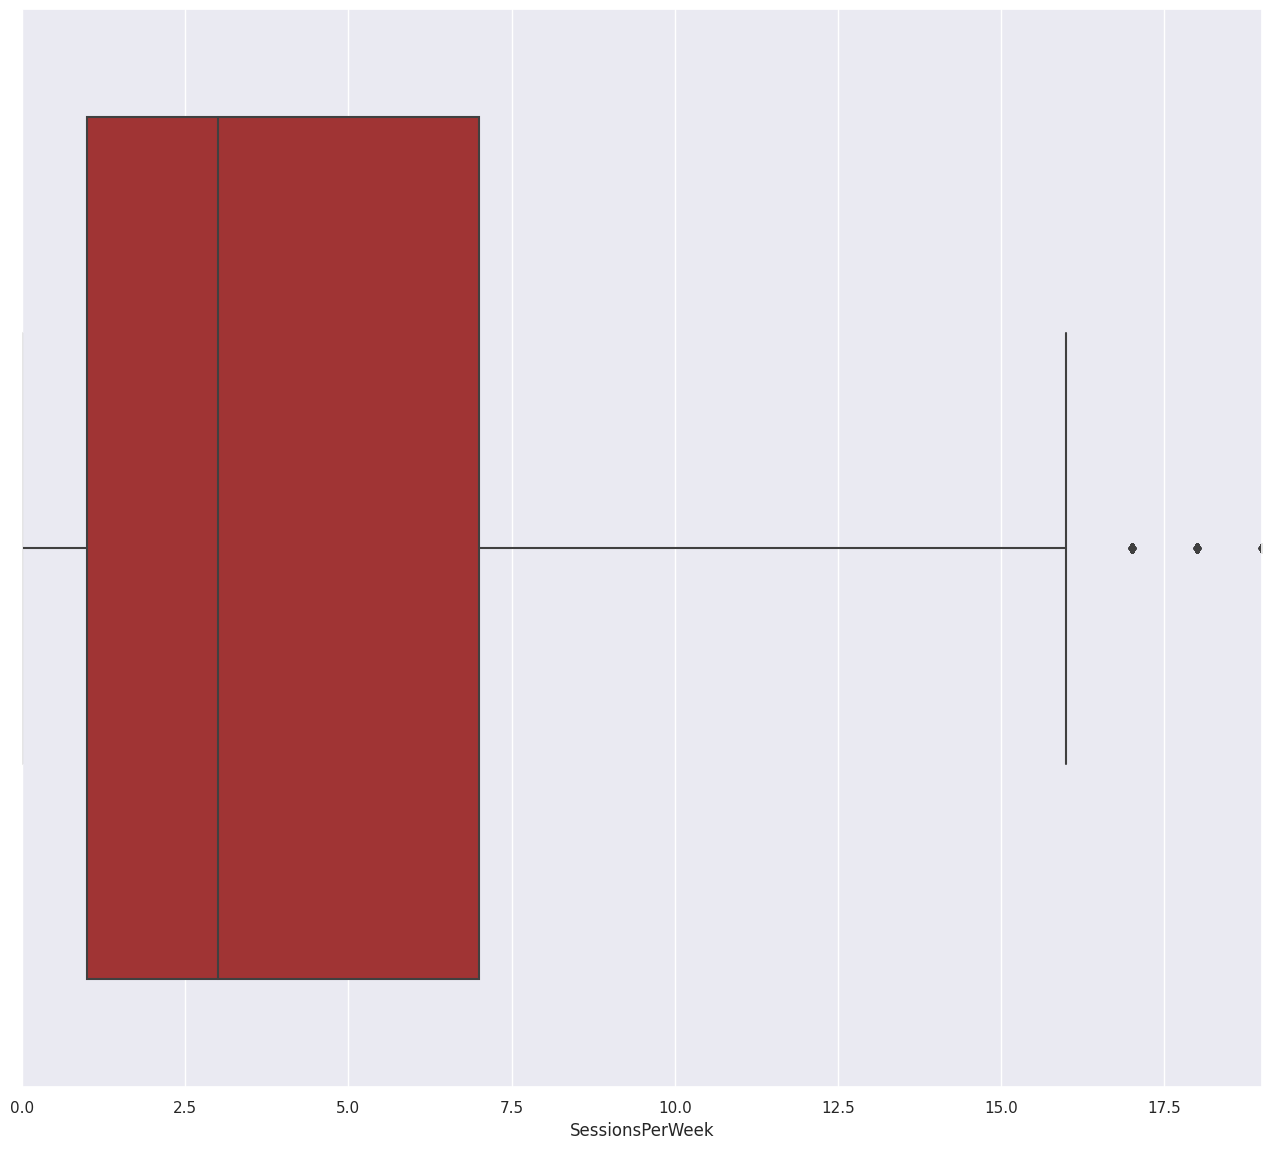

In [ ]:
boxxer_plot = sns.boxplot(x = 'SessionsPerWeek', data = dataframed.loc[dataframed['EngagementLevel'] == 2], color = 'firebrick')
boxxer_plot.set(xlim = (0.0000, 19.0000))

In [ ]:
numpy_array = np.array(dataframed.loc[dataframed['EngagementLevel'] == 2]['SessionsPerWeek'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than -8.0000 or greater than 16.0000
There are 376 outliers.


[(10.0, 179.0)]

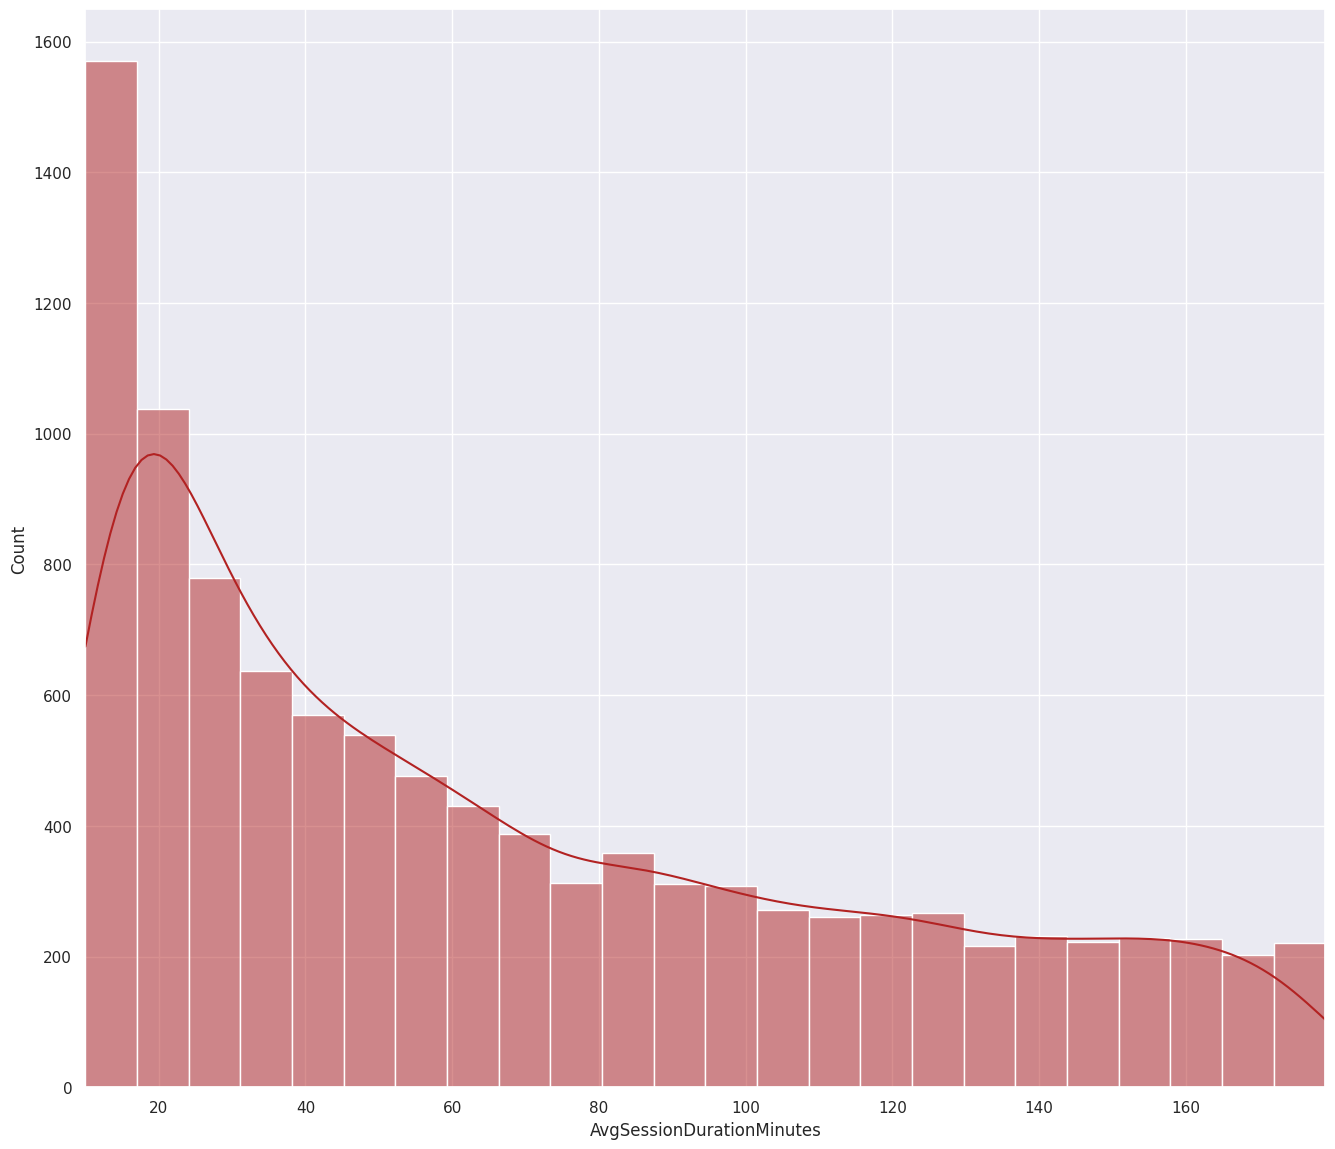

In [ ]:
count_plotted = sns.histplot(x = 'AvgSessionDurationMinutes', data = dataframed.loc[dataframed['EngagementLevel'] == 2], kde = True, color = 'firebrick')
count_plotted.set(xlabel = "AvgSessionDurationMinutes")
count_plotted.set(xlim = (10.0000, 179.0000))

[(10.0, 179.0)]

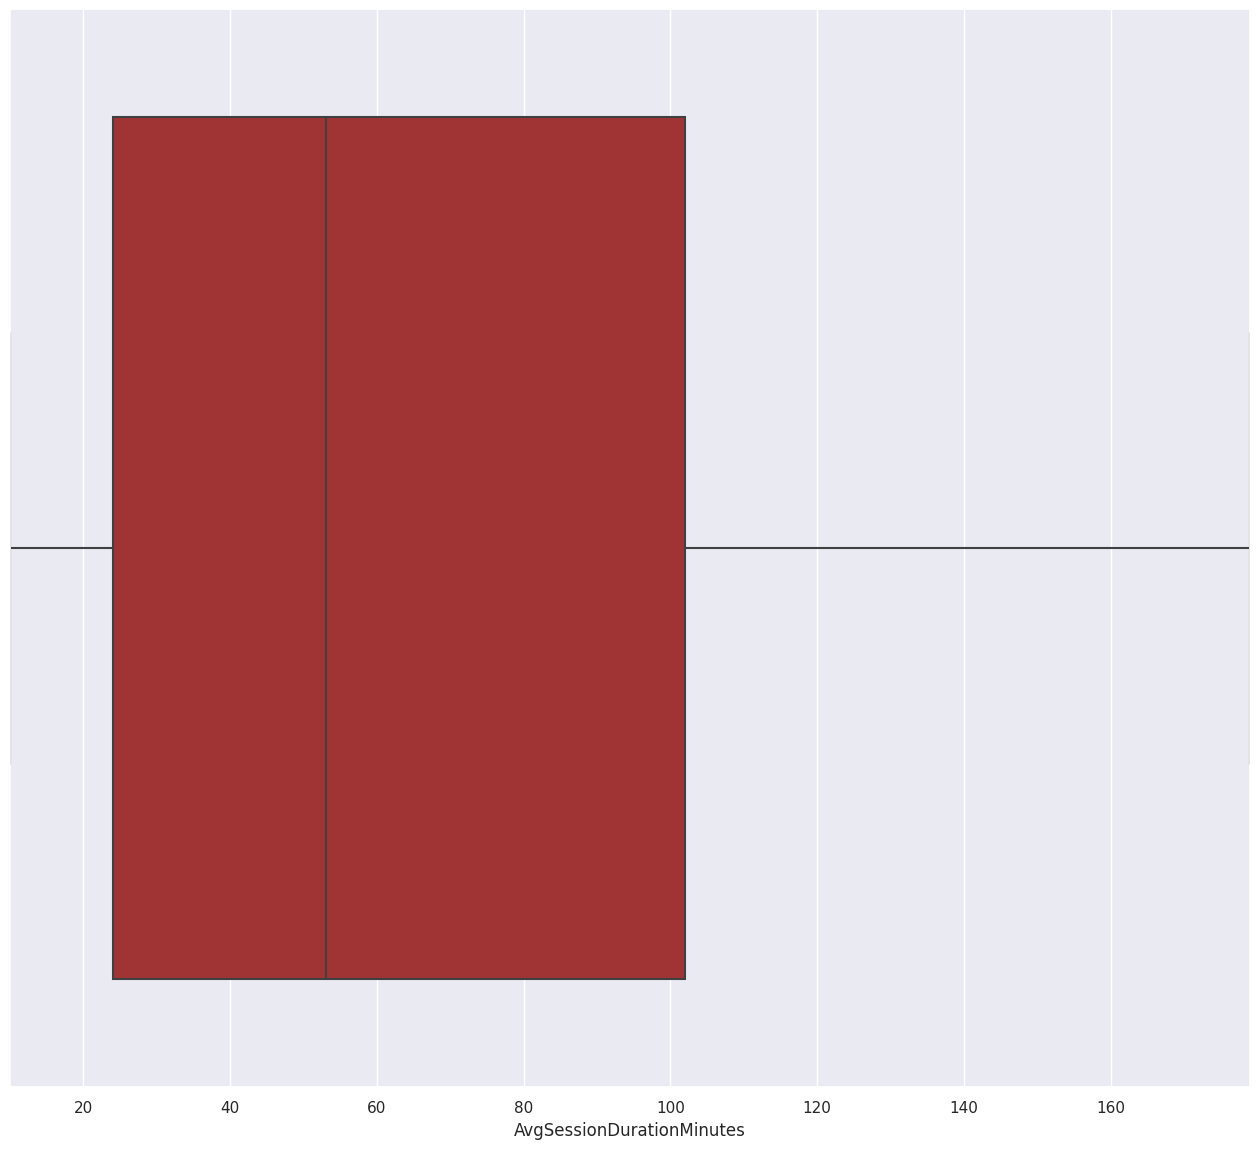

In [ ]:
boxxer_plot = sns.boxplot(x = 'AvgSessionDurationMinutes', data = dataframed.loc[dataframed['EngagementLevel'] == 2], color = 'firebrick')
boxxer_plot.set(xlim = (10.0000, 179.0000))

In [ ]:
numpy_array = np.array(dataframed.loc[dataframed['EngagementLevel'] == 2]['AvgSessionDurationMinutes'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than -93.0000 or greater than 219.0000
There are 0 outliers.


[(1.0, 99.0)]

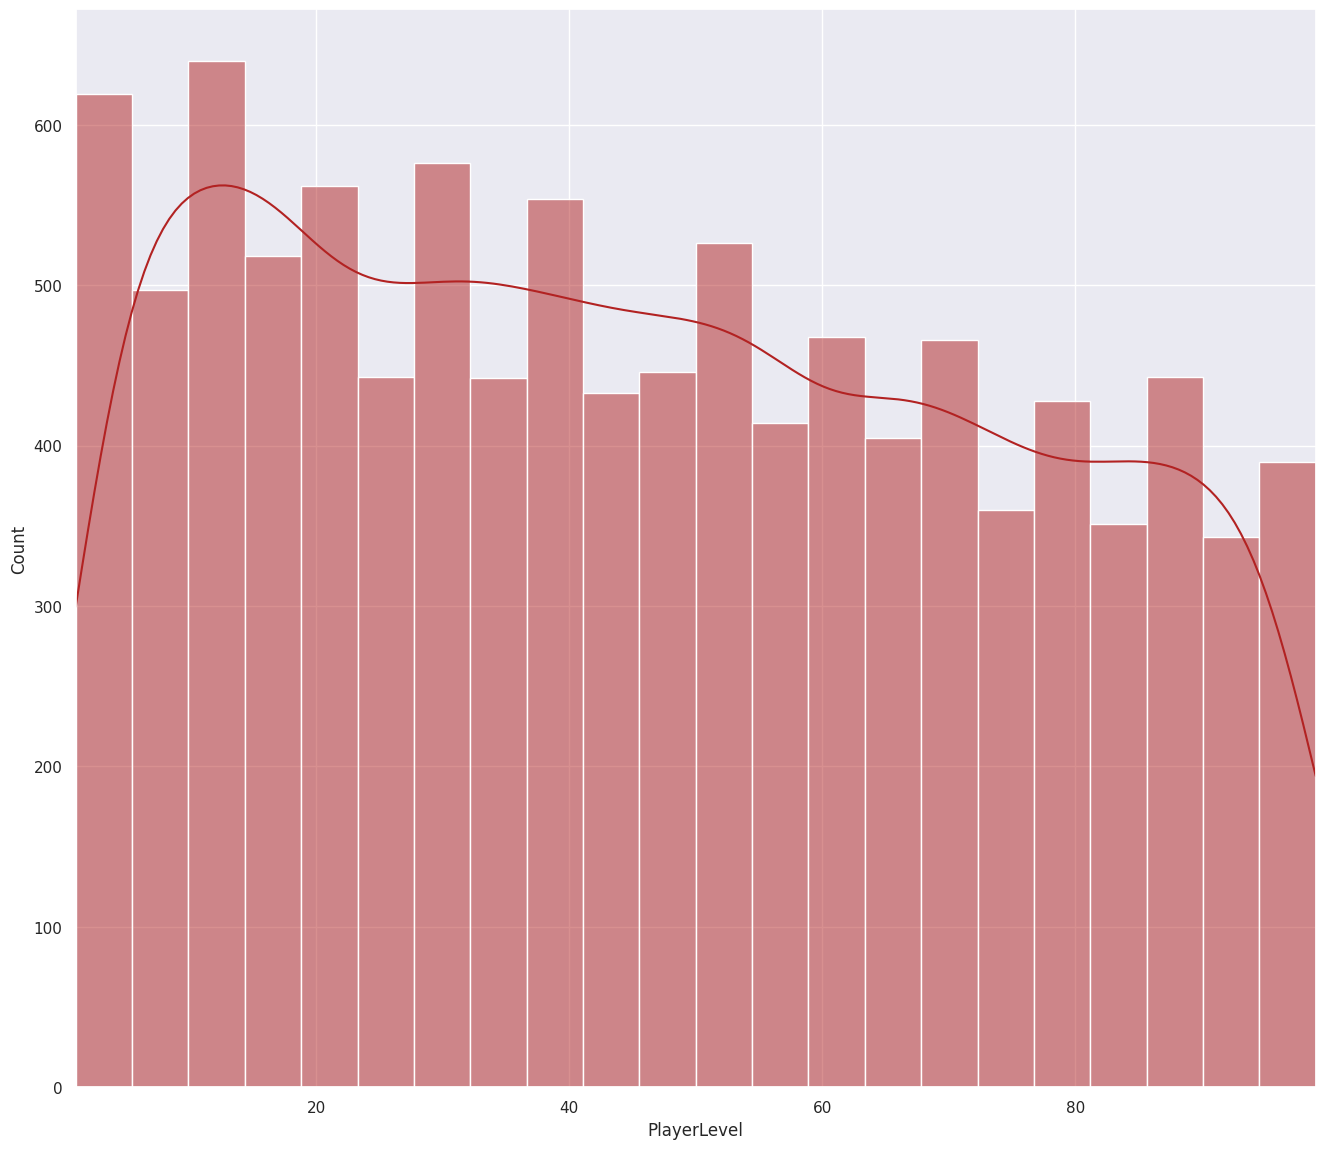

In [ ]:
count_plotted = sns.histplot(x = 'PlayerLevel', data = dataframed.loc[dataframed['EngagementLevel'] == 2], kde = True, color = 'firebrick')
count_plotted.set(xlabel = "PlayerLevel")
count_plotted.set(xlim = (1.0000, 99.0000))

[(1.0, 99.0)]

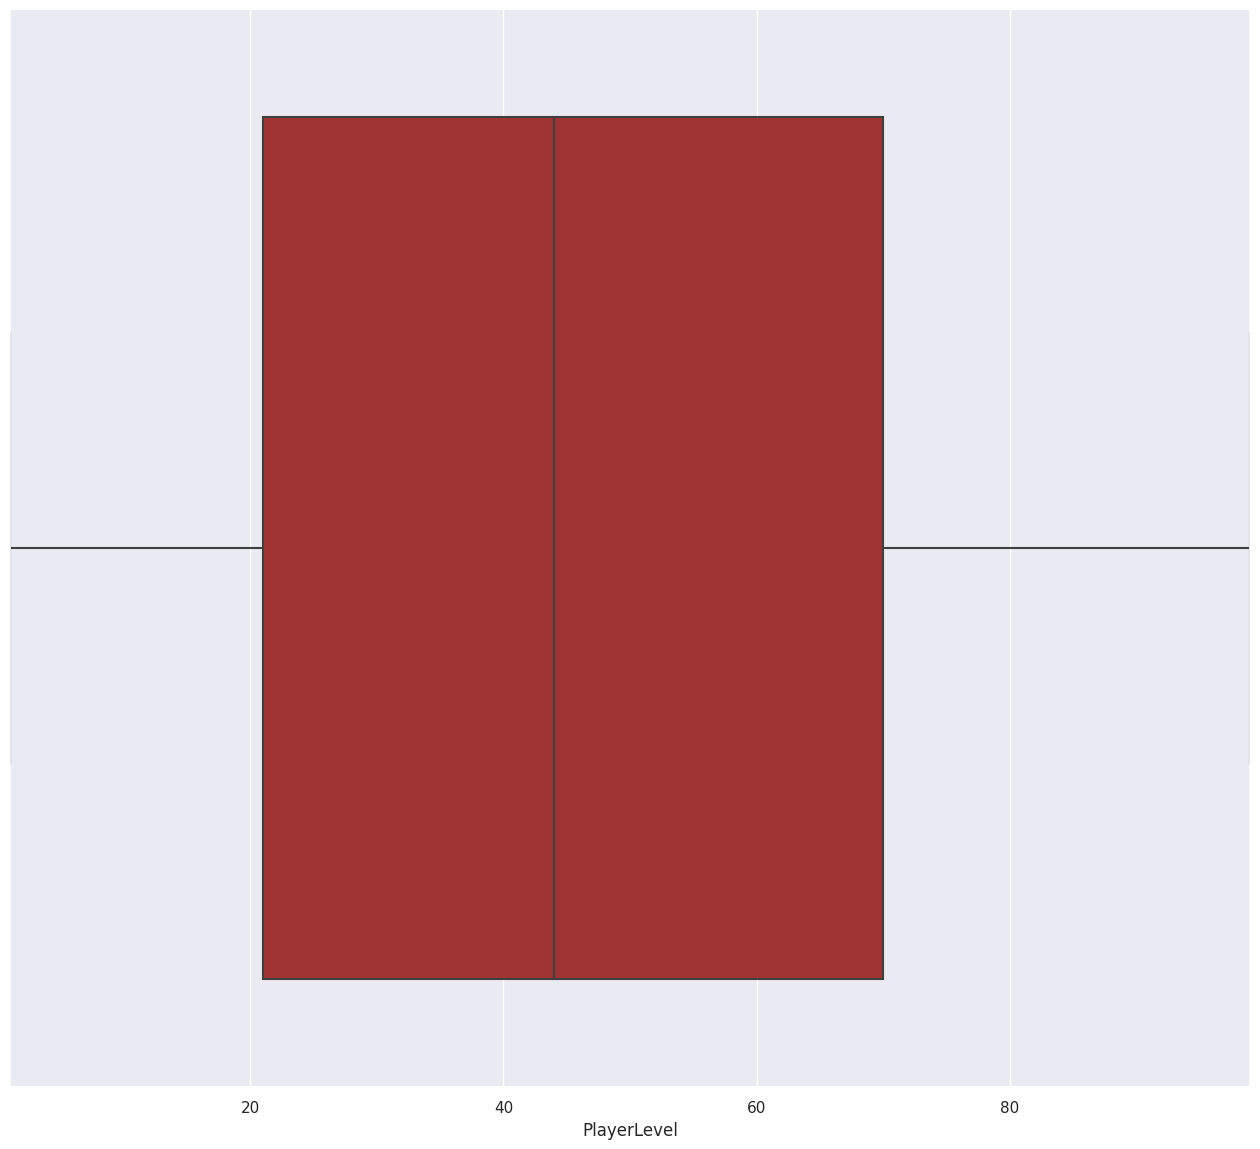

In [ ]:
boxxer_plot = sns.boxplot(x = 'PlayerLevel', data = dataframed.loc[dataframed['EngagementLevel'] == 2], color = 'firebrick')
boxxer_plot.set(xlim = (1.0000, 99.0000))

In [ ]:
numpy_array = np.array(dataframed.loc[dataframed['EngagementLevel'] == 2]['PlayerLevel'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than -52.5000 or greater than 143.5000
There are 0 outliers.


[(0.0, 49.0)]

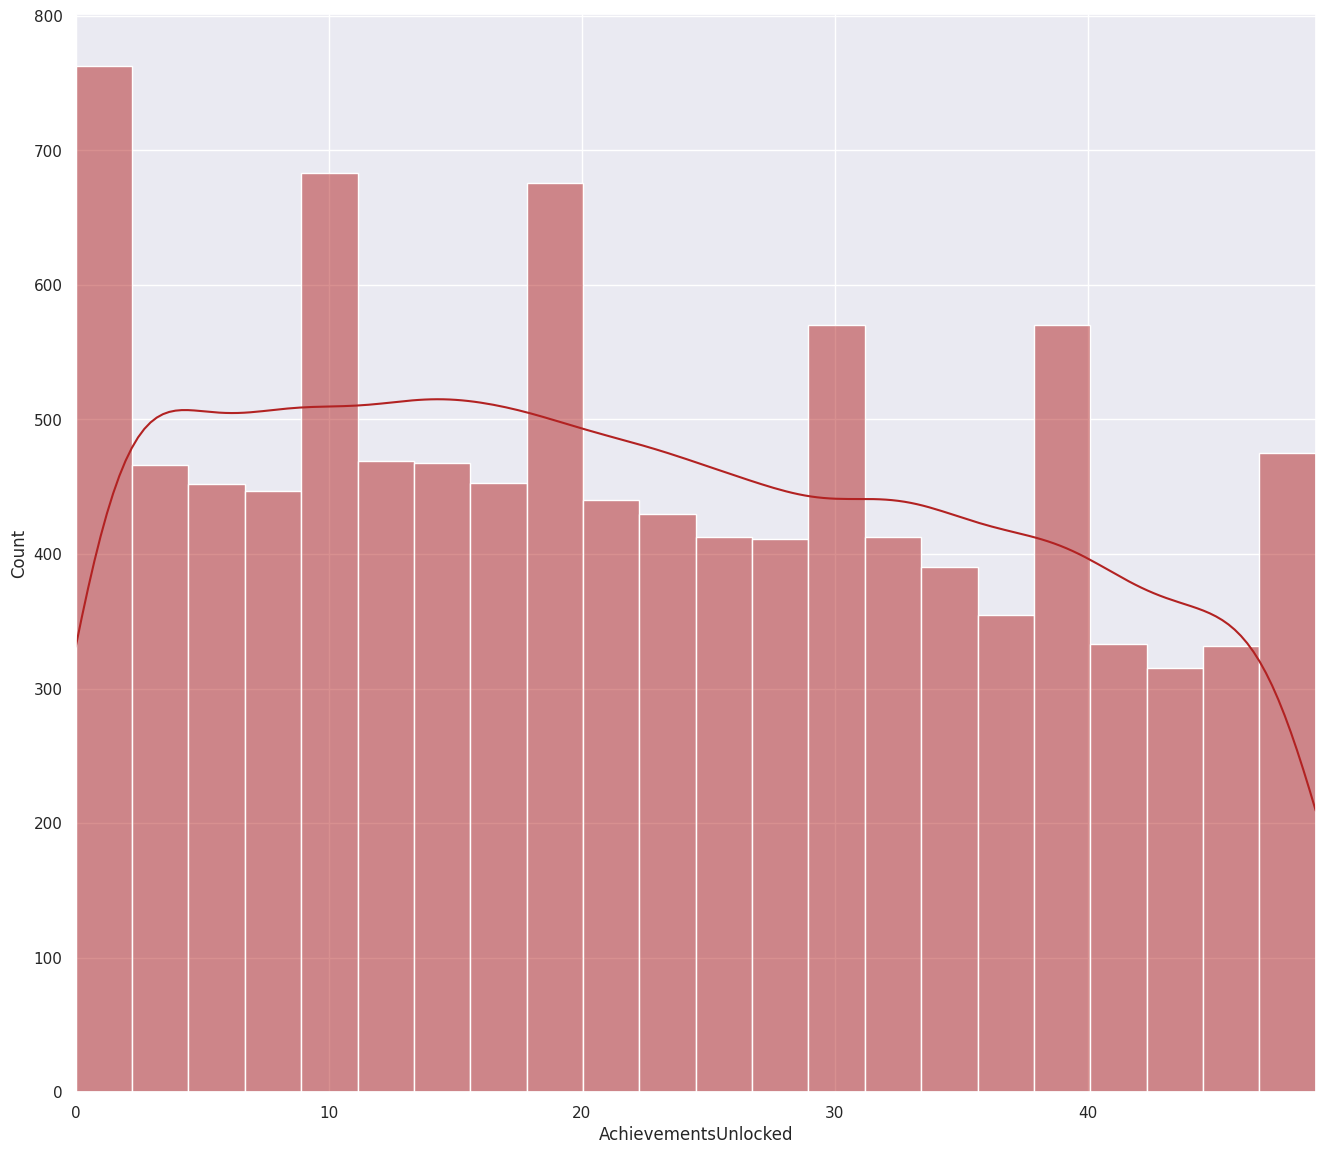

In [ ]:
count_plotted = sns.histplot(x = 'AchievementsUnlocked', data = dataframed.loc[dataframed['EngagementLevel'] == 2], kde = True, color = 'firebrick')
count_plotted.set(xlabel = "AchievementsUnlocked")
count_plotted.set(xlim = (0.0000, 49.0000))

[(0.0, 49.0)]

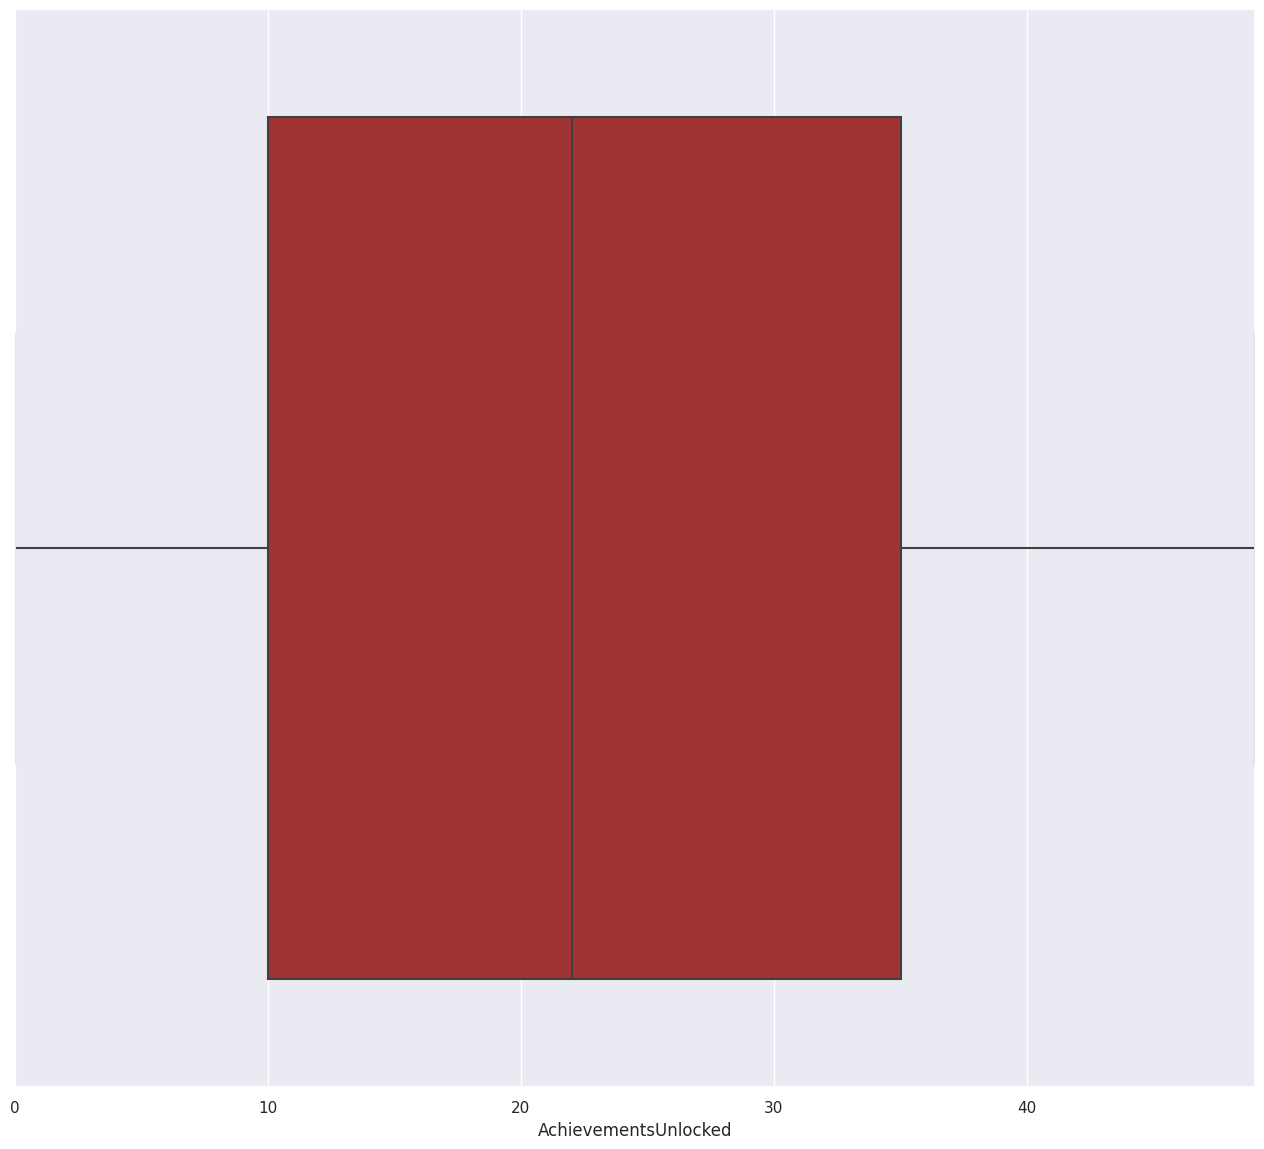

In [ ]:
boxxer_plot = sns.boxplot(x = 'AchievementsUnlocked', data = dataframed.loc[dataframed['EngagementLevel'] == 2], color = 'firebrick')
boxxer_plot.set(xlim = (0.0000, 49.0000))

In [ ]:
numpy_array = np.array(dataframed.loc[dataframed['EngagementLevel'] == 2]['AchievementsUnlocked'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than -27.5000 or greater than 72.5000
There are 0 outliers.


In [ ]:
X = dataframed.iloc[:, :-1]
X.head()

Age  Gender  Location  GameGenre  PlayTimeHours  InGamePurchases  \
0   43       0         0          0      16.271119                0   
1   29       1         1          0       5.525961                0   
2   22       1         1          1       8.223755                0   
3   35       0         1          2       5.265351                1   
4   33       0         2          2      15.531945                0   

   GameDifficulty  SessionsPerWeek  AvgSessionDurationMinutes  PlayerLevel  \
0               0                6                        108           79   
1               0                5                        144           11   
2               1               16                        142           35   
3               1                9                         85           57   
4               0                2                        131           95   

   AchievementsUnlocked  
0                    25  
1                    10  
2                    41  
3                    47  
4                    37

In [ ]:
y = dataframed.iloc[:, -1:]
y.head()

EngagementLevel
0                0
1                0
2                1
3                0
4                0

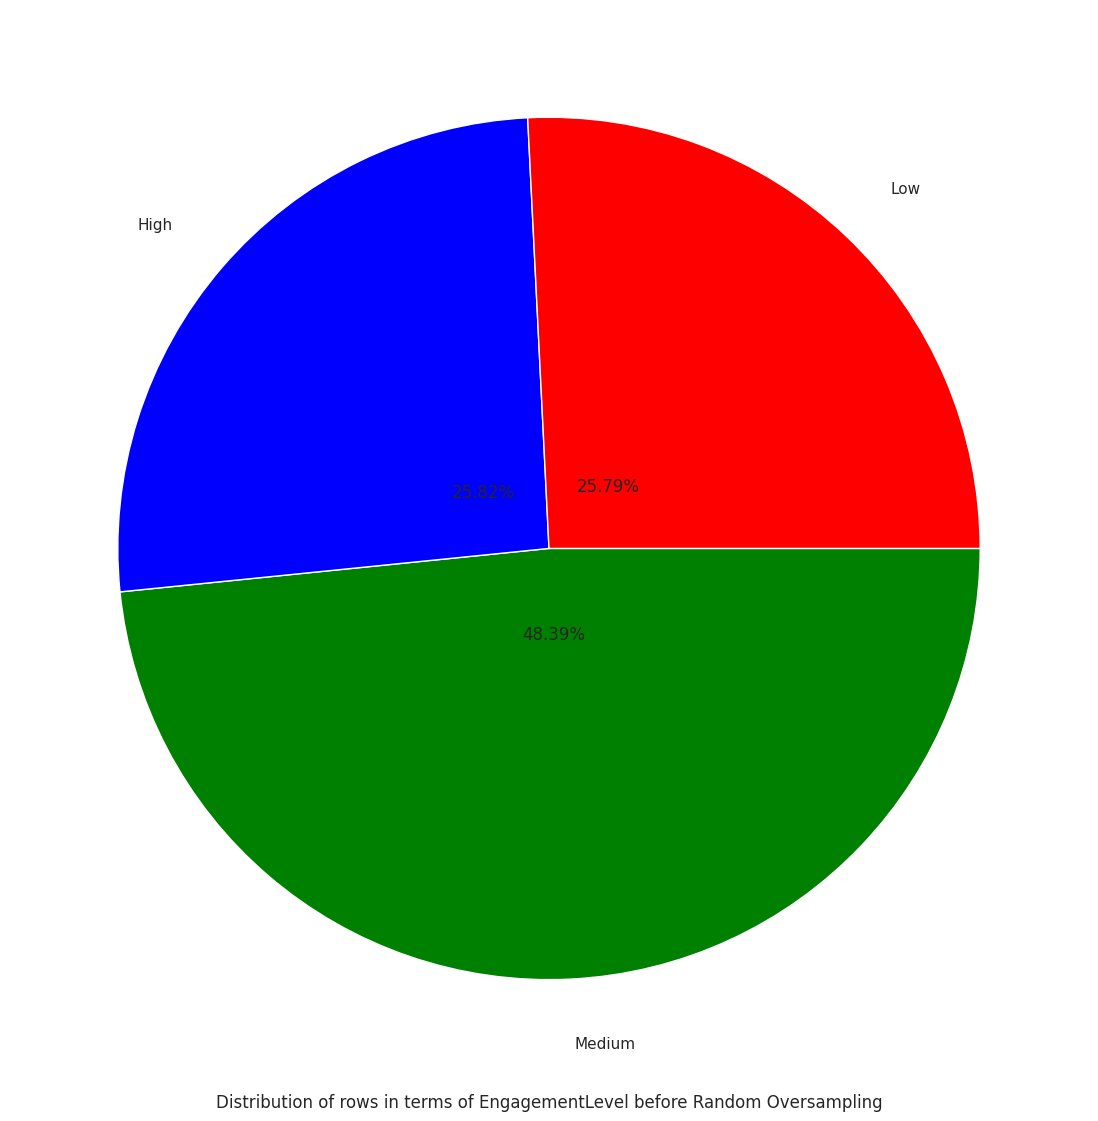

In [ ]:
plt.pie(y['EngagementLevel'].value_counts(),labels=['Medium','High', 'Low'],colors=['Green', 'Blue', 'Red'],autopct='%1.2f%%',pctdistance=0.2,startangle=0,
        labeldistance=1.15,radius=1,counterclock=False,center=(0, 0),normalize=True,data=dataframed)
plt.xlabel("Distribution of rows in terms of EngagementLevel before Random Oversampling")
plt.show()

In [ ]:
from imblearn.over_sampling import RandomOverSampler

rus = RandomOverSampler(sampling_strategy='auto')

X_res_over, y_res_over = rus.fit_resample(X, y)

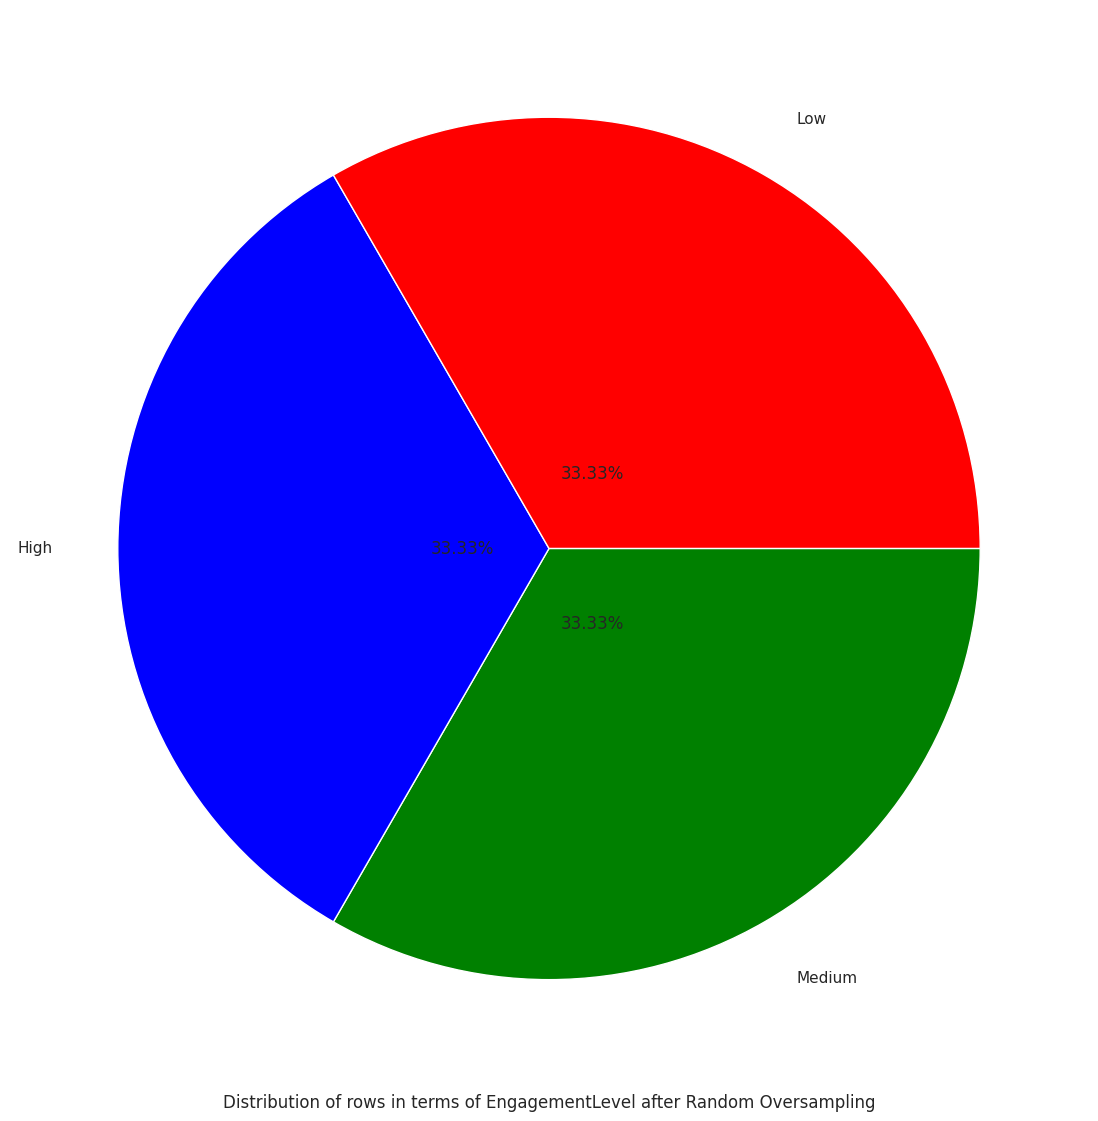

In [ ]:
plt.pie(y_res_over['EngagementLevel'].value_counts(),labels=['Medium','High', 'Low'],colors=['Green', 'Blue', 'Red'],autopct='%1.2f%%',pctdistance=0.2,startangle=0,
        labeldistance=1.15,radius=1,counterclock=False,center=(0, 0),normalize=True,data=dataframed)
plt.xlabel("Distribution of rows in terms of EngagementLevel after Random Oversampling")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , classification_report, ConfusionMatrixDisplay,precision_score,recall_score, f1_score,roc_auc_score,roc_curve

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res_over, y_res_over, test_size = 0.2, random_state = 42)

In [ ]:
print('Shape of Data (20%)')
print("X_train shape : ", X_train.shape)
print("y_train shape : ", y_train.shape)
print("X_test shape : ", X_test.shape)
print("y_test shape : ", y_test.shape)

Shape of Data (20%)
X_train shape :  (46497, 11)
y_train shape :  (46497, 1)
X_test shape :  (11625, 11)
y_test shape :  (11625, 1)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

Random_Forest = RandomForestClassifier(n_estimators = 470, max_depth = 32, min_samples_split = 8, min_samples_leaf = 1, max_features = 'auto')
Random_Forest.fit(X_train, y_train.values.ravel())
training_prediction = Random_Forest.predict(X_train)
testing_prediction = Random_Forest.predict(X_test)

#Training Metrics
training_accuracy = accuracy_score(y_train, training_prediction)
training_f1 = f1_score(y_train, training_prediction, average = 'weighted')
training_precision = precision_score(y_train, training_prediction, average = 'weighted')
training_recall = recall_score(y_train, training_prediction, average = 'weighted')

#Testing Metrics
testing_accuracy = accuracy_score(y_test, testing_prediction)
testing_f1 = f1_score(y_test, testing_prediction, average = 'weighted')
testing_precision = precision_score(y_test, testing_prediction, average = 'weighted')
testing_recall = recall_score(y_test, testing_prediction, average = 'weighted')

print('AL : Random Forest (20%)')
print('\n')
print('Training Model Performance Check')
print('Accuracy Score : {:.4f}'.format(training_accuracy))
print('F1 Score : {:.4f}'.format(training_f1))
print('Precision Score : {:.4f}'.format(training_precision))
print('Recall Score : {:.4f}'.format(training_recall))

print('\n')
print('Testing Model Performance Check')
print('Accuracy Score : {:.4f}'.format(testing_accuracy))
print('F1 Score : {:.4f}'.format(testing_f1))
print('Precision Score : {:.4f}'.format(testing_precision))
print('Recall Score : {:.4f}'.format(testing_recall))

AL : Random Forest (20%)


Training Model Performance Check
Accuracy Score : 0.9711
F1 Score : 0.9711
Precision Score : 0.9711
Recall Score : 0.9711


Testing Model Performance Check
Accuracy Score : 0.9335
F1 Score : 0.9336
Precision Score : 0.9339
Recall Score : 0.9335
